In [1]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('train_copy.csv')

In [3]:
df.head()

Id Province/State Country/Region   Lat  Long        Date  ConfirmedCases  \
0   1            NaN    Afghanistan  33.0  65.0  2020-01-22             0.0   
1   2            NaN    Afghanistan  33.0  65.0  2020-01-23             0.0   
2   3            NaN    Afghanistan  33.0  65.0  2020-01-24             0.0   
3   4            NaN    Afghanistan  33.0  65.0  2020-01-25             0.0   
4   5            NaN    Afghanistan  33.0  65.0  2020-01-26             0.0   

   Fatalities  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0

In [4]:
print("Number of Country/Region is", df['Country/Region'].nunique())

print("Countries with Province/State informed are"
      , df[df['Province/State'].isna()==False]['Country/Region'].unique())

Number of Country/Region is 163
Countries with Province/State informed are ['Australia' 'Canada' 'China' 'Cruise Ship' 'Denmark' 'France'
 'Netherlands' 'US' 'United Kingdom']


In [5]:
df.describe()

Id           Lat          Long  ConfirmedCases    Fatalities
count  17892.000000  17892.000000  17892.000000    17892.000000  17892.000000
mean   13191.500000     26.287693      4.766191      325.207523     11.974737
std     7624.675152     22.935092     79.923261     3538.599684    174.346267
min        1.000000    -41.454500   -157.498300        0.000000      0.000000
25%     6596.250000     13.145425    -71.516375        0.000000      0.000000
50%    13191.500000     32.985550      9.775000        0.000000      0.000000
75%    19786.750000     42.501575     64.688975       10.000000      0.000000
max    26382.000000     71.706900    174.886000    69176.000000   6820.000000

Text(0.5, 0, 'Date')

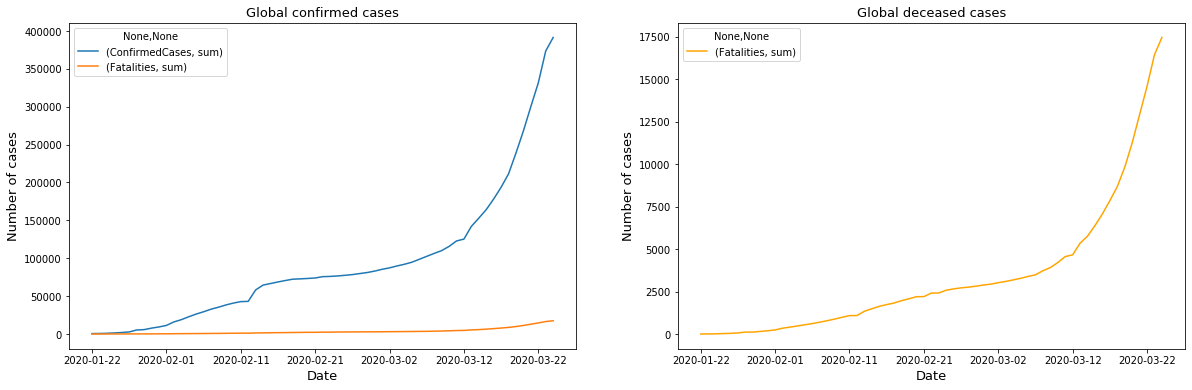

In [6]:
confirmed_dates = df.groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_dates = df.groupby(['Date']).agg({'Fatalities':['sum']})
total_dates = confirmed_dates.join(fatalities_dates)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
total_dates.plot(ax=ax1)
ax1.set_title("Global confirmed cases", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)
fatalities_dates.plot(ax=ax2, color='orange')
ax2.set_title("Global deceased cases", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)

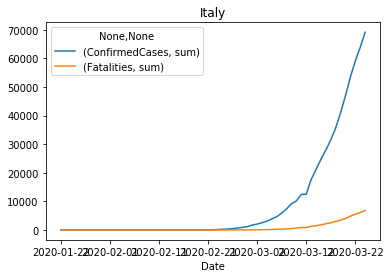

In [7]:
confirmed_total_date_Italy = df[df['Country/Region']=='Italy'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Italy = df[df['Country/Region']=='Italy'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Italy = confirmed_total_date_Italy.join(fatalities_total_date_Italy)
total_date_Italy.plot(ax=plt.gca(), title='Italy')

In [8]:
# building datasets for every country
# &(df['Lat'] == df[df['Country/Region'] == c].Lat.iloc[0])
countries_data = {}
for c in df['Country/Region'].unique():
    countries_data[c]=df[(df['Country/Region'] == c)]
    countries_data[c].insert(0, 'New_ID', countries_data[c].Id - countries_data[c].Id.iloc[0])

In [9]:
countries_data['China']

New_ID    Id Province/State Country/Region      Lat      Long  \
2961       0  4372          Anhui          China  31.8257  117.2264   
2962       1  4373          Anhui          China  31.8257  117.2264   
2963       2  4374          Anhui          China  31.8257  117.2264   
2964       3  4375          Anhui          China  31.8257  117.2264   
2965       4  4376          Anhui          China  31.8257  117.2264   
...      ...   ...            ...            ...      ...       ...   
5035    3034  7406       Zhejiang          China  29.1832  120.0934   
5036    3035  7407       Zhejiang          China  29.1832  120.0934   
5037    3036  7408       Zhejiang          China  29.1832  120.0934   
5038    3037  7409       Zhejiang          China  29.1832  120.0934   
5039    3038  7410       Zhejiang          China  29.1832  120.0934   

            Date  ConfirmedCases  Fatalities  
2961  2020-01-22             1.0         0.0  
2962  2020-01-23             9.0         0.0  
2963  2020-01-24            15.0         0.0  
2964  2020-01-25            39.0         0.0  
2965  2020-01-26            60.0         0.0  
...          ...             ...         ...  
5035  2020-03-20          1234.0         1.0  
5036  2020-03-21          1236.0         1.0  
5037  2020-03-22          1237.0         1.0  
5038  2020-03-23          1238.0         1.0  
5039  2020-03-24          1240.0         1.0  

[2079 rows x 9 columns]

In [10]:
# applying polynomial regression
x = countries_data['China']
x = x[(x.Lat == 29.1832) & (x.Long == 120.0934)]
x.New_ID = x.New_ID - x.New_ID.iloc[0]
x

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


New_ID    Id Province/State Country/Region      Lat      Long  \
4977       0  7348       Zhejiang          China  29.1832  120.0934   
4978       1  7349       Zhejiang          China  29.1832  120.0934   
4979       2  7350       Zhejiang          China  29.1832  120.0934   
4980       3  7351       Zhejiang          China  29.1832  120.0934   
4981       4  7352       Zhejiang          China  29.1832  120.0934   
...      ...   ...            ...            ...      ...       ...   
5035      58  7406       Zhejiang          China  29.1832  120.0934   
5036      59  7407       Zhejiang          China  29.1832  120.0934   
5037      60  7408       Zhejiang          China  29.1832  120.0934   
5038      61  7409       Zhejiang          China  29.1832  120.0934   
5039      62  7410       Zhejiang          China  29.1832  120.0934   

            Date  ConfirmedCases  Fatalities  
4977  2020-01-22            10.0         0.0  
4978  2020-01-23            27.0         0.0  
4979  2020-01-24            43.0         0.0  
4980  2020-01-25            62.0         0.0  
4981  2020-01-26           104.0         0.0  
...          ...             ...         ...  
5035  2020-03-20          1234.0         1.0  
5036  2020-03-21          1236.0         1.0  
5037  2020-03-22          1237.0         1.0  
5038  2020-03-23          1238.0         1.0  
5039  2020-03-24          1240.0         1.0  

[63 rows x 9 columns]

In [41]:
def build_model(c, lat, long, target, num):

    data = countries_data[c]
    data = data[(data.Lat == lat) & (data.Long == long)]
    data.New_ID = data.New_ID - data.New_ID.iloc[0]
    #X = np.array(countries_data[c]['New_ID']).reshape(-1, 1)
    #y = np.array(countries_data[c][target])
    X = np.array(data['New_ID']).reshape(-1, 1)
    y = np.array(data[target])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    scores = []

    for i in range(1, 11):
        print("Euation of "+str(i)+" Degree BEGINS")
        poly = PolynomialFeatures(degree=i)
        poly_x = poly.fit_transform(X_train)
        pol_reg = LinearRegression()
        pol_reg.fit(poly_x, y_train)
        print("Euation of "+str(i)+" Degree Ends with acc = "+str(pol_reg.score(poly.fit_transform(X_test), y_test)*100) + "%")
        scores.append(pol_reg.score(poly.fit_transform(X_test), y_test))
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
    ax1.plot(X, y)
    ax1.set_title(c + " confirmed cases", size=13)
    ax1.set_ylabel("Number of cases", size=13)
    ax1.set_xlabel("Date_ID", size=13)
    ax2.plot(range(1, 11), scores, color='orange')
    ax2.set_title("Accuracy vs. Degree", size=13)
    ax2.set_ylabel("Accuracy", size=13)
    ax2.set_xlabel("Degree", size=13)
    
    # finding best degree for each country
    max_ = 0
    max_i = 0
    for index, acc in enumerate(scores):
        if acc > max_:
            max_ = acc
            max_i = index
    print("Best PolynomialDegree is " + str(max_i+1) + " with accuracy " + str(max_*100) + "%")
    max_i += 1
    poly = PolynomialFeatures(degree=max_i)
    poly_x = poly.fit_transform(X_train)
    pol_reg = LinearRegression()
    pol_reg.fit(poly_x, y_train)
    prediction = pol_reg.predict(poly.fit_transform([[num]]))
    return int(prediction)

Euation of 1 Degree BEGINS
Euation of 1 Degree Ends with acc = -19.881590784870905%
Euation of 2 Degree BEGINS
Euation of 2 Degree Ends with acc = 56.86099042701515%
Euation of 3 Degree BEGINS
Euation of 3 Degree Ends with acc = 92.11826196806034%
Euation of 4 Degree BEGINS
Euation of 4 Degree Ends with acc = 98.65058852528269%
Euation of 5 Degree BEGINS
Euation of 5 Degree Ends with acc = 98.34903163106603%
Euation of 6 Degree BEGINS
Euation of 6 Degree Ends with acc = 97.93249296726869%
Euation of 7 Degree BEGINS
Euation of 7 Degree Ends with acc = 97.93593159231338%
Euation of 8 Degree BEGINS
Euation of 8 Degree Ends with acc = 97.99610306882946%
Euation of 9 Degree BEGINS
Euation of 9 Degree Ends with acc = 97.99130459910639%
Euation of 10 Degree BEGINS
Euation of 10 Degree Ends with acc = 97.96337623047636%
Best PolynomialDegree is 4 with accuracy 98.65058852528269%


332

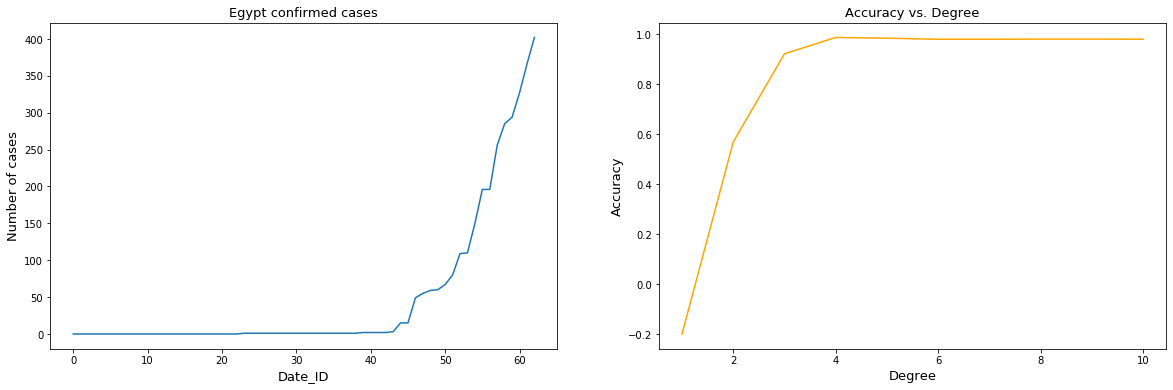

In [42]:
build_model('Egypt',26, 30, 'ConfirmedCases', 60) # for Egypt

Euation of 1 Degree BEGINS
Euation of 1 Degree Ends with acc = -192.1287532567151%
Euation of 2 Degree BEGINS
Euation of 2 Degree Ends with acc = -164.86960391029316%
Euation of 3 Degree BEGINS
Euation of 3 Degree Ends with acc = -14.01993537622863%
Euation of 4 Degree BEGINS
Euation of 4 Degree Ends with acc = 75.26216465786895%
Euation of 5 Degree BEGINS
Euation of 5 Degree Ends with acc = 89.70144410092283%
Euation of 6 Degree BEGINS
Euation of 6 Degree Ends with acc = 93.88963602020584%
Euation of 7 Degree BEGINS
Euation of 7 Degree Ends with acc = 96.54855337654901%
Euation of 8 Degree BEGINS
Euation of 8 Degree Ends with acc = 95.58568782151409%
Euation of 9 Degree BEGINS
Euation of 9 Degree Ends with acc = 93.1089461190845%
Euation of 10 Degree BEGINS
Euation of 10 Degree Ends with acc = 92.58440528168893%
Best PolynomialDegree is 7 with accuracy 96.54855337654901%


13

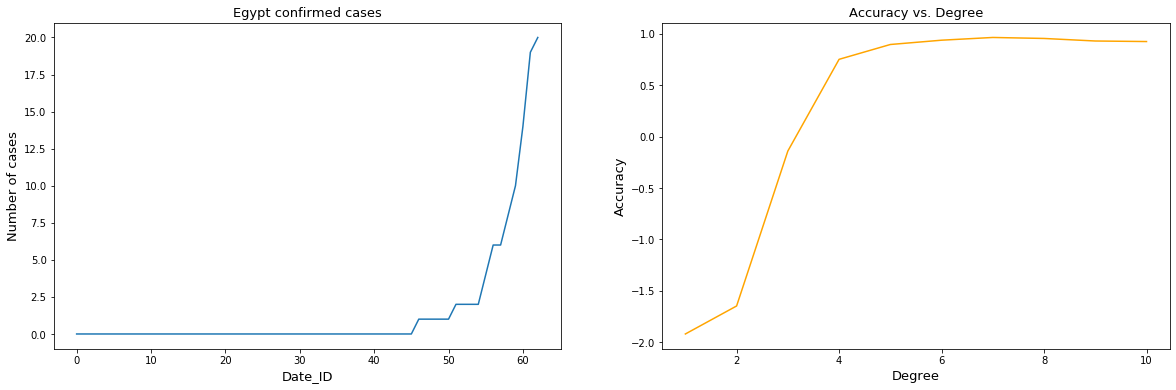

In [43]:
build_model('Egypt',26, 30, 'Fatalities', 60) # for Egypt

Euation of 1 Degree BEGINS
Euation of 1 Degree Ends with acc = 23.570528599022364%
Euation of 2 Degree BEGINS
Euation of 2 Degree Ends with acc = 53.06059082097925%
Euation of 3 Degree BEGINS
Euation of 3 Degree Ends with acc = 78.64915651116738%
Euation of 4 Degree BEGINS
Euation of 4 Degree Ends with acc = 93.53958839630106%
Euation of 5 Degree BEGINS
Euation of 5 Degree Ends with acc = 98.870763396681%
Euation of 6 Degree BEGINS
Euation of 6 Degree Ends with acc = 99.81382080134156%
Euation of 7 Degree BEGINS
Euation of 7 Degree Ends with acc = 99.85964962663988%
Euation of 8 Degree BEGINS
Euation of 8 Degree Ends with acc = 99.8563344107827%
Euation of 9 Degree BEGINS
Euation of 9 Degree Ends with acc = 99.85132834077636%
Euation of 10 Degree BEGINS
Euation of 10 Degree Ends with acc = 99.85621230739412%
Best PolynomialDegree is 7 with accuracy 99.85964962663988%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array([151.42840748])

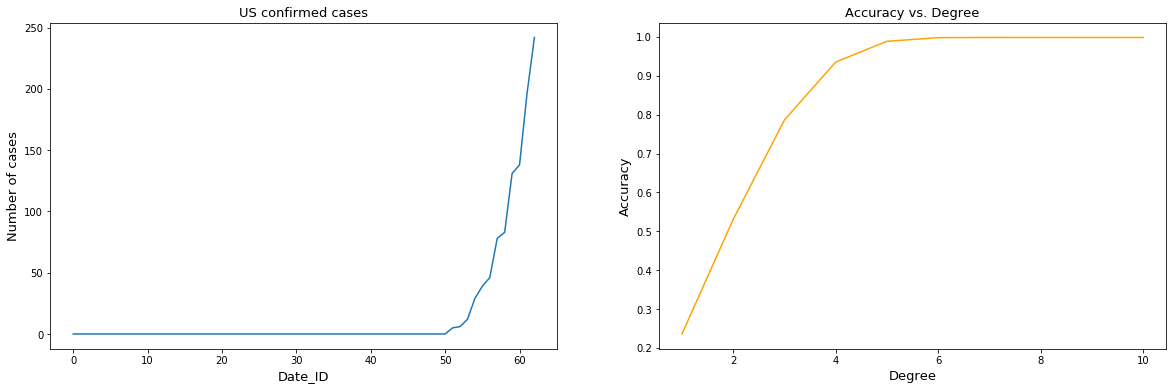

In [12]:
build_model('US',32.3182, -86.9023, 'ConfirmedCases', 60) # for USA

Euation of 1 Degree BEGINS
Euation of 1 Degree Ends with acc = 67.47565398298275%
Euation of 2 Degree BEGINS
Euation of 2 Degree Ends with acc = 96.19501338328047%
Euation of 3 Degree BEGINS
Euation of 3 Degree Ends with acc = 97.85106780215828%
Euation of 4 Degree BEGINS
Euation of 4 Degree Ends with acc = 98.67244088958823%
Euation of 5 Degree BEGINS
Euation of 5 Degree Ends with acc = 99.8091327391055%
Euation of 6 Degree BEGINS
Euation of 6 Degree Ends with acc = 99.83081388771399%
Euation of 7 Degree BEGINS
Euation of 7 Degree Ends with acc = 99.88716415827051%
Euation of 8 Degree BEGINS
Euation of 8 Degree Ends with acc = 99.95781785324743%
Euation of 9 Degree BEGINS
Euation of 9 Degree Ends with acc = 99.94288965445956%
Euation of 10 Degree BEGINS
Euation of 10 Degree Ends with acc = 99.82981499042319%
Best PolynomialDegree is 8 with accuracy 99.95781785324743%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array([998.62727846])

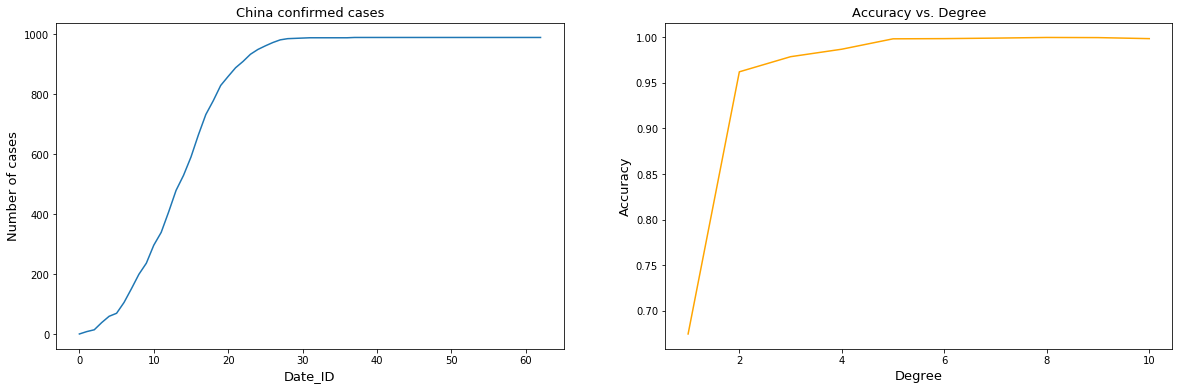

In [13]:
build_model('China', 31.8257 ,117.2264, 'ConfirmedCases', 60) # for France

Euation of 1 Degree BEGINS
Euation of 1 Degree Ends with acc = -129221.46200891452%
Euation of 2 Degree BEGINS
Euation of 2 Degree Ends with acc = -53834.69647956061%
Euation of 3 Degree BEGINS
Euation of 3 Degree Ends with acc = -13638.856072378845%
Euation of 4 Degree BEGINS
Euation of 4 Degree Ends with acc = -1338.5923802487603%
Euation of 5 Degree BEGINS
Euation of 5 Degree Ends with acc = 7.82012194252829%
Euation of 6 Degree BEGINS
Euation of 6 Degree Ends with acc = -48.14357145680723%
Euation of 7 Degree BEGINS
Euation of 7 Degree Ends with acc = 84.51023356064567%
Euation of 8 Degree BEGINS
Euation of 8 Degree Ends with acc = 98.6435951837666%
Euation of 9 Degree BEGINS
Euation of 9 Degree Ends with acc = 93.90261841876291%
Euation of 10 Degree BEGINS
Euation of 10 Degree Ends with acc = 89.34695263680422%
Best PolynomialDegree is 8 with accuracy 98.6435951837666%


array([5388.23726595])

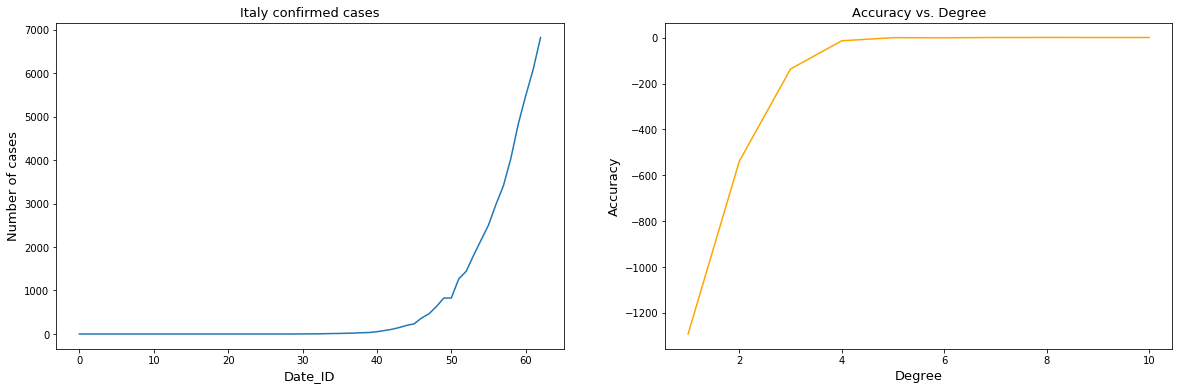

In [14]:
build_model('Italy',43,12, 'Fatalities', 60) # for Italy

In [32]:
build_model('Italy',43,12, 'Fatalities', 60) # for Italy

Best PolynomialDegree is 8 with accuracy 99.89938198554091%


5359

In [25]:
# test file reading
dt = pd.read_csv('test_copy.csv')

In [16]:
dt.head()

ForecastId Province/State Country/Region   Lat  Long        Date
0           1            NaN    Afghanistan  33.0  65.0  2020-03-12
1           2            NaN    Afghanistan  33.0  65.0  2020-03-13
2           3            NaN    Afghanistan  33.0  65.0  2020-03-14
3           4            NaN    Afghanistan  33.0  65.0  2020-03-15
4           5            NaN    Afghanistan  33.0  65.0  2020-03-16

In [17]:
X = dt[['Country/Region', 'Lat', 'Long']]
X

Country/Region      Lat     Long
0        Afghanistan  33.0000  65.0000
1        Afghanistan  33.0000  65.0000
2        Afghanistan  33.0000  65.0000
3        Afghanistan  33.0000  65.0000
4        Afghanistan  33.0000  65.0000
...              ...      ...      ...
12207         Zambia -15.4167  28.2833
12208         Zambia -15.4167  28.2833
12209         Zambia -15.4167  28.2833
12210         Zambia -15.4167  28.2833
12211         Zambia -15.4167  28.2833

[12212 rows x 3 columns]

In [26]:
dt.iloc[0, 2], dt.iloc[0, 3], dt.iloc[0, 4]

('Afghanistan', 33.0, 65.0)

In [38]:
import csv
with open('mysubmissions.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["ForecastId", "ConfirmedCases", "Fatalities"])

In [40]:
counter = 50
with open('mysubmissions.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["ForecastId", "ConfirmedCases", "Fatalities"])
    for i in range(1, len(dt)+1):
        print('writing to ' + str(i) + 'th row')
        writer.writerow([i,build_model(dt.iloc[i, 2], dt.iloc[i, 3], dt.iloc[i, 4], 'ConfirmedCases', counter),
            build_model(dt.iloc[i, 2], dt.iloc[i, 3], dt.iloc[i, 4], 'Fatalities', counter)])
    if counter == 93:
        counter = 50
    else:
        counter += 1

writing to 1th row
Best PolynomialDegree is 9 with accuracy 97.24737716754537%
Best PolynomialDegree is 5 with accuracy 98.63428039130287%
writing to 2th row
Best PolynomialDegree is 10 with accuracy 97.32932533147576%
Best PolynomialDegree is 1 with accuracy 0%
writing to 3th row
Best PolynomialDegree is 10 with accuracy 93.10373434286791%
Best PolynomialDegree is 7 with accuracy 50.71815837672426%
writing to 4th row
Best PolynomialDegree is 5 with accuracy 44.42075354692059%
Best PolynomialDegree is 1 with accuracy 0%
writing to 5th row
Best PolynomialDegree is 10 with accuracy 87.21183949264937%
Best PolynomialDegree is 6 with accuracy 68.43893554077584%
writing to 6th row
Best PolynomialDegree is 10 with accuracy 91.06104528518173%
Best PolynomialDegree is 1 with accuracy 0%
writing to 7th row
Best PolynomialDegree is 10 with accuracy 98.93393199960381%
Best PolynomialDegree is 1 with accuracy 0%
writing to 8th row
Best PolynomialDegree is 10 with accuracy 98.17819032809017%
Best P

Best PolynomialDegree is 8 with accuracy 90.01090006253105%
writing to 73th row
Best PolynomialDegree is 10 with accuracy 99.34950878630288%
Best PolynomialDegree is 8 with accuracy 84.00554163923503%
writing to 74th row
Best PolynomialDegree is 10 with accuracy 98.99074859419191%
Best PolynomialDegree is 3 with accuracy 88.33951861498839%
writing to 75th row
Best PolynomialDegree is 10 with accuracy 98.3678221855546%
Best PolynomialDegree is 1 with accuracy 0%
writing to 76th row
Best PolynomialDegree is 10 with accuracy 99.65805693559375%
Best PolynomialDegree is 6 with accuracy 92.12236690416286%
writing to 77th row
Best PolynomialDegree is 8 with accuracy 99.6850181744781%
Best PolynomialDegree is 3 with accuracy 89.9313884472608%
writing to 78th row
Best PolynomialDegree is 10 with accuracy 99.76651565540226%
Best PolynomialDegree is 10 with accuracy 89.83673334113188%
writing to 79th row
Best PolynomialDegree is 10 with accuracy 99.60049596674152%
Best PolynomialDegree is 8 with 

Best PolynomialDegree is 10 with accuracy 93.94336328634961%
writing to 136th row
Best PolynomialDegree is 9 with accuracy 98.46419449099405%
Best PolynomialDegree is 1 with accuracy 0%
writing to 137th row
Best PolynomialDegree is 8 with accuracy 99.74353970489%
Best PolynomialDegree is 1 with accuracy 0%
writing to 138th row
Best PolynomialDegree is 9 with accuracy 99.57707966459249%
Best PolynomialDegree is 1 with accuracy 0%
writing to 139th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 0%
writing to 140th row
Best PolynomialDegree is 10 with accuracy 98.46822407136628%
Best PolynomialDegree is 5 with accuracy 70.9087804716625%
writing to 141th row
Best PolynomialDegree is 7 with accuracy 99.71560484561081%
Best PolynomialDegree is 6 with accuracy 68.22817938251279%
writing to 142th row
Best PolynomialDegree is 6 with accuracy 98.68639326413215%
Best PolynomialDegree is 5 with accuracy 56.13331410502913%
writing to 143th row
Best Polynomia

Best PolynomialDegree is 10 with accuracy 80.51285231885954%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 205th row
Best PolynomialDegree is 8 with accuracy 92.95989444946329%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 206th row
Best PolynomialDegree is 10 with accuracy 78.24930835310225%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 207th row
Best PolynomialDegree is 10 with accuracy 90.82530503171068%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 208th row
Best PolynomialDegree is 10 with accuracy 91.99436628932199%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 209th row
Best PolynomialDegree is 2 with accuracy 58.912489908250265%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 210th row
Best PolynomialDegree is 10 with accuracy 72.4412698845104%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 211th row
Best PolynomialDegree is 10 with accuracy 52.77130678839257%
Best PolynomialDegree is 1 with

Best PolynomialDegree is 10 with accuracy 99.24865371232805%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 268th row
Best PolynomialDegree is 9 with accuracy 99.74431701633567%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 269th row
Best PolynomialDegree is 7 with accuracy 99.57113488811967%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 270th row
Best PolynomialDegree is 9 with accuracy 89.68114125985574%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 271th row
Best PolynomialDegree is 9 with accuracy 99.81782136432753%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 272th row
Best PolynomialDegree is 10 with accuracy 99.70312806240213%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 273th row
Best PolynomialDegree is 9 with accuracy 99.59510049153981%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 274th row
Best PolynomialDegree is 10 with accuracy 99.80276522209584%
Best PolynomialDegree is 1 with ac

Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 341th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 342th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 343th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 344th row
Best PolynomialDegree is 9 with accuracy 49.813003740634485%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 345th row
Best PolynomialDegree is 7 with accuracy 97.46642740883087%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 346th row
Best PolynomialDegree is 10 with accuracy 99.50451170752574%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 347th row
Best PolynomialDegree is 8 with accuracy 96.59818074304445%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 348th row
Best Polynomia

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 350th row
Best PolynomialDegree is 7 with accuracy 97.52370083084455%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 351th row
Best PolynomialDegree is 10 with accuracy 97.05963048757916%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 352th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 353th row
Best PolynomialDegree is 9 with accuracy 91.60126967959361%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 354th row
Best PolynomialDegree is 7 with accuracy 98.6203448768021%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 355th row
Best PolynomialDegree is 9 with accuracy 96.02049569001491%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 356th row
Best PolynomialDegree is 9 with accuracy 56.45890601328419%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 357th row
Best PolynomialDegree is 9 with accuracy 99.

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 358th row
Best PolynomialDegree is 9 with accuracy 96.28925404919468%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 359th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 360th row
Best PolynomialDegree is 7 with accuracy 99.08156671734679%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 361th row
Best PolynomialDegree is 8 with accuracy 96.38460507268663%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 362th row
Best PolynomialDegree is 10 with accuracy 83.91077461035921%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 363th row
Best PolynomialDegree is 9 with accuracy 92.74034629190149%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 364th row
Best PolynomialDegree is 9 with accuracy 46.50718396063014%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 365th row
Best PolynomialDegree is 9 with accuracy 81

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 368th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 369th row
Best PolynomialDegree is 9 with accuracy 26.224976734450056%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 370th row
Best PolynomialDegree is 9 with accuracy 98.08025550442268%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 371th row
Best PolynomialDegree is 9 with accuracy 97.70358975843273%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 372th row
Best PolynomialDegree is 7 with accuracy 97.22592561753693%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 373th row
Best PolynomialDegree is 9 with accuracy 79.32723455041378%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 374th row
Best PolynomialDegree is 9 with accuracy 47.28826677893846%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 375th row

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 376th row
Best PolynomialDegree is 8 with accuracy 96.51414340543629%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 377th row
Best PolynomialDegree is 9 with accuracy 89.81469872692111%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 378th row
Best PolynomialDegree is 9 with accuracy 99.59891461517894%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 379th row
Best PolynomialDegree is 9 with accuracy 86.98569692399833%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 380th row
Best PolynomialDegree is 8 with accuracy 98.28500042754986%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 381th row
Best PolynomialDegree is 6 with accuracy 98.77203342359806%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 382th row
Best PolynomialDegree is 9 with accuracy 67.12550879518383%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 383th row
Best PolynomialDegree is 9 w

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 386th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 387th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 388th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 389th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 390th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 391th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 392th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 393th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 394th row

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 395th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 396th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 397th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 398th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 399th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 400th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 401th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 402th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 403th

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 405th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 406th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 407th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 408th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 409th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 410th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 411th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 412th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialD

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 414th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 415th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 416th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 417th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 418th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 419th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 420th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 421th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 422th

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 424th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 425th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 426th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 427th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 428th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 429th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 430th row
Best PolynomialDegree is 8 with accuracy 99.84534764397475%
Best PolynomialDegree is 10 with accuracy 83.12386813960966%
writing to 431th row
Best PolynomialDegree is 10 with accura

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 98.61276768406063%
writing to 433th row
Best PolynomialDegree is 8 with accuracy 99.7963721925272%
Best PolynomialDegree is 10 with accuracy 97.34138294790343%
writing to 434th row
Best PolynomialDegree is 8 with accuracy 99.84635438504384%
Best PolynomialDegree is 10 with accuracy 96.82895583750233%
writing to 435th row
Best PolynomialDegree is 8 with accuracy 99.94233356474061%
Best PolynomialDegree is 4 with accuracy 91.76413915256698%
writing to 436th row
Best PolynomialDegree is 7 with accuracy 99.64989588876007%
Best PolynomialDegree is 10 with accuracy 92.59947695251199%
writing to 437th row
Best PolynomialDegree is 10 with accuracy 99.9256298138462%
Best PolynomialDegree is 10 with accuracy 96.38140542401285%
writing to 438th row
Best PolynomialDegree is 8 with accuracy 99.8047669041691%
Best PolynomialDegree is 10 with accuracy 95.50898246445271%
writing to 439th row
Best PolynomialDegree is 8 with accuracy 99.57812965815039%
Best Poly

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 86.92608691424918%
writing to 442th row
Best PolynomialDegree is 10 with accuracy 99.86044096579917%
Best PolynomialDegree is 10 with accuracy 88.21563390430147%
writing to 443th row
Best PolynomialDegree is 10 with accuracy 99.68220119130727%
Best PolynomialDegree is 10 with accuracy 97.44645532150143%
writing to 444th row
Best PolynomialDegree is 8 with accuracy 99.86926698255459%
Best PolynomialDegree is 3 with accuracy 97.94715429226486%
writing to 445th row
Best PolynomialDegree is 10 with accuracy 99.91757965028802%
Best PolynomialDegree is 3 with accuracy 95.07731163393596%
writing to 446th row
Best PolynomialDegree is 10 with accuracy 99.81141004730155%
Best PolynomialDegree is 3 with accuracy 97.34644622416259%
writing to 447th row
Best PolynomialDegree is 8 with accuracy 99.84483416572772%
Best PolynomialDegree is 10 with accuracy 94.2851006833618%
writing to 448th row
Best PolynomialDegree is 10 with accuracy 99.98586213807438%
Best 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 98.02250270884687%
writing to 452th row
Best PolynomialDegree is 8 with accuracy 99.8811536987261%
Best PolynomialDegree is 3 with accuracy 98.27836037942218%
writing to 453th row
Best PolynomialDegree is 10 with accuracy 99.8451017979391%
Best PolynomialDegree is 10 with accuracy 87.58296083672823%
writing to 454th row
Best PolynomialDegree is 9 with accuracy 99.85233288260456%
Best PolynomialDegree is 10 with accuracy 95.51973788659906%
writing to 455th row
Best PolynomialDegree is 9 with accuracy 99.84969054669139%
Best PolynomialDegree is 9 with accuracy 97.29129802719883%
writing to 456th row
Best PolynomialDegree is 10 with accuracy 99.61273320415755%
Best PolynomialDegree is 10 with accuracy 97.80119102384342%
writing to 457th row
Best PolynomialDegree is 10 with accuracy 99.83319267833875%
Best PolynomialDegree is 9 with accuracy 94.09260749111478%
writing to 458th row
Best PolynomialDegree is 10 with accuracy 99.8674644513581%
Best Poly

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.88922946201552%
Best PolynomialDegree is 8 with accuracy 98.32719040688953%
writing to 462th row
Best PolynomialDegree is 10 with accuracy 99.74312606458156%
Best PolynomialDegree is 3 with accuracy 98.77816948822932%
writing to 463th row
Best PolynomialDegree is 8 with accuracy 99.86088385669146%
Best PolynomialDegree is 10 with accuracy 76.55646706980595%
writing to 464th row
Best PolynomialDegree is 8 with accuracy 99.96642042888193%
Best PolynomialDegree is 10 with accuracy 92.65068698825225%
writing to 465th row
Best PolynomialDegree is 7 with accuracy 99.03450365279423%
Best PolynomialDegree is 10 with accuracy 97.54046201791942%
writing to 466th row
Best PolynomialDegree is 7 with accuracy 99.89435952393673%
Best PolynomialDegree is 9 with accuracy 94.43196374719889%
writing to 467th row
Best PolynomialDegree is 10 with accuracy 99.79755489392362%
Best PolynomialDegree is 3 with accuracy 97.00255323421372%
writing to 468th row
Best Po

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 95.12982441560304%
writing to 472th row
Best PolynomialDegree is 10 with accuracy 99.9764038412707%
Best PolynomialDegree is 3 with accuracy 93.92515218035771%
writing to 473th row
Best PolynomialDegree is 7 with accuracy 57.03007726958103%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 474th row
Best PolynomialDegree is 7 with accuracy 98.22465729244593%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 475th row
Best PolynomialDegree is 9 with accuracy 50.651158092050416%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 476th row
Best PolynomialDegree is 10 with accuracy 96.57463128412641%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 477th row
Best PolynomialDegree is 7 with accuracy 66.53249950707871%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 478th row
Best PolynomialDegree is 7 with accuracy 97.25079480234513%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 479th row
B

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 93.52827128402443%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 482th row
Best PolynomialDegree is 8 with accuracy 96.08443309026686%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 483th row
Best PolynomialDegree is 8 with accuracy 93.24142185974645%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 484th row
Best PolynomialDegree is 10 with accuracy 94.09875680744163%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 485th row
Best PolynomialDegree is 8 with accuracy 96.78085459398666%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 486th row
Best PolynomialDegree is 7 with accuracy 85.06665203307696%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 487th row
Best PolynomialDegree is 8 with accuracy 97.05572853189956%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 488th row
Best PolynomialDegree is 7 with accuracy 76.48172369944999%
Best PolynomialDegree is 1 with accu

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 492th row
Best PolynomialDegree is 6 with accuracy 92.91875620374518%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 493th row
Best PolynomialDegree is 6 with accuracy 96.20566201040931%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 494th row
Best PolynomialDegree is 7 with accuracy 97.89402085774601%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 495th row
Best PolynomialDegree is 6 with accuracy 92.98991762131857%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 496th row
Best PolynomialDegree is 8 with accuracy 94.0976330722166%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 497th row
Best PolynomialDegree is 10 with accuracy 40.19002477494003%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 498th row
Best PolynomialDegree is 8 with accuracy 97.26814348849288%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 499th row
Best PolynomialDegree is 7 w

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 3 with accuracy 94.18321588390738%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 503th row
Best PolynomialDegree is 8 with accuracy 93.51307954387026%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 504th row
Best PolynomialDegree is 4 with accuracy 96.49176391306605%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 505th row
Best PolynomialDegree is 8 with accuracy 51.64057328556606%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 506th row
Best PolynomialDegree is 7 with accuracy 96.49846150451543%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 507th row
Best PolynomialDegree is 7 with accuracy 84.37478563787731%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 508th row
Best PolynomialDegree is 9 with accuracy 91.6137467781516%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 509th row
Best PolynomialDegree is 8 with accuracy 87.86965389769522%
Best PolynomialDegree is 1 with accura

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 512th row
Best PolynomialDegree is 6 with accuracy 97.11186983117908%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 513th row
Best PolynomialDegree is 10 with accuracy 72.79294408042998%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 514th row
Best PolynomialDegree is 8 with accuracy 71.73631405619871%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 515th row
Best PolynomialDegree is 8 with accuracy 95.57865145434788%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 516th row
Best PolynomialDegree is 10 with accuracy 99.49012085772702%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 517th row
Best PolynomialDegree is 7 with accuracy 95.12393312471102%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 518th row
Best PolynomialDegree is 7 with accuracy 99.64076569463114%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 519th row
Best PolynomialDegree is 6

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 99.4141128152698%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 521th row
Best PolynomialDegree is 7 with accuracy 97.30071262535641%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 522th row
Best PolynomialDegree is 8 with accuracy 98.93111004171354%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 523th row
Best PolynomialDegree is 10 with accuracy 99.4718785916983%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 524th row
Best PolynomialDegree is 5 with accuracy 98.5065961449929%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 525th row
Best PolynomialDegree is 5 with accuracy 98.47123514990982%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 526th row
Best PolynomialDegree is 7 with accuracy 99.0109838252466%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 527th row
Best PolynomialDegree is 10 with accuracy 82.8012864461072%
Best PolynomialDegree is 1 with accuracy

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 529th row
Best PolynomialDegree is 6 with accuracy 99.06432575786481%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 530th row
Best PolynomialDegree is 6 with accuracy 98.09244144277002%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 531th row
Best PolynomialDegree is 7 with accuracy 98.53649518278729%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 532th row
Best PolynomialDegree is 8 with accuracy 98.43463412785466%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 533th row
Best PolynomialDegree is 7 with accuracy 98.87294956342907%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 534th row
Best PolynomialDegree is 7 with accuracy 94.82440351132166%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 535th row
Best PolynomialDegree is 9 with accuracy 99.91580475315989%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 536th row
Best PolynomialDegree is 10 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 99.22603429977399%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 539th row
Best PolynomialDegree is 7 with accuracy 99.5920416544603%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 540th row
Best PolynomialDegree is 7 with accuracy 95.35166908876978%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 541th row
Best PolynomialDegree is 8 with accuracy 99.06385689668235%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 542th row
Best PolynomialDegree is 6 with accuracy 98.53721847743967%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 543th row
Best PolynomialDegree is 6 with accuracy 99.2129522805768%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 544th row
Best PolynomialDegree is 7 with accuracy 99.89517648813955%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 545th row
Best PolynomialDegree is 7 with accuracy 99.95527484171429%
Best PolynomialDegree is 1 with accurac

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 98.49864193418912%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 548th row
Best PolynomialDegree is 10 with accuracy 97.94089152284401%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 549th row
Best PolynomialDegree is 7 with accuracy 97.58429858328846%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 550th row
Best PolynomialDegree is 10 with accuracy 99.4652943440546%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 551th row
Best PolynomialDegree is 6 with accuracy 99.52967581329756%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 552th row
Best PolynomialDegree is 7 with accuracy 99.57155695848783%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 553th row
Best PolynomialDegree is 7 with accuracy 99.61108536504258%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 554th row
Best PolynomialDegree is 7 with accuracy 99.56554327241055%
Best PolynomialDegree is 1 with accu

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 98.44457232055277%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 557th row
Best PolynomialDegree is 6 with accuracy 99.81042599543981%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 558th row
Best PolynomialDegree is 10 with accuracy 99.29419589216447%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 559th row
Best PolynomialDegree is 8 with accuracy 99.6672463064378%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 560th row
Best PolynomialDegree is 7 with accuracy 99.518527452538%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 561th row
Best PolynomialDegree is 10 with accuracy 97.31929769269598%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 562th row
Best PolynomialDegree is 9 with accuracy 99.37904275203108%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 563th row
Best PolynomialDegree is 9 with accuracy 99.20582124170562%
Best PolynomialDegree is 1 with accura

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 94.0803466947358%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 566th row
Best PolynomialDegree is 8 with accuracy 99.6040993130484%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 567th row
Best PolynomialDegree is 9 with accuracy 99.39345705190435%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 568th row
Best PolynomialDegree is 7 with accuracy 99.80935412906213%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 569th row
Best PolynomialDegree is 7 with accuracy 99.66846137927233%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 570th row
Best PolynomialDegree is 9 with accuracy 99.18976288580149%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 571th row
Best PolynomialDegree is 10 with accuracy 96.25855802944929%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 572th row
Best PolynomialDegree is 7 with accuracy 99.59071638431425%
Best PolynomialDegree is 1 with accur

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 99.67134156038902%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 576th row
Best PolynomialDegree is 9 with accuracy 99.50633701459437%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 577th row
Best PolynomialDegree is 7 with accuracy 99.73189471274351%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 578th row
Best PolynomialDegree is 10 with accuracy 98.93279711780869%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 579th row
Best PolynomialDegree is 9 with accuracy 99.41423646834969%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 580th row
Best PolynomialDegree is 7 with accuracy 99.88195654287671%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 581th row
Best PolynomialDegree is 10 with accuracy 98.96199910068111%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 582th row
Best PolynomialDegree is 9 with accuracy 97.73096565032422%
Best PolynomialDegree is 1 with acc

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 97.52330402559748%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 585th row
Best PolynomialDegree is 8 with accuracy 99.66801407846505%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 586th row
Best PolynomialDegree is 10 with accuracy 99.66110179316078%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 587th row
Best PolynomialDegree is 10 with accuracy 96.30442823610518%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 588th row
Best PolynomialDegree is 8 with accuracy 99.66746334930518%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 589th row
Best PolynomialDegree is 9 with accuracy 97.5050629710054%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 590th row
Best PolynomialDegree is 10 with accuracy 99.71920932690561%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 591th row
Best PolynomialDegree is 9 with accuracy 98.25525353180801%
Best PolynomialDegree is 1 with ac

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 594th row
Best PolynomialDegree is 10 with accuracy 99.31745613304763%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 595th row
Best PolynomialDegree is 9 with accuracy 99.24021897796754%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 596th row
Best PolynomialDegree is 10 with accuracy 97.54172510244533%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 597th row
Best PolynomialDegree is 8 with accuracy 99.46823276482144%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 598th row
Best PolynomialDegree is 7 with accuracy 99.76883633266296%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 599th row
Best PolynomialDegree is 10 with accuracy 61.95342568695854%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 600th row
Best PolynomialDegree is 10 with accuracy 94.2739585683907%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 601th row
Best PolynomialDegree is 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 604th row
Best PolynomialDegree is 6 with accuracy 95.99186875742826%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 605th row
Best PolynomialDegree is 7 with accuracy 96.02477352116038%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 606th row
Best PolynomialDegree is 10 with accuracy 97.14799145311066%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 607th row
Best PolynomialDegree is 8 with accuracy 96.64381750155317%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 608th row
Best PolynomialDegree is 10 with accuracy 97.22554937171152%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 609th row
Best PolynomialDegree is 8 with accuracy 84.39724933159934%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 610th row
Best PolynomialDegree is 5 with accuracy 99.38776914089924%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 611th row
Best PolynomialDegree is 8

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 98.05229910794897%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 615th row
Best PolynomialDegree is 5 with accuracy 99.06928905779128%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 616th row
Best PolynomialDegree is 8 with accuracy 97.56328434709609%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 617th row
Best PolynomialDegree is 8 with accuracy 97.18996594464947%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 618th row
Best PolynomialDegree is 7 with accuracy 84.42286357598066%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 619th row
Best PolynomialDegree is 6 with accuracy 98.62974272526523%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 620th row
Best PolynomialDegree is 7 with accuracy 96.30923437363728%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 621th row
Best PolynomialDegree is 4 with accuracy 98.06605238047713%
Best PolynomialDegree is 1 with accur

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 98.55222241541472%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 625th row
Best PolynomialDegree is 7 with accuracy 84.57623276691655%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 626th row
Best PolynomialDegree is 8 with accuracy 97.96330268766098%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 627th row
Best PolynomialDegree is 10 with accuracy 97.21652765077172%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 628th row
Best PolynomialDegree is 8 with accuracy 98.11475242946011%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 629th row
Best PolynomialDegree is 8 with accuracy 99.46960884328007%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 630th row
Best PolynomialDegree is 10 with accuracy 99.01502516309034%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 631th row
Best PolynomialDegree is 8 with accuracy 99.49155862420578%
Best PolynomialDegree is 1 with acc

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 78.08421727601817%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 635th row
Best PolynomialDegree is 5 with accuracy 99.1163089813151%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 636th row
Best PolynomialDegree is 5 with accuracy 93.98543231802275%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 637th row
Best PolynomialDegree is 8 with accuracy 98.56905185166558%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 638th row
Best PolynomialDegree is 5 with accuracy 98.85207315782714%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 639th row
Best PolynomialDegree is 10 with accuracy 97.61304140482497%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 640th row
Best PolynomialDegree is 8 with accuracy 98.08546564926208%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 641th row
Best PolynomialDegree is 8 with accuracy 98.35096925895294%
Best PolynomialDegree is 1 with accur

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 92.88910589830894%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 646th row
Best PolynomialDegree is 5 with accuracy 98.95719086333877%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 647th row
Best PolynomialDegree is 7 with accuracy 98.75806283714415%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 648th row
Best PolynomialDegree is 8 with accuracy 98.1308397463641%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 649th row
Best PolynomialDegree is 6 with accuracy 97.42930405606623%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 650th row
Best PolynomialDegree is 8 with accuracy 98.19845611221602%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 651th row
Best PolynomialDegree is 8 with accuracy 98.88480382761071%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 652th row
Best PolynomialDegree is 5 with accuracy 95.67176462338357%
Best PolynomialDegree is 1 with accura

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 656th row
Best PolynomialDegree is 5 with accuracy 99.64622017439656%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 657th row
Best PolynomialDegree is 8 with accuracy 98.09380760811852%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 658th row
Best PolynomialDegree is 9 with accuracy 96.14788348981313%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 659th row
Best PolynomialDegree is 7 with accuracy 96.7856603013024%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 660th row
Best PolynomialDegree is 7 with accuracy 74.7453590209499%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 661th row
Best PolynomialDegree is 6 with accuracy 97.88586226867038%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 662th row
Best PolynomialDegree is 6 with accuracy 99.52582797468311%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 663th row
Best PolynomialDegree is 5 wit

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 5 with accuracy 96.15456861559883%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 666th row
Best PolynomialDegree is 7 with accuracy 73.59090234574748%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 667th row
Best PolynomialDegree is 6 with accuracy 99.23929344227315%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 668th row
Best PolynomialDegree is 8 with accuracy 98.17746244186853%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 669th row
Best PolynomialDegree is 7 with accuracy 99.6665143770742%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 670th row
Best PolynomialDegree is 7 with accuracy 70.1636954236597%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 671th row
Best PolynomialDegree is 7 with accuracy 71.24505420412726%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 672th row
Best PolynomialDegree is 6 with accuracy 96.97344811356139%
Best PolynomialDegree is 1 with accurac

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 98.84948732958787%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 675th row
Best PolynomialDegree is 6 with accuracy 99.11176447753142%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 676th row
Best PolynomialDegree is 5 with accuracy 99.33433232033796%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 677th row
Best PolynomialDegree is 8 with accuracy 97.98455041028308%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 678th row
Best PolynomialDegree is 8 with accuracy 98.25538560505365%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 679th row
Best PolynomialDegree is 5 with accuracy 98.89022388084284%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 680th row
Best PolynomialDegree is 10 with accuracy 99.43697412227283%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 681th row
Best PolynomialDegree is 9 with accuracy 97.73318332782289%
Best PolynomialDegree is 1 with accu

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 99.61790215050314%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 684th row
Best PolynomialDegree is 6 with accuracy 97.04298962497015%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 685th row
Best PolynomialDegree is 6 with accuracy 98.92123698297243%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 686th row
Best PolynomialDegree is 8 with accuracy 97.95243099464004%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 687th row
Best PolynomialDegree is 8 with accuracy 93.88449831730222%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 688th row
Best PolynomialDegree is 8 with accuracy 96.99146802974641%
Best PolynomialDegree is 9 with accuracy 89.2403403063943%
writing to 689th row
Best PolynomialDegree is 6 with accuracy 99.92469533379534%
Best PolynomialDegree is 9 with accuracy 93.40219891476251%
writing to 690th row
Best PolynomialDegree is 9 with accuracy 99.94670388424541%
Best Polynomia

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 99.96922458360935%
Best PolynomialDegree is 9 with accuracy 82.28857251941723%
writing to 693th row
Best PolynomialDegree is 7 with accuracy 99.89782847820868%
Best PolynomialDegree is 9 with accuracy 93.58699640636861%
writing to 694th row
Best PolynomialDegree is 7 with accuracy 98.85059124179418%
Best PolynomialDegree is 8 with accuracy 97.02240685539202%
writing to 695th row
Best PolynomialDegree is 6 with accuracy 99.84633378173928%
Best PolynomialDegree is 8 with accuracy 98.25761105786887%
writing to 696th row
Best PolynomialDegree is 7 with accuracy 99.36368932585374%
Best PolynomialDegree is 8 with accuracy 94.90031834136539%
writing to 697th row
Best PolynomialDegree is 6 with accuracy 99.82267677508142%
Best PolynomialDegree is 9 with accuracy 97.53058796532434%
writing to 698th row
Best PolynomialDegree is 6 with accuracy 99.93442576820183%
Best PolynomialDegree is 8 with accuracy 88.65861352038061%
writing to 699th row
Best Polynomi

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 80.16303497629866%
Best PolynomialDegree is 8 with accuracy 88.65127715971482%
writing to 702th row
Best PolynomialDegree is 7 with accuracy 99.60168533016407%
Best PolynomialDegree is 9 with accuracy 93.67557833810193%
writing to 703th row
Best PolynomialDegree is 10 with accuracy 99.83953138436857%
Best PolynomialDegree is 9 with accuracy 97.06363693344817%
writing to 704th row
Best PolynomialDegree is 10 with accuracy 97.0111772298574%
Best PolynomialDegree is 8 with accuracy 79.42140571663123%
writing to 705th row
Best PolynomialDegree is 10 with accuracy 98.15494098779787%
Best PolynomialDegree is 9 with accuracy 84.23622789692213%
writing to 706th row
Best PolynomialDegree is 8 with accuracy 99.7169845766324%
Best PolynomialDegree is 8 with accuracy 88.65060496667114%
writing to 707th row
Best PolynomialDegree is 7 with accuracy 99.74328652426887%
Best PolynomialDegree is 8 with accuracy 98.78677184278662%
writing to 708th row
Best Polynom

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value


Best PolynomialDegree is 10 with accuracy 98.66520047895733%
writing to 711th row
Best PolynomialDegree is 6 with accuracy 99.35097255723578%
Best PolynomialDegree is 8 with accuracy 92.63129215542298%
writing to 712th row
Best PolynomialDegree is 7 with accuracy 97.97887625819317%
Best PolynomialDegree is 9 with accuracy 93.47572933903473%
writing to 713th row
Best PolynomialDegree is 10 with accuracy 99.85778680630305%
Best PolynomialDegree is 6 with accuracy 76.65014852868944%
writing to 714th row
Best PolynomialDegree is 6 with accuracy 99.19115263015897%
Best PolynomialDegree is 9 with accuracy 85.67225722668506%
writing to 715th row
Best PolynomialDegree is 6 with accuracy 99.95797980930902%
Best PolynomialDegree is 9 with accuracy 96.35864529067611%
writing to 716th row
Best PolynomialDegree is 9 with accuracy 99.23612401555422%
Best PolynomialDegree is 9 with accuracy 87.89433212382983%
writing to 717th row
Best PolynomialDegree is 10 with accuracy 99.74243606498793%
Best Poly

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 93.52922015625667%
Best PolynomialDegree is 8 with accuracy 93.83057235269703%
writing to 721th row
Best PolynomialDegree is 10 with accuracy 96.97252008670164%
Best PolynomialDegree is 8 with accuracy 93.9898536770194%
writing to 722th row
Best PolynomialDegree is 7 with accuracy 95.63615513595384%
Best PolynomialDegree is 9 with accuracy 93.21039600498925%
writing to 723th row
Best PolynomialDegree is 7 with accuracy 78.09349690611779%
Best PolynomialDegree is 9 with accuracy 85.18427264309733%
writing to 724th row
Best PolynomialDegree is 7 with accuracy 99.00137658223525%
Best PolynomialDegree is 9 with accuracy 89.86274320134031%
writing to 725th row
Best PolynomialDegree is 7 with accuracy 99.06688859722846%
Best PolynomialDegree is 6 with accuracy 90.3021097569712%
writing to 726th row
Best PolynomialDegree is 10 with accuracy 95.37316863846505%
Best PolynomialDegree is 9 with accuracy 95.38199774383229%
writing to 727th row
Best Polynom

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 77.93702437716917%
writing to 731th row
Best PolynomialDegree is 10 with accuracy 99.86841954315902%
Best PolynomialDegree is 9 with accuracy 92.32754578732376%
writing to 732th row
Best PolynomialDegree is 9 with accuracy 99.76348272761211%
Best PolynomialDegree is 10 with accuracy 85.631906132356%
writing to 733th row
Best PolynomialDegree is 7 with accuracy 99.50931780118864%
Best PolynomialDegree is 10 with accuracy 95.17546484549814%
writing to 734th row
Best PolynomialDegree is 6 with accuracy 99.58379086273798%
Best PolynomialDegree is 10 with accuracy 95.44643877455852%
writing to 735th row
Best PolynomialDegree is 10 with accuracy 99.04607133861283%
Best PolynomialDegree is 6 with accuracy 98.90125072344009%
writing to 736th row
Best PolynomialDegree is 9 with accuracy 99.96861348994386%
Best PolynomialDegree is 8 with accuracy 99.18373596403406%
writing to 737th row
Best PolynomialDegree is 10 with accuracy 99.18832996950334%
Best Poly

Best PolynomialDegree is 10 with accuracy 93.6174155509589%
writing to 794th row
Best PolynomialDegree is 8 with accuracy 99.71780634790439%
Best PolynomialDegree is 9 with accuracy 96.55655600498173%
writing to 795th row
Best PolynomialDegree is 4 with accuracy 98.20664397428732%
Best PolynomialDegree is 10 with accuracy 86.2499410635021%
writing to 796th row
Best PolynomialDegree is 7 with accuracy 98.69704589218438%
Best PolynomialDegree is 10 with accuracy 90.33516185955351%
writing to 797th row
Best PolynomialDegree is 10 with accuracy 93.99291007742579%
Best PolynomialDegree is 9 with accuracy 88.82149141819254%
writing to 798th row
Best PolynomialDegree is 6 with accuracy 98.92011981908023%
Best PolynomialDegree is 9 with accuracy 86.64651746575595%
writing to 799th row
Best PolynomialDegree is 5 with accuracy 98.15245775990061%
Best PolynomialDegree is 10 with accuracy 94.59806693561364%
writing to 800th row
Best PolynomialDegree is 8 with accuracy 99.76654447530011%
Best Polyn

Best PolynomialDegree is 1 with accuracy 0%
writing to 859th row
Best PolynomialDegree is 9 with accuracy 99.10598187872537%
Best PolynomialDegree is 10 with accuracy 94.4234289788518%
writing to 860th row
Best PolynomialDegree is 5 with accuracy 99.18876627972735%
Best PolynomialDegree is 7 with accuracy 99.74084181189663%
writing to 861th row
Best PolynomialDegree is 8 with accuracy 99.25184998307034%
Best PolynomialDegree is 1 with accuracy 0%
writing to 862th row
Best PolynomialDegree is 8 with accuracy 99.77140547159652%
Best PolynomialDegree is 7 with accuracy 99.40129693565424%
writing to 863th row
Best PolynomialDegree is 5 with accuracy 99.80427820324972%
Best PolynomialDegree is 1 with accuracy 0%
writing to 864th row
Best PolynomialDegree is 6 with accuracy 95.57217465834007%
Best PolynomialDegree is 6 with accuracy 93.37550823185012%
writing to 865th row
Best PolynomialDegree is 8 with accuracy 99.47013488503144%
Best PolynomialDegree is 7 with accuracy 99.68905647203266%
w

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 922th row
Best PolynomialDegree is 10 with accuracy 95.36635407387462%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 923th row
Best PolynomialDegree is 7 with accuracy 94.60372356503406%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 924th row
Best PolynomialDegree is 5 with accuracy 97.03505893001679%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 925th row
Best PolynomialDegree is 7 with accuracy 75.28653492244048%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 926th row
Best PolynomialDegree is 7 with accuracy 75.0073260134703%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 927th row
Best PolynomialDegree is 5 with accuracy 96.1976874222727%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 928th row
Best PolynomialDegree is 6 with accuracy 94.80015896869803%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 929th row
Best PolynomialDegree is 10 w

Best PolynomialDegree is 10 with accuracy 99.91678505475433%
Best PolynomialDegree is 5 with accuracy 97.17065124755739%
writing to 990th row
Best PolynomialDegree is 10 with accuracy 99.8880751818048%
Best PolynomialDegree is 10 with accuracy 99.68386709461072%
writing to 991th row
Best PolynomialDegree is 6 with accuracy 99.79795878361297%
Best PolynomialDegree is 7 with accuracy 86.18530044628024%
writing to 992th row
Best PolynomialDegree is 9 with accuracy 99.6893395826081%
Best PolynomialDegree is 6 with accuracy 94.09585025903979%
writing to 993th row
Best PolynomialDegree is 8 with accuracy 98.92148092808105%
Best PolynomialDegree is 7 with accuracy 70.52583429174075%
writing to 994th row
Best PolynomialDegree is 10 with accuracy 99.88281297598074%
Best PolynomialDegree is 5 with accuracy 97.79168602048381%
writing to 995th row
Best PolynomialDegree is 8 with accuracy 99.87660242130887%
Best PolynomialDegree is 7 with accuracy 97.56554119541622%
writing to 996th row
Best Polyno

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1056th row
Best PolynomialDegree is 10 with accuracy 91.58856549383556%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1057th row
Best PolynomialDegree is 7 with accuracy 99.53760646864134%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1058th row
Best PolynomialDegree is 6 with accuracy 97.340162066585%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1059th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1060th row
Best PolynomialDegree is 3 with accuracy 30.711976011894333%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1061th row
Best PolynomialDegree is 6 with accuracy 96.68580894872721%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1062th row
Best PolynomialDegree is 5 with accuracy 91.63448699104649%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1063th row
Best PolynomialDegree is 9 with accu

Best PolynomialDegree is 10 with accuracy 94.02053637204114%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1126th row
Best PolynomialDegree is 4 with accuracy 96.65280505587235%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1127th row
Best PolynomialDegree is 6 with accuracy 99.58299690097554%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1128th row
Best PolynomialDegree is 7 with accuracy 99.0209514580861%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1129th row
Best PolynomialDegree is 10 with accuracy 97.21657895725411%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1130th row
Best PolynomialDegree is 10 with accuracy 98.12682472651395%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1131th row
Best PolynomialDegree is 10 with accuracy 95.89439819142031%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1132th row
Best PolynomialDegree is 6 with accuracy 10.528672350707048%
Best PolynomialDegree is 1

Best PolynomialDegree is 7 with accuracy 83.25368349257997%
writing to 1193th row
Best PolynomialDegree is 8 with accuracy 99.88463695153939%
Best PolynomialDegree is 1 with accuracy 0%
writing to 1194th row
Best PolynomialDegree is 10 with accuracy 99.16704333814859%
Best PolynomialDegree is 7 with accuracy 76.02950655737004%
writing to 1195th row
Best PolynomialDegree is 6 with accuracy 99.5731164898194%
Best PolynomialDegree is 1 with accuracy 0%
writing to 1196th row
Best PolynomialDegree is 10 with accuracy 98.55990304279943%
Best PolynomialDegree is 5 with accuracy 87.05631046411246%
writing to 1197th row
Best PolynomialDegree is 6 with accuracy 98.84163308004433%
Best PolynomialDegree is 2 with accuracy 43.34178134324363%
writing to 1198th row
Best PolynomialDegree is 10 with accuracy 96.97593067356178%
Best PolynomialDegree is 3 with accuracy 87.00648183271964%
writing to 1199th row
Best PolynomialDegree is 5 with accuracy 98.46889271713951%
Best PolynomialDegree is 1 with accu

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1256th row
Best PolynomialDegree is 10 with accuracy 99.80608270045931%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1257th row
Best PolynomialDegree is 10 with accuracy 97.69888493442758%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1258th row
Best PolynomialDegree is 10 with accuracy 98.70536794655911%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1259th row
Best PolynomialDegree is 10 with accuracy 99.3483187692686%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1260th row
Best PolynomialDegree is 10 with accuracy 97.11116498850652%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1261th row
Best PolynomialDegree is 10 with accuracy 98.95296748633108%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1262th row
Best PolynomialDegree is 10 with accuracy 91.725377269159%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1263th row
Best PolynomialD

Best PolynomialDegree is 10 with accuracy 99.3347232019159%
Best PolynomialDegree is 10 with accuracy 98.95547730418478%
writing to 1320th row
Best PolynomialDegree is 8 with accuracy 99.15925066999577%
Best PolynomialDegree is 6 with accuracy 93.61365377849872%
writing to 1321th row
Best PolynomialDegree is 9 with accuracy 94.55254068817813%
Best PolynomialDegree is 10 with accuracy 98.13329535128835%
writing to 1322th row
Best PolynomialDegree is 10 with accuracy 99.38408989599988%
Best PolynomialDegree is 10 with accuracy 99.37191222028478%
writing to 1323th row
Best PolynomialDegree is 10 with accuracy 99.18495763868142%
Best PolynomialDegree is 10 with accuracy 99.13799970821616%
writing to 1324th row
Best PolynomialDegree is 5 with accuracy 97.80820718703096%
Best PolynomialDegree is 6 with accuracy 94.60832622995345%
writing to 1325th row
Best PolynomialDegree is 7 with accuracy 99.93143381946595%
Best PolynomialDegree is 1 with accuracy 0%
writing to 1326th row
Best PolynomialD

Best PolynomialDegree is 10 with accuracy 97.56450682749376%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1382th row
Best PolynomialDegree is 10 with accuracy 99.91428952724416%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1383th row
Best PolynomialDegree is 5 with accuracy 98.41627464530329%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1384th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1385th row
Best PolynomialDegree is 10 with accuracy 95.57206743865395%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1386th row
Best PolynomialDegree is 5 with accuracy 90.6086492460766%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1387th row
Best PolynomialDegree is 10 with accuracy 95.82331407321279%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1388th row
Best PolynomialDegree is 10 with accuracy 98.57859831688496%
Best PolynomialDegree is 1 with accuracy 1

Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1448th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1449th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1450th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1451th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1452th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1453th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1454th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1455th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best Pol

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 0%
writing to 1464th row
Best PolynomialDegree is 10 with accuracy 98.84568385325815%
Best PolynomialDegree is 4 with accuracy 95.2844070297046%
writing to 1465th row
Best PolynomialDegree is 10 with accuracy 99.38949177120509%
Best PolynomialDegree is 1 with accuracy 0%
writing to 1466th row
Best PolynomialDegree is 6 with accuracy 99.86875023689007%
Best PolynomialDegree is 1 with accuracy 0%
writing to 1467th row
Best PolynomialDegree is 7 with accuracy 99.77320902356651%
Best PolynomialDegree is 5 with accuracy 78.50906593517769%
writing to 1468th row
Best PolynomialDegree is 7 with accuracy 94.75031440851784%
Best PolynomialDegree is 9 with accuracy 83.73844547052423%
writing to 1469th row
Best PolynomialDegree is 6 with accuracy 99.87472869927294%
Best PolynomialDegree is 1 with accuracy 0%
writing to 1470th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 99.19163946439902%
Best PolynomialDegree is 10 with accuracy 71.0507799463403%
writing to 1471th row
Best PolynomialDegree is 6 with accuracy 99.39055148876903%
Best PolynomialDegree is 9 with accuracy 96.16450941423233%
writing to 1472th row
Best PolynomialDegree is 7 with accuracy 99.24200113628898%
Best PolynomialDegree is 1 with accuracy 0%
writing to 1473th row
Best PolynomialDegree is 10 with accuracy 99.3226666567011%
Best PolynomialDegree is 5 with accuracy 63.25320611152316%
writing to 1474th row
Best PolynomialDegree is 7 with accuracy 99.9841010103144%
Best PolynomialDegree is 10 with accuracy 98.02947475755995%
writing to 1475th row
Best PolynomialDegree is 10 with accuracy 99.92876174606134%
Best PolynomialDegree is 10 with accuracy 98.68535694643359%
writing to 1476th row
Best PolynomialDegree is 7 with accuracy 99.4197402848924%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 0%
writing to 1477th row
Best PolynomialDegree is 7 with accuracy 99.76201535061298%
Best PolynomialDegree is 10 with accuracy 71.99752812645372%
writing to 1478th row
Best PolynomialDegree is 6 with accuracy 99.79188806021088%
Best PolynomialDegree is 10 with accuracy 88.06928073820734%
writing to 1479th row
Best PolynomialDegree is 10 with accuracy 99.92273790839337%
Best PolynomialDegree is 5 with accuracy 88.28962705356102%
writing to 1480th row
Best PolynomialDegree is 6 with accuracy 99.78316480930974%
Best PolynomialDegree is 1 with accuracy 0%
writing to 1481th row
Best PolynomialDegree is 7 with accuracy 99.88640457876875%
Best PolynomialDegree is 10 with accuracy 63.37549120089086%
writing to 1482th row
Best PolynomialDegree is 6 with accuracy 99.61917814292516%
Best PolynomialDegree is 10 with accuracy 81.90920214788967%
writing to 1483th row
Best PolynomialDegree is 6 with accuracy 99.79289040705703%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 71.57360384134401%
writing to 1484th row
Best PolynomialDegree is 6 with accuracy 99.3799001206311%
Best PolynomialDegree is 5 with accuracy 79.39898989128108%
writing to 1485th row
Best PolynomialDegree is 6 with accuracy 99.69869193279504%
Best PolynomialDegree is 10 with accuracy 97.36720370984354%
writing to 1486th row
Best PolynomialDegree is 10 with accuracy 99.34220210557311%
Best PolynomialDegree is 10 with accuracy 72.64520790446764%
writing to 1487th row
Best PolynomialDegree is 7 with accuracy 97.61814149243374%
Best PolynomialDegree is 1 with accuracy 0%
writing to 1488th row
Best PolynomialDegree is 7 with accuracy 99.30941150369638%
Best PolynomialDegree is 10 with accuracy 94.8981721601826%
writing to 1489th row
Best PolynomialDegree is 7 with accuracy 99.77150213013319%
Best PolynomialDegree is 1 with accuracy 0%
writing to 1490th row
Best PolynomialDegree is 7 with accuracy 99.87990008562554%
Best PolynomialDegree is 5 with acc

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 88.29076313421605%
writing to 1492th row
Best PolynomialDegree is 7 with accuracy 99.90491838117238%
Best PolynomialDegree is 1 with accuracy 0%
writing to 1493th row
Best PolynomialDegree is 7 with accuracy 98.89568969374487%
Best PolynomialDegree is 6 with accuracy 98.74118275348347%
writing to 1494th row
Best PolynomialDegree is 10 with accuracy 99.3054603990424%
Best PolynomialDegree is 10 with accuracy 71.4371055179285%
writing to 1495th row
Best PolynomialDegree is 7 with accuracy 99.92828692069165%
Best PolynomialDegree is 5 with accuracy 84.07926622669811%
writing to 1496th row
Best PolynomialDegree is 7 with accuracy 99.88710918200769%
Best PolynomialDegree is 9 with accuracy 83.09957763307385%
writing to 1497th row
Best PolynomialDegree is 8 with accuracy 99.71424672571362%
Best PolynomialDegree is 10 with accuracy 70.58262265338709%
writing to 1498th row
Best PolynomialDegree is 6 with accuracy 99.36813255438781%
Best PolynomialDegre

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 0%
writing to 1500th row
Best PolynomialDegree is 7 with accuracy 99.9861991124634%
Best PolynomialDegree is 10 with accuracy 98.18871683007153%
writing to 1501th row
Best PolynomialDegree is 10 with accuracy 99.57085171467406%
Best PolynomialDegree is 1 with accuracy 0%
writing to 1502th row
Best PolynomialDegree is 10 with accuracy 96.49596584913311%
Best PolynomialDegree is 9 with accuracy 68.3650159393879%
writing to 1503th row
Best PolynomialDegree is 10 with accuracy 99.60943315650238%
Best PolynomialDegree is 9 with accuracy 89.58076159817712%
writing to 1504th row
Best PolynomialDegree is 7 with accuracy 99.32539399214824%
Best PolynomialDegree is 1 with accuracy 0%
writing to 1505th row
Best PolynomialDegree is 5 with accuracy 96.09368897521485%
Best PolynomialDegree is 5 with accuracy 99.29931228141255%
writing to 1506th row
Best PolynomialDegree is 10 with accuracy 97.96675259511603%
Best PolynomialDegree is 9 with accuracy 99.3554924

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 72.83634053526819%
Best PolynomialDegree is 9 with accuracy 97.83207852990154%
writing to 1508th row
Best PolynomialDegree is 6 with accuracy 99.6398525343247%
Best PolynomialDegree is 10 with accuracy 99.26393995770839%
writing to 1509th row
Best PolynomialDegree is 10 with accuracy 85.27702256751209%
Best PolynomialDegree is 5 with accuracy 98.78412071136701%
writing to 1510th row
Best PolynomialDegree is 10 with accuracy 96.77636216734066%
Best PolynomialDegree is 10 with accuracy 98.76299174836338%
writing to 1511th row
Best PolynomialDegree is 7 with accuracy 97.95752221270956%
Best PolynomialDegree is 5 with accuracy 99.10952188524476%
writing to 1512th row
Best PolynomialDegree is 6 with accuracy 99.98683357381111%
Best PolynomialDegree is 4 with accuracy 97.75104690761289%
writing to 1513th row
Best PolynomialDegree is 6 with accuracy 99.33367703036126%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 5 with accuracy 47.17762483775624%
writing to 1514th row
Best PolynomialDegree is 6 with accuracy 99.15190587216016%
Best PolynomialDegree is 1 with accuracy 0%
writing to 1515th row
Best PolynomialDegree is 6 with accuracy 98.11483839601077%
Best PolynomialDegree is 5 with accuracy 99.40176659162577%
writing to 1516th row
Best PolynomialDegree is 6 with accuracy 97.93411355688873%
Best PolynomialDegree is 9 with accuracy 98.93787637079245%
writing to 1517th row
Best PolynomialDegree is 9 with accuracy 98.54969231651825%
Best PolynomialDegree is 5 with accuracy 99.44692185041472%
writing to 1518th row
Best PolynomialDegree is 10 with accuracy 94.37735518765972%
Best PolynomialDegree is 10 with accuracy 99.18302541996319%
writing to 1519th row
Best PolynomialDegree is 10 with accuracy 97.23251979777781%
Best PolynomialDegree is 7 with accuracy 92.41167522238393%
writing to 1520th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 5 with accuracy 95.42787215342247%
Best PolynomialDegree is 8 with accuracy 94.92199495364147%
writing to 1521th row
Best PolynomialDegree is 5 with accuracy 98.54365377328577%
Best PolynomialDegree is 9 with accuracy 97.40932003965703%
writing to 1522th row
Best PolynomialDegree is 10 with accuracy 96.02842172296894%
Best PolynomialDegree is 8 with accuracy 97.15827476072067%
writing to 1523th row
Best PolynomialDegree is 6 with accuracy 98.46160602264573%
Best PolynomialDegree is 8 with accuracy 98.53411615525654%
writing to 1524th row
Best PolynomialDegree is 10 with accuracy 82.50611568865374%
Best PolynomialDegree is 4 with accuracy 97.85871524501684%
writing to 1525th row
Best PolynomialDegree is 5 with accuracy 94.35091657460852%
Best PolynomialDegree is 5 with accuracy 98.68373954367222%
writing to 1526th row
Best PolynomialDegree is 5 with accuracy 95.42637792417246%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 96.58548678202956%
writing to 1527th row
Best PolynomialDegree is 6 with accuracy 99.7623136313412%
Best PolynomialDegree is 10 with accuracy 58.068898617964614%
writing to 1528th row
Best PolynomialDegree is 10 with accuracy 98.92602588163551%
Best PolynomialDegree is 10 with accuracy 99.45991829523307%
writing to 1529th row
Best PolynomialDegree is 4 with accuracy 98.91218163892374%
Best PolynomialDegree is 10 with accuracy 97.66910724793416%
writing to 1530th row
Best PolynomialDegree is 6 with accuracy 99.97469091925223%
Best PolynomialDegree is 10 with accuracy 99.57501048190286%
writing to 1531th row
Best PolynomialDegree is 10 with accuracy 83.72302103368833%
Best PolynomialDegree is 5 with accuracy 97.96263607104353%
writing to 1532th row
Best PolynomialDegree is 9 with accuracy 99.7657964025012%
Best PolynomialDegree is 10 with accuracy 99.45912524244179%
writing to 1533th row
Best PolynomialDegree is 6 with accuracy 99.83825090201704%

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.56593593379188%
writing to 1534th row
Best PolynomialDegree is 6 with accuracy 99.93862170047176%
Best PolynomialDegree is 7 with accuracy 90.8541412060356%
writing to 1535th row
Best PolynomialDegree is 6 with accuracy 97.78469302483964%
Best PolynomialDegree is 5 with accuracy 98.66621084573696%
writing to 1536th row
Best PolynomialDegree is 5 with accuracy 98.66752626056822%
Best PolynomialDegree is 10 with accuracy 94.60160768987411%
writing to 1537th row
Best PolynomialDegree is 6 with accuracy 98.41769533896104%
Best PolynomialDegree is 10 with accuracy 94.38207431433962%
writing to 1538th row
Best PolynomialDegree is 10 with accuracy 95.17319498454762%
Best PolynomialDegree is 10 with accuracy 99.48121561881918%
writing to 1539th row
Best PolynomialDegree is 6 with accuracy 97.75399887836372%
Best PolynomialDegree is 9 with accuracy 93.59012283610969%
writing to 1540th row
Best PolynomialDegree is 6 with accuracy 99.79300758714058%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.29350432046252%
writing to 1541th row
Best PolynomialDegree is 6 with accuracy 99.74824082709537%
Best PolynomialDegree is 5 with accuracy 99.57358041194414%
writing to 1542th row
Best PolynomialDegree is 4 with accuracy 98.7264010515296%
Best PolynomialDegree is 5 with accuracy 98.83696402170236%
writing to 1543th row
Best PolynomialDegree is 6 with accuracy 99.85822131651092%
Best PolynomialDegree is 5 with accuracy 98.56652174154682%
writing to 1544th row
Best PolynomialDegree is 10 with accuracy 99.46406983120063%
Best PolynomialDegree is 1 with accuracy 0%
writing to 1545th row
Best PolynomialDegree is 10 with accuracy 96.33925345520231%
Best PolynomialDegree is 10 with accuracy 95.63822642602685%
writing to 1546th row
Best PolynomialDegree is 8 with accuracy 97.7264097816231%
Best PolynomialDegree is 10 with accuracy 97.20221874221139%
writing to 1547th row
Best PolynomialDegree is 6 with accuracy 99.920571992437%
Best PolynomialDegree

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1549th row
Best PolynomialDegree is 7 with accuracy 96.63065026303312%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1550th row
Best PolynomialDegree is 10 with accuracy 90.20430408707905%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1551th row
Best PolynomialDegree is 8 with accuracy 94.79695184518522%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1552th row
Best PolynomialDegree is 7 with accuracy 97.2472402294025%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1553th row
Best PolynomialDegree is 8 with accuracy 90.3539675072331%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1554th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1555th row
Best PolynomialDegree is 7 with accuracy 93.1085057979289%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1556th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 78.15102337929375%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1557th row
Best PolynomialDegree is 9 with accuracy 66.46643659282483%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1558th row
Best PolynomialDegree is 8 with accuracy 95.894966352045%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1559th row
Best PolynomialDegree is 8 with accuracy 99.41533532915402%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1560th row
Best PolynomialDegree is 8 with accuracy 97.01394106218774%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1561th row
Best PolynomialDegree is 8 with accuracy 95.1146893826133%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1562th row
Best PolynomialDegree is 9 with accuracy 94.25261654535909%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1563th row
Best PolynomialDegree is 8 with accuracy 97.47760403397733%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1564th row
Best PolynomialDegree is 9 with accuracy 66.9638296939104%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1565th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1566th row
Best PolynomialDegree is 10 with accuracy 95.30868726945208%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1567th row
Best PolynomialDegree is 9 with accuracy 67.01598187196977%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1568th row
Best PolynomialDegree is 8 with accuracy 98.62400076564921%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1569th row
Best PolynomialDegree is 8 with accuracy 96.00237044182258%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1570th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 87.78262796665848%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1571th row
Best PolynomialDegree is 4 with accuracy 98.39237946850162%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1572th row
Best PolynomialDegree is 9 with accuracy 99.2753951677138%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1573th row
Best PolynomialDegree is 7 with accuracy 96.02414598489423%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1574th row
Best PolynomialDegree is 6 with accuracy 98.63589472676304%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1575th row
Best PolynomialDegree is 7 with accuracy 97.04513899084442%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1576th row
Best PolynomialDegree is 8 with accuracy 94.75036721628783%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1577th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 97.07199765506081%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1578th row
Best PolynomialDegree is 8 with accuracy 95.20863372827438%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1579th row
Best PolynomialDegree is 8 with accuracy 95.34101576689112%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1580th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1581th row
Best PolynomialDegree is 7 with accuracy 85.45552769770039%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1582th row
Best PolynomialDegree is 8 with accuracy 35.590937075017436%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1583th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1584th row
Best PolynomialDegree is 7 with accuracy 98.87076819411043%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1585th row
Best PolynomialDegree is 7 with accuracy 98.41470105913118%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1586th row
Best PolynomialDegree is 9 with accuracy 97.83087217876928%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1587th row
Best PolynomialDegree is 8 with accuracy 97.73122440233337%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1588th row
Best PolynomialDegree is 8 with accuracy 98.23137721178504%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1589th row
Best PolynomialDegree is 7 with accuracy 98.85510677456291%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1590th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1591th row
Best PolynomialDegree is 9 with accuracy 98.15755763083118%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1592th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 95.16137029465128%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1593th row
Best PolynomialDegree is 9 with accuracy 97.1401210433109%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1594th row
Best PolynomialDegree is 8 with accuracy 98.04868311132745%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1595th row
Best PolynomialDegree is 9 with accuracy 99.73458248503331%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1596th row
Best PolynomialDegree is 8 with accuracy 97.35123045602026%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1597th row
Best PolynomialDegree is 7 with accuracy 98.02077965408999%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1598th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 97.58258307385262%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1599th row
Best PolynomialDegree is 10 with accuracy 98.46718235323402%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1600th row
Best PolynomialDegree is 7 with accuracy 98.51084682787177%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1601th row
Best PolynomialDegree is 8 with accuracy 97.87206083550343%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1602th row
Best PolynomialDegree is 7 with accuracy 98.40134009088875%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1603th row
Best PolynomialDegree is 8 with accuracy 94.85350541722914%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1604th row
Best PolynomialDegree is 8 with accuracy 93.19871767134951%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1605th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 97.14629531851241%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1606th row
Best PolynomialDegree is 10 with accuracy 94.21101697724585%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1607th row
Best PolynomialDegree is 8 with accuracy 97.5413020727879%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1608th row
Best PolynomialDegree is 10 with accuracy 96.13806153988963%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1609th row
Best PolynomialDegree is 8 with accuracy 95.08393091655888%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1610th row
Best PolynomialDegree is 8 with accuracy 95.51096481169652%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1611th row
Best PolynomialDegree is 8 with accuracy 95.84283935649955%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1612th row
Best PolynomialDegree is 4 with accuracy 95.03458780858729%
Best PolynomialDegree is 1 wi

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 93.56337757314829%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1614th row
Best PolynomialDegree is 7 with accuracy 99.32565107028049%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1615th row
Best PolynomialDegree is 7 with accuracy 98.52663218143151%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1616th row
Best PolynomialDegree is 4 with accuracy 97.58730155293381%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1617th row
Best PolynomialDegree is 9 with accuracy 96.02938077586909%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1618th row
Best PolynomialDegree is 7 with accuracy 98.3046816327589%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1619th row
Best PolynomialDegree is 10 with accuracy 98.02602960810599%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1620th row
Best PolynomialDegree is 8 with accuracy 93.0249645992262%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1621th row
Best PolynomialDegree is 9 with accuracy 98.04204311593577%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1622th row
Best PolynomialDegree is 7 with accuracy 99.11911596854496%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1623th row
Best PolynomialDegree is 9 with accuracy 87.8720669057253%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1624th row
Best PolynomialDegree is 7 with accuracy 98.71425264168833%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1625th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1626th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 98.20122552619424%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1627th row
Best PolynomialDegree is 8 with accuracy 92.74397644886186%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1628th row
Best PolynomialDegree is 8 with accuracy 63.55980229905538%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1629th row
Best PolynomialDegree is 8 with accuracy 94.81397799370212%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1630th row
Best PolynomialDegree is 8 with accuracy 97.65634248623518%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1631th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1632th row
Best PolynomialDegree is 10 with accuracy 98.0536138779832%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1633th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1634th row
Best PolynomialDegree is 9 with accuracy 77.33501828509497%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1635th row
Best PolynomialDegree is 8 with accuracy 99.3989464510466%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1636th row
Best PolynomialDegree is 9 with accuracy 99.91938793364984%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1637th row
Best PolynomialDegree is 5 with accuracy 98.28433841898023%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1638th row
Best PolynomialDegree is 5 with accuracy 96.24932836459882%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1639th row
Best PolynomialDegree is 9 with accuracy 96.02000538063902%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1640th row
Best PolynomialDegree is 5 with accuracy 97.60354891563905%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1641th row
Best PolynomialDegree is 9 with accuracy 99.10056592958415%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1642th row
Best PolynomialDegree is 8 with accuracy 97.8967140581867%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1643th row
Best PolynomialDegree is 10 with accuracy 99.30829765701178%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1644th row
Best PolynomialDegree is 7 with accuracy 96.01530559762404%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1645th row
Best PolynomialDegree is 9 with accuracy 95.99321271147318%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1646th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 97.77204874783423%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1647th row
Best PolynomialDegree is 9 with accuracy 97.38748927824584%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1648th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1649th row
Best PolynomialDegree is 8 with accuracy 97.70277569926358%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1650th row
Best PolynomialDegree is 8 with accuracy 99.16816899915285%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1651th row
Best PolynomialDegree is 9 with accuracy 94.84076773552188%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1652th row
Best PolynomialDegree is 9 with accuracy 94.30310722199097%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1653th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 98.3963428469634%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1654th row
Best PolynomialDegree is 6 with accuracy 98.3681995232788%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1655th row
Best PolynomialDegree is 7 with accuracy 98.12959602236081%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1656th row
Best PolynomialDegree is 9 with accuracy 98.81603750706317%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1657th row
Best PolynomialDegree is 9 with accuracy 98.31387378889545%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1658th row
Best PolynomialDegree is 9 with accuracy 59.347987184638896%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1659th row
Best PolynomialDegree is 5 with accuracy 96.92033182076136%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1660th row
Best PolynomialDegree is 9 with accuracy 95.21197658539693%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1661th row
Best PolynomialDegree is 6 with accuracy 98.69845108071658%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1662th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1663th row
Best PolynomialDegree is 8 with accuracy 96.6581504275409%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1664th row
Best PolynomialDegree is 10 with accuracy 99.43487073139559%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1665th row
Best PolynomialDegree is 9 with accuracy 98.29494935714791%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1666th row
Best PolynomialDegree is 9 with accuracy 97.23740186455497%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1667th row
Best PolynomialDegree is 10 with accuracy 98.18820667749968%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1668th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.31179846197524%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1669th row
Best PolynomialDegree is 8 with accuracy 97.89361639424253%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1670th row
Best PolynomialDegree is 8 with accuracy 93.11898409935375%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1671th row
Best PolynomialDegree is 8 with accuracy 99.47717815342934%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1672th row
Best PolynomialDegree is 8 with accuracy 99.14080589898053%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1673th row
Best PolynomialDegree is 9 with accuracy 99.96074123561476%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1674th row
Best PolynomialDegree is 9 with accuracy 57.26258018060063%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1675th row
Best PolynomialDegree is 8 with accuracy 98.16555700435028%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1676th row
Best PolynomialDegree is 5 with accuracy 98.98230746280989%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1677th row
Best PolynomialDegree is 1 with accuracy 6.68065098444176%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1678th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1679th row
Best PolynomialDegree is 9 with accuracy 99.59591027598943%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1680th row
Best PolynomialDegree is 10 with accuracy 90.13330983286167%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1681th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1682th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 72.56708759819858%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1683th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1684th row
Best PolynomialDegree is 10 with accuracy 26.166277468342958%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1685th row
Best PolynomialDegree is 7 with accuracy 95.34261262828102%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1686th row
Best PolynomialDegree is 10 with accuracy 25.815530472932636%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1687th row
Best PolynomialDegree is 10 with accuracy 93.99742269252378%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1688th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1689th row
Best PolynomialDegree is 10 with accuracy 90.39316866838753%
Best PolynomialDegree is 1 with accuracy 100.0%
writing

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 70.30813614975214%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1691th row
Best PolynomialDegree is 10 with accuracy 87.86316688356544%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1692th row
Best PolynomialDegree is 10 with accuracy 65.22096147192016%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1693th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1694th row
Best PolynomialDegree is 10 with accuracy 92.85566336221468%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1695th row
Best PolynomialDegree is 8 with accuracy 95.23236433042982%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1696th row
Best PolynomialDegree is 10 with accuracy 25.64445981780731%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1697th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing t

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1699th row
Best PolynomialDegree is 1 with accuracy 9.927524226673391%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1700th row
Best PolynomialDegree is 10 with accuracy 54.272499002583764%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1701th row
Best PolynomialDegree is 8 with accuracy 73.11679643812232%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1702th row
Best PolynomialDegree is 10 with accuracy 86.6557427464101%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1703th row
Best PolynomialDegree is 10 with accuracy 87.13132438855632%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1704th row
Best PolynomialDegree is 9 with accuracy 94.91106551619613%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1705th row
Best PolynomialDegree is 10 with accuracy 79.57074980097447%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1706th row
Best PolynomialD

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1707th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1708th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1709th row
Best PolynomialDegree is 6 with accuracy 41.827600323532565%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1710th row
Best PolynomialDegree is 10 with accuracy 25.325441451302687%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1711th row
Best PolynomialDegree is 10 with accuracy 88.13000949355978%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1712th row
Best PolynomialDegree is 9 with accuracy 99.65710115546344%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1713th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1714th row
Best PolynomialDegree is 9 with accuracy 99.77773715661544%
Best

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.59607480663057%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1716th row
Best PolynomialDegree is 9 with accuracy 99.00376903335967%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1717th row
Best PolynomialDegree is 10 with accuracy 38.37654184525064%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1718th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1719th row
Best PolynomialDegree is 10 with accuracy 33.85906208037025%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1720th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1721th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1722th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1723th row
Best Polyn

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1724th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1725th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1726th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1727th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1728th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1729th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1730th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1731th row
Best PolynomialDegree is 1 with accuracy 100.0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1732th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1733th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1734th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1735th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1736th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1737th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1738th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1739th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1741th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1742th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1743th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1744th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1745th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1746th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1747th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1748th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1749th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1750th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1751th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1752th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1753th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1754th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1755th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1756th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1757th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1758th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1759th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1760th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1761th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1762th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1763th row
Best PolynomialDegree is 10 with accuracy 99.91192330999588%
Best PolynomialDegree is 1 with accuracy 0%
writing to 1764th row
Best PolynomialDegree is 10 with accuracy 99.68

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 98.90272770313193%
writing to 1765th row
Best PolynomialDegree is 8 with accuracy 99.58200212180968%
Best PolynomialDegree is 6 with accuracy 96.98199318540564%
writing to 1766th row
Best PolynomialDegree is 8 with accuracy 99.86898277034766%
Best PolynomialDegree is 10 with accuracy 97.09199967409877%
writing to 1767th row
Best PolynomialDegree is 8 with accuracy 97.53073285391501%
Best PolynomialDegree is 10 with accuracy 65.94907386467929%
writing to 1768th row
Best PolynomialDegree is 6 with accuracy 99.18012267309138%
Best PolynomialDegree is 5 with accuracy 98.34790526608927%
writing to 1769th row
Best PolynomialDegree is 10 with accuracy 99.8434492092162%
Best PolynomialDegree is 7 with accuracy 98.16561730528389%
writing to 1770th row
Best PolynomialDegree is 6 with accuracy 99.39223640893316%
Best PolynomialDegree is 10 with accuracy 56.89042604648018%
writing to 1771th row
Best PolynomialDegree is 6 with accuracy 98.22267893252705%
Bes

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.60435994077925%
writing to 1773th row
Best PolynomialDegree is 5 with accuracy 99.55813671181456%
Best PolynomialDegree is 10 with accuracy 97.08710458870263%
writing to 1774th row
Best PolynomialDegree is 6 with accuracy 99.86722431958013%
Best PolynomialDegree is 7 with accuracy 95.81438941034376%
writing to 1775th row
Best PolynomialDegree is 8 with accuracy 99.7945218110169%
Best PolynomialDegree is 1 with accuracy 0%
writing to 1776th row
Best PolynomialDegree is 10 with accuracy 99.51534408865965%
Best PolynomialDegree is 10 with accuracy 99.39113609264615%
writing to 1777th row
Best PolynomialDegree is 5 with accuracy 99.41682393230337%
Best PolynomialDegree is 7 with accuracy 97.7770855857884%
writing to 1778th row
Best PolynomialDegree is 10 with accuracy 99.93384042930172%
Best PolynomialDegree is 6 with accuracy 98.04071370197627%
writing to 1779th row
Best PolynomialDegree is 5 with accuracy 98.42419304432413%
Best PolynomialDegr

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 93.78640987982965%
writing to 1781th row
Best PolynomialDegree is 8 with accuracy 99.64722919527247%
Best PolynomialDegree is 6 with accuracy 97.39834393723535%
writing to 1782th row
Best PolynomialDegree is 8 with accuracy 99.89029797051948%
Best PolynomialDegree is 6 with accuracy 98.67032825354359%
writing to 1783th row
Best PolynomialDegree is 5 with accuracy 99.52266655540252%
Best PolynomialDegree is 10 with accuracy 97.22807248940885%
writing to 1784th row
Best PolynomialDegree is 10 with accuracy 99.70530972461434%
Best PolynomialDegree is 7 with accuracy 97.40991880286984%
writing to 1785th row
Best PolynomialDegree is 8 with accuracy 99.65891798286538%
Best PolynomialDegree is 10 with accuracy 90.99282385803575%
writing to 1786th row
Best PolynomialDegree is 10 with accuracy 82.69502358557742%
Best PolynomialDegree is 1 with accuracy 0%
writing to 1787th row
Best PolynomialDegree is 8 with accuracy 98.85204901218752%
Best PolynomialDeg

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 0%
writing to 1789th row
Best PolynomialDegree is 5 with accuracy 97.77470828581687%
Best PolynomialDegree is 7 with accuracy 99.33815514112581%
writing to 1790th row
Best PolynomialDegree is 7 with accuracy 99.86019233452559%
Best PolynomialDegree is 7 with accuracy 97.92576645304867%
writing to 1791th row
Best PolynomialDegree is 10 with accuracy 95.66383615616493%
Best PolynomialDegree is 10 with accuracy 96.56767994279274%
writing to 1792th row
Best PolynomialDegree is 8 with accuracy 98.37194195212079%
Best PolynomialDegree is 7 with accuracy 93.6800316911425%
writing to 1793th row
Best PolynomialDegree is 8 with accuracy 99.8427941012634%
Best PolynomialDegree is 7 with accuracy 86.98699672270834%
writing to 1794th row
Best PolynomialDegree is 7 with accuracy 99.82881491864426%
Best PolynomialDegree is 6 with accuracy 97.59348901641233%
writing to 1795th row
Best PolynomialDegree is 8 with accuracy 99.60256646636765%
Best PolynomialDegree 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 5 with accuracy 99.07638962525691%
writing to 1797th row
Best PolynomialDegree is 7 with accuracy 99.86711344929911%
Best PolynomialDegree is 5 with accuracy 98.60196565461482%
writing to 1798th row
Best PolynomialDegree is 8 with accuracy 99.78885363185299%
Best PolynomialDegree is 7 with accuracy 84.43999028739124%
writing to 1799th row
Best PolynomialDegree is 10 with accuracy 99.79751205738768%
Best PolynomialDegree is 7 with accuracy 98.65098556590023%
writing to 1800th row
Best PolynomialDegree is 7 with accuracy 99.97383367609454%
Best PolynomialDegree is 10 with accuracy 97.09029333339615%
writing to 1801th row
Best PolynomialDegree is 7 with accuracy 98.59917506242594%
Best PolynomialDegree is 10 with accuracy 99.43252291642592%
writing to 1802th row
Best PolynomialDegree is 8 with accuracy 95.09135559671363%
Best PolynomialDegree is 7 with accuracy 97.09676007918921%
writing to 1803th row
Best PolynomialDegree is 7 with accuracy 99.88285748663223%
Bes

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 5 with accuracy 98.87584115585948%
writing to 1805th row
Best PolynomialDegree is 8 with accuracy 92.47993643586928%
Best PolynomialDegree is 7 with accuracy 93.13919432521503%
writing to 1806th row
Best PolynomialDegree is 5 with accuracy 90.31602285206685%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1807th row
Best PolynomialDegree is 8 with accuracy 99.68801881140375%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1808th row
Best PolynomialDegree is 5 with accuracy 96.55774103222925%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1809th row
Best PolynomialDegree is 7 with accuracy 80.37785507375388%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1810th row
Best PolynomialDegree is 8 with accuracy 98.34770436583493%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1811th row
Best PolynomialDegree is 8 with accuracy 98.15907124259671%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1812th 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1813th row
Best PolynomialDegree is 4 with accuracy 89.0066436744619%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1814th row
Best PolynomialDegree is 3 with accuracy 91.24404733783413%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1815th row
Best PolynomialDegree is 3 with accuracy 89.98204103940157%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1816th row
Best PolynomialDegree is 7 with accuracy 99.70582246038317%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1817th row
Best PolynomialDegree is 8 with accuracy 97.99837794957156%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1818th row
Best PolynomialDegree is 5 with accuracy 97.03163240074186%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1819th row
Best PolynomialDegree is 10 with accuracy 91.98652132692379%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1820th row
Best PolynomialDegre

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1821th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1822th row
Best PolynomialDegree is 10 with accuracy 91.37607443332686%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1823th row
Best PolynomialDegree is 3 with accuracy 92.39874598946739%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1824th row
Best PolynomialDegree is 8 with accuracy 95.10939885794367%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1825th row
Best PolynomialDegree is 7 with accuracy 95.2799041714386%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1826th row
Best PolynomialDegree is 6 with accuracy 95.8088496265965%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1827th row
Best PolynomialDegree is 7 with accuracy 92.80001176118434%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1828th row
Best PolynomialDegree is 5 with accur

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 5 with accuracy 96.57968187405731%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1830th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1831th row
Best PolynomialDegree is 10 with accuracy 99.28143703904824%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1832th row
Best PolynomialDegree is 5 with accuracy 92.98762420983991%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1833th row
Best PolynomialDegree is 10 with accuracy 92.11291763062881%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1834th row
Best PolynomialDegree is 7 with accuracy 98.35938667521398%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1835th row
Best PolynomialDegree is 9 with accuracy 99.63524672116716%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1836th row
Best PolynomialDegree is 10 with accuracy 89.76759488724575%
Best PolynomialDegree is 1 with accuracy 10

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1838th row
Best PolynomialDegree is 5 with accuracy 98.25061229322183%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1839th row
Best PolynomialDegree is 5 with accuracy 86.81223840336139%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1840th row
Best PolynomialDegree is 5 with accuracy 85.78623396861967%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1841th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1842th row
Best PolynomialDegree is 6 with accuracy 92.95662026411735%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1843th row
Best PolynomialDegree is 10 with accuracy 93.58386908830644%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1844th row
Best PolynomialDegree is 5 with accuracy 98.0221178409502%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1845th row
Best PolynomialDegree is 5 with accu

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1846th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1847th row
Best PolynomialDegree is 8 with accuracy 96.47739246006984%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1848th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1849th row
Best PolynomialDegree is 10 with accuracy 96.11103007093288%
Best PolynomialDegree is 10 with accuracy 77.03298713664356%
writing to 1850th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 6 with accuracy 97.1853582549939%
writing to 1851th row
Best PolynomialDegree is 10 with accuracy 97.1440243611499%
Best PolynomialDegree is 10 with accuracy 94.3945655299265%
writing to 1852th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 10 with accuracy 93.40044319770293%
writing to 1853th row
Best PolynomialDegree is 10 with a

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 91.32469836748022%
writing to 1854th row
Best PolynomialDegree is 10 with accuracy 87.44877867441095%
Best PolynomialDegree is 10 with accuracy 90.26530183519249%
writing to 1855th row
Best PolynomialDegree is 10 with accuracy 62.66902688280042%
Best PolynomialDegree is 10 with accuracy 76.57927476808068%
writing to 1856th row
Best PolynomialDegree is 10 with accuracy 98.55759296797983%
Best PolynomialDegree is 10 with accuracy 64.63214616027598%
writing to 1857th row
Best PolynomialDegree is 10 with accuracy 46.395075093192176%
Best PolynomialDegree is 10 with accuracy 95.65880558970515%
writing to 1858th row
Best PolynomialDegree is 10 with accuracy 38.548601026391125%
Best PolynomialDegree is 10 with accuracy 92.52679511318394%
writing to 1859th row
Best PolynomialDegree is 10 with accuracy 54.65770566663038%
Best PolynomialDegree is 6 with accuracy 97.49779258824044%
writing to 1860th row
Best PolynomialDegree is 10 with accuracy 62.3765796

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 0%
writing to 1862th row
Best PolynomialDegree is 8 with accuracy 98.52595508336613%
Best PolynomialDegree is 1 with accuracy 0%
writing to 1863th row
Best PolynomialDegree is 6 with accuracy 96.12352478816462%
Best PolynomialDegree is 10 with accuracy 77.0295970184032%
writing to 1864th row
Best PolynomialDegree is 10 with accuracy 64.03911555688147%
Best PolynomialDegree is 10 with accuracy 93.28948868462619%
writing to 1865th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 10 with accuracy 93.38313534239131%
writing to 1866th row
Best PolynomialDegree is 6 with accuracy 50.19965777350086%
Best PolynomialDegree is 1 with accuracy 0%
writing to 1867th row
Best PolynomialDegree is 10 with accuracy 92.23484401283352%
Best PolynomialDegree is 4 with accuracy 62.498046863089925%
writing to 1868th row
Best PolynomialDegree is 10 with accuracy 7.606374498244106%
Best PolynomialDegree is 10 with accuracy 85.48363756286778%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

writing to 1869th row
Best PolynomialDegree is 10 with accuracy 88.28061699506502%
Best PolynomialDegree is 3 with accuracy 87.41696904636287%
writing to 1870th row
Best PolynomialDegree is 10 with accuracy 49.728442270820096%
Best PolynomialDegree is 10 with accuracy 76.68755872221479%
writing to 1871th row
Best PolynomialDegree is 10 with accuracy 83.9203830936095%
Best PolynomialDegree is 6 with accuracy 97.86110720721139%
writing to 1872th row
Best PolynomialDegree is 10 with accuracy 99.08239210226911%
Best PolynomialDegree is 10 with accuracy 76.96614541876255%
writing to 1873th row
Best PolynomialDegree is 8 with accuracy 97.88238202794064%
Best PolynomialDegree is 4 with accuracy 93.37890605995808%
writing to 1874th row
Best PolynomialDegree is 10 with accuracy 85.55552193670097%
Best PolynomialDegree is 1 with accuracy 0%
writing to 1875th row
Best PolynomialDegree is 9 with accuracy 98.6333715949322%
Best PolynomialDegree is 10 with accuracy 94.51541539123485%
writing to 1876

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 96.43739005995393%
writing to 1877th row
Best PolynomialDegree is 9 with accuracy 98.91448646375056%
Best PolynomialDegree is 10 with accuracy 94.41686764749609%
writing to 1878th row
Best PolynomialDegree is 8 with accuracy 94.84282578891192%
Best PolynomialDegree is 10 with accuracy 64.52133073003566%
writing to 1879th row
Best PolynomialDegree is 10 with accuracy 92.55735385557635%
Best PolynomialDegree is 6 with accuracy 34.787563809847235%
writing to 1880th row
Best PolynomialDegree is 1 with accuracy 49.28864587331421%
Best PolynomialDegree is 1 with accuracy 0%
writing to 1881th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 10 with accuracy 76.97577975962508%
writing to 1882th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 10 with accuracy 92.89220418555719%
writing to 1883th row
Best PolynomialDegree is 10 with accuracy 82.34415009548358%
Best PolynomialDegree is 10 with accuracy 10.97

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 97.77445922402035%
Best PolynomialDegree is 10 with accuracy 84.36469028837695%
writing to 1886th row
Best PolynomialDegree is 6 with accuracy 96.22828692498055%
Best PolynomialDegree is 6 with accuracy 98.61497212280489%
writing to 1887th row
Best PolynomialDegree is 9 with accuracy 98.55289641116907%
Best PolynomialDegree is 10 with accuracy 88.06967952886107%
writing to 1888th row
Best PolynomialDegree is 10 with accuracy 39.43708146158914%
Best PolynomialDegree is 10 with accuracy 86.21102069303946%
writing to 1889th row
Best PolynomialDegree is 10 with accuracy 65.10731546182946%
Best PolynomialDegree is 1 with accuracy 0%
writing to 1890th row
Best PolynomialDegree is 7 with accuracy 51.770904041295694%
Best PolynomialDegree is 10 with accuracy 92.54076469491466%
writing to 1891th row
Best PolynomialDegree is 10 with accuracy 92.56659509266412%
Best PolynomialDegree is 10 with accuracy 90.70138616282364%
writing to 1892th row
Best Polynomi

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 97.96931517909933%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1894th row
Best PolynomialDegree is 6 with accuracy 95.08098254669564%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1895th row
Best PolynomialDegree is 10 with accuracy 90.04751873906348%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1896th row
Best PolynomialDegree is 10 with accuracy 97.98299051731941%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1897th row
Best PolynomialDegree is 5 with accuracy 99.04578232796564%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1898th row
Best PolynomialDegree is 10 with accuracy 95.07239139132139%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1899th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1900th row
Best PolynomialDegree is 7 with accuracy 98.14469952221113%
Best PolynomialDegree is 1 with accuracy 1

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 85.41827029389427%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1902th row
Best PolynomialDegree is 6 with accuracy 98.31658741085934%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1903th row
Best PolynomialDegree is 7 with accuracy 89.98725437909809%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1904th row
Best PolynomialDegree is 7 with accuracy 85.5629700283013%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1905th row
Best PolynomialDegree is 7 with accuracy 76.95684667338706%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1906th row
Best PolynomialDegree is 10 with accuracy 97.99028533045644%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1907th row
Best PolynomialDegree is 10 with accuracy 98.618373097775%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1908th row
Best PolynomialDegree is 10 with accuracy 96.43320478374861%
Best PolynomialDegree is 1 wit

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 96.02437254687976%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1910th row
Best PolynomialDegree is 6 with accuracy 96.80296692004681%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1911th row
Best PolynomialDegree is 10 with accuracy 97.77533590168305%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1912th row
Best PolynomialDegree is 6 with accuracy 94.90321290447203%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1913th row
Best PolynomialDegree is 5 with accuracy 98.14724870791014%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1914th row
Best PolynomialDegree is 6 with accuracy 94.8077473327386%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1915th row
Best PolynomialDegree is 7 with accuracy 95.35316730018141%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1916th row
Best PolynomialDegree is 10 with accuracy 97.97537148810508%
Best PolynomialDegree is 1 wi

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1918th row
Best PolynomialDegree is 10 with accuracy 96.58502874998534%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1919th row
Best PolynomialDegree is 6 with accuracy 96.71841485829219%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1920th row
Best PolynomialDegree is 7 with accuracy 99.45275735583368%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1921th row
Best PolynomialDegree is 7 with accuracy 90.0407108545076%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1922th row
Best PolynomialDegree is 10 with accuracy 96.43810541587006%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1923th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1924th row
Best PolynomialDegree is 6 with accuracy 96.9621165692418%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1925th row
Best PolynomialDegree is 5 with accu

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1926th row
Best PolynomialDegree is 5 with accuracy 97.47266522482917%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1927th row
Best PolynomialDegree is 7 with accuracy 90.0449340392244%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1928th row
Best PolynomialDegree is 5 with accuracy 95.46019577504666%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1929th row
Best PolynomialDegree is 10 with accuracy 90.11482418500847%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1930th row
Best PolynomialDegree is 7 with accuracy 89.17764093585174%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1931th row
Best PolynomialDegree is 6 with accuracy 96.25346678364156%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1932th row
Best PolynomialDegree is 7 with accuracy 89.99693153762807%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1933th row
Best PolynomialDegre

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 90.50238647726746%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1935th row
Best PolynomialDegree is 10 with accuracy 84.56095706711704%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1936th row
Best PolynomialDegree is 5 with accuracy 89.9684081487955%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1937th row
Best PolynomialDegree is 10 with accuracy 97.93790473839057%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1938th row
Best PolynomialDegree is 10 with accuracy 99.15750991536731%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1939th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1940th row
Best PolynomialDegree is 10 with accuracy 84.52899723796847%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 1941th row
Best PolynomialDegree is 10 with accuracy 98.35435765494061%
Best PolynomialDegree is 1 with accuracy 1

Best PolynomialDegree is 10 with accuracy 99.26257943138457%
Best PolynomialDegree is 8 with accuracy 92.69483746925154%
writing to 2003th row
Best PolynomialDegree is 6 with accuracy 99.16106045414146%
Best PolynomialDegree is 1 with accuracy 0%
writing to 2004th row
Best PolynomialDegree is 8 with accuracy 99.59805798690562%
Best PolynomialDegree is 8 with accuracy 83.56033992277949%
writing to 2005th row
Best PolynomialDegree is 8 with accuracy 99.1001861777124%
Best PolynomialDegree is 7 with accuracy 84.69427923748889%
writing to 2006th row
Best PolynomialDegree is 10 with accuracy 99.61143364584022%
Best PolynomialDegree is 1 with accuracy 0%
writing to 2007th row
Best PolynomialDegree is 10 with accuracy 98.06793222447394%
Best PolynomialDegree is 7 with accuracy 95.71659356426466%
writing to 2008th row
Best PolynomialDegree is 9 with accuracy 99.21288310552201%
Best PolynomialDegree is 6 with accuracy 97.3168631045898%
writing to 2009th row
Best PolynomialDegree is 6 with accur

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.94549122652238%
Best PolynomialDegree is 9 with accuracy 98.54087168944223%
writing to 2026th row
Best PolynomialDegree is 8 with accuracy 99.93014694897256%
Best PolynomialDegree is 9 with accuracy 94.96908639898706%
writing to 2027th row
Best PolynomialDegree is 8 with accuracy 99.94765103960094%
Best PolynomialDegree is 9 with accuracy 96.30068942693643%
writing to 2028th row
Best PolynomialDegree is 8 with accuracy 99.95965405170524%
Best PolynomialDegree is 9 with accuracy 98.34056269164822%
writing to 2029th row
Best PolynomialDegree is 8 with accuracy 99.96280140706028%
Best PolynomialDegree is 9 with accuracy 95.17380996195273%
writing to 2030th row
Best PolynomialDegree is 8 with accuracy 99.94236222413814%
Best PolynomialDegree is 9 with accuracy 94.38546743860098%
writing to 2031th row
Best PolynomialDegree is 6 with accuracy 99.31950051632951%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 98.10701355638382%
writing to 2032th row
Best PolynomialDegree is 9 with accuracy 99.96298302876873%
Best PolynomialDegree is 9 with accuracy 97.59503101684318%
writing to 2033th row
Best PolynomialDegree is 8 with accuracy 99.94224557945091%
Best PolynomialDegree is 9 with accuracy 94.82302708953652%
writing to 2034th row
Best PolynomialDegree is 8 with accuracy 99.94627438153327%
Best PolynomialDegree is 9 with accuracy 98.30038576180173%
writing to 2035th row
Best PolynomialDegree is 8 with accuracy 99.97395759699702%
Best PolynomialDegree is 9 with accuracy 95.0998919895827%
writing to 2036th row
Best PolynomialDegree is 10 with accuracy 99.87354980669701%
Best PolynomialDegree is 9 with accuracy 97.37864532422381%
writing to 2037th row
Best PolynomialDegree is 8 with accuracy 99.95851293327036%
Best PolynomialDegree is 9 with accuracy 94.33300585558862%
writing to 2038th row
Best PolynomialDegree is 8 with accuracy 99.94614092713886%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 96.15509633404939%
writing to 2039th row
Best PolynomialDegree is 9 with accuracy 99.96736325759247%
Best PolynomialDegree is 9 with accuracy 92.35315307552601%
writing to 2040th row
Best PolynomialDegree is 8 with accuracy 99.9801994214743%
Best PolynomialDegree is 9 with accuracy 96.0581475706403%
writing to 2041th row
Best PolynomialDegree is 10 with accuracy 99.92700652726755%
Best PolynomialDegree is 9 with accuracy 97.82148933469767%
writing to 2042th row
Best PolynomialDegree is 8 with accuracy 99.9176019914144%
Best PolynomialDegree is 10 with accuracy 98.76166278423614%
writing to 2043th row
Best PolynomialDegree is 9 with accuracy 99.98419769275269%
Best PolynomialDegree is 7 with accuracy 98.24574993825588%
writing to 2044th row
Best PolynomialDegree is 8 with accuracy 99.98543986098869%
Best PolynomialDegree is 9 with accuracy 96.43502344634699%
writing to 2045th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.92468097368278%
Best PolynomialDegree is 9 with accuracy 97.96127999392945%
writing to 2046th row
Best PolynomialDegree is 8 with accuracy 99.90602562311967%
Best PolynomialDegree is 9 with accuracy 97.63260772168236%
writing to 2047th row
Best PolynomialDegree is 8 with accuracy 99.59243984837401%
Best PolynomialDegree is 9 with accuracy 97.94136365393476%
writing to 2048th row
Best PolynomialDegree is 8 with accuracy 99.95954400030871%
Best PolynomialDegree is 8 with accuracy 97.03912535428105%
writing to 2049th row
Best PolynomialDegree is 8 with accuracy 99.93987457109668%
Best PolynomialDegree is 9 with accuracy 95.23860634749013%
writing to 2050th row
Best PolynomialDegree is 8 with accuracy 99.94377809606388%
Best PolynomialDegree is 9 with accuracy 97.66344266042618%
writing to 2051th row
Best PolynomialDegree is 10 with accuracy 99.71267433702907%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 98.69840391257392%
writing to 2052th row
Best PolynomialDegree is 9 with accuracy 99.91268922816853%
Best PolynomialDegree is 9 with accuracy 98.71391698814367%
writing to 2053th row
Best PolynomialDegree is 8 with accuracy 99.96018105135998%
Best PolynomialDegree is 9 with accuracy 97.34149937818441%
writing to 2054th row
Best PolynomialDegree is 8 with accuracy 99.95940118489503%
Best PolynomialDegree is 9 with accuracy 97.76101152333929%
writing to 2055th row
Best PolynomialDegree is 8 with accuracy 99.48713418927056%
Best PolynomialDegree is 7 with accuracy 97.92125542160386%
writing to 2056th row
Best PolynomialDegree is 8 with accuracy 99.95915509173501%
Best PolynomialDegree is 9 with accuracy 94.41579834050592%
writing to 2057th row
Best PolynomialDegree is 8 with accuracy 99.9448350525084%
Best PolynomialDegree is 9 with accuracy 96.72809381245109%
writing to 2058th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.97108702580533%
Best PolynomialDegree is 5 with accuracy 98.03575659545697%
writing to 2059th row
Best PolynomialDegree is 8 with accuracy 99.89142558767863%
Best PolynomialDegree is 9 with accuracy 96.25151997054567%
writing to 2060th row
Best PolynomialDegree is 9 with accuracy 99.9459009312515%
Best PolynomialDegree is 9 with accuracy 97.55876128222071%
writing to 2061th row
Best PolynomialDegree is 8 with accuracy 99.93569094133893%
Best PolynomialDegree is 10 with accuracy 99.05045117706841%
writing to 2062th row
Best PolynomialDegree is 8 with accuracy 99.96772219601482%
Best PolynomialDegree is 9 with accuracy 90.11327911580744%
writing to 2063th row
Best PolynomialDegree is 9 with accuracy 99.9036085945143%
Best PolynomialDegree is 9 with accuracy 93.94570018032545%
writing to 2064th row
Best PolynomialDegree is 8 with accuracy 99.85268932166318%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 98.5925937383439%
writing to 2065th row
Best PolynomialDegree is 8 with accuracy 99.92837291749905%
Best PolynomialDegree is 9 with accuracy 97.30613765563866%
writing to 2066th row
Best PolynomialDegree is 8 with accuracy 99.88889803558175%
Best PolynomialDegree is 6 with accuracy 94.86928780464335%
writing to 2067th row
Best PolynomialDegree is 6 with accuracy 99.92233528277801%
Best PolynomialDegree is 9 with accuracy 98.55169556885357%
writing to 2068th row
Best PolynomialDegree is 8 with accuracy 99.9145773170538%
Best PolynomialDegree is 6 with accuracy 92.20161145684949%
writing to 2069th row
Best PolynomialDegree is 6 with accuracy 99.81439748639973%
Best PolynomialDegree is 5 with accuracy 98.86863983084443%
writing to 2070th row
Best PolynomialDegree is 8 with accuracy 99.82360049262242%
Best PolynomialDegree is 8 with accuracy 96.06562687537682%
writing to 2071th row
Best PolynomialDegree is 8 with accuracy 99.92071466336195%
Best Pol

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 93.15535074146578%
writing to 2073th row
Best PolynomialDegree is 9 with accuracy 99.91971626972305%
Best PolynomialDegree is 9 with accuracy 99.2509893232694%
writing to 2074th row
Best PolynomialDegree is 8 with accuracy 99.75332285580969%
Best PolynomialDegree is 9 with accuracy 98.48789003507743%
writing to 2075th row
Best PolynomialDegree is 8 with accuracy 99.93300165469839%
Best PolynomialDegree is 9 with accuracy 98.09748303319753%
writing to 2076th row
Best PolynomialDegree is 9 with accuracy 99.89351125561376%
Best PolynomialDegree is 6 with accuracy 95.90394481356512%
writing to 2077th row
Best PolynomialDegree is 8 with accuracy 99.9222769338148%
Best PolynomialDegree is 10 with accuracy 92.57165629973795%
writing to 2078th row
Best PolynomialDegree is 8 with accuracy 99.89181953569518%
Best PolynomialDegree is 5 with accuracy 97.23975016025489%
writing to 2079th row
Best PolynomialDegree is 9 with accuracy 99.89042440345335%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 95.69347159331933%
writing to 2080th row
Best PolynomialDegree is 8 with accuracy 99.95245959433048%
Best PolynomialDegree is 10 with accuracy 97.43536808156577%
writing to 2081th row
Best PolynomialDegree is 8 with accuracy 99.65922517277188%
Best PolynomialDegree is 9 with accuracy 97.0766902644371%
writing to 2082th row
Best PolynomialDegree is 8 with accuracy 99.8869838255259%
Best PolynomialDegree is 9 with accuracy 95.61944543624836%
writing to 2083th row
Best PolynomialDegree is 8 with accuracy 99.88850040146859%
Best PolynomialDegree is 10 with accuracy 97.84052272346872%
writing to 2084th row
Best PolynomialDegree is 8 with accuracy 99.94653205203863%
Best PolynomialDegree is 8 with accuracy 95.54240421802758%
writing to 2085th row
Best PolynomialDegree is 8 with accuracy 99.86777546620351%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 92.329033022434%
writing to 2086th row
Best PolynomialDegree is 6 with accuracy 99.88018194925593%
Best PolynomialDegree is 9 with accuracy 96.20293791052963%
writing to 2087th row
Best PolynomialDegree is 8 with accuracy 99.85803401708776%
Best PolynomialDegree is 8 with accuracy 95.1249458575617%
writing to 2088th row
Best PolynomialDegree is 9 with accuracy 99.96617136588549%
Best PolynomialDegree is 9 with accuracy 96.35867851914843%
writing to 2089th row
Best PolynomialDegree is 8 with accuracy 99.65951648443637%
Best PolynomialDegree is 4 with accuracy 97.70203629193917%
writing to 2090th row
Best PolynomialDegree is 8 with accuracy 99.91637245026136%
Best PolynomialDegree is 3 with accuracy 95.11410993257346%
writing to 2091th row
Best PolynomialDegree is 9 with accuracy 99.93915523097337%
Best PolynomialDegree is 5 with accuracy 93.82067975378327%
writing to 2092th row
Best PolynomialDegree is 9 with accuracy 99.95213993177369%
Best Poly

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.81495232539129%
Best PolynomialDegree is 3 with accuracy 97.38433112693701%
writing to 2094th row
Best PolynomialDegree is 8 with accuracy 99.8896986419512%
Best PolynomialDegree is 9 with accuracy 95.17622849778864%
writing to 2095th row
Best PolynomialDegree is 8 with accuracy 99.9137362532486%
Best PolynomialDegree is 9 with accuracy 97.42886391920983%
writing to 2096th row
Best PolynomialDegree is 8 with accuracy 99.91576719862424%
Best PolynomialDegree is 9 with accuracy 95.12334144213001%
writing to 2097th row
Best PolynomialDegree is 8 with accuracy 99.86080330868904%
Best PolynomialDegree is 9 with accuracy 97.90919352198124%
writing to 2098th row
Best PolynomialDegree is 7 with accuracy 99.94708749929241%
Best PolynomialDegree is 5 with accuracy 98.18740409429954%
writing to 2099th row
Best PolynomialDegree is 8 with accuracy 99.89875191078674%
Best PolynomialDegree is 8 with accuracy 94.11760596458993%
writing to 2100th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.90983150600027%
Best PolynomialDegree is 4 with accuracy 96.36210548447237%
writing to 2101th row
Best PolynomialDegree is 9 with accuracy 99.92652166925004%
Best PolynomialDegree is 8 with accuracy 97.85274685238092%
writing to 2102th row
Best PolynomialDegree is 8 with accuracy 99.92524014309564%
Best PolynomialDegree is 9 with accuracy 86.04905050334773%
writing to 2103th row
Best PolynomialDegree is 8 with accuracy 99.9074833499956%
Best PolynomialDegree is 9 with accuracy 93.05846205053273%
writing to 2104th row
Best PolynomialDegree is 8 with accuracy 99.82566586838436%
Best PolynomialDegree is 8 with accuracy 93.52597119919204%
writing to 2105th row
Best PolynomialDegree is 8 with accuracy 99.92641955648365%
Best PolynomialDegree is 8 with accuracy 98.25243700799902%
writing to 2106th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.85450722722229%
Best PolynomialDegree is 9 with accuracy 86.98402129682357%
writing to 2107th row
Best PolynomialDegree is 7 with accuracy 99.65309357319092%
Best PolynomialDegree is 10 with accuracy 99.79529259226719%
writing to 2108th row
Best PolynomialDegree is 6 with accuracy 99.82062473625858%
Best PolynomialDegree is 8 with accuracy 95.17825264364973%
writing to 2109th row
Best PolynomialDegree is 9 with accuracy 99.92415222378925%
Best PolynomialDegree is 8 with accuracy 96.21412777002595%
writing to 2110th row
Best PolynomialDegree is 9 with accuracy 99.8634654996794%
Best PolynomialDegree is 8 with accuracy 98.32055735108494%
writing to 2111th row
Best PolynomialDegree is 8 with accuracy 99.90921480385687%
Best PolynomialDegree is 10 with accuracy 97.98850879110633%
writing to 2112th row
Best PolynomialDegree is 6 with accuracy 99.97642220230523%
Best PolynomialDegree is 8 with accuracy 95.81379866869464%
writing to 2113th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 3 with accuracy 99.39805808700615%
Best PolynomialDegree is 2 with accuracy 96.04437831393317%
writing to 2114th row
Best PolynomialDegree is 7 with accuracy 99.74501235714285%
Best PolynomialDegree is 10 with accuracy 97.22778752702044%
writing to 2115th row
Best PolynomialDegree is 8 with accuracy 99.88016458783738%
Best PolynomialDegree is 8 with accuracy 98.01579287738498%
writing to 2116th row
Best PolynomialDegree is 9 with accuracy 99.84207032283365%
Best PolynomialDegree is 8 with accuracy 97.58393051086105%
writing to 2117th row
Best PolynomialDegree is 8 with accuracy 99.94054289302396%
Best PolynomialDegree is 4 with accuracy 96.36007850902922%
writing to 2118th row
Best PolynomialDegree is 9 with accuracy 99.83948707098598%
Best PolynomialDegree is 4 with accuracy 94.2952431111846%
writing to 2119th row
Best PolynomialDegree is 9 with accuracy 99.88073257387752%
Best PolynomialDegree is 6 with accuracy 99.3419409584161%
writing to 2120th row
Best Po

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.86998498260476%
Best PolynomialDegree is 8 with accuracy 96.85681337993678%
writing to 2122th row
Best PolynomialDegree is 6 with accuracy 99.85901979565367%
Best PolynomialDegree is 6 with accuracy 98.2111031212665%
writing to 2123th row
Best PolynomialDegree is 9 with accuracy 99.88350330769258%
Best PolynomialDegree is 6 with accuracy 99.08143764209714%
writing to 2124th row
Best PolynomialDegree is 6 with accuracy 99.7134355575827%
Best PolynomialDegree is 10 with accuracy 96.10458726664841%
writing to 2125th row
Best PolynomialDegree is 6 with accuracy 99.76623269942311%
Best PolynomialDegree is 10 with accuracy 98.56624988823367%
writing to 2126th row
Best PolynomialDegree is 9 with accuracy 99.95599539574638%
Best PolynomialDegree is 5 with accuracy 99.08789749204261%
writing to 2127th row
Best PolynomialDegree is 7 with accuracy 99.49084185712105%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 98.12047239185804%
writing to 2128th row
Best PolynomialDegree is 9 with accuracy 99.87901426833962%
Best PolynomialDegree is 5 with accuracy 97.99004976947344%
writing to 2129th row
Best PolynomialDegree is 6 with accuracy 99.79838930276816%
Best PolynomialDegree is 10 with accuracy 95.21301978312324%
writing to 2130th row
Best PolynomialDegree is 6 with accuracy 99.6461940536482%
Best PolynomialDegree is 8 with accuracy 98.06736795079001%
writing to 2131th row
Best PolynomialDegree is 8 with accuracy 99.75711427591696%
Best PolynomialDegree is 2 with accuracy 97.59962948297404%
writing to 2132th row
Best PolynomialDegree is 7 with accuracy 99.79410184397265%
Best PolynomialDegree is 8 with accuracy 97.8919012123665%
writing to 2133th row
Best PolynomialDegree is 9 with accuracy 99.74178499573246%
Best PolynomialDegree is 8 with accuracy 97.46468035247275%
writing to 2134th row
Best PolynomialDegree is 8 with accuracy 99.91133715170932%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 97.73464271435414%
writing to 2135th row
Best PolynomialDegree is 7 with accuracy 99.93636972445582%
Best PolynomialDegree is 10 with accuracy 98.12447293609392%
writing to 2136th row
Best PolynomialDegree is 6 with accuracy 99.61671127551625%
Best PolynomialDegree is 4 with accuracy 97.91276548442173%
writing to 2137th row
Best PolynomialDegree is 9 with accuracy 99.84575108544892%
Best PolynomialDegree is 4 with accuracy 94.90853972835933%
writing to 2138th row
Best PolynomialDegree is 7 with accuracy 99.85379147451589%
Best PolynomialDegree is 8 with accuracy 98.32742274049643%
writing to 2139th row
Best PolynomialDegree is 6 with accuracy 99.73162287078208%
Best PolynomialDegree is 8 with accuracy 93.31822045205267%
writing to 2140th row
Best PolynomialDegree is 6 with accuracy 99.7230539157486%
Best PolynomialDegree is 8 with accuracy 96.61068805235575%
writing to 2141th row
Best PolynomialDegree is 9 with accuracy 99.88944788279751%
Best 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.83584459237966%
Best PolynomialDegree is 10 with accuracy 95.93915690023725%
writing to 2143th row
Best PolynomialDegree is 9 with accuracy 99.90448491300069%
Best PolynomialDegree is 4 with accuracy 95.72159571203284%
writing to 2144th row
Best PolynomialDegree is 9 with accuracy 99.77468123463112%
Best PolynomialDegree is 5 with accuracy 98.00121894910697%
writing to 2145th row
Best PolynomialDegree is 9 with accuracy 99.78537656811504%
Best PolynomialDegree is 6 with accuracy 98.95546650088852%
writing to 2146th row
Best PolynomialDegree is 9 with accuracy 99.7673826408456%
Best PolynomialDegree is 6 with accuracy 97.83142348013277%
writing to 2147th row
Best PolynomialDegree is 9 with accuracy 99.93896641400276%
Best PolynomialDegree is 10 with accuracy 98.75888939675671%
writing to 2148th row
Best PolynomialDegree is 3 with accuracy 99.45208439416918%
Best PolynomialDegree is 8 with accuracy 98.21844492451126%
writing to 2149th row
Best 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.91821229658409%
Best PolynomialDegree is 8 with accuracy 92.78645893735589%
writing to 2151th row
Best PolynomialDegree is 9 with accuracy 99.69199479635711%
Best PolynomialDegree is 9 with accuracy 84.41767083029448%
writing to 2152th row
Best PolynomialDegree is 7 with accuracy 99.88397105837188%
Best PolynomialDegree is 10 with accuracy 91.39341508580894%
writing to 2153th row
Best PolynomialDegree is 6 with accuracy 99.59827167079467%
Best PolynomialDegree is 2 with accuracy 61.68158945299243%
writing to 2154th row
Best PolynomialDegree is 7 with accuracy 99.9272271128678%
Best PolynomialDegree is 9 with accuracy 92.4477944865454%
writing to 2155th row
Best PolynomialDegree is 7 with accuracy 99.93089600376527%
Best PolynomialDegree is 8 with accuracy 91.30449040883668%
writing to 2156th row
Best PolynomialDegree is 7 with accuracy 99.90279748605394%
Best PolynomialDegree is 9 with accuracy 80.62764769129448%
writing to 2157th row
Best Po

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 99.63417884603028%
Best PolynomialDegree is 7 with accuracy 90.4172260922277%
writing to 2159th row
Best PolynomialDegree is 9 with accuracy 99.9447468791709%
Best PolynomialDegree is 9 with accuracy 92.04549095730532%
writing to 2160th row
Best PolynomialDegree is 6 with accuracy 99.93975202316855%
Best PolynomialDegree is 6 with accuracy 97.88209860751805%
writing to 2161th row
Best PolynomialDegree is 6 with accuracy 99.8170237219117%
Best PolynomialDegree is 10 with accuracy 94.58935488536618%
writing to 2162th row
Best PolynomialDegree is 7 with accuracy 99.9250696110859%
Best PolynomialDegree is 9 with accuracy 85.3778138905912%
writing to 2163th row
Best PolynomialDegree is 9 with accuracy 99.6998050504709%
Best PolynomialDegree is 9 with accuracy 87.40904867288933%
writing to 2164th row
Best PolynomialDegree is 7 with accuracy 99.89318883562177%
Best PolynomialDegree is 7 with accuracy 94.80378478353472%
writing to 2165th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 99.83790318063%
Best PolynomialDegree is 9 with accuracy 90.81546475420326%
writing to 2166th row
Best PolynomialDegree is 6 with accuracy 99.78600803529727%
Best PolynomialDegree is 9 with accuracy 89.05654337791178%
writing to 2167th row
Best PolynomialDegree is 8 with accuracy 99.83118758876371%
Best PolynomialDegree is 10 with accuracy 91.45636521407815%
writing to 2168th row
Best PolynomialDegree is 9 with accuracy 99.92960015566526%
Best PolynomialDegree is 9 with accuracy 93.14508618351887%
writing to 2169th row
Best PolynomialDegree is 7 with accuracy 99.95049449485265%
Best PolynomialDegree is 9 with accuracy 94.11754757979658%
writing to 2170th row
Best PolynomialDegree is 9 with accuracy 99.8473318781704%
Best PolynomialDegree is 8 with accuracy 79.67969663510064%
writing to 2171th row
Best PolynomialDegree is 6 with accuracy 99.86642238518513%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 89.61671990522542%
writing to 2172th row
Best PolynomialDegree is 9 with accuracy 99.95328381298262%
Best PolynomialDegree is 9 with accuracy 98.36795552686264%
writing to 2173th row
Best PolynomialDegree is 7 with accuracy 99.93875486964129%
Best PolynomialDegree is 8 with accuracy 94.1660445997877%
writing to 2174th row
Best PolynomialDegree is 6 with accuracy 99.8295963029543%
Best PolynomialDegree is 9 with accuracy 95.58628796476034%
writing to 2175th row
Best PolynomialDegree is 6 with accuracy 99.87811306990854%
Best PolynomialDegree is 9 with accuracy 89.37464341869304%
writing to 2176th row
Best PolynomialDegree is 6 with accuracy 99.83432431306059%
Best PolynomialDegree is 9 with accuracy 97.33937932831743%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

writing to 2177th row
Best PolynomialDegree is 6 with accuracy 99.75823530632206%
Best PolynomialDegree is 9 with accuracy 96.35286148811488%
writing to 2178th row
Best PolynomialDegree is 9 with accuracy 99.92302923543718%
Best PolynomialDegree is 9 with accuracy 95.82722751141982%
writing to 2179th row
Best PolynomialDegree is 6 with accuracy 99.88781564570228%
Best PolynomialDegree is 8 with accuracy 94.48636014433445%
writing to 2180th row
Best PolynomialDegree is 6 with accuracy 99.70388399471994%
Best PolynomialDegree is 9 with accuracy 97.38461787139158%
writing to 2181th row
Best PolynomialDegree is 6 with accuracy 99.8605153983804%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 98.12748282643796%
writing to 2182th row
Best PolynomialDegree is 9 with accuracy 99.95916898167106%
Best PolynomialDegree is 9 with accuracy 86.2478780266947%
writing to 2183th row
Best PolynomialDegree is 6 with accuracy 99.9234680247325%
Best PolynomialDegree is 9 with accuracy 97.62134560070301%
writing to 2184th row
Best PolynomialDegree is 9 with accuracy 99.95495635251203%
Best PolynomialDegree is 8 with accuracy 86.66852072515809%
writing to 2185th row
Best PolynomialDegree is 9 with accuracy 99.9515178702179%
Best PolynomialDegree is 9 with accuracy 90.29997223304385%
writing to 2186th row
Best PolynomialDegree is 7 with accuracy 99.84190516889836%
Best PolynomialDegree is 9 with accuracy 94.70637793705181%
writing to 2187th row
Best PolynomialDegree is 9 with accuracy 99.97513477888192%
Best PolynomialDegree is 8 with accuracy 88.8307866900478%
writing to 2188th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 99.71234200898765%
Best PolynomialDegree is 8 with accuracy 97.22635776855513%
writing to 2189th row
Best PolynomialDegree is 9 with accuracy 99.94189206821994%
Best PolynomialDegree is 9 with accuracy 89.82821831848231%
writing to 2190th row
Best PolynomialDegree is 6 with accuracy 99.70549693197309%
Best PolynomialDegree is 8 with accuracy 93.12630945957522%
writing to 2191th row
Best PolynomialDegree is 9 with accuracy 99.90320399200378%
Best PolynomialDegree is 9 with accuracy 94.51024285691454%
writing to 2192th row
Best PolynomialDegree is 6 with accuracy 99.70118180647586%
Best PolynomialDegree is 8 with accuracy 98.76495619312662%
writing to 2193th row
Best PolynomialDegree is 7 with accuracy 98.46077314324421%
Best PolynomialDegree is 7 with accuracy 97.33330378833406%
writing to 2194th row
Best PolynomialDegree is 9 with accuracy 99.58075087144184%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 91.82381128691158%
writing to 2195th row
Best PolynomialDegree is 8 with accuracy 99.64208466320339%
Best PolynomialDegree is 8 with accuracy 89.61629180995051%
writing to 2196th row
Best PolynomialDegree is 8 with accuracy 99.2187770099795%
Best PolynomialDegree is 7 with accuracy 86.73082132725098%
writing to 2197th row
Best PolynomialDegree is 7 with accuracy 98.61003689342522%
Best PolynomialDegree is 7 with accuracy 92.70380507649165%
writing to 2198th row
Best PolynomialDegree is 9 with accuracy 99.4793382419791%
Best PolynomialDegree is 8 with accuracy 84.7629912981086%
writing to 2199th row
Best PolynomialDegree is 9 with accuracy 99.07888561734674%
Best PolynomialDegree is 9 with accuracy 95.42791495304726%
writing to 2200th row
Best PolynomialDegree is 7 with accuracy 98.85315670936154%
Best PolynomialDegree is 8 with accuracy 90.40750891442289%
writing to 2201th row
Best PolynomialDegree is 9 with accuracy 98.94296110905181%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 82.69227329176073%
writing to 2202th row
Best PolynomialDegree is 7 with accuracy 99.2439753362203%
Best PolynomialDegree is 9 with accuracy 94.74686721492256%
writing to 2203th row
Best PolynomialDegree is 7 with accuracy 97.96750278062235%
Best PolynomialDegree is 8 with accuracy 91.26155177087189%
writing to 2204th row
Best PolynomialDegree is 7 with accuracy 98.43483371544146%
Best PolynomialDegree is 8 with accuracy 95.6638265670492%
writing to 2205th row
Best PolynomialDegree is 9 with accuracy 98.55430127281343%
Best PolynomialDegree is 9 with accuracy 88.99516696404912%
writing to 2206th row
Best PolynomialDegree is 9 with accuracy 99.57329615153446%
Best PolynomialDegree is 8 with accuracy 82.80865536585931%
writing to 2207th row
Best PolynomialDegree is 9 with accuracy 99.15600711832923%
Best PolynomialDegree is 10 with accuracy 95.05321608123822%
writing to 2208th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 97.37510337938241%
Best PolynomialDegree is 8 with accuracy 82.65838972791757%
writing to 2209th row
Best PolynomialDegree is 9 with accuracy 99.32018077824691%
Best PolynomialDegree is 8 with accuracy 95.79866764466738%
writing to 2210th row
Best PolynomialDegree is 7 with accuracy 98.71945164905549%
Best PolynomialDegree is 8 with accuracy 90.0954828412515%
writing to 2211th row
Best PolynomialDegree is 7 with accuracy 98.078412768974%
Best PolynomialDegree is 9 with accuracy 88.3317637226847%
writing to 2212th row
Best PolynomialDegree is 9 with accuracy 98.72292767461076%
Best PolynomialDegree is 7 with accuracy 85.7225864445388%
writing to 2213th row
Best PolynomialDegree is 9 with accuracy 99.40122486060451%
Best PolynomialDegree is 7 with accuracy 91.5636746990139%
writing to 2214th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 98.03663979616475%
Best PolynomialDegree is 9 with accuracy 89.56794830836652%
writing to 2215th row
Best PolynomialDegree is 9 with accuracy 98.95434011938315%
Best PolynomialDegree is 8 with accuracy 88.35535524382007%
writing to 2216th row
Best PolynomialDegree is 7 with accuracy 99.200819649943%
Best PolynomialDegree is 8 with accuracy 95.32191820375829%
writing to 2217th row
Best PolynomialDegree is 9 with accuracy 98.97617332110856%
Best PolynomialDegree is 7 with accuracy 87.705697309042%
writing to 2218th row
Best PolynomialDegree is 6 with accuracy 99.43336956045337%
Best PolynomialDegree is 9 with accuracy 96.53150732380904%
writing to 2219th row
Best PolynomialDegree is 7 with accuracy 98.05037684505685%
Best PolynomialDegree is 9 with accuracy 97.69128056097371%
writing to 2220th row
Best PolynomialDegree is 7 with accuracy 97.89595082921181%
Best PolynomialDegree is 9 with accuracy 88.43627436624051%
writing to 2221th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.43357054229074%
Best PolynomialDegree is 9 with accuracy 92.50146798000199%
writing to 2222th row
Best PolynomialDegree is 7 with accuracy 99.67860677167974%
Best PolynomialDegree is 7 with accuracy 97.1702238179702%
writing to 2223th row
Best PolynomialDegree is 9 with accuracy 98.04466358440405%
Best PolynomialDegree is 7 with accuracy 75.11543115431034%
writing to 2224th row
Best PolynomialDegree is 6 with accuracy 99.5456476231989%
Best PolynomialDegree is 8 with accuracy 92.90722397012755%
writing to 2225th row
Best PolynomialDegree is 9 with accuracy 98.96871041800071%
Best PolynomialDegree is 9 with accuracy 94.71055703271796%
writing to 2226th row
Best PolynomialDegree is 7 with accuracy 99.36544171648038%
Best PolynomialDegree is 8 with accuracy 89.03520439733524%
writing to 2227th row
Best PolynomialDegree is 7 with accuracy 98.33183076072403%
Best PolynomialDegree is 9 with accuracy 94.38876706885279%
writing to 2228th row
Best Pol

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 90.49372349358728%
writing to 2229th row
Best PolynomialDegree is 7 with accuracy 99.08346769298284%
Best PolynomialDegree is 8 with accuracy 92.60218344059456%
writing to 2230th row
Best PolynomialDegree is 9 with accuracy 98.7997090374514%
Best PolynomialDegree is 8 with accuracy 98.21027247266314%
writing to 2231th row
Best PolynomialDegree is 9 with accuracy 99.11963348683493%
Best PolynomialDegree is 9 with accuracy 94.5966824219219%
writing to 2232th row
Best PolynomialDegree is 5 with accuracy 99.71159236292648%
Best PolynomialDegree is 9 with accuracy 96.59408746677765%
writing to 2233th row
Best PolynomialDegree is 6 with accuracy 99.01819136224098%
Best PolynomialDegree is 9 with accuracy 97.1338166777153%
writing to 2234th row
Best PolynomialDegree is 9 with accuracy 97.41504244714498%
Best PolynomialDegree is 8 with accuracy 94.81953428755189%
writing to 2235th row
Best PolynomialDegree is 8 with accuracy 99.03843014883876%
Best Poly

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

writing to 2237th row
Best PolynomialDegree is 9 with accuracy 99.95411048277721%
Best PolynomialDegree is 9 with accuracy 98.38688149871182%
writing to 2238th row
Best PolynomialDegree is 9 with accuracy 99.91372871966696%
Best PolynomialDegree is 8 with accuracy 99.17480065823293%
writing to 2239th row
Best PolynomialDegree is 7 with accuracy 99.92428188040398%
Best PolynomialDegree is 5 with accuracy 98.11836327150682%
writing to 2240th row
Best PolynomialDegree is 9 with accuracy 99.94702063610734%
Best PolynomialDegree is 9 with accuracy 98.31215318915766%
writing to 2241th row
Best PolynomialDegree is 9 with accuracy 99.91262809433512%
Best PolynomialDegree is 9 with accuracy 97.08541034614035%
writing to 2242th row
Best PolynomialDegree is 8 with accuracy 99.95919039279502%
Best PolynomialDegree is 8 with accuracy 99.09451586777564%
writing to 2243th row
Best PolynomialDegree is 9 with accuracy 99.96531360205807%
Best PolynomialDegree is 4 with accuracy 99.04305505350406%
writin

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 98.44975162606607%
writing to 2245th row
Best PolynomialDegree is 9 with accuracy 99.64470292815541%
Best PolynomialDegree is 6 with accuracy 99.38884207065932%
writing to 2246th row
Best PolynomialDegree is 9 with accuracy 99.96375404200163%
Best PolynomialDegree is 10 with accuracy 99.58086311547414%
writing to 2247th row
Best PolynomialDegree is 9 with accuracy 99.96903478381815%
Best PolynomialDegree is 10 with accuracy 98.85188261283673%
writing to 2248th row
Best PolynomialDegree is 9 with accuracy 99.93905970263059%
Best PolynomialDegree is 8 with accuracy 99.08084391181167%
writing to 2249th row
Best PolynomialDegree is 9 with accuracy 99.9141395230036%
Best PolynomialDegree is 9 with accuracy 97.93959379761249%
writing to 2250th row
Best PolynomialDegree is 9 with accuracy 99.9689940322385%
Best PolynomialDegree is 8 with accuracy 98.9593451552811%
writing to 2251th row
Best PolynomialDegree is 9 with accuracy 99.09437655175229%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 98.12378133833269%
writing to 2252th row
Best PolynomialDegree is 9 with accuracy 99.98035707566541%
Best PolynomialDegree is 9 with accuracy 98.74248469044821%
writing to 2253th row
Best PolynomialDegree is 9 with accuracy 99.92684086840615%
Best PolynomialDegree is 8 with accuracy 98.82494158338802%
writing to 2254th row
Best PolynomialDegree is 9 with accuracy 99.9765198181759%
Best PolynomialDegree is 10 with accuracy 99.60932529423442%
writing to 2255th row
Best PolynomialDegree is 9 with accuracy 99.93874380353586%
Best PolynomialDegree is 8 with accuracy 98.54007282172316%
writing to 2256th row
Best PolynomialDegree is 9 with accuracy 99.90926228582832%
Best PolynomialDegree is 9 with accuracy 99.41389195392159%
writing to 2257th row
Best PolynomialDegree is 9 with accuracy 99.89580935686763%
Best PolynomialDegree is 8 with accuracy 99.129040123315%
writing to 2258th row
Best PolynomialDegree is 9 with accuracy 99.93654530477374%
Best Pol

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.01882071687746%
writing to 2260th row
Best PolynomialDegree is 9 with accuracy 99.94013440320936%
Best PolynomialDegree is 10 with accuracy 99.47675028503477%
writing to 2261th row
Best PolynomialDegree is 9 with accuracy 99.97262565651216%
Best PolynomialDegree is 9 with accuracy 99.1718113747157%
writing to 2262th row
Best PolynomialDegree is 9 with accuracy 99.95387392961538%
Best PolynomialDegree is 9 with accuracy 98.59463970570192%
writing to 2263th row
Best PolynomialDegree is 9 with accuracy 99.89901228548284%
Best PolynomialDegree is 9 with accuracy 98.3768744256922%
writing to 2264th row
Best PolynomialDegree is 9 with accuracy 99.93814988018663%
Best PolynomialDegree is 8 with accuracy 98.61248846337985%
writing to 2265th row
Best PolynomialDegree is 9 with accuracy 99.8803796034431%
Best PolynomialDegree is 9 with accuracy 98.05554620759882%
writing to 2266th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.03861353145489%
Best PolynomialDegree is 8 with accuracy 99.46715243907744%
writing to 2267th row
Best PolynomialDegree is 6 with accuracy 99.00158530462674%
Best PolynomialDegree is 8 with accuracy 99.44474718363143%
writing to 2268th row
Best PolynomialDegree is 9 with accuracy 99.95022194444091%
Best PolynomialDegree is 9 with accuracy 99.24938534391114%
writing to 2269th row
Best PolynomialDegree is 9 with accuracy 99.96650041487656%
Best PolynomialDegree is 9 with accuracy 99.1494795091848%
writing to 2270th row
Best PolynomialDegree is 9 with accuracy 99.94747852856483%
Best PolynomialDegree is 7 with accuracy 98.52148553580537%
writing to 2271th row
Best PolynomialDegree is 9 with accuracy 99.91388842033683%
Best PolynomialDegree is 8 with accuracy 99.02995205303273%
writing to 2272th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.92442752661682%
Best PolynomialDegree is 9 with accuracy 97.13923522046048%
writing to 2273th row
Best PolynomialDegree is 9 with accuracy 99.95972081706006%
Best PolynomialDegree is 4 with accuracy 99.52042472518167%
writing to 2274th row
Best PolynomialDegree is 9 with accuracy 99.94076040795022%
Best PolynomialDegree is 8 with accuracy 98.98021365147397%
writing to 2275th row
Best PolynomialDegree is 9 with accuracy 99.96867886311064%
Best PolynomialDegree is 8 with accuracy 99.08015573868919%
writing to 2276th row
Best PolynomialDegree is 9 with accuracy 99.97052199690319%
Best PolynomialDegree is 8 with accuracy 98.35276626629108%
writing to 2277th row
Best PolynomialDegree is 9 with accuracy 99.89967959955301%
Best PolynomialDegree is 10 with accuracy 98.58571336059818%
writing to 2278th row
Best PolynomialDegree is 9 with accuracy 99.93763249795373%
Best PolynomialDegree is 9 with accuracy 99.45201213760284%
writing to 2279th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.86340882403604%
Best PolynomialDegree is 9 with accuracy 97.27372461161853%
writing to 2280th row
Best PolynomialDegree is 8 with accuracy 99.91490709735201%
Best PolynomialDegree is 9 with accuracy 96.14604761449289%
writing to 2281th row
Best PolynomialDegree is 8 with accuracy 99.88649410355286%
Best PolynomialDegree is 7 with accuracy 96.21518837273486%
writing to 2282th row
Best PolynomialDegree is 8 with accuracy 99.8875481231926%
Best PolynomialDegree is 9 with accuracy 98.99627365034382%
writing to 2283th row
Best PolynomialDegree is 8 with accuracy 99.91573785625074%
Best PolynomialDegree is 10 with accuracy 97.1736086477572%
writing to 2284th row
Best PolynomialDegree is 8 with accuracy 99.87473344533659%
Best PolynomialDegree is 9 with accuracy 94.65942520427616%
writing to 2285th row
Best PolynomialDegree is 8 with accuracy 99.88508013867667%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 94.13728713680153%
writing to 2286th row
Best PolynomialDegree is 8 with accuracy 99.90306844534761%
Best PolynomialDegree is 9 with accuracy 96.88784148079871%
writing to 2287th row
Best PolynomialDegree is 8 with accuracy 99.93672780602533%
Best PolynomialDegree is 9 with accuracy 97.07139669915459%
writing to 2288th row
Best PolynomialDegree is 8 with accuracy 99.94769784007093%
Best PolynomialDegree is 9 with accuracy 96.16102132012293%
writing to 2289th row
Best PolynomialDegree is 8 with accuracy 99.85437678608481%
Best PolynomialDegree is 10 with accuracy 98.60078648646831%
writing to 2290th row
Best PolynomialDegree is 9 with accuracy 99.91842787767808%
Best PolynomialDegree is 10 with accuracy 98.20307722868759%
writing to 2291th row
Best PolynomialDegree is 6 with accuracy 99.767602510088%
Best PolynomialDegree is 9 with accuracy 99.01685419312952%
writing to 2292th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.89934050187715%
Best PolynomialDegree is 9 with accuracy 98.13511130173421%
writing to 2293th row
Best PolynomialDegree is 8 with accuracy 99.82315951799579%
Best PolynomialDegree is 7 with accuracy 97.16893611708416%
writing to 2294th row
Best PolynomialDegree is 8 with accuracy 99.92294865997931%
Best PolynomialDegree is 9 with accuracy 96.85702819711331%
writing to 2295th row
Best PolynomialDegree is 8 with accuracy 99.73549623748116%
Best PolynomialDegree is 6 with accuracy 97.377758352964%
writing to 2296th row
Best PolynomialDegree is 8 with accuracy 99.94657187008409%
Best PolynomialDegree is 9 with accuracy 96.81405138320935%
writing to 2297th row
Best PolynomialDegree is 5 with accuracy 99.79630446076506%
Best PolynomialDegree is 9 with accuracy 95.4872997294491%
writing to 2298th row
Best PolynomialDegree is 8 with accuracy 99.84947662739103%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 95.72188594415333%
writing to 2299th row
Best PolynomialDegree is 8 with accuracy 99.90439680467392%
Best PolynomialDegree is 9 with accuracy 98.00485333490484%
writing to 2300th row
Best PolynomialDegree is 8 with accuracy 99.95483371247015%
Best PolynomialDegree is 7 with accuracy 95.59323361646356%
writing to 2301th row
Best PolynomialDegree is 8 with accuracy 99.64860541881589%
Best PolynomialDegree is 9 with accuracy 98.3955322491722%
writing to 2302th row
Best PolynomialDegree is 8 with accuracy 99.8947271787289%
Best PolynomialDegree is 9 with accuracy 97.04797410643992%
writing to 2303th row
Best PolynomialDegree is 5 with accuracy 99.80393891938125%
Best PolynomialDegree is 9 with accuracy 95.76401732902514%
writing to 2304th row
Best PolynomialDegree is 8 with accuracy 99.93457717586031%
Best PolynomialDegree is 9 with accuracy 72.37239746512222%
writing to 2305th row
Best PolynomialDegree is 8 with accuracy 99.93679693325718%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 94.593847881587%
writing to 2306th row
Best PolynomialDegree is 8 with accuracy 99.83257777459976%
Best PolynomialDegree is 9 with accuracy 98.78934271516523%
writing to 2307th row
Best PolynomialDegree is 9 with accuracy 99.8520450137476%
Best PolynomialDegree is 9 with accuracy 98.04492716680137%
writing to 2308th row
Best PolynomialDegree is 8 with accuracy 99.96122553494327%
Best PolynomialDegree is 5 with accuracy 98.12685054353818%
writing to 2309th row
Best PolynomialDegree is 8 with accuracy 99.90853710992593%
Best PolynomialDegree is 9 with accuracy 99.05378917435876%
writing to 2310th row
Best PolynomialDegree is 8 with accuracy 96.31680438634218%
Best PolynomialDegree is 10 with accuracy 94.68190910691679%
writing to 2311th row
Best PolynomialDegree is 8 with accuracy 99.87905812101347%
Best PolynomialDegree is 9 with accuracy 99.06260726105823%
writing to 2312th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 99.87021821381671%
Best PolynomialDegree is 9 with accuracy 98.61426123603003%
writing to 2313th row
Best PolynomialDegree is 8 with accuracy 99.94401575783685%
Best PolynomialDegree is 9 with accuracy 93.20046142021198%
writing to 2314th row
Best PolynomialDegree is 6 with accuracy 98.39832106364723%
Best PolynomialDegree is 9 with accuracy 99.17607672406568%
writing to 2315th row
Best PolynomialDegree is 6 with accuracy 99.88444195221926%
Best PolynomialDegree is 7 with accuracy 94.66085073086766%
writing to 2316th row
Best PolynomialDegree is 8 with accuracy 99.86290847367896%
Best PolynomialDegree is 10 with accuracy 98.20922038001262%
writing to 2317th row
Best PolynomialDegree is 8 with accuracy 99.9308792046933%
Best PolynomialDegree is 7 with accuracy 92.75052650856377%
writing to 2318th row
Best PolynomialDegree is 8 with accuracy 99.87400752757686%
Best PolynomialDegree is 9 with accuracy 94.92705907477595%
writing to 2319th row
Best P

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 98.28109071118672%
writing to 2320th row
Best PolynomialDegree is 8 with accuracy 99.82995129327537%
Best PolynomialDegree is 9 with accuracy 86.5125709610155%
writing to 2321th row
Best PolynomialDegree is 8 with accuracy 99.95756744448758%
Best PolynomialDegree is 9 with accuracy 96.6440875068895%
writing to 2322th row
Best PolynomialDegree is 8 with accuracy 99.71164404459746%
Best PolynomialDegree is 9 with accuracy 94.18651769714535%
writing to 2323th row
Best PolynomialDegree is 10 with accuracy 99.26263492028295%
Best PolynomialDegree is 6 with accuracy 95.72273234538909%
writing to 2324th row
Best PolynomialDegree is 10 with accuracy 99.73963261224951%
Best PolynomialDegree is 6 with accuracy 92.83149100385984%
writing to 2325th row
Best PolynomialDegree is 10 with accuracy 99.62781759947724%
Best PolynomialDegree is 6 with accuracy 97.09473008717715%
writing to 2326th row
Best PolynomialDegree is 10 with accuracy 99.93808039157757%
Best

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.75404290431737%
Best PolynomialDegree is 6 with accuracy 94.42551904219019%
writing to 2328th row
Best PolynomialDegree is 10 with accuracy 99.92507780613799%
Best PolynomialDegree is 6 with accuracy 96.34490262367531%
writing to 2329th row
Best PolynomialDegree is 10 with accuracy 99.47599631219704%
Best PolynomialDegree is 6 with accuracy 91.06028705378763%
writing to 2330th row
Best PolynomialDegree is 7 with accuracy 99.53656958054371%
Best PolynomialDegree is 9 with accuracy 89.58739176632992%
writing to 2331th row
Best PolynomialDegree is 8 with accuracy 99.76815590358682%
Best PolynomialDegree is 6 with accuracy 92.48357079371924%
writing to 2332th row
Best PolynomialDegree is 10 with accuracy 99.88041894704179%
Best PolynomialDegree is 6 with accuracy 95.0169941525503%
writing to 2333th row
Best PolynomialDegree is 10 with accuracy 99.8633126171146%
Best PolynomialDegree is 2 with accuracy 96.01979709555489%
writing to 2334th row
Bes

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 4 with accuracy 93.08626135984454%
writing to 2335th row
Best PolynomialDegree is 8 with accuracy 99.28112450521861%
Best PolynomialDegree is 9 with accuracy 91.73506258423726%
writing to 2336th row
Best PolynomialDegree is 10 with accuracy 99.28435538322216%
Best PolynomialDegree is 9 with accuracy 91.28997019848045%
writing to 2337th row
Best PolynomialDegree is 10 with accuracy 99.59209217054244%
Best PolynomialDegree is 6 with accuracy 95.47134021605518%
writing to 2338th row
Best PolynomialDegree is 10 with accuracy 99.66715571862156%
Best PolynomialDegree is 9 with accuracy 96.58019241108953%
writing to 2339th row
Best PolynomialDegree is 8 with accuracy 99.47280623880187%
Best PolynomialDegree is 9 with accuracy 89.07732982709369%
writing to 2340th row
Best PolynomialDegree is 8 with accuracy 99.5535877817029%
Best PolynomialDegree is 9 with accuracy 91.36488197640655%
writing to 2341th row
Best PolynomialDegree is 8 with accuracy 99.89001059849626%
Best

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 96.3573813661541%
writing to 2343th row
Best PolynomialDegree is 8 with accuracy 99.65882642479936%
Best PolynomialDegree is 3 with accuracy 92.46136374018809%
writing to 2344th row
Best PolynomialDegree is 10 with accuracy 99.84055896738859%
Best PolynomialDegree is 2 with accuracy 90.48576983112528%
writing to 2345th row
Best PolynomialDegree is 8 with accuracy 99.910619539557%
Best PolynomialDegree is 6 with accuracy 93.38932250361505%
writing to 2346th row
Best PolynomialDegree is 10 with accuracy 99.7985709590043%
Best PolynomialDegree is 6 with accuracy 96.25133809361233%
writing to 2347th row
Best PolynomialDegree is 10 with accuracy 99.82572525092378%
Best PolynomialDegree is 9 with accuracy 93.12350224482269%
writing to 2348th row
Best PolynomialDegree is 9 with accuracy 99.7367849651435%
Best PolynomialDegree is 9 with accuracy 91.28786764090945%
writing to 2349th row
Best PolynomialDegree is 10 with accuracy 99.66186449444169%
Best Po

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 94.13187296977381%
writing to 2351th row
Best PolynomialDegree is 10 with accuracy 99.73604913885418%
Best PolynomialDegree is 9 with accuracy 94.51654760944676%
writing to 2352th row
Best PolynomialDegree is 10 with accuracy 99.6790192566192%
Best PolynomialDegree is 4 with accuracy 95.23970164176937%
writing to 2353th row
Best PolynomialDegree is 10 with accuracy 99.79428243294153%
Best PolynomialDegree is 3 with accuracy 85.50703239067016%
writing to 2354th row
Best PolynomialDegree is 10 with accuracy 99.7664622744483%
Best PolynomialDegree is 10 with accuracy 96.98250057242149%
writing to 2355th row
Best PolynomialDegree is 10 with accuracy 99.74521896083513%
Best PolynomialDegree is 6 with accuracy 95.402785855411%
writing to 2356th row
Best PolynomialDegree is 10 with accuracy 99.79745898461192%
Best PolynomialDegree is 9 with accuracy 90.49753283764903%
writing to 2357th row
Best PolynomialDegree is 10 with accuracy 95.91811456684185%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 92.66705147499378%
writing to 2358th row
Best PolynomialDegree is 10 with accuracy 99.73478918375973%
Best PolynomialDegree is 6 with accuracy 97.50569443193542%
writing to 2359th row
Best PolynomialDegree is 8 with accuracy 99.75662877215714%
Best PolynomialDegree is 6 with accuracy 94.64425777729168%
writing to 2360th row
Best PolynomialDegree is 8 with accuracy 99.94802054885903%
Best PolynomialDegree is 6 with accuracy 97.33965398381427%
writing to 2361th row
Best PolynomialDegree is 8 with accuracy 99.58948573893537%
Best PolynomialDegree is 9 with accuracy 86.92135966225044%
writing to 2362th row
Best PolynomialDegree is 10 with accuracy 99.67746657539556%
Best PolynomialDegree is 6 with accuracy 96.44337190114649%
writing to 2363th row
Best PolynomialDegree is 10 with accuracy 99.89248272902311%
Best PolynomialDegree is 6 with accuracy 98.52428175361256%
writing to 2364th row
Best PolynomialDegree is 10 with accuracy 99.7009657955594%
Bes

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.4953848372655%
Best PolynomialDegree is 7 with accuracy 97.77835096846243%
writing to 2366th row
Best PolynomialDegree is 8 with accuracy 99.3399277438978%
Best PolynomialDegree is 6 with accuracy 98.71739308102734%
writing to 2367th row
Best PolynomialDegree is 9 with accuracy 99.18743375212553%
Best PolynomialDegree is 9 with accuracy 96.56037981485387%
writing to 2368th row
Best PolynomialDegree is 8 with accuracy 99.55695348159529%
Best PolynomialDegree is 9 with accuracy 95.94706448178775%
writing to 2369th row
Best PolynomialDegree is 10 with accuracy 99.39900566011927%
Best PolynomialDegree is 10 with accuracy 94.7636686022044%
writing to 2370th row
Best PolynomialDegree is 8 with accuracy 99.35935423013642%
Best PolynomialDegree is 7 with accuracy 97.2980359551786%
writing to 2371th row
Best PolynomialDegree is 8 with accuracy 99.7260676111856%
Best PolynomialDegree is 9 with accuracy 98.47384584287332%
writing to 2372th row
Best Poly

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 98.63369431756487%
Best PolynomialDegree is 9 with accuracy 97.53040623956929%
writing to 2374th row
Best PolynomialDegree is 8 with accuracy 99.84721320332227%
Best PolynomialDegree is 9 with accuracy 96.1554250085458%
writing to 2375th row
Best PolynomialDegree is 8 with accuracy 99.57097109700209%
Best PolynomialDegree is 5 with accuracy 98.37878586496309%
writing to 2376th row
Best PolynomialDegree is 7 with accuracy 99.7279648925315%
Best PolynomialDegree is 9 with accuracy 98.01007432345311%
writing to 2377th row
Best PolynomialDegree is 9 with accuracy 99.8420154530128%
Best PolynomialDegree is 9 with accuracy 97.66540988283654%
writing to 2378th row
Best PolynomialDegree is 8 with accuracy 99.64465676952283%
Best PolynomialDegree is 9 with accuracy 96.86994334855811%
writing to 2379th row
Best PolynomialDegree is 9 with accuracy 99.77238162389936%
Best PolynomialDegree is 10 with accuracy 97.22837822143161%
writing to 2380th row
Best Pol

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 98.9959356485681%
writing to 2381th row
Best PolynomialDegree is 10 with accuracy 99.76101714018695%
Best PolynomialDegree is 9 with accuracy 97.18840316100132%
writing to 2382th row
Best PolynomialDegree is 6 with accuracy 99.71642389775076%
Best PolynomialDegree is 9 with accuracy 97.85368541862823%
writing to 2383th row
Best PolynomialDegree is 8 with accuracy 99.87904515006176%
Best PolynomialDegree is 10 with accuracy 98.33938538141084%
writing to 2384th row
Best PolynomialDegree is 8 with accuracy 99.72181849751934%
Best PolynomialDegree is 10 with accuracy 97.98111230096136%
writing to 2385th row
Best PolynomialDegree is 7 with accuracy 99.8409706500268%
Best PolynomialDegree is 9 with accuracy 98.64868866824226%
writing to 2386th row
Best PolynomialDegree is 10 with accuracy 99.75858538010257%
Best PolynomialDegree is 9 with accuracy 99.13011601767818%
writing to 2387th row
Best PolynomialDegree is 7 with accuracy 99.82617658761917%
Best

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 98.10991464468043%
writing to 2389th row
Best PolynomialDegree is 9 with accuracy 99.84386025615522%
Best PolynomialDegree is 9 with accuracy 92.38344921170432%
writing to 2390th row
Best PolynomialDegree is 9 with accuracy 99.63768284970917%
Best PolynomialDegree is 3 with accuracy 97.76156791027768%
writing to 2391th row
Best PolynomialDegree is 8 with accuracy 99.88937916953026%
Best PolynomialDegree is 9 with accuracy 98.87603044032372%
writing to 2392th row
Best PolynomialDegree is 8 with accuracy 99.62804787695042%
Best PolynomialDegree is 10 with accuracy 96.94738626051898%
writing to 2393th row
Best PolynomialDegree is 8 with accuracy 99.78088879391808%
Best PolynomialDegree is 9 with accuracy 95.82649570621516%
writing to 2394th row
Best PolynomialDegree is 5 with accuracy 99.70672781278654%
Best PolynomialDegree is 9 with accuracy 97.6537228293198%
writing to 2395th row
Best PolynomialDegree is 5 with accuracy 99.66329171594343%
Best P

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 4 with accuracy 98.03778761681478%
writing to 2397th row
Best PolynomialDegree is 8 with accuracy 99.64003975792875%
Best PolynomialDegree is 9 with accuracy 97.36170023268372%
writing to 2398th row
Best PolynomialDegree is 8 with accuracy 99.59635941674995%
Best PolynomialDegree is 9 with accuracy 98.03376718812639%
writing to 2399th row
Best PolynomialDegree is 8 with accuracy 99.60252358015515%
Best PolynomialDegree is 9 with accuracy 98.13895346402114%
writing to 2400th row
Best PolynomialDegree is 8 with accuracy 99.79727838626448%
Best PolynomialDegree is 9 with accuracy 98.1442887533254%
writing to 2401th row
Best PolynomialDegree is 8 with accuracy 99.61968011563111%
Best PolynomialDegree is 9 with accuracy 97.24208844023973%
writing to 2402th row
Best PolynomialDegree is 10 with accuracy 99.73442337717186%
Best PolynomialDegree is 9 with accuracy 96.45108220207307%
writing to 2403th row
Best PolynomialDegree is 8 with accuracy 99.33004292409353%
Best P

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 91.09630827865041%
writing to 2405th row
Best PolynomialDegree is 8 with accuracy 99.58845422915283%
Best PolynomialDegree is 9 with accuracy 97.55032248852027%
writing to 2406th row
Best PolynomialDegree is 7 with accuracy 99.77977768037934%
Best PolynomialDegree is 9 with accuracy 98.18056209629145%
writing to 2407th row
Best PolynomialDegree is 8 with accuracy 99.78259844482336%
Best PolynomialDegree is 5 with accuracy 98.3955345183183%
writing to 2408th row
Best PolynomialDegree is 9 with accuracy 99.67088000802468%
Best PolynomialDegree is 9 with accuracy 97.70843299625813%
writing to 2409th row
Best PolynomialDegree is 7 with accuracy 99.73143379205658%
Best PolynomialDegree is 10 with accuracy 98.27972171673862%
writing to 2410th row
Best PolynomialDegree is 9 with accuracy 99.76145788355528%
Best PolynomialDegree is 9 with accuracy 98.86910980452184%
writing to 2411th row
Best PolynomialDegree is 9 with accuracy 99.79677879379066%
Best P

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.59809685689706%
writing to 2413th row
Best PolynomialDegree is 7 with accuracy 99.81353271856005%
Best PolynomialDegree is 6 with accuracy 98.08857972750367%
writing to 2414th row
Best PolynomialDegree is 5 with accuracy 99.45462823310206%
Best PolynomialDegree is 9 with accuracy 96.36540178120836%
writing to 2415th row
Best PolynomialDegree is 9 with accuracy 99.86973492531466%
Best PolynomialDegree is 9 with accuracy 97.2719423819929%
writing to 2416th row
Best PolynomialDegree is 6 with accuracy 99.88093305919858%
Best PolynomialDegree is 8 with accuracy 99.36711905355078%
writing to 2417th row
Best PolynomialDegree is 9 with accuracy 99.41292835113504%
Best PolynomialDegree is 8 with accuracy 99.4199947453457%
writing to 2418th row
Best PolynomialDegree is 9 with accuracy 99.68318035569933%
Best PolynomialDegree is 8 with accuracy 99.1108244132623%
writing to 2419th row
Best PolynomialDegree is 9 with accuracy 99.82128409557352%
Best Poly

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 99.86558953961932%
Best PolynomialDegree is 8 with accuracy 98.83932282432798%
writing to 2421th row
Best PolynomialDegree is 9 with accuracy 99.90911838538447%
Best PolynomialDegree is 10 with accuracy 98.11470190145191%
writing to 2422th row
Best PolynomialDegree is 5 with accuracy 99.85791971318417%
Best PolynomialDegree is 9 with accuracy 99.21311239138491%
writing to 2423th row
Best PolynomialDegree is 7 with accuracy 99.76877473694306%
Best PolynomialDegree is 6 with accuracy 97.65769139735747%
writing to 2424th row
Best PolynomialDegree is 9 with accuracy 99.72544251477339%
Best PolynomialDegree is 9 with accuracy 97.75641558086225%
writing to 2425th row
Best PolynomialDegree is 9 with accuracy 99.8476705381799%
Best PolynomialDegree is 8 with accuracy 99.17827591611747%
writing to 2426th row
Best PolynomialDegree is 9 with accuracy 99.85768804220673%
Best PolynomialDegree is 6 with accuracy 97.96476617925207%
writing to 2427th row
Best P

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 99.15061003553063%
writing to 2429th row
Best PolynomialDegree is 9 with accuracy 99.72743416004454%
Best PolynomialDegree is 10 with accuracy 98.23761378453032%
writing to 2430th row
Best PolynomialDegree is 9 with accuracy 99.86971975914415%
Best PolynomialDegree is 9 with accuracy 99.12256201618884%
writing to 2431th row
Best PolynomialDegree is 5 with accuracy 99.80498187886428%
Best PolynomialDegree is 10 with accuracy 97.82706768997232%
writing to 2432th row
Best PolynomialDegree is 5 with accuracy 99.8572759905026%
Best PolynomialDegree is 10 with accuracy 97.8643569311778%
writing to 2433th row
Best PolynomialDegree is 9 with accuracy 99.90183512141655%
Best PolynomialDegree is 10 with accuracy 98.22326271723671%
writing to 2434th row
Best PolynomialDegree is 9 with accuracy 99.89395278419893%
Best PolynomialDegree is 8 with accuracy 98.96151556346646%
writing to 2435th row
Best PolynomialDegree is 9 with accuracy 99.68662984498962%
Best

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 98.53268401377127%
writing to 2437th row
Best PolynomialDegree is 10 with accuracy 99.82984221333041%
Best PolynomialDegree is 7 with accuracy 99.05193187090863%
writing to 2438th row
Best PolynomialDegree is 6 with accuracy 99.87211289964235%
Best PolynomialDegree is 10 with accuracy 98.79904476455471%
writing to 2439th row
Best PolynomialDegree is 9 with accuracy 99.78812999424011%
Best PolynomialDegree is 6 with accuracy 99.08997828661514%
writing to 2440th row
Best PolynomialDegree is 9 with accuracy 99.89647710658471%
Best PolynomialDegree is 9 with accuracy 98.49360961011347%
writing to 2441th row
Best PolynomialDegree is 9 with accuracy 99.87662400125237%
Best PolynomialDegree is 5 with accuracy 98.13340693124752%
writing to 2442th row
Best PolynomialDegree is 5 with accuracy 99.86933766516684%
Best PolynomialDegree is 6 with accuracy 98.51918782763043%
writing to 2443th row
Best PolynomialDegree is 9 with accuracy 99.74940757751281%
Best

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 97.35036368500607%
writing to 2445th row
Best PolynomialDegree is 9 with accuracy 99.73784771030633%
Best PolynomialDegree is 10 with accuracy 99.5061888600531%
writing to 2446th row
Best PolynomialDegree is 9 with accuracy 99.88995881959204%
Best PolynomialDegree is 10 with accuracy 99.39401632965516%
writing to 2447th row
Best PolynomialDegree is 5 with accuracy 99.82284736864146%
Best PolynomialDegree is 8 with accuracy 98.86724217280597%
writing to 2448th row
Best PolynomialDegree is 9 with accuracy 99.83563213889437%
Best PolynomialDegree is 10 with accuracy 98.80071509847551%
writing to 2449th row
Best PolynomialDegree is 9 with accuracy 99.79843564473516%
Best PolynomialDegree is 9 with accuracy 98.6203607226657%
writing to 2450th row
Best PolynomialDegree is 9 with accuracy 99.47171701319179%
Best PolynomialDegree is 6 with accuracy 98.84483323235621%
writing to 2451th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialD

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2453th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2454th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2455th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2456th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2457th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2458th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2459th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2460th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2461th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2462th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2463th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2464th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2465th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2466th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2467th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2468th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2469th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2470th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2471th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2472th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2473th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2474th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2475th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2476th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2477th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2478th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2479th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2480th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2481th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2482th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2483th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2484th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2485th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2486th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2487th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2488th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2489th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2490th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2491th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2492th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2493th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2494th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2495th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2496th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2497th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2498th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2499th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2500th row
Best PolynomialDegree is 1 with accuracy 100.0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2501th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2502th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2503th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2504th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2505th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2506th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2507th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2508th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2510th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2511th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2512th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2513th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2514th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2515th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2516th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2517th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2518th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2519th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2520th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2521th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2522th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2523th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2524th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2525th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2526th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2527th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2528th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2529th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2530th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2531th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2532th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2533th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2534th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2535th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2536th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2537th row
Best PolynomialDegree is 9 with accuracy 99.79195415334247%
Best PolynomialDegree is 9 with accuracy 96.08626157328882%
writing to 2538th row
Best PolynomialDegree is 9 with accuracy 99.57237121818372%
Best PolynomialDegree is 8 with accuracy 96.90676749920846%
writing to 2539th row
Best PolynomialDegree is 9 with accuracy 99.38336929772875%
Best PolynomialDegree is 9 with accuracy 93.47688049321803%
writing to 2540th row
Best PolynomialDegree is 10 with accuracy 99.60166691757188%
Best PolynomialDegree is 9 with accuracy 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.46158111547773%
Best PolynomialDegree is 10 with accuracy 96.29811177228918%
writing to 2542th row
Best PolynomialDegree is 9 with accuracy 99.34870467221842%
Best PolynomialDegree is 9 with accuracy 93.79829334431284%
writing to 2543th row
Best PolynomialDegree is 9 with accuracy 99.53557863596096%
Best PolynomialDegree is 9 with accuracy 98.24140543192027%
writing to 2544th row
Best PolynomialDegree is 9 with accuracy 99.49579974466573%
Best PolynomialDegree is 2 with accuracy 97.5893215743771%
writing to 2545th row
Best PolynomialDegree is 10 with accuracy 99.57502404444742%
Best PolynomialDegree is 5 with accuracy 97.25831186192559%
writing to 2546th row
Best PolynomialDegree is 9 with accuracy 99.82805029974546%
Best PolynomialDegree is 2 with accuracy 93.69190466580494%
writing to 2547th row
Best PolynomialDegree is 10 with accuracy 99.48425447501349%
Best PolynomialDegree is 9 with accuracy 97.2491864795408%
writing to 2548th row
Best 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 93.8010853473817%
writing to 2549th row
Best PolynomialDegree is 10 with accuracy 99.69079395922337%
Best PolynomialDegree is 9 with accuracy 97.43201730193266%
writing to 2550th row
Best PolynomialDegree is 7 with accuracy 99.55172611068551%
Best PolynomialDegree is 9 with accuracy 97.67356184422474%
writing to 2551th row
Best PolynomialDegree is 9 with accuracy 99.90171800681426%
Best PolynomialDegree is 8 with accuracy 97.06782247493258%
writing to 2552th row
Best PolynomialDegree is 8 with accuracy 99.84103641463398%
Best PolynomialDegree is 9 with accuracy 93.68012217187899%
writing to 2553th row
Best PolynomialDegree is 9 with accuracy 99.40605755081711%
Best PolynomialDegree is 9 with accuracy 95.4702644513175%
writing to 2554th row
Best PolynomialDegree is 9 with accuracy 99.29937836955806%
Best PolynomialDegree is 8 with accuracy 96.19257411004659%
writing to 2555th row
Best PolynomialDegree is 10 with accuracy 99.25548976543394%
Best P

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 96.75255166973803%
writing to 2557th row
Best PolynomialDegree is 5 with accuracy 99.76001311303108%
Best PolynomialDegree is 9 with accuracy 96.97628730857939%
writing to 2558th row
Best PolynomialDegree is 9 with accuracy 99.57691685068217%
Best PolynomialDegree is 9 with accuracy 95.0249249841293%
writing to 2559th row
Best PolynomialDegree is 10 with accuracy 99.81644903761016%
Best PolynomialDegree is 8 with accuracy 97.14216099345826%
writing to 2560th row
Best PolynomialDegree is 10 with accuracy 99.61027407158043%
Best PolynomialDegree is 10 with accuracy 94.95957542107182%
writing to 2561th row
Best PolynomialDegree is 7 with accuracy 99.65320273068492%
Best PolynomialDegree is 2 with accuracy 98.1521204403654%
writing to 2562th row
Best PolynomialDegree is 9 with accuracy 99.21591307815946%
Best PolynomialDegree is 10 with accuracy 93.96018353690265%
writing to 2563th row
Best PolynomialDegree is 10 with accuracy 99.67526611422659%
Bes

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.821757484268%
Best PolynomialDegree is 9 with accuracy 96.88399706233396%
writing to 2565th row
Best PolynomialDegree is 9 with accuracy 99.68940591412024%
Best PolynomialDegree is 10 with accuracy 97.6023340634957%
writing to 2566th row
Best PolynomialDegree is 5 with accuracy 99.79780341489133%
Best PolynomialDegree is 2 with accuracy 95.29548991667308%
writing to 2567th row
Best PolynomialDegree is 10 with accuracy 99.523589591412%
Best PolynomialDegree is 10 with accuracy 97.20880951077125%
writing to 2568th row
Best PolynomialDegree is 9 with accuracy 99.53787517957628%
Best PolynomialDegree is 5 with accuracy 97.54565612449777%
writing to 2569th row
Best PolynomialDegree is 8 with accuracy 99.36326981021331%
Best PolynomialDegree is 9 with accuracy 97.83974818875166%
writing to 2570th row
Best PolynomialDegree is 9 with accuracy 99.53377112014302%
Best PolynomialDegree is 9 with accuracy 94.41184537359084%
writing to 2571th row
Best Po

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 98.30829889363172%
writing to 2572th row
Best PolynomialDegree is 9 with accuracy 99.26755359133375%
Best PolynomialDegree is 9 with accuracy 86.90365004940587%
writing to 2573th row
Best PolynomialDegree is 9 with accuracy 99.24421242826207%
Best PolynomialDegree is 9 with accuracy 97.39570173611114%
writing to 2574th row
Best PolynomialDegree is 9 with accuracy 99.80090220612136%
Best PolynomialDegree is 5 with accuracy 94.63872778464831%
writing to 2575th row
Best PolynomialDegree is 10 with accuracy 99.30266656365721%
Best PolynomialDegree is 3 with accuracy 93.89930927564846%
writing to 2576th row
Best PolynomialDegree is 9 with accuracy 99.36955395047033%
Best PolynomialDegree is 9 with accuracy 97.19370551454908%
writing to 2577th row
Best PolynomialDegree is 10 with accuracy 99.78095408934453%
Best PolynomialDegree is 9 with accuracy 96.68499235958046%
writing to 2578th row
Best PolynomialDegree is 9 with accuracy 99.82166151101862%
Best

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 97.7568933525522%
writing to 2580th row
Best PolynomialDegree is 9 with accuracy 99.4050361939409%
Best PolynomialDegree is 8 with accuracy 99.83788012709405%
writing to 2581th row
Best PolynomialDegree is 10 with accuracy 99.81690093419179%
Best PolynomialDegree is 8 with accuracy 99.74507955578036%
writing to 2582th row
Best PolynomialDegree is 10 with accuracy 99.76510221930302%
Best PolynomialDegree is 8 with accuracy 99.97515545916905%
writing to 2583th row
Best PolynomialDegree is 9 with accuracy 98.8757502024344%
Best PolynomialDegree is 8 with accuracy 99.94422242188782%
writing to 2584th row
Best PolynomialDegree is 9 with accuracy 99.8058517813533%
Best PolynomialDegree is 6 with accuracy 99.89220776391069%
writing to 2585th row
Best PolynomialDegree is 9 with accuracy 98.59984198719197%
Best PolynomialDegree is 8 with accuracy 99.97454818236437%
writing to 2586th row
Best PolynomialDegree is 9 with accuracy 99.17704097638428%
Best Pol

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.8402637548961%
writing to 2588th row
Best PolynomialDegree is 9 with accuracy 98.66365478210506%
Best PolynomialDegree is 9 with accuracy 99.97439276078872%
writing to 2589th row
Best PolynomialDegree is 9 with accuracy 98.33568170929708%
Best PolynomialDegree is 9 with accuracy 99.96498969569943%
writing to 2590th row
Best PolynomialDegree is 9 with accuracy 97.7486685106567%
Best PolynomialDegree is 8 with accuracy 99.93626142809934%
writing to 2591th row
Best PolynomialDegree is 10 with accuracy 99.69414576078127%
Best PolynomialDegree is 8 with accuracy 99.9532237612757%
writing to 2592th row
Best PolynomialDegree is 4 with accuracy 97.0976929419797%
Best PolynomialDegree is 8 with accuracy 99.9778415192763%
writing to 2593th row
Best PolynomialDegree is 9 with accuracy 99.70267410562214%
Best PolynomialDegree is 8 with accuracy 99.98243630728967%
writing to 2594th row
Best PolynomialDegree is 9 with accuracy 99.39262021432158%
Best Polyn

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.98253339067598%
writing to 2596th row
Best PolynomialDegree is 10 with accuracy 99.62473968420873%
Best PolynomialDegree is 8 with accuracy 99.83110057195371%
writing to 2597th row
Best PolynomialDegree is 9 with accuracy 99.25472780220976%
Best PolynomialDegree is 8 with accuracy 99.95182764156341%
writing to 2598th row
Best PolynomialDegree is 9 with accuracy 99.79324604832999%
Best PolynomialDegree is 8 with accuracy 99.96089759100194%
writing to 2599th row
Best PolynomialDegree is 9 with accuracy 99.64765935746739%
Best PolynomialDegree is 6 with accuracy 99.93022006101022%
writing to 2600th row
Best PolynomialDegree is 9 with accuracy 99.25519134315888%
Best PolynomialDegree is 8 with accuracy 99.97184035852297%
writing to 2601th row
Best PolynomialDegree is 9 with accuracy 99.65218494736573%
Best PolynomialDegree is 8 with accuracy 99.95771395780602%
writing to 2602th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.74524058108588%
Best PolynomialDegree is 8 with accuracy 99.95131979599765%
writing to 2603th row
Best PolynomialDegree is 4 with accuracy 98.09930299941237%
Best PolynomialDegree is 8 with accuracy 99.80859803324579%
writing to 2604th row
Best PolynomialDegree is 9 with accuracy 98.83801933205726%
Best PolynomialDegree is 7 with accuracy 99.91968630705237%
writing to 2605th row
Best PolynomialDegree is 9 with accuracy 99.42613974986962%
Best PolynomialDegree is 8 with accuracy 99.93321029634188%
writing to 2606th row
Best PolynomialDegree is 9 with accuracy 99.44194248625612%
Best PolynomialDegree is 8 with accuracy 99.92525630211819%
writing to 2607th row
Best PolynomialDegree is 9 with accuracy 97.5179301139271%
Best PolynomialDegree is 8 with accuracy 99.96669813454835%
writing to 2608th row
Best PolynomialDegree is 9 with accuracy 98.46128324515588%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.736450517369%
writing to 2609th row
Best PolynomialDegree is 9 with accuracy 99.75412792382335%
Best PolynomialDegree is 8 with accuracy 99.97532037176097%
writing to 2610th row
Best PolynomialDegree is 9 with accuracy 99.591311184722%
Best PolynomialDegree is 8 with accuracy 99.92880271236847%
writing to 2611th row
Best PolynomialDegree is 10 with accuracy 99.91706275826265%
Best PolynomialDegree is 8 with accuracy 99.97384810254604%
writing to 2612th row
Best PolynomialDegree is 9 with accuracy 99.57507018480594%
Best PolynomialDegree is 7 with accuracy 99.96447873153961%
writing to 2613th row
Best PolynomialDegree is 9 with accuracy 99.87507360417587%
Best PolynomialDegree is 8 with accuracy 99.91366960894904%
writing to 2614th row
Best PolynomialDegree is 9 with accuracy 99.8886453618111%
Best PolynomialDegree is 9 with accuracy 99.97266844744509%
writing to 2615th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.65626215444424%
Best PolynomialDegree is 8 with accuracy 99.97968710689358%
writing to 2616th row
Best PolynomialDegree is 9 with accuracy 98.67882555088919%
Best PolynomialDegree is 9 with accuracy 99.97010606923547%
writing to 2617th row
Best PolynomialDegree is 9 with accuracy 99.36500194774594%
Best PolynomialDegree is 9 with accuracy 99.95656427126944%
writing to 2618th row
Best PolynomialDegree is 7 with accuracy 99.89481769058777%
Best PolynomialDegree is 8 with accuracy 99.84417968248452%
writing to 2619th row
Best PolynomialDegree is 10 with accuracy 99.29662578799186%
Best PolynomialDegree is 8 with accuracy 99.8491283988372%
writing to 2620th row
Best PolynomialDegree is 9 with accuracy 98.10672251480752%
Best PolynomialDegree is 8 with accuracy 99.94143879048025%
writing to 2621th row
Best PolynomialDegree is 10 with accuracy 99.36051859585568%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.81384919482996%
writing to 2622th row
Best PolynomialDegree is 10 with accuracy 99.88924051296296%
Best PolynomialDegree is 6 with accuracy 99.9548742056912%
writing to 2623th row
Best PolynomialDegree is 9 with accuracy 99.97064935829678%
Best PolynomialDegree is 7 with accuracy 99.20800920841043%
writing to 2624th row
Best PolynomialDegree is 9 with accuracy 99.05509223106797%
Best PolynomialDegree is 10 with accuracy 99.43920635191063%
writing to 2625th row
Best PolynomialDegree is 9 with accuracy 99.95111494432012%
Best PolynomialDegree is 7 with accuracy 99.16611167313818%
writing to 2626th row
Best PolynomialDegree is 9 with accuracy 99.96550327797424%
Best PolynomialDegree is 9 with accuracy 99.24947780418887%
writing to 2627th row
Best PolynomialDegree is 9 with accuracy 99.9600199689469%
Best PolynomialDegree is 9 with accuracy 99.54052338413449%
writing to 2628th row
Best PolynomialDegree is 9 with accuracy 99.97646834366763%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.42540381574739%
writing to 2629th row
Best PolynomialDegree is 9 with accuracy 99.98966993076262%
Best PolynomialDegree is 10 with accuracy 99.55182599384862%
writing to 2630th row
Best PolynomialDegree is 9 with accuracy 99.98048997007616%
Best PolynomialDegree is 9 with accuracy 99.04052197212548%
writing to 2631th row
Best PolynomialDegree is 9 with accuracy 99.98380939817315%
Best PolynomialDegree is 10 with accuracy 99.00981695686733%
writing to 2632th row
Best PolynomialDegree is 9 with accuracy 99.96363377072753%
Best PolynomialDegree is 9 with accuracy 99.25023228743359%
writing to 2633th row
Best PolynomialDegree is 9 with accuracy 99.94830312440574%
Best PolynomialDegree is 8 with accuracy 97.48217296023452%
writing to 2634th row
Best PolynomialDegree is 9 with accuracy 99.98455499685224%
Best PolynomialDegree is 9 with accuracy 99.04551751394621%
writing to 2635th row
Best PolynomialDegree is 9 with accuracy 99.94739599099317%
Bes

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 99.05206367569689%
writing to 2637th row
Best PolynomialDegree is 8 with accuracy 99.96420199109008%
Best PolynomialDegree is 10 with accuracy 99.5010507497878%
writing to 2638th row
Best PolynomialDegree is 9 with accuracy 99.9865834929128%
Best PolynomialDegree is 10 with accuracy 97.93875850453895%
writing to 2639th row
Best PolynomialDegree is 9 with accuracy 99.95580016572204%
Best PolynomialDegree is 10 with accuracy 98.43217787039261%
writing to 2640th row
Best PolynomialDegree is 9 with accuracy 99.98174506304547%
Best PolynomialDegree is 10 with accuracy 99.69660691850582%
writing to 2641th row
Best PolynomialDegree is 9 with accuracy 99.95199325544482%
Best PolynomialDegree is 10 with accuracy 99.2179719799886%
writing to 2642th row
Best PolynomialDegree is 9 with accuracy 99.95743367269759%
Best PolynomialDegree is 10 with accuracy 97.20119580071112%
writing to 2643th row
Best PolynomialDegree is 9 with accuracy 99.95851547208241%
Bes

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.97769771156922%
Best PolynomialDegree is 6 with accuracy 98.90657598213944%
writing to 2645th row
Best PolynomialDegree is 9 with accuracy 99.98040209346655%
Best PolynomialDegree is 8 with accuracy 99.32204507109613%
writing to 2646th row
Best PolynomialDegree is 8 with accuracy 99.9634257093494%
Best PolynomialDegree is 10 with accuracy 99.31282083454865%
writing to 2647th row
Best PolynomialDegree is 9 with accuracy 99.92725611208171%
Best PolynomialDegree is 10 with accuracy 97.61883285621327%
writing to 2648th row
Best PolynomialDegree is 9 with accuracy 99.98938481965592%
Best PolynomialDegree is 10 with accuracy 99.52114273000639%
writing to 2649th row
Best PolynomialDegree is 9 with accuracy 99.95186851319511%
Best PolynomialDegree is 10 with accuracy 97.17727561281202%
writing to 2650th row
Best PolynomialDegree is 9 with accuracy 99.95761136675499%
Best PolynomialDegree is 9 with accuracy 97.46156014429533%
writing to 2651th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.97923435034696%
Best PolynomialDegree is 10 with accuracy 98.29175148111872%
writing to 2652th row
Best PolynomialDegree is 9 with accuracy 99.9711580604729%
Best PolynomialDegree is 7 with accuracy 99.13814092953729%
writing to 2653th row
Best PolynomialDegree is 9 with accuracy 99.94891245352436%
Best PolynomialDegree is 10 with accuracy 97.8355183064977%
writing to 2654th row
Best PolynomialDegree is 9 with accuracy 99.98379757534454%
Best PolynomialDegree is 10 with accuracy 98.84324034841244%
writing to 2655th row
Best PolynomialDegree is 9 with accuracy 99.7811215835396%
Best PolynomialDegree is 9 with accuracy 96.74062649477348%
writing to 2656th row
Best PolynomialDegree is 6 with accuracy 99.95376664963635%
Best PolynomialDegree is 10 with accuracy 97.35997803004972%
writing to 2657th row
Best PolynomialDegree is 9 with accuracy 99.97650334445278%
Best PolynomialDegree is 8 with accuracy 98.19715742673735%
writing to 2658th row
Best 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.25773814571373%
writing to 2659th row
Best PolynomialDegree is 8 with accuracy 99.95613117567726%
Best PolynomialDegree is 10 with accuracy 99.52892180081415%
writing to 2660th row
Best PolynomialDegree is 9 with accuracy 99.95588913469736%
Best PolynomialDegree is 9 with accuracy 99.36743046890831%
writing to 2661th row
Best PolynomialDegree is 9 with accuracy 99.95298171843294%
Best PolynomialDegree is 10 with accuracy 99.09248780676295%
writing to 2662th row
Best PolynomialDegree is 9 with accuracy 99.96411635650873%
Best PolynomialDegree is 6 with accuracy 99.17975024414497%
writing to 2663th row
Best PolynomialDegree is 9 with accuracy 99.97651327710233%
Best PolynomialDegree is 9 with accuracy 98.15903756500838%
writing to 2664th row
Best PolynomialDegree is 9 with accuracy 99.97264849379194%
Best PolynomialDegree is 10 with accuracy 98.05750744365218%
writing to 2665th row
Best PolynomialDegree is 8 with accuracy 99.9601508631176%
Bes

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 81.2887457600305%
writing to 2667th row
Best PolynomialDegree is 8 with accuracy 99.45038180512029%
Best PolynomialDegree is 8 with accuracy 96.84345342037192%
writing to 2668th row
Best PolynomialDegree is 9 with accuracy 99.90156200780692%
Best PolynomialDegree is 10 with accuracy 96.24203226228599%
writing to 2669th row
Best PolynomialDegree is 7 with accuracy 99.36016397310426%
Best PolynomialDegree is 9 with accuracy 84.70646141449177%
writing to 2670th row
Best PolynomialDegree is 5 with accuracy 99.74336215042649%
Best PolynomialDegree is 10 with accuracy 99.04283106582697%
writing to 2671th row
Best PolynomialDegree is 5 with accuracy 99.51596647297639%
Best PolynomialDegree is 9 with accuracy 84.76424299468484%
writing to 2672th row
Best PolynomialDegree is 5 with accuracy 99.84818883323655%
Best PolynomialDegree is 10 with accuracy 96.9517739451838%
writing to 2673th row
Best PolynomialDegree is 9 with accuracy 99.91583669199329%
Best

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 99.75885063602232%
Best PolynomialDegree is 9 with accuracy 93.29149444303536%
writing to 2675th row
Best PolynomialDegree is 9 with accuracy 99.75722095855292%
Best PolynomialDegree is 9 with accuracy 87.59426533153389%
writing to 2676th row
Best PolynomialDegree is 7 with accuracy 99.75473272852581%
Best PolynomialDegree is 10 with accuracy 88.10092526768413%
writing to 2677th row
Best PolynomialDegree is 5 with accuracy 99.10886610267742%
Best PolynomialDegree is 10 with accuracy 84.92315897565656%
writing to 2678th row
Best PolynomialDegree is 8 with accuracy 99.66459395773128%
Best PolynomialDegree is 8 with accuracy 96.12457944284813%
writing to 2679th row
Best PolynomialDegree is 8 with accuracy 99.65599261910214%
Best PolynomialDegree is 10 with accuracy 93.48872599559573%
writing to 2680th row
Best PolynomialDegree is 7 with accuracy 99.54338989455755%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 87.70416910797327%
writing to 2681th row
Best PolynomialDegree is 8 with accuracy 99.80127197280368%
Best PolynomialDegree is 9 with accuracy 94.45496565055159%
writing to 2682th row
Best PolynomialDegree is 8 with accuracy 99.50339607669004%
Best PolynomialDegree is 10 with accuracy 79.07097909776887%
writing to 2683th row
Best PolynomialDegree is 7 with accuracy 99.64929172739956%
Best PolynomialDegree is 6 with accuracy 97.38193408458316%
writing to 2684th row
Best PolynomialDegree is 8 with accuracy 99.34924073554396%
Best PolynomialDegree is 9 with accuracy 86.54494168559985%
writing to 2685th row
Best PolynomialDegree is 8 with accuracy 99.62452752300752%
Best PolynomialDegree is 10 with accuracy 79.13735946982187%
writing to 2686th row
Best PolynomialDegree is 8 with accuracy 99.63214950455728%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 81.8518853618266%
writing to 2687th row
Best PolynomialDegree is 9 with accuracy 99.81511363556483%
Best PolynomialDegree is 7 with accuracy 88.29413606671257%
writing to 2688th row
Best PolynomialDegree is 9 with accuracy 99.9127335128224%
Best PolynomialDegree is 9 with accuracy 98.83243306010246%
writing to 2689th row
Best PolynomialDegree is 7 with accuracy 99.76015028068107%
Best PolynomialDegree is 9 with accuracy 94.3352274640424%
writing to 2690th row
Best PolynomialDegree is 9 with accuracy 99.83924986814323%
Best PolynomialDegree is 9 with accuracy 87.37959010123298%
writing to 2691th row
Best PolynomialDegree is 6 with accuracy 99.80123431437615%
Best PolynomialDegree is 10 with accuracy 98.34454298610659%
writing to 2692th row
Best PolynomialDegree is 7 with accuracy 99.82678492123975%
Best PolynomialDegree is 9 with accuracy 90.46397989583382%
writing to 2693th row
Best PolynomialDegree is 7 with accuracy 99.55135855256596%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 89.16478732650634%
writing to 2694th row
Best PolynomialDegree is 7 with accuracy 99.69850091168402%
Best PolynomialDegree is 7 with accuracy 98.35052667754469%
writing to 2695th row
Best PolynomialDegree is 7 with accuracy 99.84788800960555%
Best PolynomialDegree is 9 with accuracy 90.76246766871598%
writing to 2696th row
Best PolynomialDegree is 8 with accuracy 99.808013395343%
Best PolynomialDegree is 10 with accuracy 89.19366933490434%
writing to 2697th row
Best PolynomialDegree is 8 with accuracy 99.66885953135396%
Best PolynomialDegree is 9 with accuracy 95.46797224502576%
writing to 2698th row
Best PolynomialDegree is 7 with accuracy 99.67576330414303%
Best PolynomialDegree is 10 with accuracy 79.12382545266406%
writing to 2699th row
Best PolynomialDegree is 9 with accuracy 99.82982362743883%
Best PolynomialDegree is 9 with accuracy 89.37397295264886%
writing to 2700th row
Best PolynomialDegree is 10 with accuracy 99.48178155295693%
Best

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 82.28561889876228%
writing to 2702th row
Best PolynomialDegree is 5 with accuracy 99.68418685011461%
Best PolynomialDegree is 9 with accuracy 95.16400895784149%
writing to 2703th row
Best PolynomialDegree is 9 with accuracy 99.73792922931996%
Best PolynomialDegree is 10 with accuracy 80.21161935334618%
writing to 2704th row
Best PolynomialDegree is 9 with accuracy 99.67462028455834%
Best PolynomialDegree is 9 with accuracy 92.83247490242204%
writing to 2705th row
Best PolynomialDegree is 8 with accuracy 99.7698759157346%
Best PolynomialDegree is 10 with accuracy 91.77439297866638%
writing to 2706th row
Best PolynomialDegree is 9 with accuracy 99.759546758278%
Best PolynomialDegree is 10 with accuracy 96.84495470396581%
writing to 2707th row
Best PolynomialDegree is 5 with accuracy 98.96096909555166%
Best PolynomialDegree is 10 with accuracy 81.82741554380691%
writing to 2708th row
Best PolynomialDegree is 9 with accuracy 99.60198720928007%
Best 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2710th row
Best PolynomialDegree is 8 with accuracy 99.96792761620323%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2711th row
Best PolynomialDegree is 8 with accuracy 99.97786092063205%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2712th row
Best PolynomialDegree is 8 with accuracy 99.93488579721095%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2713th row
Best PolynomialDegree is 8 with accuracy 99.96541926957944%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2714th row
Best PolynomialDegree is 9 with accuracy 99.94386156355702%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2715th row
Best PolynomialDegree is 9 with accuracy 99.96071329235787%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2716th row
Best PolynomialDegree is 8 with accuracy 99.90851987004534%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2717th row
Best PolynomialDegre

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

writing to 2718th row
Best PolynomialDegree is 9 with accuracy 99.96701799958758%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2719th row
Best PolynomialDegree is 8 with accuracy 99.93945738178662%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2720th row
Best PolynomialDegree is 8 with accuracy 99.85248919356916%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2721th row
Best PolynomialDegree is 9 with accuracy 99.9718619066026%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2722th row
Best PolynomialDegree is 8 with accuracy 99.97322043158383%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2723th row
Best PolynomialDegree is 8 with accuracy 99.97631539745794%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2724th row
Best PolynomialDegree is 8 with accuracy 99.91998945627994%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2725th row
Best PolynomialDegree is 8 with accuracy 99.93251314005306%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2726th row
Best PolynomialDegree is 9 with accuracy 99.95013109503509%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2727th row
Best PolynomialDegree is 9 with accuracy 99.92726907463233%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2728th row
Best PolynomialDegree is 8 with accuracy 99.9488491599205%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2729th row
Best PolynomialDegree is 9 with accuracy 99.95718534206875%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2730th row
Best PolynomialDegree is 9 with accuracy 99.95562992652818%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2731th row
Best PolynomialDegree is 9 with accuracy 99.96987298987479%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2732th row
Best PolynomialDegree is 8 with accuracy 99.96766685617663%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2733th row
Best PolynomialDegree

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.97661632410004%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2737th row
Best PolynomialDegree is 8 with accuracy 99.96785193436223%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2738th row
Best PolynomialDegree is 8 with accuracy 99.96726330265419%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2739th row
Best PolynomialDegree is 9 with accuracy 99.9608859316606%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2740th row
Best PolynomialDegree is 9 with accuracy 99.96588033355593%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2741th row
Best PolynomialDegree is 9 with accuracy 99.98082466454751%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2742th row
Best PolynomialDegree is 9 with accuracy 99.96854504546066%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2743th row
Best PolynomialDegree is 9 with accuracy 99.97037115223011%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2744th row
Best PolynomialDegree is 9 with accuracy 99.96461011150139%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2745th row
Best PolynomialDegree is 9 with accuracy 99.97823197986216%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2746th row
Best PolynomialDegree is 8 with accuracy 99.97562127955788%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2747th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.96632273600338%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2748th row
Best PolynomialDegree is 9 with accuracy 99.98085737240999%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2749th row
Best PolynomialDegree is 9 with accuracy 99.98574346336035%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2750th row
Best PolynomialDegree is 9 with accuracy 99.94734867468732%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2751th row
Best PolynomialDegree is 8 with accuracy 99.96488346193192%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2752th row
Best PolynomialDegree is 8 with accuracy 99.94604141128697%
Best PolynomialDegree is 8 with accuracy 82.69720649425223%
writing to 2753th row
Best PolynomialDegree is 9 with accuracy 99.85828761215801%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 97.52214496950819%
writing to 2754th row
Best PolynomialDegree is 9 with accuracy 99.90527218539445%
Best PolynomialDegree is 8 with accuracy 87.05099072428473%
writing to 2755th row
Best PolynomialDegree is 8 with accuracy 99.9288512832351%
Best PolynomialDegree is 5 with accuracy 85.31494331801977%
writing to 2756th row
Best PolynomialDegree is 9 with accuracy 99.95756043145494%
Best PolynomialDegree is 9 with accuracy 96.62060239604962%
writing to 2757th row
Best PolynomialDegree is 9 with accuracy 99.90075563313076%
Best PolynomialDegree is 8 with accuracy 91.4188110819383%
writing to 2758th row
Best PolynomialDegree is 8 with accuracy 99.96394660680356%
Best PolynomialDegree is 9 with accuracy 83.4611332417374%
writing to 2759th row
Best PolynomialDegree is 9 with accuracy 99.92415577039753%
Best PolynomialDegree is 9 with accuracy 97.389963860161%
writing to 2760th row
Best PolynomialDegree is 9 with accuracy 99.94157635989188%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 97.93897018157887%
writing to 2761th row
Best PolynomialDegree is 9 with accuracy 99.69449272001314%
Best PolynomialDegree is 1 with accuracy 0%
writing to 2762th row
Best PolynomialDegree is 9 with accuracy 99.75155191921952%
Best PolynomialDegree is 8 with accuracy 96.85999808055863%
writing to 2763th row
Best PolynomialDegree is 9 with accuracy 99.83478803978294%
Best PolynomialDegree is 9 with accuracy 93.30529599846085%
writing to 2764th row
Best PolynomialDegree is 8 with accuracy 99.9555823198338%
Best PolynomialDegree is 9 with accuracy 89.12902562574317%
writing to 2765th row
Best PolynomialDegree is 9 with accuracy 99.92705011229506%
Best PolynomialDegree is 7 with accuracy 98.28141493647101%
writing to 2766th row
Best PolynomialDegree is 6 with accuracy 99.82620122218184%
Best PolynomialDegree is 9 with accuracy 97.71625207314044%
writing to 2767th row
Best PolynomialDegree is 9 with accuracy 99.9048165017317%
Best PolynomialDegree is

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.8827415836728%
Best PolynomialDegree is 9 with accuracy 82.57056756120248%
writing to 2769th row
Best PolynomialDegree is 9 with accuracy 99.83404745289421%
Best PolynomialDegree is 9 with accuracy 97.67211035449488%
writing to 2770th row
Best PolynomialDegree is 8 with accuracy 99.87648982981214%
Best PolynomialDegree is 9 with accuracy 88.57827239194351%
writing to 2771th row
Best PolynomialDegree is 8 with accuracy 99.85779706396927%
Best PolynomialDegree is 9 with accuracy 96.58875735503092%
writing to 2772th row
Best PolynomialDegree is 8 with accuracy 99.89802648628296%
Best PolynomialDegree is 10 with accuracy 88.57417437603206%
writing to 2773th row
Best PolynomialDegree is 9 with accuracy 99.96708677907307%
Best PolynomialDegree is 7 with accuracy 46.74329654850638%
writing to 2774th row
Best PolynomialDegree is 9 with accuracy 99.94518233069269%
Best PolynomialDegree is 8 with accuracy 91.95936362656397%
writing to 2775th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.95800589458393%
Best PolynomialDegree is 9 with accuracy 81.28557714139576%
writing to 2776th row
Best PolynomialDegree is 9 with accuracy 99.95340399631095%
Best PolynomialDegree is 8 with accuracy 98.05611947239282%
writing to 2777th row
Best PolynomialDegree is 9 with accuracy 99.96830243344336%
Best PolynomialDegree is 9 with accuracy 93.74316945857333%
writing to 2778th row
Best PolynomialDegree is 9 with accuracy 99.96770572407581%
Best PolynomialDegree is 9 with accuracy 98.61637227532493%
writing to 2779th row
Best PolynomialDegree is 9 with accuracy 99.9125793973424%
Best PolynomialDegree is 8 with accuracy 98.47357717950705%
writing to 2780th row
Best PolynomialDegree is 8 with accuracy 99.9722930780982%
Best PolynomialDegree is 8 with accuracy 88.83792695019315%
writing to 2781th row
Best PolynomialDegree is 8 with accuracy 99.9440099391925%
Best PolynomialDegree is 10 with accuracy 79.79003508704385%
writing to 2782th row
Best Pol

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.89675663005904%
Best PolynomialDegree is 8 with accuracy 86.02343865428831%
writing to 2784th row
Best PolynomialDegree is 9 with accuracy 99.93316285452586%
Best PolynomialDegree is 9 with accuracy 97.66447700639822%
writing to 2785th row
Best PolynomialDegree is 8 with accuracy 99.81387106374746%
Best PolynomialDegree is 8 with accuracy 91.692724875281%
writing to 2786th row
Best PolynomialDegree is 9 with accuracy 99.91736553788402%
Best PolynomialDegree is 7 with accuracy 62.50485139218212%
writing to 2787th row
Best PolynomialDegree is 8 with accuracy 99.95560718206718%
Best PolynomialDegree is 9 with accuracy 98.08311847546011%
writing to 2788th row
Best PolynomialDegree is 9 with accuracy 99.95730419496662%
Best PolynomialDegree is 9 with accuracy 88.3195940521302%
writing to 2789th row
Best PolynomialDegree is 8 with accuracy 99.94697489078372%
Best PolynomialDegree is 7 with accuracy 97.95761292965938%
writing to 2790th row
Best Poly

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.97599479087047%
Best PolynomialDegree is 8 with accuracy 91.49647837200789%
writing to 2792th row
Best PolynomialDegree is 8 with accuracy 99.97535623988864%
Best PolynomialDegree is 9 with accuracy 83.93917248804152%
writing to 2793th row
Best PolynomialDegree is 8 with accuracy 99.91377857517261%
Best PolynomialDegree is 9 with accuracy 95.16998800867987%
writing to 2794th row
Best PolynomialDegree is 9 with accuracy 99.90051651640526%
Best PolynomialDegree is 9 with accuracy 95.65343291097001%
writing to 2795th row
Best PolynomialDegree is 9 with accuracy 99.32393341511437%
Best PolynomialDegree is 10 with accuracy 97.41062558500508%
writing to 2796th row
Best PolynomialDegree is 10 with accuracy 99.60237591988873%
Best PolynomialDegree is 9 with accuracy 82.6648114810172%
writing to 2797th row
Best PolynomialDegree is 10 with accuracy 99.30634345158737%
Best PolynomialDegree is 8 with accuracy 95.78124270815233%
writing to 2798th row
Best

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.61640991485153%
Best PolynomialDegree is 10 with accuracy 97.51292525899447%
writing to 2800th row
Best PolynomialDegree is 10 with accuracy 99.43109711492588%
Best PolynomialDegree is 8 with accuracy 93.49053546172263%
writing to 2801th row
Best PolynomialDegree is 9 with accuracy 99.26292131533091%
Best PolynomialDegree is 8 with accuracy 73.75370426621288%
writing to 2802th row
Best PolynomialDegree is 10 with accuracy 99.89057414592062%
Best PolynomialDegree is 8 with accuracy 90.3521824645679%
writing to 2803th row
Best PolynomialDegree is 9 with accuracy 99.42931107277747%
Best PolynomialDegree is 8 with accuracy 98.35740546752832%
writing to 2804th row
Best PolynomialDegree is 10 with accuracy 99.1601194198758%
Best PolynomialDegree is 8 with accuracy 98.19406132887251%
writing to 2805th row
Best PolynomialDegree is 10 with accuracy 99.7029459325996%
Best PolynomialDegree is 9 with accuracy 79.34462195175327%
writing to 2806th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.39304484874305%
Best PolynomialDegree is 7 with accuracy 98.32512196517854%
writing to 2807th row
Best PolynomialDegree is 9 with accuracy 99.57369370303547%
Best PolynomialDegree is 9 with accuracy 92.47412538050207%
writing to 2808th row
Best PolynomialDegree is 10 with accuracy 99.39919309313976%
Best PolynomialDegree is 8 with accuracy 93.69523232243185%
writing to 2809th row
Best PolynomialDegree is 10 with accuracy 98.00205102365959%
Best PolynomialDegree is 8 with accuracy 49.446643162753745%
writing to 2810th row
Best PolynomialDegree is 10 with accuracy 98.69814912266305%
Best PolynomialDegree is 8 with accuracy 74.0820117681988%
writing to 2811th row
Best PolynomialDegree is 10 with accuracy 98.34699953081261%
Best PolynomialDegree is 10 with accuracy 87.52836366814847%
writing to 2812th row
Best PolynomialDegree is 8 with accuracy 99.52926513587298%
Best PolynomialDegree is 1 with accuracy 0%
writing to 2813th row
Best PolynomialD

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 99.56847888714407%
Best PolynomialDegree is 8 with accuracy 96.57566153978978%
writing to 2815th row
Best PolynomialDegree is 10 with accuracy 98.5330037100494%
Best PolynomialDegree is 8 with accuracy 85.26708784812936%
writing to 2816th row
Best PolynomialDegree is 10 with accuracy 99.72265626519757%
Best PolynomialDegree is 7 with accuracy 89.30352388521202%
writing to 2817th row
Best PolynomialDegree is 10 with accuracy 99.68711093100762%
Best PolynomialDegree is 8 with accuracy 81.17074272713157%
writing to 2818th row
Best PolynomialDegree is 10 with accuracy 99.58886805484862%
Best PolynomialDegree is 10 with accuracy 94.34789379630475%
writing to 2819th row
Best PolynomialDegree is 10 with accuracy 99.61494723800638%
Best PolynomialDegree is 7 with accuracy 93.27681584580866%
writing to 2820th row
Best PolynomialDegree is 10 with accuracy 99.71690082963607%
Best PolynomialDegree is 7 with accuracy 92.68962417069201%
writing to 2821th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.50538785250066%
Best PolynomialDegree is 9 with accuracy 93.0237947989242%
writing to 2823th row
Best PolynomialDegree is 8 with accuracy 99.67565766888956%
Best PolynomialDegree is 8 with accuracy 91.16992209849445%
writing to 2824th row
Best PolynomialDegree is 9 with accuracy 99.55378481356526%
Best PolynomialDegree is 10 with accuracy 87.13503879384086%
writing to 2825th row
Best PolynomialDegree is 10 with accuracy 98.88054308531822%
Best PolynomialDegree is 8 with accuracy 83.1487235993737%
writing to 2826th row
Best PolynomialDegree is 10 with accuracy 99.5142511229534%
Best PolynomialDegree is 8 with accuracy 83.96655312533827%
writing to 2827th row
Best PolynomialDegree is 10 with accuracy 99.71917299863914%
Best PolynomialDegree is 5 with accuracy 70.78441494194934%
writing to 2828th row
Best PolynomialDegree is 10 with accuracy 99.4100098741348%
Best PolynomialDegree is 8 with accuracy 73.35497237391559%
writing to 2829th row
Best

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.34288073532893%
Best PolynomialDegree is 8 with accuracy 94.62372173491644%
writing to 2831th row
Best PolynomialDegree is 10 with accuracy 99.51973829277897%
Best PolynomialDegree is 9 with accuracy 95.99634906722633%
writing to 2832th row
Best PolynomialDegree is 10 with accuracy 91.97807384942983%
Best PolynomialDegree is 8 with accuracy 59.65975881971486%
writing to 2833th row
Best PolynomialDegree is 10 with accuracy 99.32571815911831%
Best PolynomialDegree is 9 with accuracy 92.41417191444476%
writing to 2834th row
Best PolynomialDegree is 9 with accuracy 99.29774739015339%
Best PolynomialDegree is 8 with accuracy 53.783314957189596%
writing to 2835th row
Best PolynomialDegree is 10 with accuracy 99.56594780957188%
Best PolynomialDegree is 8 with accuracy 93.76599647676504%
writing to 2836th row
Best PolynomialDegree is 10 with accuracy 99.57579049251571%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 91.4222034399534%
writing to 2837th row
Best PolynomialDegree is 10 with accuracy 99.71706367443079%
Best PolynomialDegree is 8 with accuracy 91.50200313859212%
writing to 2838th row
Best PolynomialDegree is 8 with accuracy 99.94853872623267%
Best PolynomialDegree is 9 with accuracy 87.3311838337989%
writing to 2839th row
Best PolynomialDegree is 8 with accuracy 99.66090905778991%
Best PolynomialDegree is 6 with accuracy 92.60370352861034%
writing to 2840th row
Best PolynomialDegree is 8 with accuracy 99.81663754157947%
Best PolynomialDegree is 9 with accuracy 97.08738017105651%
writing to 2841th row
Best PolynomialDegree is 8 with accuracy 99.31649396825551%
Best PolynomialDegree is 10 with accuracy 94.4605077600062%
writing to 2842th row
Best PolynomialDegree is 8 with accuracy 99.46579571891661%
Best PolynomialDegree is 9 with accuracy 95.78357085567364%
writing to 2843th row
Best PolynomialDegree is 8 with accuracy 99.74353964980527%
Best Po

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.62801023146021%
Best PolynomialDegree is 10 with accuracy 95.68235273320694%
writing to 2845th row
Best PolynomialDegree is 8 with accuracy 99.92689074891416%
Best PolynomialDegree is 10 with accuracy 95.78364183522595%
writing to 2846th row
Best PolynomialDegree is 9 with accuracy 99.78792066064148%
Best PolynomialDegree is 10 with accuracy 82.21269536154601%
writing to 2847th row
Best PolynomialDegree is 9 with accuracy 99.61061779435319%
Best PolynomialDegree is 9 with accuracy 97.37733724315908%
writing to 2848th row
Best PolynomialDegree is 8 with accuracy 99.72935861255998%
Best PolynomialDegree is 10 with accuracy 91.3878882285592%
writing to 2849th row
Best PolynomialDegree is 5 with accuracy 99.63846959247505%
Best PolynomialDegree is 10 with accuracy 94.58007982888509%
writing to 2850th row
Best PolynomialDegree is 8 with accuracy 99.72227926091264%
Best PolynomialDegree is 10 with accuracy 90.78873165787724%
writing to 2851th row
B

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.77410493849716%
Best PolynomialDegree is 6 with accuracy 89.72747700149843%
writing to 2853th row
Best PolynomialDegree is 8 with accuracy 99.87969509435948%
Best PolynomialDegree is 10 with accuracy 86.19750888771814%
writing to 2854th row
Best PolynomialDegree is 8 with accuracy 99.85448270651226%
Best PolynomialDegree is 10 with accuracy 95.74757842882724%
writing to 2855th row
Best PolynomialDegree is 8 with accuracy 99.86472551677399%
Best PolynomialDegree is 9 with accuracy 91.22473937305567%
writing to 2856th row
Best PolynomialDegree is 8 with accuracy 99.79231837638399%
Best PolynomialDegree is 10 with accuracy 81.65465257512597%
writing to 2857th row
Best PolynomialDegree is 6 with accuracy 99.70642921157479%
Best PolynomialDegree is 9 with accuracy 92.25018558194682%
writing to 2858th row
Best PolynomialDegree is 9 with accuracy 99.60542467821462%
Best PolynomialDegree is 10 with accuracy 84.98683121227018%
writing to 2859th row
Be

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 86.16123577212583%
writing to 2860th row
Best PolynomialDegree is 8 with accuracy 99.8754338046651%
Best PolynomialDegree is 10 with accuracy 82.29924509800053%
writing to 2861th row
Best PolynomialDegree is 8 with accuracy 99.26336845408564%
Best PolynomialDegree is 10 with accuracy 93.86705783809245%
writing to 2862th row
Best PolynomialDegree is 6 with accuracy 99.8509022145729%
Best PolynomialDegree is 10 with accuracy 83.68342218380135%
writing to 2863th row
Best PolynomialDegree is 6 with accuracy 99.80384619815%
Best PolynomialDegree is 9 with accuracy 88.70466220550307%
writing to 2864th row
Best PolynomialDegree is 9 with accuracy 99.19853084911414%
Best PolynomialDegree is 9 with accuracy 80.26113286123332%
writing to 2865th row
Best PolynomialDegree is 8 with accuracy 99.75242143760494%
Best PolynomialDegree is 4 with accuracy 83.88700496843708%
writing to 2866th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.89837174648414%
Best PolynomialDegree is 10 with accuracy 80.40799956256683%
writing to 2867th row
Best PolynomialDegree is 8 with accuracy 99.76966680615293%
Best PolynomialDegree is 10 with accuracy 88.33158226467926%
writing to 2868th row
Best PolynomialDegree is 6 with accuracy 99.5020412058076%
Best PolynomialDegree is 7 with accuracy 89.01224925604325%
writing to 2869th row
Best PolynomialDegree is 8 with accuracy 99.5287905245583%
Best PolynomialDegree is 10 with accuracy 66.18041114280085%
writing to 2870th row
Best PolynomialDegree is 8 with accuracy 99.90858397983953%
Best PolynomialDegree is 10 with accuracy 84.00934949482718%
writing to 2871th row
Best PolynomialDegree is 9 with accuracy 99.87134496180397%
Best PolynomialDegree is 9 with accuracy 90.25905782167627%
writing to 2872th row
Best PolynomialDegree is 7 with accuracy 99.84830157196312%
Best PolynomialDegree is 9 with accuracy 94.52145448568824%
writing to 2873th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.68757498958689%
Best PolynomialDegree is 9 with accuracy 85.23004339027175%
writing to 2874th row
Best PolynomialDegree is 9 with accuracy 99.71426035635098%
Best PolynomialDegree is 9 with accuracy 95.87719143274376%
writing to 2875th row
Best PolynomialDegree is 8 with accuracy 99.41507218982397%
Best PolynomialDegree is 10 with accuracy 95.18662703734053%
writing to 2876th row
Best PolynomialDegree is 8 with accuracy 99.78138766007656%
Best PolynomialDegree is 10 with accuracy 86.0300105367277%
writing to 2877th row
Best PolynomialDegree is 8 with accuracy 99.8050050776158%
Best PolynomialDegree is 4 with accuracy 88.65375340519192%
writing to 2878th row
Best PolynomialDegree is 8 with accuracy 99.8225176204144%
Best PolynomialDegree is 10 with accuracy 89.78596492083078%
writing to 2879th row
Best PolynomialDegree is 8 with accuracy 99.54344526843697%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 95.7748472391446%
writing to 2880th row
Best PolynomialDegree is 8 with accuracy 99.74538459233369%
Best PolynomialDegree is 10 with accuracy 94.15585168124042%
writing to 2881th row
Best PolynomialDegree is 9 with accuracy 97.04140983289537%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2882th row
Best PolynomialDegree is 9 with accuracy 97.91657025101202%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2883th row
Best PolynomialDegree is 8 with accuracy 95.29041669990673%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2884th row
Best PolynomialDegree is 5 with accuracy 98.17690701178834%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2885th row
Best PolynomialDegree is 9 with accuracy 96.58392643455358%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2886th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 97.99551191639101%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2887th row
Best PolynomialDegree is 9 with accuracy 98.8165111056142%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2888th row
Best PolynomialDegree is 9 with accuracy 98.0359273377189%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2889th row
Best PolynomialDegree is 9 with accuracy 97.62080129822972%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2890th row
Best PolynomialDegree is 9 with accuracy 72.40822195243655%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2891th row
Best PolynomialDegree is 8 with accuracy 97.81948994331064%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2892th row
Best PolynomialDegree is 3 with accuracy 95.87071941807837%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2893th row
Best PolynomialDegree is 7 with accuracy 96.62277392665895%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2894th row
Best PolynomialDegree is 7 with accuracy 99.00219732821459%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2895th row
Best PolynomialDegree is 6 with accuracy 98.42896956664505%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2896th row
Best PolynomialDegree is 9 with accuracy 97.84836576382405%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2897th row
Best PolynomialDegree is 3 with accuracy 97.35678831045577%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2898th row
Best PolynomialDegree is 8 with accuracy 91.4188776022166%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2899th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 98.75390212679261%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2900th row
Best PolynomialDegree is 8 with accuracy 92.17666888269613%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2901th row
Best PolynomialDegree is 9 with accuracy 78.80354323101348%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2902th row
Best PolynomialDegree is 8 with accuracy 89.6445381370019%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2903th row
Best PolynomialDegree is 9 with accuracy 95.15133300439163%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2904th row
Best PolynomialDegree is 8 with accuracy 91.99028602594339%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2905th row
Best PolynomialDegree is 9 with accuracy 94.77399752368353%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2906th row
Best PolynomialDegree is 9 with accuracy 94.89700740101632%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2907th row
Best PolynomialDegree is 9 with accuracy 97.4201509234832%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2908th row
Best PolynomialDegree is 8 with accuracy 94.61599145157035%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2909th row
Best PolynomialDegree is 9 with accuracy 98.4051269492521%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2910th row
Best PolynomialDegree is 9 with accuracy 98.63324723142074%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2911th row
Best PolynomialDegree is 6 with accuracy 94.17738486495742%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2912th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 98.82497404384338%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2913th row
Best PolynomialDegree is 5 with accuracy 95.67261111546792%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2914th row
Best PolynomialDegree is 6 with accuracy 99.18637419418631%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2915th row
Best PolynomialDegree is 5 with accuracy 93.64622248582234%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2916th row
Best PolynomialDegree is 9 with accuracy 97.73328840121651%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2917th row
Best PolynomialDegree is 9 with accuracy 95.88628095554267%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2918th row
Best PolynomialDegree is 5 with accuracy 95.57874845720269%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2919th row
Best PolynomialDegree is 9 with accuracy 95.29882725513491%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2920th row
Best PolynomialDegree is 6 with accuracy 98.45697548753864%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2921th row
Best PolynomialDegree is 9 with accuracy 97.28831627730185%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2922th row
Best PolynomialDegree is 5 with accuracy 92.08107607914954%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2923th row
Best PolynomialDegree is 9 with accuracy 97.60032708586633%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2924th row
Best PolynomialDegree is 7 with accuracy 99.33793893238328%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2925th row
Best PolynomialDegree is 5 with accuracy 99.80139238482394%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2926th row
Best PolynomialDegree is 5 with accuracy 98.76866113720301%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2927th row
Best PolynomialDegree is 5 with accuracy 99.61464136381724%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2928th row
Best PolynomialDegree is 9 with accuracy 99.6184021869177%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2929th row
Best PolynomialDegree is 9 with accuracy 99.29631513191543%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2930th row
Best PolynomialDegree is 9 with accuracy 99.875339092203%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2931th row
Best PolynomialDegree is 9 with accuracy 99.38734892909342%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2932th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 98.29726994362602%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2933th row
Best PolynomialDegree is 9 with accuracy 99.57433045654128%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2934th row
Best PolynomialDegree is 5 with accuracy 99.82938166004094%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2935th row
Best PolynomialDegree is 9 with accuracy 99.11680762561792%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2936th row
Best PolynomialDegree is 9 with accuracy 99.73609602266016%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2937th row
Best PolynomialDegree is 9 with accuracy 98.62991344097028%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2938th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.50568985645317%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2939th row
Best PolynomialDegree is 7 with accuracy 99.80075521152438%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2940th row
Best PolynomialDegree is 9 with accuracy 99.75760355735112%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2941th row
Best PolynomialDegree is 9 with accuracy 99.71916962626136%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2942th row
Best PolynomialDegree is 9 with accuracy 99.39419580873198%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2943th row
Best PolynomialDegree is 9 with accuracy 99.72731960263269%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2944th row
Best PolynomialDegree is 9 with accuracy 99.45311711967898%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2945th row
Best PolynomialDegree is 9 with accuracy 99.32664622025528%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2946th row
Best PolynomialDegree is 9 with accuracy 98.84312089739534%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2947th row
Best PolynomialDegree is 5 with accuracy 99.20434081532319%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2948th row
Best PolynomialDegree is 5 with accuracy 99.24331991488484%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2949th row
Best PolynomialDegree is 9 with accuracy 99.228689398717%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2950th row
Best PolynomialDegree is 9 with accuracy 99.60797810425053%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2951th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.3523412975443%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2952th row
Best PolynomialDegree is 9 with accuracy 98.0609959622151%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2953th row
Best PolynomialDegree is 9 with accuracy 99.55148752506166%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2954th row
Best PolynomialDegree is 9 with accuracy 99.36021172764343%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2955th row
Best PolynomialDegree is 9 with accuracy 99.3265371112357%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2956th row
Best PolynomialDegree is 9 with accuracy 99.7427482486644%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2957th row
Best PolynomialDegree is 4 with accuracy 99.35490513727284%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2958th row
Best PolynomialDegree is 9 with accuracy 99.457714410547%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2959th row
Best PolynomialDegree is 9 with accuracy 99.66621304796438%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2960th row
Best PolynomialDegree is 9 with accuracy 98.6609280070834%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2961th row
Best PolynomialDegree is 9 with accuracy 99.14486350099466%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2962th row
Best PolynomialDegree is 9 with accuracy 99.39815148762995%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2963th row
Best PolynomialDegree is 9 with accuracy 98.8237086727811%
Best PolynomialDegree is 1 with accuracy 100.0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

writing to 2964th row
Best PolynomialDegree is 6 with accuracy 99.73012328386683%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2965th row
Best PolynomialDegree is 9 with accuracy 99.54857822486105%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2966th row
Best PolynomialDegree is 5 with accuracy 99.8248546672686%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2967th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2968th row
Best PolynomialDegree is 7 with accuracy 99.83391963939214%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2969th row
Best PolynomialDegree is 9 with accuracy 98.20281956753657%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2970th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 98.97557487853886%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2971th row
Best PolynomialDegree is 6 with accuracy 97.06305280259913%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2972th row
Best PolynomialDegree is 6 with accuracy 94.59872857917682%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2973th row
Best PolynomialDegree is 9 with accuracy 97.7699422039935%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2974th row
Best PolynomialDegree is 7 with accuracy 99.41145639052024%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2975th row
Best PolynomialDegree is 9 with accuracy 97.18550287156546%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2976th row
Best PolynomialDegree is 9 with accuracy 95.13175740354123%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2977th row
Best PolynomialDegree is 7 with accuracy 99.75101810556355%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2978th row
Best PolynomialDegree is 7 with accuracy 99.51795679519819%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2979th row
Best PolynomialDegree is 7 with accuracy 99.75423397417734%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2980th row
Best PolynomialDegree is 9 with accuracy 99.55599781683969%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2981th row
Best PolynomialDegree is 9 with accuracy 99.23362219607209%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2982th row
Best PolynomialDegree is 9 with accuracy 99.03000428359942%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2983th row
Best PolynomialDegree is 9 with accuracy 99.27417095873885%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2984th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 98.80791634217627%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2985th row
Best PolynomialDegree is 9 with accuracy 98.6318088724828%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2986th row
Best PolynomialDegree is 7 with accuracy 99.96471024255924%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2987th row
Best PolynomialDegree is 9 with accuracy 98.00274784120681%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2988th row
Best PolynomialDegree is 9 with accuracy 99.87134132760195%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2989th row
Best PolynomialDegree is 4 with accuracy 98.97694388874842%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2990th row
Best PolynomialDegree is 8 with accuracy 99.36839324938515%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2991th row
Best PolynomialDegree is 9 with accuracy 98.50498910470881%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2992th row
Best PolynomialDegree is 4 with accuracy 98.45628388534803%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2993th row
Best PolynomialDegree is 8 with accuracy 99.80822578969799%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2994th row
Best PolynomialDegree is 9 with accuracy 98.03317507890958%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2995th row
Best PolynomialDegree is 9 with accuracy 92.57030212824786%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2996th row
Best PolynomialDegree is 9 with accuracy 95.25992859532333%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2997th row
Best PolynomialDegree is 7 with accuracy 99.64791248085301%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2998th row
Best PolynomialDegree is 9 with accuracy 99.16569818996318%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 2999th row
Best PolynomialDegree is 6 with accuracy 96.5478813548497%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3000th row
Best PolynomialDegree is 9 with accuracy 98.21175240414772%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3001th row
Best PolynomialDegree is 9 with accuracy 98.55082864840985%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3002th row
Best PolynomialDegree is 9 with accuracy 93.67430894038571%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3003th row
Best PolynomialDegree is 7 with accuracy 96.6024819193911%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3004th row
Best PolynomialDegree is 7 with accuracy 99.50875261654815%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3005th row
Best PolynomialDegree is 9 with accuracy 99.00733751167104%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3006th row
Best PolynomialDegree is 9 with accuracy 98.5014421500307%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3007th row
Best PolynomialDegree is 9 with accuracy 99.47864498906466%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3008th row
Best PolynomialDegree is 9 with accuracy 98.88507765884478%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3009th row
Best PolynomialDegree is 9 with accuracy 94.51227680516541%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3010th row
Best PolynomialDegree is 8 with accuracy 99.9626874093518%
Best PolynomialDegree is 10 with accuracy 98.11853257497836%
writing to 3011th row
Best PolynomialDegree is 9 with accuracy 99.87970941879797%
Best PolynomialDegree is 7 with accuracy 91.5168464133865%
writing to 3012th row
Best PolynomialDegree is 8 with accuracy 99.95897997277817%
Best PolynomialDegree is 10 with accuracy 97.7293710180763%
writing 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.8803100579431%
Best PolynomialDegree is 9 with accuracy 97.48267022887369%
writing to 3014th row
Best PolynomialDegree is 9 with accuracy 99.97636981966947%
Best PolynomialDegree is 10 with accuracy 91.5358916841472%
writing to 3015th row
Best PolynomialDegree is 8 with accuracy 99.91421022489978%
Best PolynomialDegree is 7 with accuracy 88.99305130237582%
writing to 3016th row
Best PolynomialDegree is 8 with accuracy 99.95779201657797%
Best PolynomialDegree is 7 with accuracy 91.96184036513763%
writing to 3017th row
Best PolynomialDegree is 9 with accuracy 99.97124055098142%
Best PolynomialDegree is 9 with accuracy 97.98327521294615%
writing to 3018th row
Best PolynomialDegree is 9 with accuracy 99.91648349009414%
Best PolynomialDegree is 9 with accuracy 96.97613617493349%
writing to 3019th row
Best PolynomialDegree is 9 with accuracy 99.96397443750638%
Best PolynomialDegree is 7 with accuracy 90.59037624440866%
writing to 3020th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.91079413961114%
Best PolynomialDegree is 9 with accuracy 91.15707309044322%
writing to 3021th row
Best PolynomialDegree is 9 with accuracy 99.9312268850189%
Best PolynomialDegree is 2 with accuracy 97.60171515988874%
writing to 3022th row
Best PolynomialDegree is 8 with accuracy 99.95649579338877%
Best PolynomialDegree is 9 with accuracy 95.82689776201609%
writing to 3023th row
Best PolynomialDegree is 9 with accuracy 99.90556856454006%
Best PolynomialDegree is 9 with accuracy 97.0096939789327%
writing to 3024th row
Best PolynomialDegree is 9 with accuracy 99.92321655021777%
Best PolynomialDegree is 9 with accuracy 98.77993674033131%
writing to 3025th row
Best PolynomialDegree is 9 with accuracy 99.96794479331156%
Best PolynomialDegree is 10 with accuracy 96.90435596085928%
writing to 3026th row
Best PolynomialDegree is 9 with accuracy 99.99373554388174%
Best PolynomialDegree is 10 with accuracy 97.33890177233422%
writing to 3027th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.94807129691843%
Best PolynomialDegree is 6 with accuracy 91.02684687653706%
writing to 3028th row
Best PolynomialDegree is 9 with accuracy 99.95926016469649%
Best PolynomialDegree is 9 with accuracy 97.53684726302293%
writing to 3029th row
Best PolynomialDegree is 9 with accuracy 99.89038325727417%
Best PolynomialDegree is 10 with accuracy 96.93514131563701%
writing to 3030th row
Best PolynomialDegree is 8 with accuracy 99.88457315396327%
Best PolynomialDegree is 10 with accuracy 97.33657649144676%
writing to 3031th row
Best PolynomialDegree is 9 with accuracy 99.88680236460623%
Best PolynomialDegree is 3 with accuracy 95.98807685245544%
writing to 3032th row
Best PolynomialDegree is 9 with accuracy 99.96024084018526%
Best PolynomialDegree is 7 with accuracy 96.6407643374078%
writing to 3033th row
Best PolynomialDegree is 9 with accuracy 99.89716099282901%
Best PolynomialDegree is 10 with accuracy 97.81872470091747%
writing to 3034th row
Best

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.9334413019478%
Best PolynomialDegree is 7 with accuracy 94.43322810880308%
writing to 3036th row
Best PolynomialDegree is 9 with accuracy 99.83047102575702%
Best PolynomialDegree is 9 with accuracy 98.61335008689099%
writing to 3037th row
Best PolynomialDegree is 9 with accuracy 99.94883976146227%
Best PolynomialDegree is 10 with accuracy 95.26614719870595%
writing to 3038th row
Best PolynomialDegree is 9 with accuracy 99.96198820862531%
Best PolynomialDegree is 10 with accuracy 96.56006804440386%
writing to 3039th row
Best PolynomialDegree is 9 with accuracy 99.61661407057176%
Best PolynomialDegree is 9 with accuracy 97.03519636674794%
writing to 3040th row
Best PolynomialDegree is 9 with accuracy 99.90070132593569%
Best PolynomialDegree is 10 with accuracy 97.1152986733035%
writing to 3041th row
Best PolynomialDegree is 9 with accuracy 99.96764689866413%
Best PolynomialDegree is 10 with accuracy 96.73367632724091%
writing to 3042th row
Best

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 97.28908809828015%
writing to 3043th row
Best PolynomialDegree is 9 with accuracy 99.89135224507226%
Best PolynomialDegree is 10 with accuracy 93.9328975686235%
writing to 3044th row
Best PolynomialDegree is 9 with accuracy 99.94489582356519%
Best PolynomialDegree is 6 with accuracy 96.39689444780709%
writing to 3045th row
Best PolynomialDegree is 9 with accuracy 99.88243301719329%
Best PolynomialDegree is 10 with accuracy 99.43563870710271%
writing to 3046th row
Best PolynomialDegree is 9 with accuracy 99.71524737270963%
Best PolynomialDegree is 8 with accuracy 93.10229679344198%
writing to 3047th row
Best PolynomialDegree is 9 with accuracy 99.9331953853492%
Best PolynomialDegree is 9 with accuracy 93.8126339626123%
writing to 3048th row
Best PolynomialDegree is 9 with accuracy 99.87607427353655%
Best PolynomialDegree is 10 with accuracy 96.87781035618026%
writing to 3049th row
Best PolynomialDegree is 9 with accuracy 99.95337867184406%
Best 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 96.36188230135278%
writing to 3051th row
Best PolynomialDegree is 9 with accuracy 99.9517505117951%
Best PolynomialDegree is 9 with accuracy 92.77912843693909%
writing to 3052th row
Best PolynomialDegree is 9 with accuracy 99.21363888809628%
Best PolynomialDegree is 9 with accuracy 96.11631931037466%
writing to 3053th row
Best PolynomialDegree is 7 with accuracy 99.49308405558264%
Best PolynomialDegree is 10 with accuracy 98.09918070247569%
writing to 3054th row
Best PolynomialDegree is 9 with accuracy 97.7711776532477%
Best PolynomialDegree is 10 with accuracy 99.67435613032708%
writing to 3055th row
Best PolynomialDegree is 9 with accuracy 98.86863028470225%
Best PolynomialDegree is 7 with accuracy 98.39000090728629%
writing to 3056th row
Best PolynomialDegree is 4 with accuracy 99.87352333786004%
Best PolynomialDegree is 10 with accuracy 99.5221060180087%
writing to 3057th row
Best PolynomialDegree is 5 with accuracy 98.44391786184674%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 97.81554553300607%
writing to 3058th row
Best PolynomialDegree is 9 with accuracy 98.79257622200288%
Best PolynomialDegree is 6 with accuracy 98.75526277187413%
writing to 3059th row
Best PolynomialDegree is 9 with accuracy 99.41321331353346%
Best PolynomialDegree is 9 with accuracy 98.82318811355272%
writing to 3060th row
Best PolynomialDegree is 9 with accuracy 98.65256923506803%
Best PolynomialDegree is 6 with accuracy 98.74092384261198%
writing to 3061th row
Best PolynomialDegree is 9 with accuracy 95.73305407134049%
Best PolynomialDegree is 9 with accuracy 98.16301569551636%
writing to 3062th row
Best PolynomialDegree is 9 with accuracy 99.42864448958736%
Best PolynomialDegree is 9 with accuracy 98.63943605083098%
writing to 3063th row
Best PolynomialDegree is 9 with accuracy 98.82487686281016%
Best PolynomialDegree is 10 with accuracy 99.82645895652955%
writing to 3064th row
Best PolynomialDegree is 9 with accuracy 98.64193033535174%
Best

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 97.76208818903704%
Best PolynomialDegree is 5 with accuracy 98.97345659573027%
writing to 3066th row
Best PolynomialDegree is 9 with accuracy 97.07794529520173%
Best PolynomialDegree is 4 with accuracy 99.09002556006273%
writing to 3067th row
Best PolynomialDegree is 9 with accuracy 99.66982309593212%
Best PolynomialDegree is 10 with accuracy 99.33307084367385%
writing to 3068th row
Best PolynomialDegree is 9 with accuracy 99.26773776365471%
Best PolynomialDegree is 10 with accuracy 99.63493010051067%
writing to 3069th row
Best PolynomialDegree is 10 with accuracy 95.88806240156603%
Best PolynomialDegree is 10 with accuracy 98.57096668752418%
writing to 3070th row
Best PolynomialDegree is 4 with accuracy 97.43987703357277%
Best PolynomialDegree is 9 with accuracy 99.37632955031053%
writing to 3071th row
Best PolynomialDegree is 4 with accuracy 99.73693047256612%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.38020036511138%
writing to 3072th row
Best PolynomialDegree is 9 with accuracy 98.67529778951808%
Best PolynomialDegree is 10 with accuracy 99.58787721648856%
writing to 3073th row
Best PolynomialDegree is 5 with accuracy 95.71043231304822%
Best PolynomialDegree is 10 with accuracy 99.51930750459273%
writing to 3074th row
Best PolynomialDegree is 9 with accuracy 99.57015371941277%
Best PolynomialDegree is 10 with accuracy 98.85105997285557%
writing to 3075th row
Best PolynomialDegree is 8 with accuracy 99.67632178994162%
Best PolynomialDegree is 7 with accuracy 99.00120115168352%
writing to 3076th row
Best PolynomialDegree is 9 with accuracy 98.64268597418328%
Best PolynomialDegree is 9 with accuracy 99.11086755513838%
writing to 3077th row
Best PolynomialDegree is 9 with accuracy 98.71376780071976%
Best PolynomialDegree is 7 with accuracy 99.18772417867821%
writing to 3078th row
Best PolynomialDegree is 4 with accuracy 99.15120020788366%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 98.14764378035504%
writing to 3079th row
Best PolynomialDegree is 4 with accuracy 99.23212834089797%
Best PolynomialDegree is 6 with accuracy 99.05386328356052%
writing to 3080th row
Best PolynomialDegree is 9 with accuracy 98.0712105096766%
Best PolynomialDegree is 10 with accuracy 97.79592222219199%
writing to 3081th row
Best PolynomialDegree is 9 with accuracy 97.25346862320171%
Best PolynomialDegree is 10 with accuracy 99.19834445715439%
writing to 3082th row
Best PolynomialDegree is 9 with accuracy 98.04892745839167%
Best PolynomialDegree is 10 with accuracy 97.85871143890219%
writing to 3083th row
Best PolynomialDegree is 9 with accuracy 97.75209779744957%
Best PolynomialDegree is 10 with accuracy 98.4497376592915%
writing to 3084th row
Best PolynomialDegree is 9 with accuracy 97.0857210971704%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 97.62877750097194%
writing to 3085th row
Best PolynomialDegree is 9 with accuracy 98.24918583900688%
Best PolynomialDegree is 10 with accuracy 98.57921230039253%
writing to 3086th row
Best PolynomialDegree is 4 with accuracy 99.19870491676467%
Best PolynomialDegree is 10 with accuracy 99.44441482443057%
writing to 3087th row
Best PolynomialDegree is 4 with accuracy 97.3039570479141%
Best PolynomialDegree is 7 with accuracy 99.0875220007335%
writing to 3088th row
Best PolynomialDegree is 7 with accuracy 98.88890121220032%
Best PolynomialDegree is 7 with accuracy 97.53215305704445%
writing to 3089th row
Best PolynomialDegree is 4 with accuracy 99.86896363543671%
Best PolynomialDegree is 8 with accuracy 99.7254765173707%
writing to 3090th row
Best PolynomialDegree is 4 with accuracy 98.10361075009975%
Best PolynomialDegree is 10 with accuracy 98.94885065400577%

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value


writing to 3091th row
Best PolynomialDegree is 9 with accuracy 98.81132899425107%
Best PolynomialDegree is 10 with accuracy 98.01966588061252%
writing to 3092th row
Best PolynomialDegree is 9 with accuracy 97.94185233472848%
Best PolynomialDegree is 10 with accuracy 98.37205219512926%
writing to 3093th row
Best PolynomialDegree is 9 with accuracy 95.5062707109309%
Best PolynomialDegree is 6 with accuracy 98.79467904852905%
writing to 3094th row
Best PolynomialDegree is 3 with accuracy 97.38009588168318%
Best PolynomialDegree is 10 with accuracy 99.19031736513824%
writing to 3095th row
Best PolynomialDegree is 9 with accuracy 99.23117502875883%
Best PolynomialDegree is 10 with accuracy 98.05794154743369%
writing to 3096th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3097th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3098th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3099th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3100th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3101th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3102th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3103th row
Best PolynomialDegree is 1 with accuracy 100.0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3104th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3105th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3106th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3107th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3108th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3109th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3110th row
Best PolynomialDegree is 1 with accuracy 100.0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3111th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3112th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3113th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3114th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3115th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3116th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3117th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3118th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3119th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3120th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3121th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3122th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3123th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3124th row
Best PolynomialDegree is 1 with accuracy 100.0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3125th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3126th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3127th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3128th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3129th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3130th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3131th row
Best PolynomialDegree is 1 with accuracy 100.0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3132th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3133th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3134th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3135th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3136th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3137th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3138th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3139th row
Best PolynomialDegree is 9 with accuracy 99.98882853977663%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3140th row
Best PolynomialDegree is 9 with accuracy 99.31571523077385%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3141th row
Best PolynomialDegree is 9 with accuracy 99.93198431465493%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3142th row
Best PolynomialDegree is 9 with accuracy 99.05370434148321%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3143th row
Best PolynomialDegree is 9 with accuracy 99.84339483813827%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3144th row
Best PolynomialDegree is 9 with accuracy 99.91332862158335%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3145th row
Best PolynomialDegree is 8 with accuracy 99.64172594735365%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3146th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 98.72696710001081%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3147th row
Best PolynomialDegree is 9 with accuracy 99.7712906605051%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3148th row
Best PolynomialDegree is 9 with accuracy 99.46584956704689%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3149th row
Best PolynomialDegree is 9 with accuracy 99.58829450582492%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3150th row
Best PolynomialDegree is 8 with accuracy 99.56711761075331%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3151th row
Best PolynomialDegree is 8 with accuracy 99.4080654175207%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3152th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.57205833070559%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3153th row
Best PolynomialDegree is 8 with accuracy 99.68263155244918%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3154th row
Best PolynomialDegree is 8 with accuracy 99.29657265534975%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3155th row
Best PolynomialDegree is 9 with accuracy 99.69194827391003%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3156th row
Best PolynomialDegree is 9 with accuracy 99.85874044864197%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3157th row
Best PolynomialDegree is 9 with accuracy 99.2869908185372%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3158th row
Best PolynomialDegree is 9 with accuracy 99.83484960472728%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3159th row
Best PolynomialDegree is 8 with accuracy 99.61020053203283%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3160th row
Best PolynomialDegree is 9 with accuracy 99.81286828689015%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3161th row
Best PolynomialDegree is 9 with accuracy 99.86399863282828%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3162th row
Best PolynomialDegree is 9 with accuracy 99.89666450256067%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3163th row
Best PolynomialDegree is 9 with accuracy 99.38471216027474%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3164th row
Best PolynomialDegree is 8 with accuracy 99.55574569573166%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3165th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.6737115318038%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3166th row
Best PolynomialDegree is 9 with accuracy 99.78816225837714%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3167th row
Best PolynomialDegree is 9 with accuracy 99.96499275940155%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3168th row
Best PolynomialDegree is 9 with accuracy 99.91510362616016%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3169th row
Best PolynomialDegree is 6 with accuracy 99.16421974581448%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3170th row
Best PolynomialDegree is 6 with accuracy 99.41294266818826%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3171th row
Best PolynomialDegree is 9 with accuracy 99.7934244211677%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3172th row
Best PolynomialDegree is 9 with accuracy 99.51417128692584%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3173th row
Best PolynomialDegree is 9 with accuracy 99.57395328030466%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3174th row
Best PolynomialDegree is 9 with accuracy 99.42386786429027%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3175th row
Best PolynomialDegree is 9 with accuracy 99.69386457907804%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3176th row
Best PolynomialDegree is 9 with accuracy 99.77763882585288%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3177th row
Best PolynomialDegree is 9 with accuracy 99.61110736587725%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3178th row
Best PolynomialDegree is 8 with accuracy 99.72207850647675%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3179th row
Best PolynomialDegree is 8 with accuracy 99.30055303156239%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3180th row
Best PolynomialDegree is 9 with accuracy 99.9554791306753%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3181th row
Best PolynomialDegree is 9 with accuracy 99.9686244146103%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3182th row
Best PolynomialDegree is 7 with accuracy 99.98746892676745%
Best PolynomialDegree is 10 with accuracy 96.38442980973542%
writing to 3183th row
Best PolynomialDegree is 8 with accuracy 99.97613283527367%
Best PolynomialDegree is 6 with accuracy 97.13882059647318%
writing to 3184th row
Best PolynomialDegree is 8 with accuracy 99.95120578137707%
Best PolynomialDegree is 8 with accuracy 88.53034070473012%
writing to 3185th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.94973482071572%
Best PolynomialDegree is 4 with accuracy 92.74345071199099%
writing to 3186th row
Best PolynomialDegree is 6 with accuracy 99.96241100944417%
Best PolynomialDegree is 8 with accuracy 87.2031239021822%
writing to 3187th row
Best PolynomialDegree is 7 with accuracy 99.98106063287008%
Best PolynomialDegree is 8 with accuracy 86.60277937633843%
writing to 3188th row
Best PolynomialDegree is 9 with accuracy 99.95363628570522%
Best PolynomialDegree is 8 with accuracy 97.59642345418314%
writing to 3189th row
Best PolynomialDegree is 8 with accuracy 99.98574959626613%
Best PolynomialDegree is 8 with accuracy 93.72490199098868%
writing to 3190th row
Best PolynomialDegree is 8 with accuracy 99.96290569933751%
Best PolynomialDegree is 4 with accuracy 95.01197561194303%
writing to 3191th row
Best PolynomialDegree is 8 with accuracy 99.97271184873458%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 96.7443687191407%
writing to 3192th row
Best PolynomialDegree is 8 with accuracy 99.98023175310135%
Best PolynomialDegree is 4 with accuracy 97.90752257930295%
writing to 3193th row
Best PolynomialDegree is 7 with accuracy 99.98463051581412%
Best PolynomialDegree is 5 with accuracy 93.68128037397143%
writing to 3194th row
Best PolynomialDegree is 7 with accuracy 99.87600740736595%
Best PolynomialDegree is 9 with accuracy 83.01173342444157%
writing to 3195th row
Best PolynomialDegree is 8 with accuracy 99.96765282321888%
Best PolynomialDegree is 8 with accuracy 85.5227902035771%
writing to 3196th row
Best PolynomialDegree is 8 with accuracy 99.9487204128051%
Best PolynomialDegree is 8 with accuracy 94.85257325605365%
writing to 3197th row
Best PolynomialDegree is 8 with accuracy 99.94381360956464%
Best PolynomialDegree is 8 with accuracy 96.82731450674905%
writing to 3198th row
Best PolynomialDegree is 7 with accuracy 99.98529399068985%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 91.92409502782375%
writing to 3199th row
Best PolynomialDegree is 8 with accuracy 99.9530164870047%
Best PolynomialDegree is 8 with accuracy 95.0229510651091%
writing to 3200th row
Best PolynomialDegree is 8 with accuracy 99.9490137085406%
Best PolynomialDegree is 6 with accuracy 87.02420228870122%
writing to 3201th row
Best PolynomialDegree is 7 with accuracy 99.96906260723743%
Best PolynomialDegree is 9 with accuracy 88.21482223910834%
writing to 3202th row
Best PolynomialDegree is 8 with accuracy 99.95843705273498%
Best PolynomialDegree is 8 with accuracy 97.96544450716301%
writing to 3203th row
Best PolynomialDegree is 8 with accuracy 99.98326170108648%
Best PolynomialDegree is 9 with accuracy 88.5514159460925%
writing to 3204th row
Best PolynomialDegree is 8 with accuracy 99.96354837851031%
Best PolynomialDegree is 8 with accuracy 82.51104037325561%
writing to 3205th row
Best PolynomialDegree is 6 with accuracy 99.95376442377164%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 95.55065780924396%
writing to 3206th row
Best PolynomialDegree is 8 with accuracy 99.9758212228746%
Best PolynomialDegree is 8 with accuracy 77.04981120697832%
writing to 3207th row
Best PolynomialDegree is 7 with accuracy 99.97101488083105%
Best PolynomialDegree is 2 with accuracy 97.98566847189444%
writing to 3208th row
Best PolynomialDegree is 8 with accuracy 99.83717556988739%
Best PolynomialDegree is 6 with accuracy 90.61762343649188%
writing to 3209th row
Best PolynomialDegree is 8 with accuracy 99.96680198928158%
Best PolynomialDegree is 8 with accuracy 96.58578464090118%
writing to 3210th row
Best PolynomialDegree is 7 with accuracy 99.98814178012606%
Best PolynomialDegree is 9 with accuracy 90.2963579918552%
writing to 3211th row
Best PolynomialDegree is 8 with accuracy 99.96620448892021%
Best PolynomialDegree is 8 with accuracy 98.10462730809962%
writing to 3212th row
Best PolynomialDegree is 6 with accuracy 99.98960668772344%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 95.46804974249639%
writing to 3213th row
Best PolynomialDegree is 8 with accuracy 99.98543361431133%
Best PolynomialDegree is 8 with accuracy 97.51444513258247%
writing to 3214th row
Best PolynomialDegree is 6 with accuracy 99.97855372109309%
Best PolynomialDegree is 8 with accuracy 96.25151091507405%
writing to 3215th row
Best PolynomialDegree is 6 with accuracy 99.99611949588402%
Best PolynomialDegree is 6 with accuracy 91.9070201268031%
writing to 3216th row
Best PolynomialDegree is 8 with accuracy 99.91888216842241%
Best PolynomialDegree is 8 with accuracy 95.7316619837844%
writing to 3217th row
Best PolynomialDegree is 8 with accuracy 99.9521612605946%
Best PolynomialDegree is 8 with accuracy 96.16209773735915%
writing to 3218th row
Best PolynomialDegree is 7 with accuracy 99.98034364084344%
Best PolynomialDegree is 9 with accuracy 93.66495584779017%
writing to 3219th row
Best PolynomialDegree is 8 with accuracy 99.9371853892949%
Best Polyn

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.92803091295377%
Best PolynomialDegree is 8 with accuracy 87.35130116863301%
writing to 3221th row
Best PolynomialDegree is 7 with accuracy 99.97912954746792%
Best PolynomialDegree is 8 with accuracy 89.86548033735991%
writing to 3222th row
Best PolynomialDegree is 8 with accuracy 99.96595557598015%
Best PolynomialDegree is 9 with accuracy 90.53718130970961%
writing to 3223th row
Best PolynomialDegree is 7 with accuracy 99.92478652561311%
Best PolynomialDegree is 8 with accuracy 81.03220095769595%
writing to 3224th row
Best PolynomialDegree is 8 with accuracy 99.9737849864658%
Best PolynomialDegree is 9 with accuracy 91.4660984981247%
writing to 3225th row
Best PolynomialDegree is 8 with accuracy 99.67992640966088%
Best PolynomialDegree is 5 with accuracy 91.81046608139589%
writing to 3226th row
Best PolynomialDegree is 7 with accuracy 99.42717785880032%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 90.80592944828273%
writing to 3227th row
Best PolynomialDegree is 8 with accuracy 99.82069408224268%
Best PolynomialDegree is 9 with accuracy 96.31274821855419%
writing to 3228th row
Best PolynomialDegree is 7 with accuracy 99.83481012170324%
Best PolynomialDegree is 9 with accuracy 99.83533390084567%
writing to 3229th row
Best PolynomialDegree is 9 with accuracy 99.91643845778741%
Best PolynomialDegree is 9 with accuracy 97.53732083821228%
writing to 3230th row
Best PolynomialDegree is 8 with accuracy 99.90648052422374%
Best PolynomialDegree is 10 with accuracy 91.23842636256315%
writing to 3231th row
Best PolynomialDegree is 9 with accuracy 99.80897368991076%
Best PolynomialDegree is 9 with accuracy 99.14701911691365%
writing to 3232th row
Best PolynomialDegree is 8 with accuracy 99.60965798503993%
Best PolynomialDegree is 10 with accuracy 83.21876844028267%
writing to 3233th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.96098052330926%
Best PolynomialDegree is 9 with accuracy 98.41168294785467%
writing to 3234th row
Best PolynomialDegree is 9 with accuracy 99.86397914196804%
Best PolynomialDegree is 9 with accuracy 98.77095462765728%
writing to 3235th row
Best PolynomialDegree is 8 with accuracy 99.8069162773602%
Best PolynomialDegree is 10 with accuracy 97.38992263663872%
writing to 3236th row
Best PolynomialDegree is 6 with accuracy 99.44826501206478%
Best PolynomialDegree is 9 with accuracy 85.75409511405776%
writing to 3237th row
Best PolynomialDegree is 9 with accuracy 99.93308165300493%
Best PolynomialDegree is 9 with accuracy 99.60455918108137%
writing to 3238th row
Best PolynomialDegree is 8 with accuracy 99.70639357924213%
Best PolynomialDegree is 9 with accuracy 92.5746878473568%
writing to 3239th row
Best PolynomialDegree is 7 with accuracy 99.86473224239029%
Best PolynomialDegree is 8 with accuracy 97.94353123391683%
writing to 3240th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.92390366638824%
Best PolynomialDegree is 9 with accuracy 92.9199823617979%
writing to 3241th row
Best PolynomialDegree is 8 with accuracy 99.60153553353113%
Best PolynomialDegree is 8 with accuracy 99.21298417544321%
writing to 3242th row
Best PolynomialDegree is 6 with accuracy 99.72723292536055%
Best PolynomialDegree is 9 with accuracy 93.68212916643498%
writing to 3243th row
Best PolynomialDegree is 8 with accuracy 99.78207974997314%
Best PolynomialDegree is 5 with accuracy 98.41873356180709%
writing to 3244th row
Best PolynomialDegree is 10 with accuracy 99.74348477004763%
Best PolynomialDegree is 9 with accuracy 92.09178803223057%
writing to 3245th row
Best PolynomialDegree is 7 with accuracy 99.74926954546909%
Best PolynomialDegree is 9 with accuracy 91.01608965008865%
writing to 3246th row
Best PolynomialDegree is 8 with accuracy 99.8172228163073%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 97.90856030790934%
writing to 3247th row
Best PolynomialDegree is 8 with accuracy 99.79316847212309%
Best PolynomialDegree is 9 with accuracy 99.35655908727965%
writing to 3248th row
Best PolynomialDegree is 8 with accuracy 99.84381885750254%
Best PolynomialDegree is 9 with accuracy 99.40586248280864%
writing to 3249th row
Best PolynomialDegree is 7 with accuracy 99.84911108574664%
Best PolynomialDegree is 9 with accuracy 98.98294965285258%
writing to 3250th row
Best PolynomialDegree is 7 with accuracy 99.94458167774742%
Best PolynomialDegree is 9 with accuracy 95.54985610954738%
writing to 3251th row
Best PolynomialDegree is 9 with accuracy 99.6135204461779%
Best PolynomialDegree is 9 with accuracy 95.9831286779467%
writing to 3252th row
Best PolynomialDegree is 7 with accuracy 99.87559139850322%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 97.01685362790026%
writing to 3253th row
Best PolynomialDegree is 9 with accuracy 99.87683390823723%
Best PolynomialDegree is 9 with accuracy 95.11113423651231%
writing to 3254th row
Best PolynomialDegree is 10 with accuracy 99.81464119829168%
Best PolynomialDegree is 10 with accuracy 98.12429579218258%
writing to 3255th row
Best PolynomialDegree is 10 with accuracy 99.82579064038121%
Best PolynomialDegree is 5 with accuracy 97.83049500937615%
writing to 3256th row
Best PolynomialDegree is 7 with accuracy 99.8882525804489%
Best PolynomialDegree is 9 with accuracy 95.71063460187628%
writing to 3257th row
Best PolynomialDegree is 8 with accuracy 99.74410792941447%
Best PolynomialDegree is 9 with accuracy 99.32980163424232%
writing to 3258th row
Best PolynomialDegree is 6 with accuracy 99.85436963599807%
Best PolynomialDegree is 9 with accuracy 97.05634892826532%
writing to 3259th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.3094013122494%
Best PolynomialDegree is 8 with accuracy 94.63976598650589%
writing to 3260th row
Best PolynomialDegree is 7 with accuracy 99.59008980710946%
Best PolynomialDegree is 8 with accuracy 95.21991409672722%
writing to 3261th row
Best PolynomialDegree is 8 with accuracy 99.33207957127756%
Best PolynomialDegree is 7 with accuracy 98.75740624282531%
writing to 3262th row
Best PolynomialDegree is 8 with accuracy 99.89433646928721%
Best PolynomialDegree is 9 with accuracy 98.70590714973653%
writing to 3263th row
Best PolynomialDegree is 8 with accuracy 99.42687145721017%
Best PolynomialDegree is 9 with accuracy 95.96415898301845%
writing to 3264th row
Best PolynomialDegree is 8 with accuracy 99.77877423394617%
Best PolynomialDegree is 9 with accuracy 98.7458076960701%
writing to 3265th row
Best PolynomialDegree is 9 with accuracy 99.94800836112469%
Best PolynomialDegree is 9 with accuracy 99.32384815211218%
writing to 3266th row
Best Pol

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.86285429901397%
Best PolynomialDegree is 9 with accuracy 99.37931057132649%
writing to 3268th row
Best PolynomialDegree is 7 with accuracy 97.54587288118046%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3269th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3270th row
Best PolynomialDegree is 8 with accuracy 79.85424316878088%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3271th row
Best PolynomialDegree is 7 with accuracy 97.35246576406587%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3272th row
Best PolynomialDegree is 7 with accuracy 96.13517450215515%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3273th row
Best PolynomialDegree is 4 with accuracy 99.28977569812875%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3274th row
Best PolynomialDegree is 8 with accuracy 82.20993075219542%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3275th row
Best PolynomialDegree is 8 with accuracy 94.12073108342241%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3276th row
Best PolynomialDegree is 9 with accuracy 97.52403576288742%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3277th row
Best PolynomialDegree is 8 with accuracy 94.01482910169244%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3278th row
Best PolynomialDegree is 5 with accuracy 72.32600776250845%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3279th row
Best PolynomialDegree is 4 with accuracy 69.15830069090796%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3280th row
Best PolynomialDegree is 8 with accuracy 84.51766863914533%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3281th row
Best PolynomialDegree is 8 with accuracy 97.2378111756495%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3282th row
Best PolynomialDegree is 7 with accuracy 91.80802361320394%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3283th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3284th row
Best PolynomialDegree is 8 with accuracy 97.04854899730564%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3285th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3286th row
Best PolynomialDegree is 7 with accuracy 91.07549918968824%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3287th row
Best PolynomialDegree is 7 with accuracy 97.02567936299462%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3288th row
Best PolynomialDegree is 10 with accuracy 83.04619075360895%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3289th row
Best PolynomialDegree is 8 with accuracy 96.41425879716601%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3290th row
Best PolynomialDegree is 10 with accuracy 72.26898904047341%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3291th row
Best PolynomialDegree is 8 with accuracy 99.05553814682321%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3292th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3293th row
Best PolynomialDegree is 8 with accuracy 74.94897669801742%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3294th row
Best PolynomialDegree is 4 with accuracy 96.95392791544586%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3295th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3296th row
Best PolynomialDegree is 8 with accuracy 94.90798946000587%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3297th row
Best PolynomialDegree is 8 with accuracy 96.31261125737348%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3298th row
Best PolynomialDegree is 8 with accuracy 80.8092575155095%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3299th row
Best PolynomialDegree is 4 with accuracy 94.62368849332044%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3300th row
Best PolynomialDegree is 8 with accuracy 92.76591510551005%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3301th row
Best PolynomialDegree is 7 with accuracy 90.01467905847007%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3302th row
Best PolynomialDegree is 8 with accuracy 97.67402363189373%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3303th row
Best PolynomialDegree is 7 with accuracy 87.773791561268%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3304th row
Best PolynomialDegree is 8 with accuracy 86.15586655998248%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3305th row
Best PolynomialDegree is 8 with accuracy 85.24511107343149%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3306th row
Best PolynomialDegree is 8 with accuracy 81.44813174695813%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3307th row
Best PolynomialDegree is 7 with accuracy 97.11992181725192%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3308th row
Best PolynomialDegree is 9 with accuracy 96.98072199591405%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3309th row
Best PolynomialDegree is 8 with accuracy 90.2158370600965%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3310th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3311th row
Best PolynomialDegree is 9 with accuracy 99.86461180497741%
Best PolynomialDegree is 7 with accuracy 98.97846602497364%
writing to 3312th row
Best PolynomialDegree is 9 with accuracy 99.90015470161194%
Best PolynomialDegree is 10 with accuracy 97.87186256056695%
writing to 3313th row
Best PolynomialDegree is 9 with accuracy 99.83686529333055%
Best PolynomialDegree is 5 with accuracy 97.81135287279697%
writing to 3314th row
Best PolynomialDegree is 9 with accuracy 99.84187381567386%
Best PolynomialDegree is 4 with accuracy 94.36091760434847%
writing to

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 97.27315328041422%
writing to 3316th row
Best PolynomialDegree is 9 with accuracy 99.85896921422366%
Best PolynomialDegree is 7 with accuracy 99.0158154302292%
writing to 3317th row
Best PolynomialDegree is 9 with accuracy 99.85400282163413%
Best PolynomialDegree is 10 with accuracy 97.21377722440333%
writing to 3318th row
Best PolynomialDegree is 9 with accuracy 99.65966707359098%
Best PolynomialDegree is 7 with accuracy 96.4910488559362%
writing to 3319th row
Best PolynomialDegree is 10 with accuracy 99.8796518755768%
Best PolynomialDegree is 8 with accuracy 94.95011172071924%
writing to 3320th row
Best PolynomialDegree is 9 with accuracy 99.95818094427058%
Best PolynomialDegree is 7 with accuracy 97.41437265980987%
writing to 3321th row
Best PolynomialDegree is 9 with accuracy 99.88321231651129%
Best PolynomialDegree is 7 with accuracy 99.79061677687943%
writing to 3322th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.75608360303877%
Best PolynomialDegree is 6 with accuracy 97.62590748038534%
writing to 3323th row
Best PolynomialDegree is 9 with accuracy 99.85127118017616%
Best PolynomialDegree is 7 with accuracy 99.39819499637444%
writing to 3324th row
Best PolynomialDegree is 9 with accuracy 99.66525375046155%
Best PolynomialDegree is 7 with accuracy 95.1440536964585%
writing to 3325th row
Best PolynomialDegree is 9 with accuracy 99.88744835587319%
Best PolynomialDegree is 3 with accuracy 98.17494850894109%
writing to 3326th row
Best PolynomialDegree is 9 with accuracy 99.87030187187632%
Best PolynomialDegree is 7 with accuracy 97.20669758596408%
writing to 3327th row
Best PolynomialDegree is 9 with accuracy 99.61763508093478%
Best PolynomialDegree is 8 with accuracy 98.59674503873902%
writing to 3328th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.76544810409699%
Best PolynomialDegree is 9 with accuracy 97.24362207966291%
writing to 3329th row
Best PolynomialDegree is 9 with accuracy 99.74831882432146%
Best PolynomialDegree is 5 with accuracy 96.9672424309009%
writing to 3330th row
Best PolynomialDegree is 9 with accuracy 99.83531943276205%
Best PolynomialDegree is 7 with accuracy 97.91132622750777%
writing to 3331th row
Best PolynomialDegree is 9 with accuracy 99.9061207958468%
Best PolynomialDegree is 4 with accuracy 96.67781047344052%
writing to 3332th row
Best PolynomialDegree is 9 with accuracy 99.90205096734599%
Best PolynomialDegree is 8 with accuracy 98.59724066425515%
writing to 3333th row
Best PolynomialDegree is 9 with accuracy 99.87244746765008%
Best PolynomialDegree is 7 with accuracy 97.37899314415898%
writing to 3334th row
Best PolynomialDegree is 9 with accuracy 99.6667866625102%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 97.29543735594089%
writing to 3335th row
Best PolynomialDegree is 9 with accuracy 99.85307159540432%
Best PolynomialDegree is 9 with accuracy 99.3672084170197%
writing to 3336th row
Best PolynomialDegree is 9 with accuracy 99.77424798295765%
Best PolynomialDegree is 5 with accuracy 94.48278970573199%
writing to 3337th row
Best PolynomialDegree is 9 with accuracy 99.82258728344114%
Best PolynomialDegree is 8 with accuracy 95.94539186279792%
writing to 3338th row
Best PolynomialDegree is 9 with accuracy 99.83543339904324%
Best PolynomialDegree is 8 with accuracy 98.46663017979155%
writing to 3339th row
Best PolynomialDegree is 9 with accuracy 99.79767219149852%
Best PolynomialDegree is 8 with accuracy 96.06216569152014%
writing to 3340th row
Best PolynomialDegree is 7 with accuracy 99.8524701338454%
Best PolynomialDegree is 8 with accuracy 96.44478906794886%
writing to 3341th row
Best PolynomialDegree is 9 with accuracy 99.84014941490366%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 93.89001219175775%
writing to 3342th row
Best PolynomialDegree is 9 with accuracy 99.86143299712819%
Best PolynomialDegree is 7 with accuracy 97.55079468766465%
writing to 3343th row
Best PolynomialDegree is 9 with accuracy 99.23183974822486%
Best PolynomialDegree is 3 with accuracy 97.2410966744228%
writing to 3344th row
Best PolynomialDegree is 9 with accuracy 99.86602278205785%
Best PolynomialDegree is 7 with accuracy 99.10442790981017%
writing to 3345th row
Best PolynomialDegree is 9 with accuracy 99.82754590818679%
Best PolynomialDegree is 7 with accuracy 97.45324762021708%
writing to 3346th row
Best PolynomialDegree is 9 with accuracy 99.2356069260317%
Best PolynomialDegree is 8 with accuracy 96.51675672156196%
writing to 3347th row
Best PolynomialDegree is 5 with accuracy 99.25735887828712%
Best PolynomialDegree is 5 with accuracy 96.18612147298737%
writing to 3348th row
Best PolynomialDegree is 9 with accuracy 99.74595321315563%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 99.17859639719812%
writing to 3349th row
Best PolynomialDegree is 9 with accuracy 99.84114225600995%
Best PolynomialDegree is 7 with accuracy 98.76998537800415%
writing to 3350th row
Best PolynomialDegree is 9 with accuracy 99.80810142293576%
Best PolynomialDegree is 8 with accuracy 96.85700156174165%
writing to 3351th row
Best PolynomialDegree is 9 with accuracy 99.93676299082483%
Best PolynomialDegree is 7 with accuracy 93.59331672495624%
writing to 3352th row
Best PolynomialDegree is 9 with accuracy 99.8776124727431%
Best PolynomialDegree is 10 with accuracy 98.9833809619432%
writing to 3353th row
Best PolynomialDegree is 7 with accuracy 99.65273848016804%
Best PolynomialDegree is 3 with accuracy 96.52052962148973%
writing to 3354th row
Best PolynomialDegree is 1 with accuracy 100.0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3355th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3356th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3357th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3358th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3359th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3360th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3361th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3362th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3363th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3364th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3365th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3366th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3367th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3368th row
Best PolynomialDegree is 1 with accuracy 100.0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3369th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3370th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3371th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3372th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3373th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3374th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3375th row
Best PolynomialDegree is 1 with accuracy 100.0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3376th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3377th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3378th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3379th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3380th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3381th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3382th row
Best PolynomialDegree is 1 with accuracy 100.0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3383th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3384th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3385th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3386th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3387th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3388th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3389th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3390th row
Best PolynomialDegree is 1 with accuracy 100.0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3391th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3392th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3393th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3394th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3395th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3396th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3397th row
Best PolynomialDegree is 9 with accuracy 99.32767910610823%
Best PolynomialDegree is 9 with accuracy 94.09056968981957%
writing to 3398th row
Best PolynomialDegree is 7 with accuracy 99.81845391108652%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 83.28460582270255%
writing to 3399th row
Best PolynomialDegree is 9 with accuracy 99.95040571388998%
Best PolynomialDegree is 9 with accuracy 94.2732001313948%
writing to 3400th row
Best PolynomialDegree is 9 with accuracy 99.92985982273402%
Best PolynomialDegree is 9 with accuracy 96.2419666289925%
writing to 3401th row
Best PolynomialDegree is 7 with accuracy 99.79262835349638%
Best PolynomialDegree is 9 with accuracy 92.53984058651396%
writing to 3402th row
Best PolynomialDegree is 9 with accuracy 99.50544745730254%
Best PolynomialDegree is 9 with accuracy 95.48112775641934%
writing to 3403th row
Best PolynomialDegree is 9 with accuracy 99.89453061622908%
Best PolynomialDegree is 8 with accuracy 89.8909250541471%
writing to 3404th row
Best PolynomialDegree is 7 with accuracy 99.86616460595963%
Best PolynomialDegree is 9 with accuracy 98.7438610854489%
writing to 3405th row
Best PolynomialDegree is 9 with accuracy 99.93717056267761%
Best Polyn

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.90286379934955%
Best PolynomialDegree is 8 with accuracy 93.10303736829077%
writing to 3407th row
Best PolynomialDegree is 7 with accuracy 99.33642496833838%
Best PolynomialDegree is 9 with accuracy 91.14650576170666%
writing to 3408th row
Best PolynomialDegree is 9 with accuracy 99.70985323191378%
Best PolynomialDegree is 8 with accuracy 90.9316464090552%
writing to 3409th row
Best PolynomialDegree is 9 with accuracy 99.89865884196753%
Best PolynomialDegree is 9 with accuracy 90.91035610123825%
writing to 3410th row
Best PolynomialDegree is 7 with accuracy 99.72131210195754%
Best PolynomialDegree is 9 with accuracy 96.87218853079797%
writing to 3411th row
Best PolynomialDegree is 9 with accuracy 99.80370351108218%
Best PolynomialDegree is 9 with accuracy 87.28331590931491%
writing to 3412th row
Best PolynomialDegree is 7 with accuracy 99.29848304256821%
Best PolynomialDegree is 9 with accuracy 97.78055573512458%
writing to 3413th row
Best Po

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 89.22852415603448%
writing to 3414th row
Best PolynomialDegree is 9 with accuracy 99.9831728776017%
Best PolynomialDegree is 7 with accuracy 95.47835274255935%
writing to 3415th row
Best PolynomialDegree is 7 with accuracy 99.7960795156519%
Best PolynomialDegree is 9 with accuracy 94.60896658330807%
writing to 3416th row
Best PolynomialDegree is 7 with accuracy 99.83351117846911%
Best PolynomialDegree is 9 with accuracy 92.99821928576921%
writing to 3417th row
Best PolynomialDegree is 9 with accuracy 99.73353861557499%
Best PolynomialDegree is 9 with accuracy 93.92690859522143%
writing to 3418th row
Best PolynomialDegree is 7 with accuracy 99.7167108055209%
Best PolynomialDegree is 9 with accuracy 80.46798175979875%
writing to 3419th row
Best PolynomialDegree is 9 with accuracy 99.75590142518419%
Best PolynomialDegree is 9 with accuracy 93.96772225132524%
writing to 3420th row
Best PolynomialDegree is 9 with accuracy 99.78911510986191%
Best Poly

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.93905636302816%
Best PolynomialDegree is 9 with accuracy 94.39051312602788%
writing to 3422th row
Best PolynomialDegree is 7 with accuracy 99.85318692435257%
Best PolynomialDegree is 9 with accuracy 94.30829404632792%
writing to 3423th row
Best PolynomialDegree is 9 with accuracy 99.91292048037288%
Best PolynomialDegree is 9 with accuracy 95.10733890363629%
writing to 3424th row
Best PolynomialDegree is 9 with accuracy 99.90387725356695%
Best PolynomialDegree is 8 with accuracy 87.48678292556238%
writing to 3425th row
Best PolynomialDegree is 7 with accuracy 99.7687481282174%
Best PolynomialDegree is 8 with accuracy 97.34925673839786%
writing to 3426th row
Best PolynomialDegree is 9 with accuracy 99.89690520400278%
Best PolynomialDegree is 9 with accuracy 97.47197279051022%
writing to 3427th row
Best PolynomialDegree is 7 with accuracy 99.79682052376285%
Best PolynomialDegree is 8 with accuracy 98.17587865335994%
writing to 3428th row
Best Po

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 98.06408795969003%
writing to 3429th row
Best PolynomialDegree is 9 with accuracy 99.90674111646042%
Best PolynomialDegree is 8 with accuracy 89.34462136076814%
writing to 3430th row
Best PolynomialDegree is 9 with accuracy 99.73356493255565%
Best PolynomialDegree is 6 with accuracy 97.99373350982621%
writing to 3431th row
Best PolynomialDegree is 9 with accuracy 99.87077742915011%
Best PolynomialDegree is 8 with accuracy 91.63048233522265%
writing to 3432th row
Best PolynomialDegree is 9 with accuracy 99.7882414970406%
Best PolynomialDegree is 9 with accuracy 90.3373075222352%
writing to 3433th row
Best PolynomialDegree is 7 with accuracy 99.7471951740042%
Best PolynomialDegree is 7 with accuracy 97.56001941944598%
writing to 3434th row
Best PolynomialDegree is 7 with accuracy 99.81143486280293%
Best PolynomialDegree is 8 with accuracy 89.63224759716965%
writing to 3435th row
Best PolynomialDegree is 9 with accuracy 99.81077913185679%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 96.59224955754006%
writing to 3436th row
Best PolynomialDegree is 9 with accuracy 99.92499062542664%
Best PolynomialDegree is 9 with accuracy 89.47025911513381%
writing to 3437th row
Best PolynomialDegree is 9 with accuracy 96.74164623044523%
Best PolynomialDegree is 9 with accuracy 92.93591174518949%
writing to 3438th row
Best PolynomialDegree is 7 with accuracy 99.82159969201645%
Best PolynomialDegree is 8 with accuracy 96.4646204324676%
writing to 3439th row
Best PolynomialDegree is 9 with accuracy 99.32108762365867%
Best PolynomialDegree is 8 with accuracy 95.25644744270616%
writing to 3440th row
Best PolynomialDegree is 10 with accuracy 98.90559322617233%
Best PolynomialDegree is 7 with accuracy 93.79856372027841%
writing to 3441th row
Best PolynomialDegree is 6 with accuracy 99.27256393279842%
Best PolynomialDegree is 5 with accuracy 96.42002084277033%
writing to 3442th row
Best PolynomialDegree is 10 with accuracy 99.51582359057937%
Best 

Best PolynomialDegree is 8 with accuracy 99.70589334728322%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3499th row
Best PolynomialDegree is 10 with accuracy 94.47095911686765%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3500th row
Best PolynomialDegree is 10 with accuracy 94.28870589838874%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3501th row
Best PolynomialDegree is 10 with accuracy 98.51240787312217%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3502th row
Best PolynomialDegree is 8 with accuracy 97.6723859306809%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3503th row
Best PolynomialDegree is 9 with accuracy 92.33401642705536%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3504th row
Best PolynomialDegree is 6 with accuracy 98.25526214429082%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3505th row
Best PolynomialDegree is 9 with accuracy 82.63651377499808%
Best PolynomialDegree is 1 w

Best PolynomialDegree is 8 with accuracy 55.12429855349992%
writing to 3563th row
Best PolynomialDegree is 10 with accuracy 98.38172273028927%
Best PolynomialDegree is 6 with accuracy 94.38059497001542%
writing to 3564th row
Best PolynomialDegree is 5 with accuracy 97.00522372341118%
Best PolynomialDegree is 9 with accuracy 90.14572136428366%
writing to 3565th row
Best PolynomialDegree is 10 with accuracy 95.34100534899906%
Best PolynomialDegree is 1 with accuracy 0%
writing to 3566th row
Best PolynomialDegree is 9 with accuracy 99.84729979428502%
Best PolynomialDegree is 1 with accuracy 0%
writing to 3567th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 6 with accuracy 96.27218131540377%
writing to 3568th row
Best PolynomialDegree is 10 with accuracy 99.58706063747718%
Best PolynomialDegree is 1 with accuracy 0%
writing to 3569th row
Best PolynomialDegree is 5 with accuracy 99.39030361711468%
Best PolynomialDegree is 10 with accuracy 98.99205322240049%
writin

Best PolynomialDegree is 3 with accuracy 68.89715113624426%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3631th row
Best PolynomialDegree is 6 with accuracy 51.76436214676335%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3632th row
Best PolynomialDegree is 10 with accuracy 65.48045508174818%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3633th row
Best PolynomialDegree is 6 with accuracy 45.328444599632526%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3634th row
Best PolynomialDegree is 3 with accuracy 81.19278957189418%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3635th row
Best PolynomialDegree is 8 with accuracy 75.57707756233647%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3636th row
Best PolynomialDegree is 6 with accuracy 63.22923822861159%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3637th row
Best PolynomialDegree is 10 with accuracy 66.80512042382219%
Best PolynomialDegree is 1 

Best PolynomialDegree is 9 with accuracy 68.42429914247586%
writing to 3692th row
Best PolynomialDegree is 10 with accuracy 98.51032485972745%
Best PolynomialDegree is 8 with accuracy 98.38502604949751%
writing to 3693th row
Best PolynomialDegree is 10 with accuracy 99.6956796546998%
Best PolynomialDegree is 9 with accuracy 70.91104872038139%
writing to 3694th row
Best PolynomialDegree is 7 with accuracy 98.19458774458816%
Best PolynomialDegree is 1 with accuracy 0%
writing to 3695th row
Best PolynomialDegree is 10 with accuracy 97.87141901863089%
Best PolynomialDegree is 9 with accuracy 84.06670894744609%
writing to 3696th row
Best PolynomialDegree is 7 with accuracy 95.4933853030677%
Best PolynomialDegree is 1 with accuracy 0%
writing to 3697th row
Best PolynomialDegree is 6 with accuracy 99.0481553351444%
Best PolynomialDegree is 8 with accuracy 97.20890266816849%
writing to 3698th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
wr

Best PolynomialDegree is 7 with accuracy 63.57962470874702%
writing to 3759th row
Best PolynomialDegree is 7 with accuracy 85.45055935394176%
Best PolynomialDegree is 8 with accuracy 95.84427357168113%
writing to 3760th row
Best PolynomialDegree is 7 with accuracy 42.92075703320427%
Best PolynomialDegree is 7 with accuracy 98.59079825716152%
writing to 3761th row
Best PolynomialDegree is 10 with accuracy 99.57926152526527%
Best PolynomialDegree is 10 with accuracy 96.36869398009692%
writing to 3762th row
Best PolynomialDegree is 6 with accuracy 98.61911228724883%
Best PolynomialDegree is 4 with accuracy 79.3090549116223%
writing to 3763th row
Best PolynomialDegree is 10 with accuracy 95.96016862286596%
Best PolynomialDegree is 8 with accuracy 88.38176345076462%
writing to 3764th row
Best PolynomialDegree is 6 with accuracy 99.5067475398362%
Best PolynomialDegree is 7 with accuracy 97.47666436431636%
writing to 3765th row
Best PolynomialDegree is 10 with accuracy 99.28956310577391%
Best

Best PolynomialDegree is 10 with accuracy 86.98036437613236%
writing to 3824th row
Best PolynomialDegree is 6 with accuracy 98.99494628651992%
Best PolynomialDegree is 1 with accuracy 0%
writing to 3825th row
Best PolynomialDegree is 8 with accuracy 99.28664275123138%
Best PolynomialDegree is 1 with accuracy 0%
writing to 3826th row
Best PolynomialDegree is 10 with accuracy 98.85777358651114%
Best PolynomialDegree is 6 with accuracy 86.74077378046644%
writing to 3827th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3828th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3829th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3830th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3831th row
Best PolynomialDegree is 1 with accuracy 100.0%
Be

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

writing to 3874th row
Best PolynomialDegree is 6 with accuracy 99.15979727053211%
Best PolynomialDegree is 9 with accuracy 99.83567671152407%
writing to 3875th row
Best PolynomialDegree is 9 with accuracy 97.04954329807056%
Best PolynomialDegree is 10 with accuracy 97.85116448212369%
writing to 3876th row
Best PolynomialDegree is 9 with accuracy 99.05747191867762%
Best PolynomialDegree is 9 with accuracy 99.4089433805322%
writing to 3877th row
Best PolynomialDegree is 10 with accuracy 98.50661300035473%
Best PolynomialDegree is 9 with accuracy 95.92463893777648%
writing to 3878th row
Best PolynomialDegree is 10 with accuracy 99.32299799131378%
Best PolynomialDegree is 6 with accuracy 99.50432947985306%
writing to 3879th row
Best PolynomialDegree is 10 with accuracy 98.31663350177328%
Best PolynomialDegree is 10 with accuracy 87.15546431343044%
writing to 3880th row
Best PolynomialDegree is 10 with accuracy 94.75395582696626%
Best PolynomialDegree is 10 with accuracy 90.70248338082442%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 98.80128550529795%
writing to 3882th row
Best PolynomialDegree is 9 with accuracy 98.35594840594652%
Best PolynomialDegree is 10 with accuracy 87.15286385574478%
writing to 3883th row
Best PolynomialDegree is 9 with accuracy 98.30781822645206%
Best PolynomialDegree is 10 with accuracy 89.58168860730254%
writing to 3884th row
Best PolynomialDegree is 9 with accuracy 98.76106860151032%
Best PolynomialDegree is 10 with accuracy 93.49178655145653%
writing to 3885th row
Best PolynomialDegree is 10 with accuracy 99.26712543971405%
Best PolynomialDegree is 7 with accuracy 85.90002123194374%
writing to 3886th row
Best PolynomialDegree is 10 with accuracy 99.58027533290954%
Best PolynomialDegree is 10 with accuracy 90.60501837170477%
writing to 3887th row
Best PolynomialDegree is 10 with accuracy 94.44940710842002%
Best PolynomialDegree is 10 with accuracy 98.13682637958226%
writing to 3888th row
Best PolynomialDegree is 9 with accuracy 99.26023129647865

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

writing to 3890th row
Best PolynomialDegree is 10 with accuracy 99.53385504024943%
Best PolynomialDegree is 9 with accuracy 99.33802170134221%
writing to 3891th row
Best PolynomialDegree is 8 with accuracy 99.23459269794994%
Best PolynomialDegree is 10 with accuracy 92.99785511645291%
writing to 3892th row
Best PolynomialDegree is 9 with accuracy 98.49815995270255%
Best PolynomialDegree is 9 with accuracy 97.27230596999775%
writing to 3893th row
Best PolynomialDegree is 10 with accuracy 99.28154390474398%
Best PolynomialDegree is 7 with accuracy 98.21687789442115%
writing to 3894th row
Best PolynomialDegree is 8 with accuracy 99.14714799906865%
Best PolynomialDegree is 10 with accuracy 97.9051444263268%
writing to 3895th row
Best PolynomialDegree is 10 with accuracy 99.59897747029885%
Best PolynomialDegree is 10 with accuracy 96.59285610084619%
writing to 3896th row
Best PolynomialDegree is 10 with accuracy 99.20816755608209%
Best PolynomialDegree is 7 with accuracy 99.61728875907639%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.8651205335001%
writing to 3898th row
Best PolynomialDegree is 9 with accuracy 98.5842736109832%
Best PolynomialDegree is 7 with accuracy 97.8841330753734%
writing to 3899th row
Best PolynomialDegree is 9 with accuracy 96.51356647853211%
Best PolynomialDegree is 7 with accuracy 99.26324704946961%
writing to 3900th row
Best PolynomialDegree is 10 with accuracy 99.08803203536738%
Best PolynomialDegree is 10 with accuracy 98.24011495473607%
writing to 3901th row
Best PolynomialDegree is 9 with accuracy 98.590140347642%
Best PolynomialDegree is 10 with accuracy 91.570363238365%
writing to 3902th row
Best PolynomialDegree is 5 with accuracy 99.0657500648298%
Best PolynomialDegree is 7 with accuracy 99.54265675538285%
writing to 3903th row
Best PolynomialDegree is 10 with accuracy 99.35332625545142%
Best PolynomialDegree is 10 with accuracy 92.53571068007813%
writing to 3904th row
Best PolynomialDegree is 5 with accuracy 96.83306519726366%
Best Pol

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 98.42275243007074%
writing to 3906th row
Best PolynomialDegree is 10 with accuracy 92.9414884616015%
Best PolynomialDegree is 10 with accuracy 99.14658836837438%
writing to 3907th row
Best PolynomialDegree is 10 with accuracy 97.81000885318844%
Best PolynomialDegree is 10 with accuracy 96.78350043784175%
writing to 3908th row
Best PolynomialDegree is 8 with accuracy 99.54363385960121%
Best PolynomialDegree is 10 with accuracy 96.91803356670484%
writing to 3909th row
Best PolynomialDegree is 6 with accuracy 99.26859717065221%
Best PolynomialDegree is 10 with accuracy 92.92153502177848%
writing to 3910th row
Best PolynomialDegree is 10 with accuracy 99.0032162433978%
Best PolynomialDegree is 10 with accuracy 89.06696744230462%
writing to 3911th row
Best PolynomialDegree is 5 with accuracy 98.78017401986166%
Best PolynomialDegree is 10 with accuracy 98.08375861420949%
writing to 3912th row
Best PolynomialDegree is 9 with accuracy 98.53858703799813%

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 87.28985424599176%
writing to 3913th row
Best PolynomialDegree is 10 with accuracy 99.28755376889292%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3914th row
Best PolynomialDegree is 10 with accuracy 91.8035127992964%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3915th row
Best PolynomialDegree is 10 with accuracy 41.37671931761397%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3916th row
Best PolynomialDegree is 9 with accuracy 98.78663338774057%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3917th row
Best PolynomialDegree is 9 with accuracy 99.36752429220952%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3918th row
Best PolynomialDegree is 10 with accuracy 91.90777160570475%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3919th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3920th row
Best PolynomialDegre

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3921th row
Best PolynomialDegree is 10 with accuracy 25.832478293205195%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3922th row
Best PolynomialDegree is 8 with accuracy 98.06758395684619%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3923th row
Best PolynomialDegree is 9 with accuracy 98.66184319082649%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3924th row
Best PolynomialDegree is 8 with accuracy 99.0285802820752%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3925th row
Best PolynomialDegree is 9 with accuracy 99.60636784088884%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3926th row
Best PolynomialDegree is 9 with accuracy 99.55440661873456%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3927th row
Best PolynomialDegree is 9 with accuracy 98.8383104396966%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3928th row
Best PolynomialDegre

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.72633697955976%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3930th row
Best PolynomialDegree is 10 with accuracy 99.89184103622601%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3931th row
Best PolynomialDegree is 9 with accuracy 37.54675644933052%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3932th row
Best PolynomialDegree is 5 with accuracy 98.01507636042008%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3933th row
Best PolynomialDegree is 9 with accuracy 98.26063206767473%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3934th row
Best PolynomialDegree is 10 with accuracy 97.24622006083553%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3935th row
Best PolynomialDegree is 10 with accuracy 99.70613961226972%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3936th row
Best PolynomialDegree is 10 with accuracy 94.56174556632229%
Best PolynomialDegree is 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.25095681669364%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3938th row
Best PolynomialDegree is 8 with accuracy 98.58506738525844%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3939th row
Best PolynomialDegree is 8 with accuracy 99.48806242652492%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3940th row
Best PolynomialDegree is 9 with accuracy 98.99735476600449%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3941th row
Best PolynomialDegree is 9 with accuracy 98.96243388907835%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3942th row
Best PolynomialDegree is 10 with accuracy 97.44613381427378%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3943th row
Best PolynomialDegree is 9 with accuracy 94.26619816268582%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3944th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 98.32190144330767%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3945th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3946th row
Best PolynomialDegree is 8 with accuracy 98.94904930839938%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3947th row
Best PolynomialDegree is 10 with accuracy 98.7921602735773%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3948th row
Best PolynomialDegree is 10 with accuracy 97.28350852251239%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3949th row
Best PolynomialDegree is 9 with accuracy 99.64108160047903%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3950th row
Best PolynomialDegree is 9 with accuracy 99.34877190048587%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3951th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.19445362866843%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3952th row
Best PolynomialDegree is 10 with accuracy 99.24292211763722%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3953th row
Best PolynomialDegree is 10 with accuracy 98.25708637451052%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3954th row
Best PolynomialDegree is 9 with accuracy 99.13323575349796%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3955th row
Best PolynomialDegree is 9 with accuracy 98.81364296653375%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3956th row
Best PolynomialDegree is 2 with accuracy 65.24260096372554%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3957th row
Best PolynomialDegree is 7 with accuracy 0.20863620870309463%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 3958th row
Best PolynomialDegree is 7 with accuracy 90.38732420958695%
Best PolynomialDegree is 1

Best PolynomialDegree is 1 with accuracy 0%
writing to 4020th row
Best PolynomialDegree is 10 with accuracy 58.14119606691759%
Best PolynomialDegree is 8 with accuracy 92.61420510371332%
writing to 4021th row
Best PolynomialDegree is 8 with accuracy 73.49653054051541%
Best PolynomialDegree is 6 with accuracy 78.62880961709354%
writing to 4022th row
Best PolynomialDegree is 8 with accuracy 36.97697936934629%
Best PolynomialDegree is 6 with accuracy 97.72879793074996%
writing to 4023th row
Best PolynomialDegree is 10 with accuracy 76.78926037469044%
Best PolynomialDegree is 5 with accuracy 82.03822861359275%
writing to 4024th row
Best PolynomialDegree is 8 with accuracy 98.28536294755891%
Best PolynomialDegree is 6 with accuracy 89.98902052894564%
writing to 4025th row
Best PolynomialDegree is 8 with accuracy 97.69155780365291%
Best PolynomialDegree is 10 with accuracy 97.01502144666372%
writing to 4026th row
Best PolynomialDegree is 10 with accuracy 99.62673415214597%
Best PolynomialDeg

Best PolynomialDegree is 5 with accuracy 98.04804384421502%
Best PolynomialDegree is 8 with accuracy 98.67054833534205%
writing to 4083th row
Best PolynomialDegree is 5 with accuracy 97.24683657872968%
Best PolynomialDegree is 10 with accuracy 99.49848490955216%
writing to 4084th row
Best PolynomialDegree is 5 with accuracy 97.4909338536105%
Best PolynomialDegree is 10 with accuracy 97.22219586724923%
writing to 4085th row
Best PolynomialDegree is 10 with accuracy 99.45962466339444%
Best PolynomialDegree is 10 with accuracy 93.82156628288753%
writing to 4086th row
Best PolynomialDegree is 7 with accuracy 99.82542412767525%
Best PolynomialDegree is 10 with accuracy 96.84947176997466%
writing to 4087th row
Best PolynomialDegree is 8 with accuracy 97.6501594868611%
Best PolynomialDegree is 10 with accuracy 97.65877694059452%
writing to 4088th row
Best PolynomialDegree is 6 with accuracy 99.83727044458406%
Best PolynomialDegree is 5 with accuracy 99.33790921139929%
writing to 4089th row
Be

Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4144th row
Best PolynomialDegree is 5 with accuracy 98.43828563049904%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4145th row
Best PolynomialDegree is 9 with accuracy 86.3187744141626%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4146th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4147th row
Best PolynomialDegree is 5 with accuracy 95.87535357428057%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4148th row
Best PolynomialDegree is 9 with accuracy 96.62318407065284%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4149th row
Best PolynomialDegree is 4 with accuracy 84.86417768998008%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4150th row
Best PolynomialDegree is 8 with accuracy 99.71531786475391%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4151

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4212th row
Best PolynomialDegree is 10 with accuracy 98.6937273077166%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4213th row
Best PolynomialDegree is 10 with accuracy 94.05647678624408%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4214th row
Best PolynomialDegree is 6 with accuracy 91.54378093821474%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4215th row
Best PolynomialDegree is 4 with accuracy 70.50814448791911%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4216th row
Best PolynomialDegree is 1 with accuracy 29.519744424033178%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4217th row
Best PolynomialDegree is 9 with accuracy 29.69273950410456%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4218th row
Best PolynomialDegree is 4 with accuracy 95.82797810062166%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4219th row
Best PolynomialDeg

Best PolynomialDegree is 7 with accuracy 99.36455688686497%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4277th row
Best PolynomialDegree is 9 with accuracy 98.22499105816027%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4278th row
Best PolynomialDegree is 9 with accuracy 97.33890960827145%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4279th row
Best PolynomialDegree is 7 with accuracy 84.98328442392229%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4280th row
Best PolynomialDegree is 7 with accuracy 99.00157269252719%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4281th row
Best PolynomialDegree is 8 with accuracy 97.31585861255793%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4282th row
Best PolynomialDegree is 7 with accuracy 99.42558558546588%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4283th row
Best PolynomialDegree is 8 with accuracy 96.46757938210719%
Best PolynomialDegree is 1 wit

Best PolynomialDegree is 1 with accuracy 0%
writing to 4340th row
Best PolynomialDegree is 8 with accuracy 99.32418292436975%
Best PolynomialDegree is 1 with accuracy 0%
writing to 4341th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 0%
writing to 4342th row
Best PolynomialDegree is 10 with accuracy 99.48645323286482%
Best PolynomialDegree is 5 with accuracy 91.54710500686376%
writing to 4343th row
Best PolynomialDegree is 10 with accuracy 98.22694530527507%
Best PolynomialDegree is 4 with accuracy 64.99309932280197%
writing to 4344th row
Best PolynomialDegree is 3 with accuracy 77.99857446118406%
Best PolynomialDegree is 1 with accuracy 0%
writing to 4345th row
Best PolynomialDegree is 1 with accuracy 6.035569347177228%
Best PolynomialDegree is 4 with accuracy 53.35400831065935%
writing to 4346th row
Best PolynomialDegree is 3 with accuracy 79.77667083785838%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 4 with accuracy 91.89531530883018%
writing to 4347th row
Best PolynomialDegree is 3 with accuracy 79.53047349233086%
Best PolynomialDegree is 4 with accuracy 92.4394566386665%
writing to 4348th row
Best PolynomialDegree is 10 with accuracy 96.66933151044277%
Best PolynomialDegree is 6 with accuracy 92.38513540611%
writing to 4349th row
Best PolynomialDegree is 10 with accuracy 93.6653233420325%
Best PolynomialDegree is 10 with accuracy 98.42289194889604%
writing to 4350th row
Best PolynomialDegree is 10 with accuracy 94.53342594897171%
Best PolynomialDegree is 10 with accuracy 83.87907131174926%
writing to 4351th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 4 with accuracy 27.672788333061206%
writing to 4352th row
Best PolynomialDegree is 4 with accuracy 67.26030885448651%
Best PolynomialDegree is 10 with accuracy 73.99981300309224%
writing to 4353th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 95.91486679800835%
Best PolynomialDegree is 4 with accuracy 92.14826821626589%
writing to 4354th row
Best PolynomialDegree is 10 with accuracy 70.20935219157414%
Best PolynomialDegree is 2 with accuracy 45.219414007141914%
writing to 4355th row
Best PolynomialDegree is 9 with accuracy 98.39141566569458%
Best PolynomialDegree is 1 with accuracy 15.524600626790718%
writing to 4356th row
Best PolynomialDegree is 10 with accuracy 81.82912385079857%
Best PolynomialDegree is 10 with accuracy 88.00863309862615%
writing to 4357th row
Best PolynomialDegree is 10 with accuracy 94.688304759273%
Best PolynomialDegree is 1 with accuracy 28.669948892838526%
writing to 4358th row
Best PolynomialDegree is 10 with accuracy 94.7381193951933%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 86.29361904231924%
writing to 4359th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 10 with accuracy 94.2477230976642%
writing to 4360th row
Best PolynomialDegree is 3 with accuracy 93.2625279524238%
Best PolynomialDegree is 10 with accuracy 92.3192765229027%
writing to 4361th row
Best PolynomialDegree is 10 with accuracy 98.20005007427805%
Best PolynomialDegree is 2 with accuracy 33.34212430395695%
writing to 4362th row
Best PolynomialDegree is 10 with accuracy 98.4464499342841%
Best PolynomialDegree is 10 with accuracy 93.7506251555097%
writing to 4363th row
Best PolynomialDegree is 3 with accuracy 78.69536268470397%
Best PolynomialDegree is 1 with accuracy 0%
writing to 4364th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 84.85802862347236%
Best PolynomialDegree is 4 with accuracy 84.00113924768058%
writing to 4365th row
Best PolynomialDegree is 7 with accuracy 77.72663016324638%
Best PolynomialDegree is 10 with accuracy 97.33702349479483%
writing to 4366th row
Best PolynomialDegree is 2 with accuracy 44.33176294564372%
Best PolynomialDegree is 4 with accuracy 49.377190504950086%
writing to 4367th row
Best PolynomialDegree is 10 with accuracy 94.94335703019516%
Best PolynomialDegree is 2 with accuracy 38.22323941026784%
writing to 4368th row
Best PolynomialDegree is 8 with accuracy 97.30118194768738%
Best PolynomialDegree is 4 with accuracy 75.2816401125207%
writing to 4369th row
Best PolynomialDegree is 10 with accuracy 95.32335068749033%
Best PolynomialDegree is 4 with accuracy 39.11601116273394%
writing to 4370th row
Best PolynomialDegree is 9 with accuracy 98.30083842009286%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 2 with accuracy 40.94335488382362%
writing to 4371th row
Best PolynomialDegree is 10 with accuracy 77.06894025334643%
Best PolynomialDegree is 4 with accuracy 34.224745381004084%
writing to 4372th row
Best PolynomialDegree is 3 with accuracy 91.46084890245554%
Best PolynomialDegree is 4 with accuracy 72.33372699549112%
writing to 4373th row
Best PolynomialDegree is 10 with accuracy 98.39271938284324%
Best PolynomialDegree is 4 with accuracy 25.297645268046143%
writing to 4374th row
Best PolynomialDegree is 3 with accuracy 87.16147769616008%
Best PolynomialDegree is 10 with accuracy 73.63099654541006%
writing to 4375th row
Best PolynomialDegree is 4 with accuracy 95.72620371081214%
Best PolynomialDegree is 1 with accuracy 0%
writing to 4376th row
Best PolynomialDegree is 6 with accuracy 93.75305863855911%
Best PolynomialDegree is 4 with accuracy 31.97825888191148%
writing to 4377th row
Best PolynomialDegree is 10 with accuracy 76.85538435992478%
Best PolynomialD

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 96.05297751765305%
Best PolynomialDegree is 4 with accuracy 40.92793325935412%
writing to 4379th row
Best PolynomialDegree is 8 with accuracy 97.31392924389132%
Best PolynomialDegree is 10 with accuracy 76.25816608477363%
writing to 4380th row
Best PolynomialDegree is 1 with accuracy 34.54248145071607%
Best PolynomialDegree is 8 with accuracy 93.18109385138379%
writing to 4381th row
Best PolynomialDegree is 3 with accuracy 78.6546524298684%
Best PolynomialDegree is 4 with accuracy 37.75116430836536%
writing to 4382th row
Best PolynomialDegree is 3 with accuracy 90.29581105234385%
Best PolynomialDegree is 4 with accuracy 87.18551837504815%
writing to 4383th row
Best PolynomialDegree is 3 with accuracy 79.62603669402178%
Best PolynomialDegree is 4 with accuracy 64.7960237151589%
writing to 4384th row
Best PolynomialDegree is 7 with accuracy 97.02845805518191%
Best PolynomialDegree is 4 with accuracy 31.3124935771091%
writing to 4385th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 73.24073043231584%
Best PolynomialDegree is 1 with accuracy 0%
writing to 4386th row
Best PolynomialDegree is 5 with accuracy 98.40877224874654%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4387th row
Best PolynomialDegree is 10 with accuracy 94.37943277885627%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4388th row
Best PolynomialDegree is 10 with accuracy 91.39270381836437%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4389th row
Best PolynomialDegree is 7 with accuracy 99.63782339241182%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4390th row
Best PolynomialDegree is 10 with accuracy 93.37397091657171%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4391th row
Best PolynomialDegree is 10 with accuracy 82.96595719428285%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4392th row
Best PolynomialDegree is 6 with accuracy 98.21612242153196%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4393th row
Best PolynomialDegree is 10 with accuracy 93.14527925926043%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4394th row
Best PolynomialDegree is 4 with accuracy 97.532719928746%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4395th row
Best PolynomialDegree is 10 with accuracy 98.33252376829458%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4396th row
Best PolynomialDegree is 10 with accuracy 93.62667432380029%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4397th row
Best PolynomialDegree is 9 with accuracy 92.59959852249473%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4398th row
Best PolynomialDegree is 10 with accuracy 98.90558567970187%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4399th row
Best PolynomialDegree is 4 with accuracy 92.10147313720884%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4400th row
Best PolynomialDeg

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 95.052099426002%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4402th row
Best PolynomialDegree is 10 with accuracy 95.93061509413484%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4403th row
Best PolynomialDegree is 6 with accuracy 96.36211842283078%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4404th row
Best PolynomialDegree is 9 with accuracy 97.90370443114078%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4405th row
Best PolynomialDegree is 10 with accuracy 93.9472897428056%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4406th row
Best PolynomialDegree is 4 with accuracy 97.2746545303611%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4407th row
Best PolynomialDegree is 9 with accuracy 98.7473316095397%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4408th row
Best PolynomialDegree is 4 with accuracy 96.09693793971424%
Best PolynomialDegree is 1 with 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4410th row
Best PolynomialDegree is 4 with accuracy 97.89955047019805%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4411th row
Best PolynomialDegree is 7 with accuracy 97.70452530556969%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4412th row
Best PolynomialDegree is 4 with accuracy 97.39611230315288%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4413th row
Best PolynomialDegree is 4 with accuracy 99.22115973256048%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4414th row
Best PolynomialDegree is 3 with accuracy 94.55476766032717%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4415th row
Best PolynomialDegree is 10 with accuracy 98.94298868416723%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4416th row
Best PolynomialDegree is 4 with accuracy 98.95201290174711%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4417th row
Best PolynomialDegr

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 4 with accuracy 97.2458265842998%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4419th row
Best PolynomialDegree is 4 with accuracy 98.66997315113115%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4420th row
Best PolynomialDegree is 9 with accuracy 98.08540055319526%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4421th row
Best PolynomialDegree is 5 with accuracy 96.24773475723501%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4422th row
Best PolynomialDegree is 3 with accuracy 96.08434108724586%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4423th row
Best PolynomialDegree is 10 with accuracy 95.46956644108332%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4424th row
Best PolynomialDegree is 4 with accuracy 98.32294240995513%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4425th row
Best PolynomialDegree is 10 with accuracy 96.99386348115772%
Best PolynomialDegree is 1 wi

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 5 with accuracy 93.93986987196743%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4427th row
Best PolynomialDegree is 10 with accuracy 95.62558327942082%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4428th row
Best PolynomialDegree is 7 with accuracy 97.91380627779121%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4429th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4430th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4431th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4432th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4433th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4434th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4435th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4436th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4437th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4438th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4439th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4440th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4441th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4442th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4443th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4444th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4445th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4446th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4447th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4448th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4449th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4450th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4451th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4452th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4453th row
Best PolynomialDegree is 1 with accuracy 100.0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4454th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4455th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4456th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4457th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4458th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4459th row
Best PolynomialDegree is 1 with accuracy 100.0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4460th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4461th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4462th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4463th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4464th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4465th row
Best PolynomialDegree is 1 with accuracy 100.0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4466th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4467th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4468th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4469th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4470th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4471th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4472th row
Best PolynomialDegree is 1 with accuracy 0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 97.2999344407701%
writing to 4473th row
Best PolynomialDegree is 10 with accuracy 99.57409485127828%
Best PolynomialDegree is 1 with accuracy 0%
writing to 4474th row
Best PolynomialDegree is 9 with accuracy 99.00471562019318%
Best PolynomialDegree is 1 with accuracy 0%
writing to 4475th row
Best PolynomialDegree is 10 with accuracy 97.86633492993623%
Best PolynomialDegree is 1 with accuracy 0%
writing to 4476th row
Best PolynomialDegree is 9 with accuracy 99.060181834843%
Best PolynomialDegree is 1 with accuracy 0%
writing to 4477th row
Best PolynomialDegree is 9 with accuracy 99.19111742145104%
Best PolynomialDegree is 7 with accuracy 70.43998642091032%
writing to 4478th row
Best PolynomialDegree is 9 with accuracy 99.3697850827435%
Best PolynomialDegree is 6 with accuracy 90.33155540205462%
writing to 4479th row
Best PolynomialDegree is 10 with accuracy 99.06626264188307%
Best PolynomialDegree is 1 with accuracy 0%
writing to 4480th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 98.89586836995244%
Best PolynomialDegree is 1 with accuracy 0%
writing to 4481th row
Best PolynomialDegree is 9 with accuracy 99.05948511931933%
Best PolynomialDegree is 7 with accuracy 96.9637425839046%
writing to 4482th row
Best PolynomialDegree is 9 with accuracy 98.99852612332684%
Best PolynomialDegree is 1 with accuracy 0%
writing to 4483th row
Best PolynomialDegree is 9 with accuracy 99.01090982860865%
Best PolynomialDegree is 7 with accuracy 70.08366837260867%
writing to 4484th row
Best PolynomialDegree is 10 with accuracy 94.36629905873478%
Best PolynomialDegree is 1 with accuracy 0%
writing to 4485th row
Best PolynomialDegree is 10 with accuracy 98.28402971267212%
Best PolynomialDegree is 1 with accuracy 0%
writing to 4486th row
Best PolynomialDegree is 10 with accuracy 99.44754350665302%
Best PolynomialDegree is 7 with accuracy 96.64513866961639%
writing to 4487th row
Best PolynomialDegree is 10 with accuracy 99.7122201026548%
Best Pol

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 0%
writing to 4489th row
Best PolynomialDegree is 8 with accuracy 98.8245252117255%
Best PolynomialDegree is 1 with accuracy 0%
writing to 4490th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 6 with accuracy 70.19013752884648%
writing to 4491th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 7 with accuracy 98.48145241830628%
writing to 4492th row
Best PolynomialDegree is 10 with accuracy 98.91745420857447%
Best PolynomialDegree is 8 with accuracy 69.74419798803679%
writing to 4493th row
Best PolynomialDegree is 10 with accuracy 99.05996637273958%
Best PolynomialDegree is 1 with accuracy 0%
writing to 4494th row
Best PolynomialDegree is 10 with accuracy 95.82345778651288%
Best PolynomialDegree is 1 with accuracy 0%
writing to 4495th row
Best PolynomialDegree is 10 with accuracy 98.34255667308194%
Best PolynomialDegree is 1 with accuracy 0%
writing to 4496th row
Best PolynomialDegree is 10 with 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 0%
writing to 4497th row
Best PolynomialDegree is 9 with accuracy 99.33827341366444%
Best PolynomialDegree is 7 with accuracy 96.92665155624466%
writing to 4498th row
Best PolynomialDegree is 10 with accuracy 99.34322992010787%
Best PolynomialDegree is 6 with accuracy 89.18965279257492%
writing to 4499th row
Best PolynomialDegree is 10 with accuracy 99.87673972741501%
Best PolynomialDegree is 7 with accuracy 72.04836248850366%
writing to 4500th row
Best PolynomialDegree is 10 with accuracy 95.10138291322554%
Best PolynomialDegree is 8 with accuracy 69.85316017742093%
writing to 4501th row
Best PolynomialDegree is 9 with accuracy 99.5156631946793%
Best PolynomialDegree is 7 with accuracy 95.07816025583753%
writing to 4502th row
Best PolynomialDegree is 10 with accuracy 2.388530601929384%
Best PolynomialDegree is 6 with accuracy 93.86516125654903%
writing to 4503th row
Best PolynomialDegree is 10 with accuracy 98.93254002244659%
Best PolynomialDeg

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 70.13647592418162%
writing to 4505th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 0%
writing to 4506th row
Best PolynomialDegree is 10 with accuracy 99.11946800155282%
Best PolynomialDegree is 1 with accuracy 0%
writing to 4507th row
Best PolynomialDegree is 10 with accuracy 99.84435294742818%
Best PolynomialDegree is 1 with accuracy 0%
writing to 4508th row
Best PolynomialDegree is 10 with accuracy 99.52690307116274%
Best PolynomialDegree is 7 with accuracy 69.08000790203369%
writing to 4509th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 0%
writing to 4510th row
Best PolynomialDegree is 10 with accuracy 97.41997025348964%
Best PolynomialDegree is 1 with accuracy 0%
writing to 4511th row
Best PolynomialDegree is 10 with accuracy 99.30025309127093%
Best PolynomialDegree is 1 with accuracy 0%
writing to 4512th row
Best PolynomialDegree is 10 with accuracy 99.15

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 0%
writing to 4513th row
Best PolynomialDegree is 10 with accuracy 98.9178255893499%
Best PolynomialDegree is 1 with accuracy 0%
writing to 4514th row
Best PolynomialDegree is 9 with accuracy 98.77380379443069%
Best PolynomialDegree is 1 with accuracy 0%
writing to 4515th row
Best PolynomialDegree is 10 with accuracy 79.6365101145395%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4516th row
Best PolynomialDegree is 10 with accuracy 99.72646580733657%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4517th row
Best PolynomialDegree is 10 with accuracy 88.76962218772788%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4518th row
Best PolynomialDegree is 10 with accuracy 99.94624661390431%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4519th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 88.47938236313924%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4520th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4521th row
Best PolynomialDegree is 10 with accuracy 49.80137694372516%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4522th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4523th row
Best PolynomialDegree is 10 with accuracy 88.15953423848389%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4524th row
Best PolynomialDegree is 10 with accuracy 86.99642103688696%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4525th row
Best PolynomialDegree is 10 with accuracy 99.71028011633013%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4526th row
Best PolynomialDegree is 8 with accuracy 99.27518011184482%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4527th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4528th row
Best PolynomialDegree is 10 with accuracy 67.48159945579853%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4529th row
Best PolynomialDegree is 10 with accuracy 99.81815260353416%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4530th row
Best PolynomialDegree is 10 with accuracy 99.92598615449764%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4531th row
Best PolynomialDegree is 8 with accuracy 99.13354169032569%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4532th row
Best PolynomialDegree is 10 with accuracy 76.17356630926861%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4533th row
Best PolynomialDegree is 10 with accuracy 64.51935630672368%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4534th row
Best PolynomialDegree is 9 with

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4535th row
Best PolynomialDegree is 10 with accuracy 92.872899591066%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4536th row
Best PolynomialDegree is 10 with accuracy 99.57346229921804%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4537th row
Best PolynomialDegree is 10 with accuracy 24.59517038050413%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4538th row
Best PolynomialDegree is 10 with accuracy 88.06867096342307%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4539th row
Best PolynomialDegree is 10 with accuracy 92.77361010839928%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4540th row
Best PolynomialDegree is 9 with accuracy 98.72618657335026%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4541th row
Best PolynomialDegree is 8 with accuracy 99.22992218272246%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4542th row
Best PolynomialDegree is 10 with accuracy 91.16153760837192%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4543th row
Best PolynomialDegree is 10 with accuracy 99.9772121945248%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4544th row
Best PolynomialDegree is 10 with accuracy 95.24217975238052%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4545th row
Best PolynomialDegree is 9 with accuracy 98.16512635460573%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4546th row
Best PolynomialDegree is 10 with accuracy 88.96372195040263%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4547th row
Best PolynomialDegree is 10 with accuracy 98.04624647248386%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4548th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 97.99730491920504%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4549th row
Best PolynomialDegree is 10 with accuracy 88.08123524183186%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4550th row
Best PolynomialDegree is 10 with accuracy 99.938163798599%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4551th row
Best PolynomialDegree is 10 with accuracy 88.32954670300532%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4552th row
Best PolynomialDegree is 10 with accuracy 95.52329988958634%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4553th row
Best PolynomialDegree is 10 with accuracy 64.53886950925254%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4554th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4555th row
Best PolynomialDegree is 10 with accuracy 39.862663807820695%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4556th row
Best PolynomialDegree is 10 with accuracy 99.93012656067047%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4557th row
Best PolynomialDegree is 10 with accuracy 99.69077860074671%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4558th row
Best PolynomialDegree is 10 with accuracy 99.91046831032008%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4559th row
Best PolynomialDegree is 9 with accuracy 74.78183396185294%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4560th row
Best PolynomialDegree is 9 with accuracy 99.77587249400777%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4561th row
Best PolynomialDegree is 8 with accuracy 98.25919632920962%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4562th row
Best PolynomialDegree is 9 with accuracy 97.40710934893939%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4563th row
Best PolynomialDe

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4564th row
Best PolynomialDegree is 9 with accuracy 92.94226569775454%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4565th row
Best PolynomialDegree is 7 with accuracy 99.03515291709299%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4566th row
Best PolynomialDegree is 8 with accuracy 97.63348778941045%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4567th row
Best PolynomialDegree is 9 with accuracy 99.8333762700644%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4568th row
Best PolynomialDegree is 7 with accuracy 98.7917552569519%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4569th row
Best PolynomialDegree is 5 with accuracy 97.63176090959196%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4570th row
Best PolynomialDegree is 8 with accuracy 99.8964352330258%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4571th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4572th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4573th row
Best PolynomialDegree is 9 with accuracy 73.93434425686752%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4574th row
Best PolynomialDegree is 8 with accuracy 97.46983676010285%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4575th row
Best PolynomialDegree is 8 with accuracy 99.3099023840537%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4576th row
Best PolynomialDegree is 7 with accuracy 94.8802330063032%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4577th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 98.81990995612901%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4578th row
Best PolynomialDegree is 8 with accuracy 97.8149807236623%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4579th row
Best PolynomialDegree is 9 with accuracy 98.45608340540785%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4580th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4581th row
Best PolynomialDegree is 6 with accuracy 96.98922155336291%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4582th row
Best PolynomialDegree is 8 with accuracy 75.8652845391576%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4583th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 92.98805521769916%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4584th row
Best PolynomialDegree is 7 with accuracy 99.1301337665152%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4585th row
Best PolynomialDegree is 9 with accuracy 95.10805668677332%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4586th row
Best PolynomialDegree is 8 with accuracy 97.32375556736092%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4587th row
Best PolynomialDegree is 8 with accuracy 98.97714046471512%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4588th row
Best PolynomialDegree is 7 with accuracy 99.02204709503893%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4589th row
Best PolynomialDegree is 8 with accuracy 99.87491897115909%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4590th row
Best PolynomialDegree is 8 with accuracy 97.48895606979198%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4591th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4592th row
Best PolynomialDegree is 9 with accuracy 94.67773190874227%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4593th row
Best PolynomialDegree is 8 with accuracy 99.32254883024648%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4594th row
Best PolynomialDegree is 8 with accuracy 98.84333441978946%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4595th row
Best PolynomialDegree is 9 with accuracy 93.06459586395506%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4596th row
Best PolynomialDegree is 1 with accuracy 0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4597th row
Best PolynomialDegree is 6 with accuracy 95.91182999422732%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4598th row
Best PolynomialDegree is 10 with accuracy 99.26047202085981%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4599th row
Best PolynomialDegree is 8 with accuracy 92.29308463574182%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4600th row
Best PolynomialDegree is 8 with accuracy 99.79445642687608%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4601th row
Best PolynomialDegree is 9 with accuracy 81.86973154478446%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4602th row
Best PolynomialDegree is 8 with accuracy 76.84158271319626%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4603th row
Best PolynomialDegree is 1 with accuracy 0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4604th row
Best PolynomialDegree is 9 with accuracy 66.7150216558758%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4605th row
Best PolynomialDegree is 9 with accuracy 68.41565724810637%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4606th row
Best PolynomialDegree is 9 with accuracy 66.90962283915052%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4607th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4608th row
Best PolynomialDegree is 2 with accuracy 69.09405689000594%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4609th row
Best PolynomialDegree is 9 with accuracy 67.74685591145146%
Best PolynomialDegree is 1 with accuracy 100.0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

writing to 4610th row
Best PolynomialDegree is 9 with accuracy 68.13762364288829%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4611th row
Best PolynomialDegree is 9 with accuracy 74.5289706323389%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4612th row
Best PolynomialDegree is 4 with accuracy 76.2614550335444%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4613th row
Best PolynomialDegree is 4 with accuracy 78.36813343487343%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4614th row
Best PolynomialDegree is 2 with accuracy 83.48550163382394%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4615th row
Best PolynomialDegree is 9 with accuracy 57.09910163518982%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4616th row
Best PolynomialDegree is 9 with accuracy 68.06679292509511%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4617th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 58.992537797809504%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4618th row
Best PolynomialDegree is 9 with accuracy 70.87331449770322%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4619th row
Best PolynomialDegree is 4 with accuracy 82.59620388455558%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4620th row
Best PolynomialDegree is 4 with accuracy 81.68120159898763%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4621th row
Best PolynomialDegree is 2 with accuracy 77.52156188209747%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4622th row
Best PolynomialDegree is 9 with accuracy 63.883729918569344%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4623th row
Best PolynomialDegree is 4 with accuracy 94.01969282399793%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4624th row
Best PolynomialDegree is 9 with accuracy 48.93768743783601%
Best PolynomialDegree is 1 w

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 4 with accuracy 76.89011829031115%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4626th row
Best PolynomialDegree is 4 with accuracy 79.5252331972102%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4627th row
Best PolynomialDegree is 9 with accuracy 48.16559881629403%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4628th row
Best PolynomialDegree is 4 with accuracy 78.41598634957133%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4629th row
Best PolynomialDegree is 9 with accuracy 40.76641805718214%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4630th row
Best PolynomialDegree is 9 with accuracy 75.56257161042481%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4631th row
Best PolynomialDegree is 4 with accuracy 75.80122288102118%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4632th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 44.80347215942068%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4633th row
Best PolynomialDegree is 10 with accuracy 72.76256190052848%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4634th row
Best PolynomialDegree is 2 with accuracy 80.88384764787754%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4635th row
Best PolynomialDegree is 1 with accuracy 51.497578952281884%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4636th row
Best PolynomialDegree is 9 with accuracy 65.13850053795758%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4637th row
Best PolynomialDegree is 9 with accuracy 53.821626335654734%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4638th row
Best PolynomialDegree is 3 with accuracy 46.95538800893276%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4639th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 70.06254936316229%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4640th row
Best PolynomialDegree is 9 with accuracy 41.30412345622055%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4641th row
Best PolynomialDegree is 9 with accuracy 49.66279997506388%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4642th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4643th row
Best PolynomialDegree is 9 with accuracy 68.23607744581706%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4644th row
Best PolynomialDegree is 8 with accuracy 85.26457738974074%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4645th row
Best PolynomialDegree is 3 with accuracy 97.00875725856012%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4646th row
Best PolynomialDegree is 7 with accuracy 91.32541494732293%
Best PolynomialDegree is 1 with accuracy 100.

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 75.7080563605637%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4648th row
Best PolynomialDegree is 7 with accuracy 96.80871198901852%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4649th row
Best PolynomialDegree is 8 with accuracy 71.32997412812863%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4650th row
Best PolynomialDegree is 8 with accuracy 85.9755752734692%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4651th row
Best PolynomialDegree is 9 with accuracy 98.49458635553222%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4652th row
Best PolynomialDegree is 7 with accuracy 96.34620214669692%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4653th row
Best PolynomialDegree is 8 with accuracy 88.53645795770237%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4654th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 89.54670853449235%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4655th row
Best PolynomialDegree is 7 with accuracy 89.52783757468367%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4656th row
Best PolynomialDegree is 6 with accuracy 91.46126716546975%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4657th row
Best PolynomialDegree is 8 with accuracy 88.63506398339605%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4658th row
Best PolynomialDegree is 5 with accuracy 98.61428048253826%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4659th row
Best PolynomialDegree is 9 with accuracy 84.54694307246969%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4660th row
Best PolynomialDegree is 7 with accuracy 96.94548191158063%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4661th row
Best PolynomialDegree is 8 with accuracy 88.80837618895954%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4662th row
Best PolynomialDegree is 7 with accuracy 93.02364737449304%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4663th row
Best PolynomialDegree is 9 with accuracy 99.00800168869209%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4664th row
Best PolynomialDegree is 2 with accuracy 87.94316026639446%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4665th row
Best PolynomialDegree is 3 with accuracy 94.00761833516016%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4666th row
Best PolynomialDegree is 2 with accuracy 75.40418940275804%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4667th row
Best PolynomialDegree is 6 with accuracy 98.60426932946288%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4668th row
Best PolynomialDegree is 7 with accuracy 91.65610793883847%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4669th row
Best PolynomialDegree is 8 with accuracy 62.6256359547995%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4670th row
Best PolynomialDegree is 8 with accuracy 86.9001536975279%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4671th row
Best PolynomialDegree is 9 with accuracy 90.22164747355367%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4672th row
Best PolynomialDegree is 8 with accuracy 81.72267565662095%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4673th row
Best PolynomialDegree is 8 with accuracy 92.7879255584505%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4674th row
Best PolynomialDegree is 9 with accuracy 95.07640751862058%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4675th row
Best PolynomialDegree is 10 with accuracy 91.0912398529348%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4676th row
Best PolynomialDegree is 4 with accuracy 90.71935606697659%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4677th row
Best PolynomialDegree is 8 with accuracy 88.13433815184311%
Best PolynomialDegree is 1 with accuracy 100.0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

writing to 4678th row
Best PolynomialDegree is 9 with accuracy 98.50640370282903%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4679th row
Best PolynomialDegree is 2 with accuracy 93.4069049115944%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4680th row
Best PolynomialDegree is 2 with accuracy 76.35927291694217%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4681th row
Best PolynomialDegree is 3 with accuracy 87.10075264972646%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4682th row
Best PolynomialDegree is 6 with accuracy 95.94477965590747%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4683th row
Best PolynomialDegree is 4 with accuracy 94.73245033332172%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4684th row
Best PolynomialDegree is 9 with accuracy 92.1411025530798%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4685th row
Best PolynomialDegree is 7 with accuracy 93.12832223156917%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4686th row
Best PolynomialDegree is 10 with accuracy 81.936435060404%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4687th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4688th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4689th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4690th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4691th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree 

Best PolynomialDegree is 1 with accuracy 0%
writing to 4751th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 10 with accuracy 91.47974387886168%
writing to 4752th row
Best PolynomialDegree is 5 with accuracy 97.9816531235071%
Best PolynomialDegree is 10 with accuracy 83.8718921634468%
writing to 4753th row
Best PolynomialDegree is 5 with accuracy 93.94727694483068%
Best PolynomialDegree is 1 with accuracy 0%
writing to 4754th row
Best PolynomialDegree is 5 with accuracy 96.41289436927237%
Best PolynomialDegree is 10 with accuracy 84.6921061980585%
writing to 4755th row
Best PolynomialDegree is 6 with accuracy 94.11761345087804%
Best PolynomialDegree is 1 with accuracy 0%
writing to 4756th row
Best PolynomialDegree is 6 with accuracy 58.03621137401355%
Best PolynomialDegree is 10 with accuracy 72.1000709220178%
writing to 4757th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 10 with accuracy 96.49580374981552%
writing to 4758th row
Bes

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4824th row
Best PolynomialDegree is 9 with accuracy 99.77867586380766%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4825th row
Best PolynomialDegree is 9 with accuracy 99.66409694718165%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4826th row
Best PolynomialDegree is 9 with accuracy 98.24922453534846%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4827th row
Best PolynomialDegree is 9 with accuracy 99.08633847817845%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4828th row
Best PolynomialDegree is 9 with accuracy 98.65643945806806%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4829th row
Best PolynomialDegree is 9 with accuracy 96.38281561211866%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4830th row
Best PolynomialDegree is 9 with accuracy 99.80618354754381%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 4831th row
Best PolynomialDegre

Best PolynomialDegree is 10 with accuracy 98.24975555702127%
Best PolynomialDegree is 10 with accuracy 76.06959072338188%
writing to 4887th row
Best PolynomialDegree is 8 with accuracy 99.92064795255374%
Best PolynomialDegree is 6 with accuracy 98.41001396576559%
writing to 4888th row
Best PolynomialDegree is 10 with accuracy 99.81831079317425%
Best PolynomialDegree is 7 with accuracy 99.64003098253974%
writing to 4889th row
Best PolynomialDegree is 10 with accuracy 99.44865157673273%
Best PolynomialDegree is 7 with accuracy 99.885390609518%
writing to 4890th row
Best PolynomialDegree is 10 with accuracy 99.84983018469012%
Best PolynomialDegree is 10 with accuracy 99.02289548704655%
writing to 4891th row
Best PolynomialDegree is 8 with accuracy 99.80083440543916%
Best PolynomialDegree is 10 with accuracy 93.92485138790376%
writing to 4892th row
Best PolynomialDegree is 8 with accuracy 99.9238622483879%
Best PolynomialDegree is 7 with accuracy 99.97475326448318%
writing to 4893th row
Be

Best PolynomialDegree is 8 with accuracy 98.77800280929048%
Best PolynomialDegree is 5 with accuracy 99.41139441909928%
writing to 4947th row
Best PolynomialDegree is 4 with accuracy 99.49775373904619%
Best PolynomialDegree is 5 with accuracy 99.32220927737384%
writing to 4948th row
Best PolynomialDegree is 10 with accuracy 99.65374296732865%
Best PolynomialDegree is 6 with accuracy 72.03569932465453%
writing to 4949th row
Best PolynomialDegree is 10 with accuracy 98.55567912181594%
Best PolynomialDegree is 5 with accuracy 98.90304532274048%
writing to 4950th row
Best PolynomialDegree is 6 with accuracy 99.56597660603931%
Best PolynomialDegree is 5 with accuracy 96.35647039854133%
writing to 4951th row
Best PolynomialDegree is 10 with accuracy 98.21151514040716%
Best PolynomialDegree is 6 with accuracy 94.86702484529835%
writing to 4952th row
Best PolynomialDegree is 7 with accuracy 99.21804573140687%
Best PolynomialDegree is 8 with accuracy 99.86035326802029%
writing to 4953th row
Bes

Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5008th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5009th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5010th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5011th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5012th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5013th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5014th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5015th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best Pol

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5079th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5080th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5081th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5082th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5083th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5084th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5085th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5086th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing 

Best PolynomialDegree is 10 with accuracy 99.51606942931997%
Best PolynomialDegree is 8 with accuracy 87.60984391413241%
writing to 5149th row
Best PolynomialDegree is 10 with accuracy 99.5316126587102%
Best PolynomialDegree is 8 with accuracy 92.19705827664944%
writing to 5150th row
Best PolynomialDegree is 10 with accuracy 98.767474698776%
Best PolynomialDegree is 6 with accuracy 92.42067714864217%
writing to 5151th row
Best PolynomialDegree is 10 with accuracy 98.90633935361954%
Best PolynomialDegree is 7 with accuracy 86.84165035784794%
writing to 5152th row
Best PolynomialDegree is 10 with accuracy 98.97710432721772%
Best PolynomialDegree is 10 with accuracy 80.0081322124215%
writing to 5153th row
Best PolynomialDegree is 10 with accuracy 99.68990512077153%
Best PolynomialDegree is 8 with accuracy 93.81848208268944%
writing to 5154th row
Best PolynomialDegree is 10 with accuracy 98.83017442485163%
Best PolynomialDegree is 1 with accuracy 0%
writing to 5155th row
Best PolynomialDeg

Best PolynomialDegree is 10 with accuracy 94.4785716195498%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5215th row
Best PolynomialDegree is 10 with accuracy 86.19266970028549%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5216th row
Best PolynomialDegree is 10 with accuracy 77.72682942967697%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5217th row
Best PolynomialDegree is 10 with accuracy 94.46475127636435%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5218th row
Best PolynomialDegree is 10 with accuracy 70.21301140571647%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5219th row
Best PolynomialDegree is 10 with accuracy 79.74830357572864%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5220th row
Best PolynomialDegree is 6 with accuracy 96.53180327079708%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5221th row
Best PolynomialDegree is 10 with accuracy 84.5487543835511%
Best PolynomialDegree is 

Best PolynomialDegree is 9 with accuracy 83.39750542330157%
writing to 5282th row
Best PolynomialDegree is 4 with accuracy 57.40209049221955%
Best PolynomialDegree is 6 with accuracy 98.17290620601973%
writing to 5283th row
Best PolynomialDegree is 4 with accuracy 59.30662870751679%
Best PolynomialDegree is 9 with accuracy 98.51657741253047%
writing to 5284th row
Best PolynomialDegree is 7 with accuracy 91.88129723573343%
Best PolynomialDegree is 10 with accuracy 97.7493945274112%
writing to 5285th row
Best PolynomialDegree is 9 with accuracy 95.6276863002516%
Best PolynomialDegree is 5 with accuracy 96.63260240575221%
writing to 5286th row
Best PolynomialDegree is 6 with accuracy 92.25030028381288%
Best PolynomialDegree is 8 with accuracy 96.55489715232333%
writing to 5287th row
Best PolynomialDegree is 4 with accuracy 74.436057477301%
Best PolynomialDegree is 9 with accuracy 89.58687514294098%
writing to 5288th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 

writing to 5347th row
Best PolynomialDegree is 10 with accuracy 95.27177631310042%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5348th row
Best PolynomialDegree is 10 with accuracy 90.00766721455469%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5349th row
Best PolynomialDegree is 8 with accuracy 99.44660336074975%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5350th row
Best PolynomialDegree is 5 with accuracy 95.28997186204799%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5351th row
Best PolynomialDegree is 9 with accuracy 96.55253368039315%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5352th row
Best PolynomialDegree is 8 with accuracy 99.53072395373687%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5353th row
Best PolynomialDegree is 9 with accuracy 97.19084786819633%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5354th row
Best PolynomialDegree is 5 with accuracy 99.30836813171199%
Best P

Best PolynomialDegree is 6 with accuracy 99.76459745473929%
Best PolynomialDegree is 6 with accuracy 98.6589065799235%
writing to 5412th row
Best PolynomialDegree is 8 with accuracy 99.17303048140724%
Best PolynomialDegree is 6 with accuracy 99.73429624980864%
writing to 5413th row
Best PolynomialDegree is 10 with accuracy 99.99291141687019%
Best PolynomialDegree is 8 with accuracy 92.96323288232745%
writing to 5414th row
Best PolynomialDegree is 6 with accuracy 96.84779991784532%
Best PolynomialDegree is 6 with accuracy 99.67648004893034%
writing to 5415th row
Best PolynomialDegree is 5 with accuracy 99.7329632481652%
Best PolynomialDegree is 7 with accuracy 41.60240929364589%
writing to 5416th row
Best PolynomialDegree is 8 with accuracy 99.67893991981886%
Best PolynomialDegree is 6 with accuracy 98.15525402999164%
writing to 5417th row
Best PolynomialDegree is 8 with accuracy 99.69298151511458%
Best PolynomialDegree is 10 with accuracy 96.95497148141335%
writing to 5418th row
Best P

Best PolynomialDegree is 10 with accuracy 93.73382036071936%
writing to 5476th row
Best PolynomialDegree is 7 with accuracy 98.22473696267949%
Best PolynomialDegree is 10 with accuracy 98.40841549385242%
writing to 5477th row
Best PolynomialDegree is 7 with accuracy 96.28670523407162%
Best PolynomialDegree is 6 with accuracy 96.56783447487314%
writing to 5478th row
Best PolynomialDegree is 10 with accuracy 97.82049338058242%
Best PolynomialDegree is 9 with accuracy 97.16125617343107%
writing to 5479th row
Best PolynomialDegree is 10 with accuracy 97.34268073291896%
Best PolynomialDegree is 6 with accuracy 98.38100343186689%
writing to 5480th row
Best PolynomialDegree is 10 with accuracy 98.3715023969834%
Best PolynomialDegree is 7 with accuracy 95.66442951622571%
writing to 5481th row
Best PolynomialDegree is 10 with accuracy 99.66824722155623%
Best PolynomialDegree is 9 with accuracy 83.04136420391765%
writing to 5482th row
Best PolynomialDegree is 7 with accuracy 80.82175258402027%
B

Best PolynomialDegree is 8 with accuracy 99.82531480971333%
Best PolynomialDegree is 6 with accuracy 96.9853658854019%
writing to 5537th row
Best PolynomialDegree is 10 with accuracy 99.76499627684218%
Best PolynomialDegree is 10 with accuracy 96.23331056773931%
writing to 5538th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 10 with accuracy 98.97075362170754%
writing to 5539th row
Best PolynomialDegree is 8 with accuracy 99.66407356235524%
Best PolynomialDegree is 9 with accuracy 99.25139151927974%
writing to 5540th row
Best PolynomialDegree is 10 with accuracy 99.69901890534676%
Best PolynomialDegree is 10 with accuracy 98.90340340393672%
writing to 5541th row
Best PolynomialDegree is 10 with accuracy 99.7240279460303%
Best PolynomialDegree is 10 with accuracy 96.9308697669443%
writing to 5542th row
Best PolynomialDegree is 10 with accuracy 99.70744424499884%
Best PolynomialDegree is 9 with accuracy 99.84435730525767%
writing to 5543th row
Best PolynomialDe

Best PolynomialDegree is 10 with accuracy 98.2721544011924%
writing to 5601th row
Best PolynomialDegree is 6 with accuracy 99.70220783283594%
Best PolynomialDegree is 10 with accuracy 99.63541686382632%
writing to 5602th row
Best PolynomialDegree is 8 with accuracy 98.77589486451225%
Best PolynomialDegree is 10 with accuracy 99.09601043235486%
writing to 5603th row
Best PolynomialDegree is 7 with accuracy 99.307042167881%
Best PolynomialDegree is 10 with accuracy 99.09831937947997%
writing to 5604th row
Best PolynomialDegree is 6 with accuracy 99.24701755868034%
Best PolynomialDegree is 10 with accuracy 98.77040334518149%
writing to 5605th row
Best PolynomialDegree is 3 with accuracy 99.46061845099018%
Best PolynomialDegree is 10 with accuracy 98.01309799102094%
writing to 5606th row
Best PolynomialDegree is 6 with accuracy 99.28027520553408%
Best PolynomialDegree is 10 with accuracy 99.6701921685327%
writing to 5607th row
Best PolynomialDegree is 4 with accuracy 99.72870864674736%
Bes

Best PolynomialDegree is 8 with accuracy 99.76780208999494%
Best PolynomialDegree is 8 with accuracy 98.26878006056657%
writing to 5659th row
Best PolynomialDegree is 10 with accuracy 99.40057659605117%
Best PolynomialDegree is 10 with accuracy 96.1511842996791%
writing to 5660th row
Best PolynomialDegree is 10 with accuracy 96.582151721424%
Best PolynomialDegree is 4 with accuracy 95.24742458230942%
writing to 5661th row
Best PolynomialDegree is 10 with accuracy 83.1908518442504%
Best PolynomialDegree is 5 with accuracy 92.84226804123506%
writing to 5662th row
Best PolynomialDegree is 6 with accuracy 98.95784826649657%
Best PolynomialDegree is 8 with accuracy 98.09390298441829%
writing to 5663th row
Best PolynomialDegree is 6 with accuracy 92.61065898123371%
Best PolynomialDegree is 8 with accuracy 97.43437821026527%
writing to 5664th row
Best PolynomialDegree is 9 with accuracy 98.9801019844251%
Best PolynomialDegree is 7 with accuracy 97.19516915069008%
writing to 5665th row
Best Po

Best PolynomialDegree is 10 with accuracy 99.960541843102%
Best PolynomialDegree is 10 with accuracy 99.9604968330103%
writing to 5726th row
Best PolynomialDegree is 9 with accuracy 99.97926608071565%
Best PolynomialDegree is 5 with accuracy 99.8091811209976%
writing to 5727th row
Best PolynomialDegree is 7 with accuracy 99.96689291070126%
Best PolynomialDegree is 10 with accuracy 99.96471076064427%
writing to 5728th row
Best PolynomialDegree is 10 with accuracy 99.99216438128194%
Best PolynomialDegree is 4 with accuracy 99.87439974271467%
writing to 5729th row
Best PolynomialDegree is 10 with accuracy 99.82283076759259%
Best PolynomialDegree is 10 with accuracy 99.96182921887207%
writing to 5730th row
Best PolynomialDegree is 10 with accuracy 99.97587224483425%
Best PolynomialDegree is 10 with accuracy 99.96188109076336%
writing to 5731th row
Best PolynomialDegree is 10 with accuracy 99.96267781642956%
Best PolynomialDegree is 9 with accuracy 99.61809643073724%
writing to 5732th row
B

Best PolynomialDegree is 1 with accuracy 0%
writing to 5790th row
Best PolynomialDegree is 7 with accuracy 99.49133827435152%
Best PolynomialDegree is 1 with accuracy 0%
writing to 5791th row
Best PolynomialDegree is 10 with accuracy 97.39960654038804%
Best PolynomialDegree is 1 with accuracy 0%
writing to 5792th row
Best PolynomialDegree is 6 with accuracy 95.68525506474738%
Best PolynomialDegree is 1 with accuracy 0%
writing to 5793th row
Best PolynomialDegree is 10 with accuracy 96.18494239553779%
Best PolynomialDegree is 9 with accuracy 83.50106944507533%
writing to 5794th row
Best PolynomialDegree is 10 with accuracy 98.30460032796314%
Best PolynomialDegree is 8 with accuracy 97.88841194686977%
writing to 5795th row
Best PolynomialDegree is 10 with accuracy 80.12275604129503%
Best PolynomialDegree is 10 with accuracy 85.58454729684296%
writing to 5796th row
Best PolynomialDegree is 7 with accuracy 97.168437830044%
Best PolynomialDegree is 8 with accuracy 95.0503262893105%
writing 

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5854th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5855th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5856th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5857th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5858th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5859th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5860th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5861th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing 

Best PolynomialDegree is 9 with accuracy 98.30362969110475%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5927th row
Best PolynomialDegree is 9 with accuracy 98.88078738891382%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5928th row
Best PolynomialDegree is 9 with accuracy 99.58385910897056%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5929th row
Best PolynomialDegree is 9 with accuracy 98.26411188279079%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5930th row
Best PolynomialDegree is 9 with accuracy 93.72081954825434%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5931th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5932th row
Best PolynomialDegree is 9 with accuracy 99.13723785695994%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5933th row
Best PolynomialDegree is 9 with accuracy 97.32036691011274%
Best PolynomialDegree is 1 with accuracy 100.0

Best PolynomialDegree is 7 with accuracy 98.1656597706841%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5994th row
Best PolynomialDegree is 10 with accuracy 85.88802273719907%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5995th row
Best PolynomialDegree is 9 with accuracy 89.95049774738145%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5996th row
Best PolynomialDegree is 10 with accuracy 96.62883647683554%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5997th row
Best PolynomialDegree is 10 with accuracy 96.64642940659238%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5998th row
Best PolynomialDegree is 8 with accuracy 84.64658217937978%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 5999th row
Best PolynomialDegree is 6 with accuracy 93.81416639614221%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6000th row
Best PolynomialDegree is 5 with accuracy 94.2871089291034%
Best PolynomialDegree is 1 wi

Best PolynomialDegree is 8 with accuracy 99.28055860350692%
Best PolynomialDegree is 10 with accuracy 99.90487722335912%
writing to 6055th row
Best PolynomialDegree is 9 with accuracy 99.69205023633307%
Best PolynomialDegree is 10 with accuracy 99.6412990903863%
writing to 6056th row
Best PolynomialDegree is 8 with accuracy 99.75383989001212%
Best PolynomialDegree is 6 with accuracy 99.70857814725946%
writing to 6057th row
Best PolynomialDegree is 9 with accuracy 99.92683893850717%
Best PolynomialDegree is 8 with accuracy 99.86903670769709%
writing to 6058th row
Best PolynomialDegree is 9 with accuracy 98.72443482723766%
Best PolynomialDegree is 7 with accuracy 99.85137823414564%
writing to 6059th row
Best PolynomialDegree is 9 with accuracy 99.882055007125%
Best PolynomialDegree is 10 with accuracy 99.36139853583191%
writing to 6060th row
Best PolynomialDegree is 9 with accuracy 99.89246734745056%
Best PolynomialDegree is 8 with accuracy 99.83236752767218%
writing to 6061th row
Best P

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6121th row
Best PolynomialDegree is 8 with accuracy 99.42956536646761%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6122th row
Best PolynomialDegree is 10 with accuracy 98.51559653382576%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6123th row
Best PolynomialDegree is 10 with accuracy 99.06728672099382%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6124th row
Best PolynomialDegree is 10 with accuracy 99.24604180650013%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6125th row
Best PolynomialDegree is 8 with accuracy 99.17411307482949%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6126th row
Best PolynomialDegree is 10 with accuracy 99.14511638143819%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6127th row
Best PolynomialDegree is 8 with accuracy 99.52338835200362%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6128th row
Best PolynomialD

Best PolynomialDegree is 9 with accuracy 99.65813516031344%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6193th row
Best PolynomialDegree is 6 with accuracy 99.14345338237392%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6194th row
Best PolynomialDegree is 10 with accuracy 99.39924606111663%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6195th row
Best PolynomialDegree is 10 with accuracy 99.51705316021938%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6196th row
Best PolynomialDegree is 10 with accuracy 99.90902223599264%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6197th row
Best PolynomialDegree is 6 with accuracy 99.61362924331786%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6198th row
Best PolynomialDegree is 9 with accuracy 99.44350109573612%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6199th row
Best PolynomialDegree is 9 with accuracy 99.09135412866743%
Best PolynomialDegree is 1 

Best PolynomialDegree is 3 with accuracy 97.54247717917625%
writing to 6254th row
Best PolynomialDegree is 7 with accuracy 99.46125223035618%
Best PolynomialDegree is 9 with accuracy 96.08745613622607%
writing to 6255th row
Best PolynomialDegree is 9 with accuracy 99.81020857730604%
Best PolynomialDegree is 6 with accuracy 95.14498323302885%
writing to 6256th row
Best PolynomialDegree is 7 with accuracy 99.79843230672802%
Best PolynomialDegree is 9 with accuracy 98.05847431764403%
writing to 6257th row
Best PolynomialDegree is 10 with accuracy 99.5589685105268%
Best PolynomialDegree is 8 with accuracy 89.02814210212361%
writing to 6258th row
Best PolynomialDegree is 9 with accuracy 98.40077673833935%
Best PolynomialDegree is 5 with accuracy 98.6192747244124%
writing to 6259th row
Best PolynomialDegree is 10 with accuracy 97.92185967107059%
Best PolynomialDegree is 9 with accuracy 90.38980842132253%
writing to 6260th row
Best PolynomialDegree is 5 with accuracy 98.94875927691838%
Best P

Best PolynomialDegree is 10 with accuracy 97.64768812097164%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6321th row
Best PolynomialDegree is 7 with accuracy 96.71267120423525%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6322th row
Best PolynomialDegree is 7 with accuracy 98.29506286415459%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6323th row
Best PolynomialDegree is 9 with accuracy 83.87654314743114%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6324th row
Best PolynomialDegree is 9 with accuracy 95.64590799386099%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6325th row
Best PolynomialDegree is 5 with accuracy 91.93492563629552%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6326th row
Best PolynomialDegree is 4 with accuracy 89.9198607466067%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6327th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0

Best PolynomialDegree is 8 with accuracy 93.5295700841627%
Best PolynomialDegree is 8 with accuracy 80.8066252386354%
writing to 6387th row
Best PolynomialDegree is 8 with accuracy 86.25780660070109%
Best PolynomialDegree is 1 with accuracy 0%
writing to 6388th row
Best PolynomialDegree is 8 with accuracy 88.19285303324781%
Best PolynomialDegree is 8 with accuracy 75.29277512257448%
writing to 6389th row
Best PolynomialDegree is 7 with accuracy 98.53801251237664%
Best PolynomialDegree is 9 with accuracy 90.2215426452612%
writing to 6390th row
Best PolynomialDegree is 8 with accuracy 97.84127089589323%
Best PolynomialDegree is 1 with accuracy 0%
writing to 6391th row
Best PolynomialDegree is 10 with accuracy 98.52823721462141%
Best PolynomialDegree is 7 with accuracy 92.49069394099057%
writing to 6392th row
Best PolynomialDegree is 8 with accuracy 88.20161976503913%
Best PolynomialDegree is 1 with accuracy 0%
writing to 6393th row
Best PolynomialDegree is 8 with accuracy 99.487741320541

Best PolynomialDegree is 10 with accuracy 98.65471896906793%
Best PolynomialDegree is 10 with accuracy 91.80424135187192%
writing to 6446th row
Best PolynomialDegree is 5 with accuracy 99.1334603543209%
Best PolynomialDegree is 10 with accuracy 98.14255568290359%
writing to 6447th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 10 with accuracy 98.03753213843054%
writing to 6448th row
Best PolynomialDegree is 10 with accuracy 99.52960993843718%
Best PolynomialDegree is 1 with accuracy 0%
writing to 6449th row
Best PolynomialDegree is 10 with accuracy 98.61137906850882%
Best PolynomialDegree is 10 with accuracy 91.9055678042245%
writing to 6450th row
Best PolynomialDegree is 8 with accuracy 99.50535047789782%
Best PolynomialDegree is 6 with accuracy 97.93944940954214%
writing to 6451th row
Best PolynomialDegree is 7 with accuracy 99.67080028550886%
Best PolynomialDegree is 7 with accuracy 98.66560927982422%
writing to 6452th row
Best PolynomialDegree is 9 with a

Best PolynomialDegree is 10 with accuracy 99.05153994641684%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6511th row
Best PolynomialDegree is 8 with accuracy 99.25988576885825%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6512th row
Best PolynomialDegree is 8 with accuracy 98.11019404481247%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6513th row
Best PolynomialDegree is 8 with accuracy 98.56028382897361%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6514th row
Best PolynomialDegree is 9 with accuracy 99.24033728582795%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6515th row
Best PolynomialDegree is 9 with accuracy 99.55889575896092%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6516th row
Best PolynomialDegree is 9 with accuracy 97.3772267858984%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6517th row
Best PolynomialDegree is 9 with accuracy 95.53287492722798%
Best PolynomialDegree is 1 wit

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6576th row
Best PolynomialDegree is 8 with accuracy 99.65238531671903%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6577th row
Best PolynomialDegree is 5 with accuracy 98.46807728292188%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6578th row
Best PolynomialDegree is 4 with accuracy 98.78548975483882%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6579th row
Best PolynomialDegree is 5 with accuracy 93.38903672804197%
Best PolynomialDegree is 8 with accuracy 92.74890447389602%
writing to 6580th row
Best PolynomialDegree is 6 with accuracy 98.39738831386177%
Best PolynomialDegree is 6 with accuracy 95.10054199267049%
writing to 6581th row
Best PolynomialDegree is 6 with accuracy 97.88638960445584%
Best PolynomialDegree is 2 with accuracy 92.56001765631287%
writing to 6582th row
Best PolynomialDegree is 6 with accuracy 98.53601575638612%
Best PolynomialDegree is 10 with accuracy 63.161183156

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6641th row
Best PolynomialDegree is 8 with accuracy 98.39847256805943%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6642th row
Best PolynomialDegree is 8 with accuracy 93.00633358789146%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6643th row
Best PolynomialDegree is 7 with accuracy 97.84966111929545%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6644th row
Best PolynomialDegree is 10 with accuracy 99.12654922438918%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6645th row
Best PolynomialDegree is 7 with accuracy 98.71339487903276%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6646th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6647th row
Best PolynomialDegree is 8 with accuracy 85.54242350505248%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6648th row
Best PolynomialDegree is 7 with acc

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6711th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6712th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6713th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6714th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6715th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6716th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6717th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6718th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing 

Best PolynomialDegree is 6 with accuracy 81.97767487918232%
writing to 6777th row
Best PolynomialDegree is 9 with accuracy 65.45217937142971%
Best PolynomialDegree is 10 with accuracy 99.41627923795814%
writing to 6778th row
Best PolynomialDegree is 10 with accuracy 99.85948107691824%
Best PolynomialDegree is 1 with accuracy 0%
writing to 6779th row
Best PolynomialDegree is 10 with accuracy 99.90130926584186%
Best PolynomialDegree is 9 with accuracy 99.55745898658182%
writing to 6780th row
Best PolynomialDegree is 5 with accuracy 99.83792307953397%
Best PolynomialDegree is 1 with accuracy 0%
writing to 6781th row
Best PolynomialDegree is 8 with accuracy 99.91606053778156%
Best PolynomialDegree is 1 with accuracy 0%
writing to 6782th row
Best PolynomialDegree is 9 with accuracy 97.60662721425646%
Best PolynomialDegree is 6 with accuracy 91.72734120508474%
writing to 6783th row
Best PolynomialDegree is 9 with accuracy 99.92458236076492%
Best PolynomialDegree is 7 with accuracy 98.2723618

Best PolynomialDegree is 7 with accuracy 89.46140329308182%
writing to 6836th row
Best PolynomialDegree is 10 with accuracy 99.91069605080973%
Best PolynomialDegree is 4 with accuracy 85.47157692807158%
writing to 6837th row
Best PolynomialDegree is 9 with accuracy 98.156916364778%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6838th row
Best PolynomialDegree is 6 with accuracy 88.60010111972014%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6839th row
Best PolynomialDegree is 4 with accuracy 90.56316595746841%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6840th row
Best PolynomialDegree is 4 with accuracy 88.61021932186236%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6841th row
Best PolynomialDegree is 9 with accuracy 98.03239376981982%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6842th row
Best PolynomialDegree is 6 with accuracy 98.54482229531489%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6843th r

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6902th row
Best PolynomialDegree is 5 with accuracy 78.71305258618472%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6903th row
Best PolynomialDegree is 10 with accuracy 99.59604631162748%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6904th row
Best PolynomialDegree is 9 with accuracy 99.6747793527596%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6905th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6906th row
Best PolynomialDegree is 9 with accuracy 99.87263515368736%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6907th row
Best PolynomialDegree is 5 with accuracy 96.81086176840688%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6908th row
Best PolynomialDegree is 10 with accuracy 99.10569174782772%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 6909th row
Best PolynomialDegree is 10 with ac

Best PolynomialDegree is 4 with accuracy 99.12291728722312%
writing to 6973th row
Best PolynomialDegree is 6 with accuracy 80.5157353760962%
Best PolynomialDegree is 5 with accuracy 91.00919534543551%
writing to 6974th row
Best PolynomialDegree is 6 with accuracy 99.7060114004784%
Best PolynomialDegree is 8 with accuracy 97.66185202643581%
writing to 6975th row
Best PolynomialDegree is 6 with accuracy 99.24596112977318%
Best PolynomialDegree is 8 with accuracy 98.64846667632425%
writing to 6976th row
Best PolynomialDegree is 6 with accuracy 99.96426703432687%
Best PolynomialDegree is 4 with accuracy 98.10073858077413%
writing to 6977th row
Best PolynomialDegree is 8 with accuracy 96.12361885975662%
Best PolynomialDegree is 8 with accuracy 94.90192553732533%
writing to 6978th row
Best PolynomialDegree is 9 with accuracy 99.70650016955508%
Best PolynomialDegree is 8 with accuracy 95.50648787012611%
writing to 6979th row
Best PolynomialDegree is 8 with accuracy 45.880944406667304%
Best Po

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7037th row
Best PolynomialDegree is 4 with accuracy 83.64320367535171%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7038th row
Best PolynomialDegree is 10 with accuracy 95.83555049079341%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7039th row
Best PolynomialDegree is 4 with accuracy 89.04379482243856%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7040th row
Best PolynomialDegree is 8 with accuracy 96.9028756538918%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7041th row
Best PolynomialDegree is 4 with accuracy 88.69502564530177%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7042th row
Best PolynomialDegree is 4 with accuracy 97.65142850167376%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7043th row
Best PolynomialDegree is 10 with accuracy 94.55826525416461%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7044th row
Best PolynomialDegr

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7099th row
Best PolynomialDegree is 7 with accuracy 97.63428659147014%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7100th row
Best PolynomialDegree is 5 with accuracy 99.22136436121835%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7101th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7102th row
Best PolynomialDegree is 5 with accuracy 97.32880550914143%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7103th row
Best PolynomialDegree is 10 with accuracy 93.57787109272611%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7104th row
Best PolynomialDegree is 10 with accuracy 99.27141052589671%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7105th row
Best PolynomialDegree is 5 with accuracy 98.92161702378675%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7106th row
Best PolynomialDegree is 9 with ac

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.47731040591087%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7108th row
Best PolynomialDegree is 10 with accuracy 99.3829534267413%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7109th row
Best PolynomialDegree is 7 with accuracy 98.9263800526894%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7110th row
Best PolynomialDegree is 10 with accuracy 93.46416888582156%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7111th row
Best PolynomialDegree is 10 with accuracy 99.22887734951527%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7112th row
Best PolynomialDegree is 10 with accuracy 98.19124065233554%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7113th row
Best PolynomialDegree is 10 with accuracy 96.75440472993719%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7114th row
Best PolynomialDegree is 6 with accuracy 97.09304860309733%
Best PolynomialDegree is 1

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 4 with accuracy 91.31158355110375%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7116th row
Best PolynomialDegree is 10 with accuracy 92.00447732797868%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7117th row
Best PolynomialDegree is 10 with accuracy 99.63912640846966%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7118th row
Best PolynomialDegree is 9 with accuracy 99.11637905258752%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7119th row
Best PolynomialDegree is 10 with accuracy 99.11381033827135%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7120th row
Best PolynomialDegree is 10 with accuracy 85.646603237876%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7121th row
Best PolynomialDegree is 10 with accuracy 97.53322305818854%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7122th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 93.7629454739648%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7123th row
Best PolynomialDegree is 6 with accuracy 97.44314004670449%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7124th row
Best PolynomialDegree is 10 with accuracy 95.3563569234541%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7125th row
Best PolynomialDegree is 5 with accuracy 98.38492715484108%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7126th row
Best PolynomialDegree is 10 with accuracy 97.30256183377985%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7127th row
Best PolynomialDegree is 10 with accuracy 98.98553592734966%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7128th row
Best PolynomialDegree is 10 with accuracy 98.3333634568536%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7129th row
Best PolynomialDegree is 5 with accuracy 96.51916883914653%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7130th row
Best PolynomialDegree is 10 with accuracy 98.69280093344108%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7131th row
Best PolynomialDegree is 10 with accuracy 97.07800638223326%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7132th row
Best PolynomialDegree is 10 with accuracy 99.32224746678419%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7133th row
Best PolynomialDegree is 10 with accuracy 95.30632579452048%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7134th row
Best PolynomialDegree is 5 with accuracy 99.23707763025226%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7135th row
Best PolynomialDegree is 6 with accuracy 99.69344512668488%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7136th row
Best PolynomialDegree is 10 with accuracy 99.10516153596969%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7137th row
Best Polynomial

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7138th row
Best PolynomialDegree is 10 with accuracy 91.50168694179357%
Best PolynomialDegree is 9 with accuracy 97.52735225734075%
writing to 7139th row
Best PolynomialDegree is 7 with accuracy 97.80974703519601%
Best PolynomialDegree is 10 with accuracy 81.10067034108604%
writing to 7140th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 0%
writing to 7141th row
Best PolynomialDegree is 4 with accuracy 95.39966464846053%
Best PolynomialDegree is 10 with accuracy 86.6102476029567%
writing to 7142th row
Best PolynomialDegree is 10 with accuracy 93.34948897596524%
Best PolynomialDegree is 9 with accuracy 98.37662277359367%
writing to 7143th row
Best PolynomialDegree is 10 with accuracy 93.05682310772119%
Best PolynomialDegree is 1 with accuracy 0%
writing to 7144th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 10 with accuracy 63.07943891330223%
writing to 7145th

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 91.88063842483315%
Best PolynomialDegree is 1 with accuracy 0%
writing to 7146th row
Best PolynomialDegree is 10 with accuracy 89.23941741996079%
Best PolynomialDegree is 9 with accuracy 70.67040891565777%
writing to 7147th row
Best PolynomialDegree is 5 with accuracy 92.626467171577%
Best PolynomialDegree is 1 with accuracy 0%
writing to 7148th row
Best PolynomialDegree is 10 with accuracy 81.53894758664626%
Best PolynomialDegree is 10 with accuracy 91.7814255727181%
writing to 7149th row
Best PolynomialDegree is 10 with accuracy 82.93392454420452%
Best PolynomialDegree is 10 with accuracy 90.81513251246082%
writing to 7150th row
Best PolynomialDegree is 10 with accuracy 97.18795873636725%
Best PolynomialDegree is 10 with accuracy 85.44925102158413%
writing to 7151th row
Best PolynomialDegree is 5 with accuracy 92.32818897576212%
Best PolynomialDegree is 10 with accuracy 86.53750467329915%
writing to 7152th row
Best PolynomialDegree is 7 with a

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 4 with accuracy 95.22100957739909%
Best PolynomialDegree is 10 with accuracy 61.49520649093161%
writing to 7154th row
Best PolynomialDegree is 10 with accuracy 88.5558881921453%
Best PolynomialDegree is 1 with accuracy 0%
writing to 7155th row
Best PolynomialDegree is 7 with accuracy 95.51440022868802%
Best PolynomialDegree is 8 with accuracy 84.77743180997001%
writing to 7156th row
Best PolynomialDegree is 10 with accuracy 80.31010446268094%
Best PolynomialDegree is 5 with accuracy 98.0245489115696%
writing to 7157th row
Best PolynomialDegree is 7 with accuracy 40.54785597679952%
Best PolynomialDegree is 10 with accuracy 94.51549494642884%
writing to 7158th row
Best PolynomialDegree is 10 with accuracy 84.50730012426493%
Best PolynomialDegree is 9 with accuracy 77.57510130607872%
writing to 7159th row
Best PolynomialDegree is 10 with accuracy 82.25989898562503%
Best PolynomialDegree is 10 with accuracy 85.78377840249888%
writing to 7160th row
Best PolynomialDe

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 5 with accuracy 90.59028846896393%
Best PolynomialDegree is 9 with accuracy 71.25359541296454%
writing to 7162th row
Best PolynomialDegree is 10 with accuracy 88.14744980055042%
Best PolynomialDegree is 10 with accuracy 85.50213259431358%
writing to 7163th row
Best PolynomialDegree is 5 with accuracy 93.54683825681595%
Best PolynomialDegree is 1 with accuracy 0%
writing to 7164th row
Best PolynomialDegree is 10 with accuracy 97.58881450452895%
Best PolynomialDegree is 8 with accuracy 92.9259977330613%
writing to 7165th row
Best PolynomialDegree is 7 with accuracy 95.83712370385251%
Best PolynomialDegree is 10 with accuracy 97.97927087023369%
writing to 7166th row
Best PolynomialDegree is 10 with accuracy 91.58558488778885%
Best PolynomialDegree is 9 with accuracy 95.95395503628008%
writing to 7167th row
Best PolynomialDegree is 7 with accuracy 93.4203445982492%
Best PolynomialDegree is 10 with accuracy 89.54139645681546%
writing to 7168th row
Best PolynomialDeg

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 4 with accuracy 91.9853780542866%
Best PolynomialDegree is 10 with accuracy 86.9001276784232%
writing to 7170th row
Best PolynomialDegree is 10 with accuracy 87.96471049022627%
Best PolynomialDegree is 10 with accuracy 98.99284382563074%
writing to 7171th row
Best PolynomialDegree is 4 with accuracy 95.23980269000165%
Best PolynomialDegree is 10 with accuracy 85.74007497559518%
writing to 7172th row
Best PolynomialDegree is 10 with accuracy 89.668516548214%
Best PolynomialDegree is 10 with accuracy 89.05073502310947%
writing to 7173th row
Best PolynomialDegree is 5 with accuracy 93.16227061186947%
Best PolynomialDegree is 10 with accuracy 80.70510568101135%
writing to 7174th row
Best PolynomialDegree is 10 with accuracy 88.26869846988998%
Best PolynomialDegree is 10 with accuracy 91.90875424928362%
writing to 7175th row
Best PolynomialDegree is 10 with accuracy 80.94427400368727%
Best PolynomialDegree is 7 with accuracy 76.80755265278243%
writing to 7176th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 91.33836174247915%
Best PolynomialDegree is 1 with accuracy 0%
writing to 7178th row
Best PolynomialDegree is 7 with accuracy 94.7683312991284%
Best PolynomialDegree is 8 with accuracy 70.93243383532091%
writing to 7179th row
Best PolynomialDegree is 10 with accuracy 89.7093868960036%
Best PolynomialDegree is 8 with accuracy 98.07924398565304%
writing to 7180th row
Best PolynomialDegree is 3 with accuracy 89.98067195068185%
Best PolynomialDegree is 10 with accuracy 72.12988924261855%
writing to 7181th row
Best PolynomialDegree is 10 with accuracy 99.82528825112223%
Best PolynomialDegree is 6 with accuracy 99.88353314680263%
writing to 7182th row
Best PolynomialDegree is 10 with accuracy 99.90139282220603%
Best PolynomialDegree is 10 with accuracy 98.809084609589%
writing to 7183th row
Best PolynomialDegree is 6 with accuracy 99.90726988265853%
Best PolynomialDegree is 7 with accuracy 99.99500590051044%
writing to 7184th row
Best PolynomialDegre

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 99.9088078450327%
writing to 7185th row
Best PolynomialDegree is 8 with accuracy 99.95525827068352%
Best PolynomialDegree is 10 with accuracy 99.84079135220479%
writing to 7186th row
Best PolynomialDegree is 10 with accuracy 99.96019576968276%
Best PolynomialDegree is 10 with accuracy 98.37515321557895%
writing to 7187th row
Best PolynomialDegree is 10 with accuracy 99.96325005621001%
Best PolynomialDegree is 10 with accuracy 84.53936477731486%
writing to 7188th row
Best PolynomialDegree is 7 with accuracy 99.8917886050744%
Best PolynomialDegree is 10 with accuracy 99.73424552468455%
writing to 7189th row
Best PolynomialDegree is 6 with accuracy 99.87868084539221%
Best PolynomialDegree is 10 with accuracy 99.42779819076335%
writing to 7190th row
Best PolynomialDegree is 10 with accuracy 99.89813719781245%
Best PolynomialDegree is 10 with accuracy 99.25246319200997%
writing to 7191th row
Best PolynomialDegree is 10 with accuracy 99.8883151564927%

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 57.59155110969702%
writing to 7193th row
Best PolynomialDegree is 6 with accuracy 99.91038992229336%
Best PolynomialDegree is 10 with accuracy 99.90729074345928%
writing to 7194th row
Best PolynomialDegree is 5 with accuracy 99.87340969136996%
Best PolynomialDegree is 7 with accuracy 99.88257134539441%
writing to 7195th row
Best PolynomialDegree is 10 with accuracy 99.96665933888049%
Best PolynomialDegree is 7 with accuracy 99.98014122009012%
writing to 7196th row
Best PolynomialDegree is 10 with accuracy 99.9767068947471%
Best PolynomialDegree is 6 with accuracy 99.90229095242206%
writing to 7197th row
Best PolynomialDegree is 10 with accuracy 99.95858624140703%
Best PolynomialDegree is 10 with accuracy 99.13881975392025%
writing to 7198th row
Best PolynomialDegree is 10 with accuracy 99.93350317557906%
Best PolynomialDegree is 10 with accuracy 99.58009061853868%
writing to 7199th row
Best PolynomialDegree is 10 with accuracy 99.86252876028571

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.80401027212179%
writing to 7201th row
Best PolynomialDegree is 10 with accuracy 99.89542611289089%
Best PolynomialDegree is 7 with accuracy 99.83067896046062%
writing to 7202th row
Best PolynomialDegree is 5 with accuracy 99.94296822202061%
Best PolynomialDegree is 6 with accuracy 99.88262400952091%
writing to 7203th row
Best PolynomialDegree is 9 with accuracy 99.86959635170716%
Best PolynomialDegree is 10 with accuracy 99.84579474549004%
writing to 7204th row
Best PolynomialDegree is 10 with accuracy 99.91403400320897%
Best PolynomialDegree is 7 with accuracy 99.93013031197226%
writing to 7205th row
Best PolynomialDegree is 9 with accuracy 99.94007501584422%
Best PolynomialDegree is 10 with accuracy 99.86231897899877%
writing to 7206th row
Best PolynomialDegree is 5 with accuracy 99.87029778462426%
Best PolynomialDegree is 7 with accuracy 99.79765374434469%
writing to 7207th row
Best PolynomialDegree is 8 with accuracy 99.97214189802757%
B

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.95632537103167%
writing to 7209th row
Best PolynomialDegree is 7 with accuracy 99.92185075691816%
Best PolynomialDegree is 7 with accuracy 99.82919327101278%
writing to 7210th row
Best PolynomialDegree is 6 with accuracy 99.905650238065%
Best PolynomialDegree is 10 with accuracy 99.79092141989368%
writing to 7211th row
Best PolynomialDegree is 10 with accuracy 99.85610703911479%
Best PolynomialDegree is 10 with accuracy 99.76450468882878%
writing to 7212th row
Best PolynomialDegree is 10 with accuracy 99.91279387977399%
Best PolynomialDegree is 10 with accuracy 99.64058560641286%
writing to 7213th row
Best PolynomialDegree is 8 with accuracy 99.94815468240552%
Best PolynomialDegree is 7 with accuracy 99.9962031969507%
writing to 7214th row
Best PolynomialDegree is 6 with accuracy 99.86991345283155%
Best PolynomialDegree is 10 with accuracy 99.8365576549453%
writing to 7215th row
Best PolynomialDegree is 5 with accuracy 99.82600673324548%
Bes

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.97535560127496%
writing to 7217th row
Best PolynomialDegree is 10 with accuracy 99.91565422819593%
Best PolynomialDegree is 9 with accuracy 99.70801872346242%
writing to 7218th row
Best PolynomialDegree is 10 with accuracy 99.24126153121385%
Best PolynomialDegree is 10 with accuracy 99.08854249168128%
writing to 7219th row
Best PolynomialDegree is 6 with accuracy 99.87963180359284%
Best PolynomialDegree is 7 with accuracy 99.9223703523142%
writing to 7220th row
Best PolynomialDegree is 10 with accuracy 97.94793716228715%
Best PolynomialDegree is 7 with accuracy 99.84573426454921%
writing to 7221th row
Best PolynomialDegree is 10 with accuracy 99.91260109101198%
Best PolynomialDegree is 10 with accuracy 99.84860959679344%
writing to 7222th row
Best PolynomialDegree is 10 with accuracy 99.85613491856311%
Best PolynomialDegree is 10 with accuracy 99.8025113797887%
writing to 7223th row
Best PolynomialDegree is 5 with accuracy 99.88720377093355%

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7225th row
Best PolynomialDegree is 10 with accuracy 99.58721882138629%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7226th row
Best PolynomialDegree is 10 with accuracy 99.54705293343135%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7227th row
Best PolynomialDegree is 10 with accuracy 98.32525426585032%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7228th row
Best PolynomialDegree is 8 with accuracy 99.67302020911609%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7229th row
Best PolynomialDegree is 10 with accuracy 96.71800244753186%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7230th row
Best PolynomialDegree is 7 with accuracy 93.4712263320164%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7231th row
Best PolynomialDegree is 7 with accuracy 98.81778238590269%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7232th row
Best PolynomialDe

Best PolynomialDegree is 1 with accuracy 0%
writing to 7293th row
Best PolynomialDegree is 10 with accuracy 53.00226231438137%
Best PolynomialDegree is 7 with accuracy 95.52040660889634%
writing to 7294th row
Best PolynomialDegree is 7 with accuracy 81.52061096088681%
Best PolynomialDegree is 1 with accuracy 0%
writing to 7295th row
Best PolynomialDegree is 10 with accuracy 63.5600158999043%
Best PolynomialDegree is 7 with accuracy 94.01601290155185%
writing to 7296th row
Best PolynomialDegree is 10 with accuracy 98.84920384156061%
Best PolynomialDegree is 1 with accuracy 0%
writing to 7297th row
Best PolynomialDegree is 7 with accuracy 73.70628443087242%
Best PolynomialDegree is 7 with accuracy 73.14187062284077%
writing to 7298th row
Best PolynomialDegree is 10 with accuracy 98.5241338518822%
Best PolynomialDegree is 1 with accuracy 0%
writing to 7299th row
Best PolynomialDegree is 5 with accuracy 97.5896935890396%
Best PolynomialDegree is 4 with accuracy 47.05329423615503%
writing t

Best PolynomialDegree is 5 with accuracy 99.30113562149936%
writing to 7358th row
Best PolynomialDegree is 6 with accuracy 99.86795453961712%
Best PolynomialDegree is 7 with accuracy 95.00484199059599%
writing to 7359th row
Best PolynomialDegree is 10 with accuracy 99.78750367814384%
Best PolynomialDegree is 5 with accuracy 99.51119506375449%
writing to 7360th row
Best PolynomialDegree is 9 with accuracy 99.6332749999475%
Best PolynomialDegree is 10 with accuracy 95.32040781748206%
writing to 7361th row
Best PolynomialDegree is 9 with accuracy 99.78368000234744%
Best PolynomialDegree is 10 with accuracy 95.8954876919112%
writing to 7362th row
Best PolynomialDegree is 10 with accuracy 99.15057239089072%
Best PolynomialDegree is 5 with accuracy 98.3612482857398%
writing to 7363th row
Best PolynomialDegree is 8 with accuracy 99.84293812385403%
Best PolynomialDegree is 7 with accuracy 99.44636771463655%
writing to 7364th row
Best PolynomialDegree is 8 with accuracy 99.83252519060429%
Best 

Best PolynomialDegree is 9 with accuracy 95.71533006244464%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7421th row
Best PolynomialDegree is 9 with accuracy 98.52132683884072%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7422th row
Best PolynomialDegree is 6 with accuracy 99.22886711324266%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7423th row
Best PolynomialDegree is 9 with accuracy 98.4224171502838%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7424th row
Best PolynomialDegree is 6 with accuracy 96.54001960229365%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7425th row
Best PolynomialDegree is 6 with accuracy 97.97294791316206%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7426th row
Best PolynomialDegree is 7 with accuracy 98.39040099599328%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7427th row
Best PolynomialDegree is 7 with accuracy 98.59235686186167%
Best PolynomialDegree is 1 with

Best PolynomialDegree is 7 with accuracy 98.66829990037787%
Best PolynomialDegree is 10 with accuracy 94.56541631554106%
writing to 7483th row
Best PolynomialDegree is 10 with accuracy 99.74734626680268%
Best PolynomialDegree is 8 with accuracy 85.58050826637657%
writing to 7484th row
Best PolynomialDegree is 10 with accuracy 99.10543914760488%
Best PolynomialDegree is 10 with accuracy 96.86847473815472%
writing to 7485th row
Best PolynomialDegree is 7 with accuracy 98.45691358916747%
Best PolynomialDegree is 10 with accuracy 93.69501570899594%
writing to 7486th row
Best PolynomialDegree is 7 with accuracy 98.30351116411231%
Best PolynomialDegree is 10 with accuracy 79.1627820214518%
writing to 7487th row
Best PolynomialDegree is 10 with accuracy 99.56585816516585%
Best PolynomialDegree is 10 with accuracy 93.69576866247807%
writing to 7488th row
Best PolynomialDegree is 7 with accuracy 98.36040727879694%
Best PolynomialDegree is 10 with accuracy 97.94103297869383%
writing to 7489th ro

Best PolynomialDegree is 7 with accuracy 63.0276641420392%
writing to 7546th row
Best PolynomialDegree is 9 with accuracy 97.21946436804917%
Best PolynomialDegree is 7 with accuracy 91.36393069428382%
writing to 7547th row
Best PolynomialDegree is 5 with accuracy 98.67952182429403%
Best PolynomialDegree is 6 with accuracy 65.4108221221397%
writing to 7548th row
Best PolynomialDegree is 8 with accuracy 98.88195814707727%
Best PolynomialDegree is 1 with accuracy 0%
writing to 7549th row
Best PolynomialDegree is 9 with accuracy 97.36477233355293%
Best PolynomialDegree is 6 with accuracy 65.34931523192962%
writing to 7550th row
Best PolynomialDegree is 8 with accuracy 97.69370133577775%
Best PolynomialDegree is 3 with accuracy 84.85492303686185%
writing to 7551th row
Best PolynomialDegree is 9 with accuracy 94.07846650517048%
Best PolynomialDegree is 1 with accuracy 0%
writing to 7552th row
Best PolynomialDegree is 5 with accuracy 99.48729898206888%
Best PolynomialDegree is 8 with accuracy

Best PolynomialDegree is 5 with accuracy 99.69812922822867%
Best PolynomialDegree is 10 with accuracy 92.4876317720048%
writing to 7608th row
Best PolynomialDegree is 10 with accuracy 99.03724206985093%
Best PolynomialDegree is 6 with accuracy 95.42243500778582%
writing to 7609th row
Best PolynomialDegree is 10 with accuracy 96.97057248074024%
Best PolynomialDegree is 4 with accuracy 83.43746247395555%
writing to 7610th row
Best PolynomialDegree is 10 with accuracy 99.93706368581283%
Best PolynomialDegree is 7 with accuracy 94.54896316903306%
writing to 7611th row
Best PolynomialDegree is 10 with accuracy 96.20765921942986%
Best PolynomialDegree is 7 with accuracy 97.36915396849598%
writing to 7612th row
Best PolynomialDegree is 8 with accuracy 99.57975564669299%
Best PolynomialDegree is 10 with accuracy 99.75926300999457%
writing to 7613th row
Best PolynomialDegree is 10 with accuracy 97.81381752327552%
Best PolynomialDegree is 1 with accuracy 0%
writing to 7614th row
Best PolynomialD

Best PolynomialDegree is 10 with accuracy 98.40329938479036%
writing to 7666th row
Best PolynomialDegree is 7 with accuracy 99.97763287729003%
Best PolynomialDegree is 10 with accuracy 95.59192793640106%
writing to 7667th row
Best PolynomialDegree is 9 with accuracy 99.39432671760228%
Best PolynomialDegree is 10 with accuracy 94.74417140432557%
writing to 7668th row
Best PolynomialDegree is 7 with accuracy 99.98348753994541%
Best PolynomialDegree is 10 with accuracy 97.12473012799805%
writing to 7669th row
Best PolynomialDegree is 9 with accuracy 99.92516055343377%
Best PolynomialDegree is 10 with accuracy 92.22311960726344%
writing to 7670th row
Best PolynomialDegree is 7 with accuracy 99.95315265428367%
Best PolynomialDegree is 10 with accuracy 98.86180290224574%
writing to 7671th row
Best PolynomialDegree is 8 with accuracy 99.90183131839902%
Best PolynomialDegree is 10 with accuracy 99.4482910294538%
writing to 7672th row
Best PolynomialDegree is 9 with accuracy 98.15090565295512%


Best PolynomialDegree is 10 with accuracy 99.73554125217767%
Best PolynomialDegree is 7 with accuracy 96.88153451533204%
writing to 7730th row
Best PolynomialDegree is 10 with accuracy 97.94827109370763%
Best PolynomialDegree is 9 with accuracy 99.65547114715942%
writing to 7731th row
Best PolynomialDegree is 5 with accuracy 99.66222048979397%
Best PolynomialDegree is 9 with accuracy 97.94577770537845%
writing to 7732th row
Best PolynomialDegree is 5 with accuracy 99.6548975978538%
Best PolynomialDegree is 1 with accuracy 0%
writing to 7733th row
Best PolynomialDegree is 10 with accuracy 99.7334267072576%
Best PolynomialDegree is 9 with accuracy 99.35594449116856%
writing to 7734th row
Best PolynomialDegree is 5 with accuracy 99.7071022400749%
Best PolynomialDegree is 7 with accuracy 95.94193166086473%
writing to 7735th row
Best PolynomialDegree is 5 with accuracy 99.8393711952858%
Best PolynomialDegree is 9 with accuracy 97.78891398859255%
writing to 7736th row
Best PolynomialDegree i

Best PolynomialDegree is 10 with accuracy 98.43917051736635%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7797th row
Best PolynomialDegree is 10 with accuracy 98.89403603381773%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7798th row
Best PolynomialDegree is 10 with accuracy 96.28728493852417%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7799th row
Best PolynomialDegree is 9 with accuracy 97.83068154623791%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7800th row
Best PolynomialDegree is 10 with accuracy 96.66550197517807%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7801th row
Best PolynomialDegree is 9 with accuracy 96.3619482498609%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7802th row
Best PolynomialDegree is 9 with accuracy 96.08744245082312%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7803th row
Best PolynomialDegree is 10 with accuracy 95.63036929959947%
Best PolynomialDegree is 1

Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7869th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7870th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7871th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7872th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7873th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7874th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7875th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 7876th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best Pol

Best PolynomialDegree is 1 with accuracy 0%
writing to 7937th row
Best PolynomialDegree is 10 with accuracy 99.57187182267725%
Best PolynomialDegree is 1 with accuracy 0%
writing to 7938th row
Best PolynomialDegree is 10 with accuracy 99.13703780800847%
Best PolynomialDegree is 10 with accuracy 97.1994056051306%
writing to 7939th row
Best PolynomialDegree is 5 with accuracy 94.59000502323288%
Best PolynomialDegree is 10 with accuracy 95.98985788933217%
writing to 7940th row
Best PolynomialDegree is 10 with accuracy 99.80616142720709%
Best PolynomialDegree is 1 with accuracy 0%
writing to 7941th row
Best PolynomialDegree is 6 with accuracy 98.15082463549888%
Best PolynomialDegree is 1 with accuracy 0%
writing to 7942th row
Best PolynomialDegree is 8 with accuracy 99.62945989753314%
Best PolynomialDegree is 1 with accuracy 0%
writing to 7943th row
Best PolynomialDegree is 10 with accuracy 98.98274651491023%
Best PolynomialDegree is 8 with accuracy 99.38046201075039%
writing to 7944th row

Best PolynomialDegree is 5 with accuracy 95.1777661109299%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8005th row
Best PolynomialDegree is 7 with accuracy 97.10425854223357%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8006th row
Best PolynomialDegree is 10 with accuracy 95.7628428212378%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8007th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8008th row
Best PolynomialDegree is 7 with accuracy 88.65827782107559%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8009th row
Best PolynomialDegree is 6 with accuracy 79.16634755985162%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8010th row
Best PolynomialDegree is 5 with accuracy 95.69843981687389%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8011th row
Best PolynomialDegree is 10 with accuracy 94.82985404660784%
Best PolynomialDegree is 1 with accuracy 100.0

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8071th row
Best PolynomialDegree is 4 with accuracy 85.4541735123688%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8072th row
Best PolynomialDegree is 10 with accuracy 88.80666023357972%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8073th row
Best PolynomialDegree is 10 with accuracy 86.53886293072237%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8074th row
Best PolynomialDegree is 10 with accuracy 90.35851260493979%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8075th row
Best PolynomialDegree is 4 with accuracy 92.14146065613303%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8076th row
Best PolynomialDegree is 7 with accuracy 98.07840693146701%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8077th row
Best PolynomialDegree is 10 with accuracy 93.89566711707663%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8078th row
Best PolynomialDe

Best PolynomialDegree is 4 with accuracy 98.51080514042421%
Best PolynomialDegree is 9 with accuracy 98.86452543359793%
writing to 8140th row
Best PolynomialDegree is 9 with accuracy 99.74113260993133%
Best PolynomialDegree is 9 with accuracy 99.85201298051045%
writing to 8141th row
Best PolynomialDegree is 8 with accuracy 98.84923854293606%
Best PolynomialDegree is 9 with accuracy 99.57024534531492%
writing to 8142th row
Best PolynomialDegree is 9 with accuracy 99.74216466321721%
Best PolynomialDegree is 5 with accuracy 99.0085615007225%
writing to 8143th row
Best PolynomialDegree is 9 with accuracy 99.27775771674642%
Best PolynomialDegree is 10 with accuracy 99.38693167181137%
writing to 8144th row
Best PolynomialDegree is 6 with accuracy 99.84622678096767%
Best PolynomialDegree is 10 with accuracy 96.58872127171925%
writing to 8145th row
Best PolynomialDegree is 9 with accuracy 99.33016640000226%
Best PolynomialDegree is 6 with accuracy 98.1277181805391%
writing to 8146th row
Best P

Best PolynomialDegree is 7 with accuracy 93.23169798497868%
Best PolynomialDegree is 1 with accuracy 0%
writing to 8209th row
Best PolynomialDegree is 6 with accuracy 99.62510781305257%
Best PolynomialDegree is 1 with accuracy 0%
writing to 8210th row
Best PolynomialDegree is 10 with accuracy 99.43995549715402%
Best PolynomialDegree is 1 with accuracy 0%
writing to 8211th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 0%
writing to 8212th row
Best PolynomialDegree is 5 with accuracy 98.83903246142008%
Best PolynomialDegree is 1 with accuracy 0%
writing to 8213th row
Best PolynomialDegree is 6 with accuracy 99.35088407072482%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8214th row
Best PolynomialDegree is 6 with accuracy 96.72458310187835%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8215th row
Best PolynomialDegree is 5 with accuracy 98.90669705747278%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8216th

Best PolynomialDegree is 10 with accuracy 94.39632269358057%
writing to 8277th row
Best PolynomialDegree is 6 with accuracy 99.27195450103292%
Best PolynomialDegree is 1 with accuracy 0%
writing to 8278th row
Best PolynomialDegree is 8 with accuracy 98.2427774303293%
Best PolynomialDegree is 1 with accuracy 0%
writing to 8279th row
Best PolynomialDegree is 8 with accuracy 89.6303304241768%
Best PolynomialDegree is 1 with accuracy 0%
writing to 8280th row
Best PolynomialDegree is 6 with accuracy 99.94814465987464%
Best PolynomialDegree is 5 with accuracy 98.48804354683207%
writing to 8281th row
Best PolynomialDegree is 7 with accuracy 99.84866008236737%
Best PolynomialDegree is 10 with accuracy 91.74170299615018%
writing to 8282th row
Best PolynomialDegree is 8 with accuracy 99.95833673310348%
Best PolynomialDegree is 7 with accuracy 93.30427201905948%
writing to 8283th row
Best PolynomialDegree is 7 with accuracy 99.73984682712363%
Best PolynomialDegree is 10 with accuracy 90.479281747

Best PolynomialDegree is 10 with accuracy 91.17533784912403%
writing to 8345th row
Best PolynomialDegree is 4 with accuracy 99.82054444730831%
Best PolynomialDegree is 6 with accuracy 74.99338115767497%
writing to 8346th row
Best PolynomialDegree is 9 with accuracy 99.93681236059463%
Best PolynomialDegree is 1 with accuracy 0%
writing to 8347th row
Best PolynomialDegree is 9 with accuracy 99.78086840090826%
Best PolynomialDegree is 10 with accuracy 96.72343739188122%
writing to 8348th row
Best PolynomialDegree is 10 with accuracy 99.07268812356106%
Best PolynomialDegree is 1 with accuracy 0%
writing to 8349th row
Best PolynomialDegree is 7 with accuracy 99.9492940561407%
Best PolynomialDegree is 5 with accuracy 82.60811114674009%
writing to 8350th row
Best PolynomialDegree is 7 with accuracy 99.91332152086882%
Best PolynomialDegree is 1 with accuracy 0%
writing to 8351th row
Best PolynomialDegree is 6 with accuracy 99.93870545145771%
Best PolynomialDegree is 10 with accuracy 69.6511134

Best PolynomialDegree is 10 with accuracy 99.51053074396933%
Best PolynomialDegree is 1 with accuracy 0%
writing to 8409th row
Best PolynomialDegree is 9 with accuracy 98.90714965767917%
Best PolynomialDegree is 7 with accuracy 56.76571782630704%
writing to 8410th row
Best PolynomialDegree is 7 with accuracy 99.77686186504765%
Best PolynomialDegree is 1 with accuracy 0%
writing to 8411th row
Best PolynomialDegree is 10 with accuracy 99.26594766435444%
Best PolynomialDegree is 6 with accuracy 34.36792880301475%
writing to 8412th row
Best PolynomialDegree is 9 with accuracy 99.48368673079881%
Best PolynomialDegree is 2 with accuracy 22.31248815030593%
writing to 8413th row
Best PolynomialDegree is 10 with accuracy 98.89616838297412%
Best PolynomialDegree is 8 with accuracy 45.41824465378929%
writing to 8414th row
Best PolynomialDegree is 9 with accuracy 99.52135412319186%
Best PolynomialDegree is 1 with accuracy 0%
writing to 8415th row
Best PolynomialDegree is 9 with accuracy 98.8049196

Best PolynomialDegree is 9 with accuracy 96.40873595104743%
writing to 8470th row
Best PolynomialDegree is 5 with accuracy 98.85382369615822%
Best PolynomialDegree is 10 with accuracy 87.49476005028097%
writing to 8471th row
Best PolynomialDegree is 8 with accuracy 54.87320245238283%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8472th row
Best PolynomialDegree is 10 with accuracy 81.87738063813944%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8473th row
Best PolynomialDegree is 7 with accuracy 87.57273071376294%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8474th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8475th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8476th row
Best PolynomialDegree is 5 with accuracy 96.5365425703129%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8477th row
Best PolynomialDegree is 8 

Best PolynomialDegree is 8 with accuracy 98.72575071303903%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8535th row
Best PolynomialDegree is 10 with accuracy 98.56156357284594%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8536th row
Best PolynomialDegree is 8 with accuracy 99.82625959342826%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8537th row
Best PolynomialDegree is 10 with accuracy 99.93695544503868%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8538th row
Best PolynomialDegree is 8 with accuracy 98.75873757322317%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8539th row
Best PolynomialDegree is 10 with accuracy 97.27976206309054%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8540th row
Best PolynomialDegree is 8 with accuracy 99.60286737585274%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8541th row
Best PolynomialDegree is 6 with accuracy 99.61394642551377%
Best PolynomialDegree is 1 

writing to 8601th row
Best PolynomialDegree is 9 with accuracy 99.37554188860356%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8602th row
Best PolynomialDegree is 9 with accuracy 99.13083149359065%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8603th row
Best PolynomialDegree is 6 with accuracy 98.4627589005573%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8604th row
Best PolynomialDegree is 10 with accuracy 99.25228018277133%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8605th row
Best PolynomialDegree is 10 with accuracy 96.45158336714613%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8606th row
Best PolynomialDegree is 8 with accuracy 99.07625536366726%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8607th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8608th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accurac

Best PolynomialDegree is 6 with accuracy 91.54322102105172%
Best PolynomialDegree is 10 with accuracy 97.96290939768339%
writing to 8670th row
Best PolynomialDegree is 5 with accuracy 95.35651202317136%
Best PolynomialDegree is 9 with accuracy 97.39954717918322%
writing to 8671th row
Best PolynomialDegree is 7 with accuracy 97.99724504960827%
Best PolynomialDegree is 9 with accuracy 98.35579722765989%
writing to 8672th row
Best PolynomialDegree is 4 with accuracy 93.80077199488915%
Best PolynomialDegree is 7 with accuracy 88.23527584906904%
writing to 8673th row
Best PolynomialDegree is 10 with accuracy 94.52102589699514%
Best PolynomialDegree is 7 with accuracy 84.6809076456461%
writing to 8674th row
Best PolynomialDegree is 4 with accuracy 59.71600910633161%
Best PolynomialDegree is 1 with accuracy 0%
writing to 8675th row
Best PolynomialDegree is 4 with accuracy 94.95906202572885%
Best PolynomialDegree is 10 with accuracy 92.92484148496443%
writing to 8676th row
Best PolynomialDegre

Best PolynomialDegree is 6 with accuracy 99.77766260323094%
Best PolynomialDegree is 10 with accuracy 98.52838849158837%
writing to 8734th row
Best PolynomialDegree is 10 with accuracy 99.95051729259266%
Best PolynomialDegree is 6 with accuracy 97.37867393218484%
writing to 8735th row
Best PolynomialDegree is 9 with accuracy 99.92153519289624%
Best PolynomialDegree is 10 with accuracy 97.41900298291901%
writing to 8736th row
Best PolynomialDegree is 9 with accuracy 99.70043490441034%
Best PolynomialDegree is 10 with accuracy 98.99029094286298%
writing to 8737th row
Best PolynomialDegree is 8 with accuracy 99.8945277629172%
Best PolynomialDegree is 9 with accuracy 97.3143673781103%
writing to 8738th row
Best PolynomialDegree is 9 with accuracy 98.77528191374665%
Best PolynomialDegree is 6 with accuracy 98.17345668330232%
writing to 8739th row
Best PolynomialDegree is 9 with accuracy 99.29310335796626%
Best PolynomialDegree is 10 with accuracy 98.88440332112867%
writing to 8740th row
Bes

Best PolynomialDegree is 6 with accuracy 92.27273573658243%
writing to 8792th row
Best PolynomialDegree is 10 with accuracy 99.7819421039327%
Best PolynomialDegree is 6 with accuracy 99.31634833765186%
writing to 8793th row
Best PolynomialDegree is 5 with accuracy 99.7949611820598%
Best PolynomialDegree is 5 with accuracy 97.37346499990758%
writing to 8794th row
Best PolynomialDegree is 10 with accuracy 99.77957733843397%
Best PolynomialDegree is 10 with accuracy 95.53035701092759%
writing to 8795th row
Best PolynomialDegree is 5 with accuracy 99.79190233606191%
Best PolynomialDegree is 6 with accuracy 99.30148024079685%
writing to 8796th row
Best PolynomialDegree is 10 with accuracy 99.92661015044085%
Best PolynomialDegree is 10 with accuracy 99.25006928802678%
writing to 8797th row
Best PolynomialDegree is 6 with accuracy 99.6872237674627%
Best PolynomialDegree is 5 with accuracy 97.45623749794119%
writing to 8798th row
Best PolynomialDegree is 6 with accuracy 98.08773173347699%
Best

Best PolynomialDegree is 9 with accuracy 99.79252338533703%
Best PolynomialDegree is 6 with accuracy 87.12101385627722%
writing to 8850th row
Best PolynomialDegree is 9 with accuracy 99.3512951829306%
Best PolynomialDegree is 10 with accuracy 89.0065919432111%
writing to 8851th row
Best PolynomialDegree is 9 with accuracy 99.85896797087894%
Best PolynomialDegree is 9 with accuracy 92.17434315693433%
writing to 8852th row
Best PolynomialDegree is 8 with accuracy 99.82603715093009%
Best PolynomialDegree is 7 with accuracy 96.29139740325218%
writing to 8853th row
Best PolynomialDegree is 9 with accuracy 99.59717342838121%
Best PolynomialDegree is 8 with accuracy 84.8764446401164%
writing to 8854th row
Best PolynomialDegree is 10 with accuracy 99.71113707991037%
Best PolynomialDegree is 10 with accuracy 91.88180916156664%
writing to 8855th row
Best PolynomialDegree is 8 with accuracy 99.806455179291%
Best PolynomialDegree is 10 with accuracy 93.3909207260931%
writing to 8856th row
Best Pol

Best PolynomialDegree is 10 with accuracy 81.731780782531%
writing to 8912th row
Best PolynomialDegree is 7 with accuracy 98.67934620567394%
Best PolynomialDegree is 8 with accuracy 94.69428231461914%
writing to 8913th row
Best PolynomialDegree is 7 with accuracy 99.54038160459369%
Best PolynomialDegree is 7 with accuracy 93.21622323771231%
writing to 8914th row
Best PolynomialDegree is 8 with accuracy 98.44873588598941%
Best PolynomialDegree is 10 with accuracy 94.26309534144107%
writing to 8915th row
Best PolynomialDegree is 9 with accuracy 99.57119345720449%
Best PolynomialDegree is 7 with accuracy 87.12577735228767%
writing to 8916th row
Best PolynomialDegree is 7 with accuracy 99.52882335016623%
Best PolynomialDegree is 7 with accuracy 79.37347540192297%
writing to 8917th row
Best PolynomialDegree is 6 with accuracy 99.28433634576236%
Best PolynomialDegree is 1 with accuracy 76.65788666478143%
writing to 8918th row
Best PolynomialDegree is 7 with accuracy 99.12979362040251%
Best P

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8978th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8979th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8980th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8981th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8982th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8983th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8984th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 8985th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing 

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9049th row
Best PolynomialDegree is 10 with accuracy 89.21615556407795%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9050th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9051th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9052th row
Best PolynomialDegree is 10 with accuracy 91.55879993197964%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9053th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9054th row
Best PolynomialDegree is 10 with accuracy 84.19449147451661%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9055th row
Best PolynomialDegree is 7 with accuracy 98.97184005854488%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9056th row
Best PolynomialDegree is 10 with accuracy 85.25310803489022%
Best

Best PolynomialDegree is 5 with accuracy 98.16412312607441%
Best PolynomialDegree is 6 with accuracy 93.47050758905813%
writing to 9122th row
Best PolynomialDegree is 9 with accuracy 99.48483339599733%
Best PolynomialDegree is 7 with accuracy 99.23462025919474%
writing to 9123th row
Best PolynomialDegree is 9 with accuracy 99.26137231478634%
Best PolynomialDegree is 7 with accuracy 99.38972372789738%
writing to 9124th row
Best PolynomialDegree is 10 with accuracy 99.54897411981688%
Best PolynomialDegree is 7 with accuracy 99.48575263550231%
writing to 9125th row
Best PolynomialDegree is 9 with accuracy 97.60574132881177%
Best PolynomialDegree is 6 with accuracy 98.92656249591832%
writing to 9126th row
Best PolynomialDegree is 9 with accuracy 98.51437175143852%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9127th row
Best PolynomialDegree is 8 with accuracy 99.98312942510715%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9128th row
Best PolynomialDegree is 9 with accur

Best PolynomialDegree is 6 with accuracy 96.65193391147865%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9183th row
Best PolynomialDegree is 6 with accuracy 98.80863027282199%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9184th row
Best PolynomialDegree is 8 with accuracy 65.3557153871251%
Best PolynomialDegree is 7 with accuracy 88.66336568498241%
writing to 9185th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 6 with accuracy 93.83938376166971%
writing to 9186th row
Best PolynomialDegree is 7 with accuracy 82.49075042276132%
Best PolynomialDegree is 7 with accuracy 88.78500575274653%
writing to 9187th row
Best PolynomialDegree is 10 with accuracy 95.25267203631732%
Best PolynomialDegree is 6 with accuracy 98.69977268399929%
writing to 9188th row
Best PolynomialDegree is 10 with accuracy 99.45242018933675%
Best PolynomialDegree is 8 with accuracy 36.12511932732135%
writing to 9189th row
Best PolynomialDegree is 10 with accuracy 99.50099631

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

writing to 9205th row
Best PolynomialDegree is 7 with accuracy 98.11865229439611%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9206th row
Best PolynomialDegree is 7 with accuracy 98.26802776974036%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9207th row
Best PolynomialDegree is 7 with accuracy 99.8380386779807%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9208th row
Best PolynomialDegree is 6 with accuracy 97.5542414938063%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9209th row
Best PolynomialDegree is 7 with accuracy 98.22598080820339%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9210th row
Best PolynomialDegree is 9 with accuracy 97.59798555804493%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9211th row
Best PolynomialDegree is 10 with accuracy 99.83886741395426%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9212th row
Best PolynomialDegree is 6 with accuracy 97.98191157266933%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9213th row
Best PolynomialDegree is 6 with accuracy 98.69620287301457%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9214th row
Best PolynomialDegree is 7 with accuracy 98.53549414774601%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9215th row
Best PolynomialDegree is 6 with accuracy 98.67894599470841%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9216th row
Best PolynomialDegree is 8 with accuracy 99.84760257324727%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9217th row
Best PolynomialDegree is 6 with accuracy 99.39046881163152%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9218th row
Best PolynomialDegree is 9 with accuracy 98.71089888667315%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9219th row
Best PolynomialDegre

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

writing to 9220th row
Best PolynomialDegree is 9 with accuracy 86.89529089839357%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9221th row
Best PolynomialDegree is 6 with accuracy 97.97610540009953%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9222th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9223th row
Best PolynomialDegree is 7 with accuracy 97.51073073769162%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9224th row
Best PolynomialDegree is 6 with accuracy 98.66163472322113%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9225th row
Best PolynomialDegree is 6 with accuracy 98.86648296020294%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9226th row
Best PolynomialDegree is 7 with accuracy 98.94949984895587%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9227th row
Best PolynomialDegree is 7 with accuracy 99.58781843066734%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9228th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9229th row
Best PolynomialDegree is 6 with accuracy 99.37401065963257%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9230th row
Best PolynomialDegree is 5 with accuracy 97.52456552996892%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9231th row
Best PolynomialDegree is 6 with accuracy 98.78476650448256%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9232th row
Best PolynomialDegree is 9 with accuracy 50.77350906747902%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9233th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 97.42909892313082%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9234th row
Best PolynomialDegree is 6 with accuracy 99.44416168359544%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9235th row
Best PolynomialDegree is 7 with accuracy 98.3253862186751%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9236th row
Best PolynomialDegree is 6 with accuracy 98.29185705577511%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9237th row
Best PolynomialDegree is 7 with accuracy 98.53862743417797%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9238th row
Best PolynomialDegree is 6 with accuracy 99.58122616998551%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9239th row
Best PolynomialDegree is 6 with accuracy 98.78730289670695%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9240th row
Best PolynomialDegree is 6 with accuracy 96.98076226057789%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9241th row
Best PolynomialDegree is 8 with accuracy 99.88191809359552%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9242th row
Best PolynomialDegree is 8 with accuracy 98.19827698703595%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9243th row
Best PolynomialDegree is 7 with accuracy 99.93020741183362%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9244th row
Best PolynomialDegree is 7 with accuracy 99.67323313247748%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9245th row
Best PolynomialDegree is 10 with accuracy 98.27198448062572%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9246th row
Best PolynomialDegree is 7 with accuracy 99.19264508010696%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9247th row
Best PolynomialDegree is 7 with accuracy 98.67183705961858%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9248th row
Best PolynomialDegr

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9249th row
Best PolynomialDegree is 10 with accuracy 93.22711784548711%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9250th row
Best PolynomialDegree is 10 with accuracy 54.65732387139036%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9251th row
Best PolynomialDegree is 5 with accuracy 99.08773229879043%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9252th row
Best PolynomialDegree is 7 with accuracy 99.40495236571249%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9253th row
Best PolynomialDegree is 9 with accuracy 98.81489439530989%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9254th row
Best PolynomialDegree is 7 with accuracy 99.56856492862907%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9255th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 98.83230124552223%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9256th row
Best PolynomialDegree is 5 with accuracy 99.47271263827577%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9257th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9258th row
Best PolynomialDegree is 10 with accuracy 99.44337807062453%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9259th row
Best PolynomialDegree is 10 with accuracy 98.59968928529453%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9260th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9261th row
Best PolynomialDegree is 6 with accuracy 99.15562410386575%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9262th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 98.7841456132944%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9263th row
Best PolynomialDegree is 7 with accuracy 99.58607055437132%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9264th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9265th row
Best PolynomialDegree is 7 with accuracy 42.77962562270699%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9266th row
Best PolynomialDegree is 5 with accuracy 99.52118841378417%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9267th row
Best PolynomialDegree is 6 with accuracy 99.07296632874994%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9268th row
Best PolynomialDegree is 10 with accuracy 99.13133906256178%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9269th row
Best PolynomialDegree is 10 with accuracy 99.0575564050421%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9270th row
Best PolynomialDegree is 8 with accuracy 99.37853302349686%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9271th row
Best PolynomialDegree is 10 with accuracy 98.84569198048399%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9272th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9273th row
Best PolynomialDegree is 5 with accuracy 99.39786684369577%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9274th row
Best PolynomialDegree is 6 with accuracy 99.27907955355316%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9275th row
Best PolynomialDegree is 10 with accuracy 98.86946516906191%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9276th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 95.7712836480965%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9277th row
Best PolynomialDegree is 6 with accuracy 98.87948805401801%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9278th row
Best PolynomialDegree is 7 with accuracy 99.46552542208909%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9279th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9280th row
Best PolynomialDegree is 7 with accuracy 99.76431579189294%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9281th row
Best PolynomialDegree is 10 with accuracy 98.84505597725321%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9282th row
Best PolynomialDegree is 6 with accuracy 99.06895201523353%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9283th row
Best PolynomialDegree is 7 with accuracy 98.93463214825996%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9284th row
Best PolynomialDegree is 10 with accuracy 98.51117871770334%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9285th row
Best PolynomialDegree is 10 with accuracy 83.2789629191512%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9286th row
Best PolynomialDegree is 6 with accuracy 99.32173042210006%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9287th row
Best PolynomialDegree is 7 with accuracy 99.49615321043812%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9288th row
Best PolynomialDegree is 8 with accuracy 99.7207613421413%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9289th row
Best PolynomialDegree is 8 with accuracy 99.0447240969612%
Best PolynomialDegree is 6 with accuracy 97.69271295968277%
writing to 9290th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.95626393952142%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9291th row
Best PolynomialDegree is 9 with accuracy 99.90639988035676%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9292th row
Best PolynomialDegree is 9 with accuracy 99.48318641846579%
Best PolynomialDegree is 10 with accuracy 67.50908514318338%
writing to 9293th row
Best PolynomialDegree is 9 with accuracy 99.59677075040983%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9294th row
Best PolynomialDegree is 10 with accuracy 99.09286600760447%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9295th row
Best PolynomialDegree is 9 with accuracy 99.86577479780016%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9296th row
Best PolynomialDegree is 9 with accuracy 99.8331736473566%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 3 with accuracy 87.15840828960934%
writing to 9297th row
Best PolynomialDegree is 9 with accuracy 88.72227821263336%
Best PolynomialDegree is 9 with accuracy 90.15136599987427%
writing to 9298th row
Best PolynomialDegree is 8 with accuracy 99.95560357502225%
Best PolynomialDegree is 9 with accuracy 90.04052664008132%
writing to 9299th row
Best PolynomialDegree is 9 with accuracy 95.82255333138676%
Best PolynomialDegree is 10 with accuracy 67.7465866335847%
writing to 9300th row
Best PolynomialDegree is 8 with accuracy 99.96338184477294%
Best PolynomialDegree is 9 with accuracy 91.28734491882055%
writing to 9301th row
Best PolynomialDegree is 9 with accuracy 99.21936327170054%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9302th row
Best PolynomialDegree is 9 with accuracy 85.39555589164337%
Best PolynomialDegree is 7 with accuracy 96.96253348407274%
writing to 9303th row
Best PolynomialDegree is 9 with accuracy 99.68765228703506%
Best PolynomialDegree 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 88.584043632866%
Best PolynomialDegree is 9 with accuracy 85.68422009642288%
writing to 9305th row
Best PolynomialDegree is 9 with accuracy 99.09020642915084%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9306th row
Best PolynomialDegree is 9 with accuracy 99.35960615775058%
Best PolynomialDegree is 10 with accuracy 85.31433073204946%
writing to 9307th row
Best PolynomialDegree is 9 with accuracy 99.91569045414538%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9308th row
Best PolynomialDegree is 9 with accuracy 98.9761393935657%
Best PolynomialDegree is 8 with accuracy 91.96953502129767%
writing to 9309th row
Best PolynomialDegree is 8 with accuracy 99.91680055301828%
Best PolynomialDegree is 10 with accuracy 57.338066265710886%
writing to 9310th row
Best PolynomialDegree is 8 with accuracy 99.08372804930829%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9311th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 98.88614794168132%
Best PolynomialDegree is 10 with accuracy 57.26143746705588%
writing to 9312th row
Best PolynomialDegree is 9 with accuracy 99.91441407013521%
Best PolynomialDegree is 7 with accuracy 89.96888944594217%
writing to 9313th row
Best PolynomialDegree is 8 with accuracy 99.86395378324693%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9314th row
Best PolynomialDegree is 9 with accuracy 99.73763591139661%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9315th row
Best PolynomialDegree is 8 with accuracy 99.83505304409276%
Best PolynomialDegree is 10 with accuracy 73.94560797655457%
writing to 9316th row
Best PolynomialDegree is 8 with accuracy 98.93662146436793%
Best PolynomialDegree is 10 with accuracy 73.12315482052215%
writing to 9317th row
Best PolynomialDegree is 8 with accuracy 99.75754538949543%
Best PolynomialDegree is 3 with accuracy 76.31505331971788%
writing to 9318th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.93387011158444%
Best PolynomialDegree is 9 with accuracy 90.57070739247706%
writing to 9319th row
Best PolynomialDegree is 8 with accuracy 98.96805561924559%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9320th row
Best PolynomialDegree is 9 with accuracy 91.33630820397912%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9321th row
Best PolynomialDegree is 10 with accuracy 99.51683721602923%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9322th row
Best PolynomialDegree is 10 with accuracy 99.81076296637654%
Best PolynomialDegree is 6 with accuracy 90.37466474898024%
writing to 9323th row
Best PolynomialDegree is 9 with accuracy 45.94136852250045%
Best PolynomialDegree is 9 with accuracy 96.14490546512229%
writing to 9324th row
Best PolynomialDegree is 8 with accuracy 90.78707870516706%
Best PolynomialDegree is 8 with accuracy 86.40600964651064%
writing to 9325th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.77740163622879%
Best PolynomialDegree is 9 with accuracy 88.61591620735864%
writing to 9326th row
Best PolynomialDegree is 9 with accuracy 99.92149341060723%
Best PolynomialDegree is 6 with accuracy 95.06697982109417%
writing to 9327th row
Best PolynomialDegree is 10 with accuracy 99.92603601436481%
Best PolynomialDegree is 7 with accuracy 92.58062408695444%
writing to 9328th row
Best PolynomialDegree is 9 with accuracy 98.8404811136289%
Best PolynomialDegree is 9 with accuracy 90.56130766229617%
writing to 9329th row
Best PolynomialDegree is 9 with accuracy 95.9402791280748%
Best PolynomialDegree is 9 with accuracy 82.11073424701992%
writing to 9330th row
Best PolynomialDegree is 7 with accuracy 99.13698086798126%
Best PolynomialDegree is 8 with accuracy 90.95967190506298%
writing to 9331th row
Best PolynomialDegree is 5 with accuracy 99.11296950757986%
Best PolynomialDegree is 1 with accuracy 0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

writing to 9332th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9333th row
Best PolynomialDegree is 5 with accuracy 99.34787240432627%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9334th row
Best PolynomialDegree is 6 with accuracy 75.56174638531328%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9335th row
Best PolynomialDegree is 10 with accuracy 99.76203165687218%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9336th row
Best PolynomialDegree is 10 with accuracy 99.23160944557581%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9337th row
Best PolynomialDegree is 10 with accuracy 97.50428137881502%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9338th row
Best PolynomialDegree is 10 with accuracy 99.44107775437455%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 0%
writing to 9339th row
Best PolynomialDegree is 5 with accuracy 99.34841928102084%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9340th row
Best PolynomialDegree is 10 with accuracy 99.58020750194318%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9341th row
Best PolynomialDegree is 10 with accuracy 98.97286004089474%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9342th row
Best PolynomialDegree is 10 with accuracy 74.56799465303116%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9343th row
Best PolynomialDegree is 10 with accuracy 66.15698840840378%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9344th row
Best PolynomialDegree is 6 with accuracy 98.93112565987943%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9345th row
Best PolynomialDegree is 10 with accuracy 94.51796137238692%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9346th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 98.43516036033301%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9347th row
Best PolynomialDegree is 8 with accuracy 99.03652872423123%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9348th row
Best PolynomialDegree is 10 with accuracy 99.0284103193915%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9349th row
Best PolynomialDegree is 10 with accuracy 94.35783355811365%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9350th row
Best PolynomialDegree is 5 with accuracy 99.21575364432888%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9351th row
Best PolynomialDegree is 6 with accuracy 46.36075430770005%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9352th row
Best PolynomialDegree is 10 with accuracy 99.83551161045852%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 0%
writing to 9353th row
Best PolynomialDegree is 5 with accuracy 99.51258530099061%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9354th row
Best PolynomialDegree is 10 with accuracy 96.99876651472506%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9355th row
Best PolynomialDegree is 10 with accuracy 71.28079972534962%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9356th row
Best PolynomialDegree is 10 with accuracy 99.71410228559586%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9357th row
Best PolynomialDegree is 9 with accuracy 99.40003994293029%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9358th row
Best PolynomialDegree is 9 with accuracy 99.56358142597115%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9359th row
Best PolynomialDegree is 6 with accuracy 99.7680096255628%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 0%
writing to 9360th row
Best PolynomialDegree is 6 with accuracy 99.42230413631859%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9361th row
Best PolynomialDegree is 5 with accuracy 99.5002853726509%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9362th row
Best PolynomialDegree is 10 with accuracy 99.09255594769206%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9363th row
Best PolynomialDegree is 10 with accuracy 85.31445089466285%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9364th row
Best PolynomialDegree is 10 with accuracy 61.5603744740299%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9365th row
Best PolynomialDegree is 10 with accuracy 99.37227908587973%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9366th row
Best PolynomialDegree is 6 with accuracy 98.77653728498997%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 0%
writing to 9367th row
Best PolynomialDegree is 10 with accuracy 99.33956952575632%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9368th row
Best PolynomialDegree is 10 with accuracy 99.08110480377836%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9369th row
Best PolynomialDegree is 5 with accuracy 99.37663194328013%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9370th row
Best PolynomialDegree is 10 with accuracy 73.20336557892422%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9371th row
Best PolynomialDegree is 10 with accuracy 98.32900124453802%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9372th row
Best PolynomialDegree is 10 with accuracy 99.87020820410677%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9373th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 5 with accuracy 99.10365054140921%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9374th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 10 with accuracy 99.31700793476821%
writing to 9375th row
Best PolynomialDegree is 10 with accuracy 90.94243907267358%
Best PolynomialDegree is 10 with accuracy 98.43726971083441%
writing to 9376th row
Best PolynomialDegree is 10 with accuracy 93.00673977346156%
Best PolynomialDegree is 10 with accuracy 78.77830450392887%
writing to 9377th row
Best PolynomialDegree is 8 with accuracy 99.83962179468485%
Best PolynomialDegree is 6 with accuracy 98.95120646529215%
writing to 9378th row
Best PolynomialDegree is 9 with accuracy 99.90566547603011%
Best PolynomialDegree is 10 with accuracy 99.56567169556129%
writing to 9379th row
Best PolynomialDegree is 10 with accuracy 99.8864162135197%
Best PolynomialDegree is 10 with accuracy 99.3804854743276%
writing to 9380th row
Best PolynomialDegree is 10 with

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.4530073499224%
writing to 9381th row
Best PolynomialDegree is 5 with accuracy 99.69296265763617%
Best PolynomialDegree is 10 with accuracy 99.3895615802369%
writing to 9382th row
Best PolynomialDegree is 6 with accuracy 99.84183972132868%
Best PolynomialDegree is 6 with accuracy 98.29322125587365%
writing to 9383th row
Best PolynomialDegree is 10 with accuracy 99.21951889434733%
Best PolynomialDegree is 5 with accuracy 98.91665878417975%
writing to 9384th row
Best PolynomialDegree is 9 with accuracy 99.45285471516782%
Best PolynomialDegree is 10 with accuracy 98.31928942585483%
writing to 9385th row
Best PolynomialDegree is 9 with accuracy 99.70709787835668%
Best PolynomialDegree is 5 with accuracy 99.20655816965203%
writing to 9386th row
Best PolynomialDegree is 10 with accuracy 99.81760274633218%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9387th row
Best PolynomialDegree is 10 with accuracy 99.85894933656373%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.38160464195704%
writing to 9388th row
Best PolynomialDegree is 10 with accuracy 99.683107657845%
Best PolynomialDegree is 10 with accuracy 98.4579009331325%
writing to 9389th row
Best PolynomialDegree is 10 with accuracy 99.7933058258419%
Best PolynomialDegree is 7 with accuracy 99.19036997982838%
writing to 9390th row
Best PolynomialDegree is 7 with accuracy 99.8942349514312%
Best PolynomialDegree is 10 with accuracy 99.61732987872129%
writing to 9391th row
Best PolynomialDegree is 10 with accuracy 97.84926817662492%
Best PolynomialDegree is 10 with accuracy 99.5242580202982%
writing to 9392th row
Best PolynomialDegree is 8 with accuracy 99.90799459596265%
Best PolynomialDegree is 8 with accuracy 99.04432361620464%
writing to 9393th row
Best PolynomialDegree is 8 with accuracy 99.91458156722948%
Best PolynomialDegree is 7 with accuracy 94.5840810632204%
writing to 9394th row
Best PolynomialDegree is 10 with accuracy 95.90632956870976%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 5 with accuracy 98.72985106217575%
writing to 9395th row
Best PolynomialDegree is 7 with accuracy 94.38851825291061%
Best PolynomialDegree is 6 with accuracy 98.8518458819359%
writing to 9396th row
Best PolynomialDegree is 10 with accuracy 99.8937712534871%
Best PolynomialDegree is 8 with accuracy 99.50911160176497%
writing to 9397th row
Best PolynomialDegree is 10 with accuracy 99.78632655827751%
Best PolynomialDegree is 10 with accuracy 98.600923297939%
writing to 9398th row
Best PolynomialDegree is 7 with accuracy 96.28098358370322%
Best PolynomialDegree is 10 with accuracy 97.18791823892381%
writing to 9399th row
Best PolynomialDegree is 9 with accuracy 99.90105360396066%
Best PolynomialDegree is 5 with accuracy 98.89452049104553%
writing to 9400th row
Best PolynomialDegree is 6 with accuracy 99.91595152181269%
Best PolynomialDegree is 10 with accuracy 99.17392420869268%
writing to 9401th row
Best PolynomialDegree is 8 with accuracy 99.90131393018022%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.5451901440477%
writing to 9402th row
Best PolynomialDegree is 8 with accuracy 99.90274655818372%
Best PolynomialDegree is 10 with accuracy 99.25333153213431%
writing to 9403th row
Best PolynomialDegree is 10 with accuracy 99.58595514211386%
Best PolynomialDegree is 10 with accuracy 99.45984569015287%
writing to 9404th row
Best PolynomialDegree is 8 with accuracy 99.80365133798716%
Best PolynomialDegree is 5 with accuracy 98.82838168033695%
writing to 9405th row
Best PolynomialDegree is 9 with accuracy 99.94546929848339%
Best PolynomialDegree is 6 with accuracy 99.28138544394872%
writing to 9406th row
Best PolynomialDegree is 10 with accuracy 99.7922076291451%
Best PolynomialDegree is 6 with accuracy 99.8068269780832%
writing to 9407th row
Best PolynomialDegree is 10 with accuracy 99.62701199247856%
Best PolynomialDegree is 10 with accuracy 99.51044739625333%
writing to 9408th row
Best PolynomialDegree is 8 with accuracy 99.88084975000521%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 99.03586495224425%
writing to 9409th row
Best PolynomialDegree is 9 with accuracy 99.89609232031302%
Best PolynomialDegree is 10 with accuracy 98.59423958501104%
writing to 9410th row
Best PolynomialDegree is 10 with accuracy 96.56422851146839%
Best PolynomialDegree is 10 with accuracy 98.65201057817768%
writing to 9411th row
Best PolynomialDegree is 9 with accuracy 99.75174910742665%
Best PolynomialDegree is 8 with accuracy 98.53040001756095%
writing to 9412th row
Best PolynomialDegree is 7 with accuracy 99.91052182072545%
Best PolynomialDegree is 10 with accuracy 99.26268527398963%
writing to 9413th row
Best PolynomialDegree is 10 with accuracy 99.85273476958774%
Best PolynomialDegree is 10 with accuracy 99.5546814009178%
writing to 9414th row
Best PolynomialDegree is 10 with accuracy 99.86520228080697%
Best PolynomialDegree is 10 with accuracy 99.36618143276404%
writing to 9415th row
Best PolynomialDegree is 5 with accuracy 97.167436431149%
B

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.36861710682834%
writing to 9417th row
Best PolynomialDegree is 6 with accuracy 99.26494048042193%
Best PolynomialDegree is 8 with accuracy 98.01911740504443%
writing to 9418th row
Best PolynomialDegree is 4 with accuracy 98.85480814723611%
Best PolynomialDegree is 9 with accuracy 94.62500700179363%
writing to 9419th row
Best PolynomialDegree is 9 with accuracy 99.83488601509826%
Best PolynomialDegree is 5 with accuracy 93.22064707923033%
writing to 9420th row
Best PolynomialDegree is 7 with accuracy 98.6527176340187%
Best PolynomialDegree is 7 with accuracy 99.75472519785433%
writing to 9421th row
Best PolynomialDegree is 5 with accuracy 99.17625659903902%
Best PolynomialDegree is 4 with accuracy 92.96608998504621%
writing to 9422th row
Best PolynomialDegree is 8 with accuracy 96.9685576824273%
Best PolynomialDegree is 6 with accuracy 98.56478379431833%
writing to 9423th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.91032478063994%
Best PolynomialDegree is 5 with accuracy 93.36791576316749%
writing to 9424th row
Best PolynomialDegree is 5 with accuracy 99.12713221810286%
Best PolynomialDegree is 8 with accuracy 99.33066124928106%
writing to 9425th row
Best PolynomialDegree is 5 with accuracy 99.61151705100005%
Best PolynomialDegree is 8 with accuracy 97.41328802001527%
writing to 9426th row
Best PolynomialDegree is 8 with accuracy 98.74184278561819%
Best PolynomialDegree is 9 with accuracy 80.4398095157398%
writing to 9427th row
Best PolynomialDegree is 5 with accuracy 99.83889745146888%
Best PolynomialDegree is 8 with accuracy 98.82092697177988%
writing to 9428th row
Best PolynomialDegree is 7 with accuracy 98.13002127378951%
Best PolynomialDegree is 8 with accuracy 68.05973498299132%
writing to 9429th row
Best PolynomialDegree is 7 with accuracy 98.67560233823983%
Best PolynomialDegree is 9 with accuracy 99.97798226497825%
writing to 9430th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 98.12801450629979%
Best PolynomialDegree is 4 with accuracy 92.15043227662561%
writing to 9431th row
Best PolynomialDegree is 6 with accuracy 97.64661464524436%
Best PolynomialDegree is 9 with accuracy 99.89038304076807%
writing to 9432th row
Best PolynomialDegree is 5 with accuracy 99.10932284351574%
Best PolynomialDegree is 5 with accuracy 98.76405174020313%
writing to 9433th row
Best PolynomialDegree is 6 with accuracy 99.75490766638171%
Best PolynomialDegree is 4 with accuracy 95.52371410813667%
writing to 9434th row
Best PolynomialDegree is 7 with accuracy 94.0190980286952%
Best PolynomialDegree is 8 with accuracy 87.95664771631415%
writing to 9435th row
Best PolynomialDegree is 5 with accuracy 99.25157428874819%
Best PolynomialDegree is 8 with accuracy 81.51238083919432%
writing to 9436th row
Best PolynomialDegree is 9 with accuracy 97.5314486418952%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.38539697229433%
writing to 9437th row
Best PolynomialDegree is 5 with accuracy 99.832139791692%
Best PolynomialDegree is 8 with accuracy 97.15823773795145%
writing to 9438th row
Best PolynomialDegree is 5 with accuracy 99.58528973405309%
Best PolynomialDegree is 9 with accuracy 99.41986346025624%
writing to 9439th row
Best PolynomialDegree is 6 with accuracy 98.29137843682064%
Best PolynomialDegree is 9 with accuracy 93.47800719771632%
writing to 9440th row
Best PolynomialDegree is 6 with accuracy 97.7486662772488%
Best PolynomialDegree is 9 with accuracy 89.93913985328071%
writing to 9441th row
Best PolynomialDegree is 7 with accuracy 98.57728806441956%
Best PolynomialDegree is 9 with accuracy 99.82650916380574%
writing to 9442th row
Best PolynomialDegree is 7 with accuracy 98.9847061843858%
Best PolynomialDegree is 7 with accuracy 98.1431979149152%
writing to 9443th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 97.3252769518681%
Best PolynomialDegree is 5 with accuracy 90.90525207431268%
writing to 9444th row
Best PolynomialDegree is 5 with accuracy 99.70779345218457%
Best PolynomialDegree is 5 with accuracy 98.20913666991424%
writing to 9445th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 8 with accuracy 99.26333294947156%
writing to 9446th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 6 with accuracy 97.48012383456735%
writing to 9447th row
Best PolynomialDegree is 7 with accuracy 95.48559532072252%
Best PolynomialDegree is 6 with accuracy 85.47424644669624%
writing to 9448th row
Best PolynomialDegree is 5 with accuracy 99.37709392109943%
Best PolynomialDegree is 5 with accuracy 97.40543550043333%
writing to 9449th row
Best PolynomialDegree is 9 with accuracy 97.4693657113814%
Best PolynomialDegree is 5 with accuracy 97.08474972539808%
writing to 9450th row
Best PolynomialDegree is 7 with accuracy

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.45905408378643%
writing to 9451th row
Best PolynomialDegree is 7 with accuracy 98.00867025220916%
Best PolynomialDegree is 8 with accuracy 99.76903076983751%
writing to 9452th row
Best PolynomialDegree is 9 with accuracy 97.73864259974131%
Best PolynomialDegree is 8 with accuracy 99.04178099471174%
writing to 9453th row
Best PolynomialDegree is 4 with accuracy 99.08200349756532%
Best PolynomialDegree is 8 with accuracy 92.05607679501352%
writing to 9454th row
Best PolynomialDegree is 9 with accuracy 97.1742250145468%
Best PolynomialDegree is 8 with accuracy 99.52215463703033%
writing to 9455th row
Best PolynomialDegree is 7 with accuracy 99.27957536962512%
Best PolynomialDegree is 5 with accuracy 97.31461894268703%
writing to 9456th row
Best PolynomialDegree is 5 with accuracy 99.0578603766056%
Best PolynomialDegree is 8 with accuracy 97.64207572090261%
writing to 9457th row
Best PolynomialDegree is 7 with accuracy 93.74069835392342%
Best Pol

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 95.33056090765731%
writing to 9459th row
Best PolynomialDegree is 7 with accuracy 98.96351464545798%
Best PolynomialDegree is 8 with accuracy 87.26541152530419%
writing to 9460th row
Best PolynomialDegree is 10 with accuracy 97.15019657742265%
Best PolynomialDegree is 6 with accuracy 99.45788200571974%
writing to 9461th row
Best PolynomialDegree is 6 with accuracy 99.23456094166909%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9462th row
Best PolynomialDegree is 10 with accuracy 92.64156968215354%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9463th row
Best PolynomialDegree is 6 with accuracy 84.49043602466641%
Best PolynomialDegree is 7 with accuracy 99.26756511784096%
writing to 9464th row
Best PolynomialDegree is 7 with accuracy 76.83498874103871%
Best PolynomialDegree is 8 with accuracy 99.88647695218239%
writing to 9465th row
Best PolynomialDegree is 7 with accuracy 90.85235923446524%
Best PolynomialDegree is 8 with accu

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 93.11516050919464%
Best PolynomialDegree is 6 with accuracy 99.50235352166708%
writing to 9467th row
Best PolynomialDegree is 10 with accuracy 57.5733224241898%
Best PolynomialDegree is 8 with accuracy 99.92965421272547%
writing to 9468th row
Best PolynomialDegree is 10 with accuracy 82.54652619856164%
Best PolynomialDegree is 7 with accuracy 96.38424073713865%
writing to 9469th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 7 with accuracy 97.03797506888475%
writing to 9470th row
Best PolynomialDegree is 10 with accuracy 96.18211192446198%
Best PolynomialDegree is 6 with accuracy 96.53507060792221%
writing to 9471th row
Best PolynomialDegree is 10 with accuracy 88.75957275932453%
Best PolynomialDegree is 8 with accuracy 95.56312908835119%
writing to 9472th row
Best PolynomialDegree is 1 with accuracy 0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 0%
writing to 9473th row
Best PolynomialDegree is 10 with accuracy 94.01683601036044%
Best PolynomialDegree is 10 with accuracy 95.6908553188737%
writing to 9474th row
Best PolynomialDegree is 10 with accuracy 81.61165502513664%
Best PolynomialDegree is 8 with accuracy 91.2220032690785%
writing to 9475th row
Best PolynomialDegree is 10 with accuracy 94.62061128029934%
Best PolynomialDegree is 10 with accuracy 97.02902097654437%
writing to 9476th row
Best PolynomialDegree is 10 with accuracy 80.1145049262235%
Best PolynomialDegree is 7 with accuracy 99.38115665384674%
writing to 9477th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9478th row
Best PolynomialDegree is 8 with accuracy 88.70936024040388%
Best PolynomialDegree is 7 with accuracy 99.0172322992065%
writing to 9479th row
Best PolynomialDegree is 8 with accuracy 87.4075033719229%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 0%
writing to 9480th row
Best PolynomialDegree is 10 with accuracy 96.54516311912361%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9481th row
Best PolynomialDegree is 10 with accuracy 82.6293201558897%
Best PolynomialDegree is 8 with accuracy 86.93627991043853%
writing to 9482th row
Best PolynomialDegree is 10 with accuracy 99.6663911435393%
Best PolynomialDegree is 7 with accuracy 96.54509695455809%
writing to 9483th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 8 with accuracy 93.95106858784717%
writing to 9484th row
Best PolynomialDegree is 10 with accuracy 81.82847482188825%
Best PolynomialDegree is 7 with accuracy 96.44568340172148%
writing to 9485th row
Best PolynomialDegree is 3 with accuracy 88.30932007603136%
Best PolynomialDegree is 6 with accuracy 99.41272663328601%
writing to 9486th row
Best PolynomialDegree is 10 with accuracy 82.56533232354764%
Best PolynomialDegree is 10 with accuracy 95.023901

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 96.36380656261207%
Best PolynomialDegree is 6 with accuracy 97.06154413630766%
writing to 9488th row
Best PolynomialDegree is 10 with accuracy 97.19078250987117%
Best PolynomialDegree is 10 with accuracy 75.56917474374688%
writing to 9489th row
Best PolynomialDegree is 7 with accuracy 93.92128158508281%
Best PolynomialDegree is 6 with accuracy 97.40050970940109%
writing to 9490th row
Best PolynomialDegree is 10 with accuracy 93.59736803940987%
Best PolynomialDegree is 7 with accuracy 95.50823338185911%
writing to 9491th row
Best PolynomialDegree is 6 with accuracy 99.21989451448434%
Best PolynomialDegree is 9 with accuracy 95.196363048671%
writing to 9492th row
Best PolynomialDegree is 10 with accuracy 97.3152585539359%
Best PolynomialDegree is 10 with accuracy 94.9089792728249%
writing to 9493th row
Best PolynomialDegree is 10 with accuracy 98.70923363964974%
Best PolynomialDegree is 8 with accuracy 93.45740030116903%
writing to 9494th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 13.18373379395923%
Best PolynomialDegree is 8 with accuracy 96.15665882013622%
writing to 9495th row
Best PolynomialDegree is 6 with accuracy 82.45724656671489%
Best PolynomialDegree is 7 with accuracy 97.38771563776208%
writing to 9496th row
Best PolynomialDegree is 7 with accuracy 58.1299533826727%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9497th row
Best PolynomialDegree is 5 with accuracy 89.53022192540777%
Best PolynomialDegree is 6 with accuracy 96.63755859208698%
writing to 9498th row
Best PolynomialDegree is 10 with accuracy 99.81007018365153%
Best PolynomialDegree is 8 with accuracy 87.12423319691808%
writing to 9499th row
Best PolynomialDegree is 10 with accuracy 97.83482218973425%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9500th row
Best PolynomialDegree is 6 with accuracy 89.39754741489551%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 95.48849057401874%
writing to 9501th row
Best PolynomialDegree is 5 with accuracy 94.41237557149468%
Best PolynomialDegree is 6 with accuracy 96.61913742987066%
writing to 9502th row
Best PolynomialDegree is 10 with accuracy 80.28476252269908%
Best PolynomialDegree is 8 with accuracy 95.74533481393334%
writing to 9503th row
Best PolynomialDegree is 10 with accuracy 96.58066068578562%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9504th row
Best PolynomialDegree is 10 with accuracy 93.1258106229818%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9505th row
Best PolynomialDegree is 10 with accuracy 94.09087492788714%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9506th row
Best PolynomialDegree is 7 with accuracy 99.3993441942524%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9507th row
Best PolynomialDegree is 7 with accuracy 98.75667890568626%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9508th row
Best PolynomialDegree is 10 with accuracy 96.05269986818308%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9509th row
Best PolynomialDegree is 10 with accuracy 98.572004727066%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9510th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9511th row
Best PolynomialDegree is 8 with accuracy 93.67587120978533%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9512th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9513th row
Best PolynomialDegree is 10 with accuracy 96.58125121000072%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9514th row
Best PolynomialDegree is 7 with accuracy 90.14279401336492%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9515th row
Best PolynomialDegree is 6 with accuracy 94.40652420597407%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9516th row
Best PolynomialDegree is 7 with accuracy 92.76132627209705%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9517th row
Best PolynomialDegree is 10 with accuracy 98.58001137050233%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9518th row
Best PolynomialDegree is 6 with accuracy 95.46784124700024%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9519th row
Best PolynomialDegree is 7 with accuracy 99.70948341476802%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9520th row
Best PolynomialDegree is 6 with accuracy 96.44590021265336%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9521th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 96.57962306539162%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9522th row
Best PolynomialDegree is 6 with accuracy 98.39251743032624%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9523th row
Best PolynomialDegree is 7 with accuracy 99.75603837387892%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9524th row
Best PolynomialDegree is 7 with accuracy 86.42074061553753%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9525th row
Best PolynomialDegree is 6 with accuracy 93.15487164800933%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9526th row
Best PolynomialDegree is 6 with accuracy 93.09460619798476%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9527th row
Best PolynomialDegree is 10 with accuracy 96.81141161134073%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9528th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 98.62857162844489%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9529th row
Best PolynomialDegree is 6 with accuracy 94.57876042443654%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9530th row
Best PolynomialDegree is 10 with accuracy 84.87178349141016%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9531th row
Best PolynomialDegree is 6 with accuracy 98.84483715119532%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9532th row
Best PolynomialDegree is 5 with accuracy 98.87663912748891%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9533th row
Best PolynomialDegree is 6 with accuracy 96.87986998696685%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9534th row
Best PolynomialDegree is 10 with accuracy 98.51993948282283%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9535th row
Best PolynomialDegree is 10 with accuracy 98.4201689463259%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9536th row
Best PolynomialDegree is 7 with accuracy 96.94929779566715%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9537th row
Best PolynomialDegree is 5 with accuracy 98.68292663275604%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9538th row
Best PolynomialDegree is 7 with accuracy 86.38931556228384%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9539th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9540th row
Best PolynomialDegree is 6 with accuracy 99.30931682703125%
Best PolynomialDegree is 1 with accuracy 100.0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

writing to 9541th row
Best PolynomialDegree is 6 with accuracy 94.3440794563658%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9542th row
Best PolynomialDegree is 7 with accuracy 95.68878602385257%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9543th row
Best PolynomialDegree is 10 with accuracy 94.0118481398003%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9544th row
Best PolynomialDegree is 6 with accuracy 94.25005515136706%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9545th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9546th row
Best PolynomialDegree is 10 with accuracy 86.67335049550428%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9547th row
Best PolynomialDegree is 10 with accuracy 90.95440938151279%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9548th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 89.40479029580395%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9549th row
Best PolynomialDegree is 10 with accuracy 96.6767184417515%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9550th row
Best PolynomialDegree is 10 with accuracy 88.69446682082253%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9551th row
Best PolynomialDegree is 10 with accuracy 97.18869480003195%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9552th row
Best PolynomialDegree is 10 with accuracy 92.01598914762282%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9553th row
Best PolynomialDegree is 10 with accuracy 98.61174829783637%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9554th row
Best PolynomialDegree is 10 with accuracy 90.25863290495712%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9555th row
Best PolynomialDegree is 10 with accuracy 95.30272786792779%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9556th row
Best PolynomialDegree is 10 with accuracy 90.65322861697331%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9557th row
Best PolynomialDegree is 10 with accuracy 95.98331095026309%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9558th row
Best PolynomialDegree is 10 with accuracy 92.45762283893663%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9559th row
Best PolynomialDegree is 10 with accuracy 96.07788616632992%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9560th row
Best PolynomialDegree is 10 with accuracy 98.26389083416235%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9561th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 96.93474717744893%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9562th row
Best PolynomialDegree is 10 with accuracy 91.05567395198415%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9563th row
Best PolynomialDegree is 10 with accuracy 97.70088227199645%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9564th row
Best PolynomialDegree is 10 with accuracy 92.21263388833518%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9565th row
Best PolynomialDegree is 10 with accuracy 83.80993876859523%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9566th row
Best PolynomialDegree is 10 with accuracy 90.77884954587981%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9567th row
Best PolynomialDegree is 10 with accuracy 95.04639063705007%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9568th row
Best PolynomialDegree is 10 with accuracy 93.49175530201876%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9569th row
Best PolynomialDegree is 10 with accuracy 87.17074327215208%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9570th row
Best PolynomialDegree is 10 with accuracy 87.31880304416279%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9571th row
Best PolynomialDegree is 5 with accuracy 95.16981850287102%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9572th row
Best PolynomialDegree is 7 with accuracy 96.78897978380223%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9573th row
Best PolynomialDegree is 9 with accuracy 98.995766539451%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9574th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 93.59455667488812%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9575th row
Best PolynomialDegree is 10 with accuracy 87.75488302676325%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9576th row
Best PolynomialDegree is 7 with accuracy 98.95149547101659%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9577th row
Best PolynomialDegree is 7 with accuracy 95.58377551441995%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9578th row
Best PolynomialDegree is 10 with accuracy 96.24330441619544%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9579th row
Best PolynomialDegree is 10 with accuracy 90.21073425472862%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9580th row
Best PolynomialDegree is 10 with accuracy 94.17553974740083%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9581th row
Best PolynomialDegree is 10 with accuracy 97.66520766515899%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9582th row
Best PolynomialDegree is 10 with accuracy 84.9458996957636%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9583th row
Best PolynomialDegree is 9 with accuracy 93.0894266894747%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9584th row
Best PolynomialDegree is 10 with accuracy 96.1630258638484%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9585th row
Best PolynomialDegree is 10 with accuracy 95.6292659047522%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9586th row
Best PolynomialDegree is 10 with accuracy 95.38755186667787%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9587th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 98.33100795188449%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9588th row
Best PolynomialDegree is 9 with accuracy 98.63256128953454%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9589th row
Best PolynomialDegree is 10 with accuracy 89.22182324106147%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9590th row
Best PolynomialDegree is 10 with accuracy 96.89513521043978%
Best PolynomialDegree is 10 with accuracy 89.13336516945097%
writing to 9591th row
Best PolynomialDegree is 5 with accuracy 99.91600135209383%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9592th row
Best PolynomialDegree is 7 with accuracy 99.5297705671972%
Best PolynomialDegree is 7 with accuracy 98.42202208740069%
writing to 9593th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 89.34028661178503%
Best PolynomialDegree is 4 with accuracy 89.57965436845697%
writing to 9594th row
Best PolynomialDegree is 6 with accuracy 99.02234747305639%
Best PolynomialDegree is 9 with accuracy 88.4384019850546%
writing to 9595th row
Best PolynomialDegree is 5 with accuracy 99.08934530792054%
Best PolynomialDegree is 4 with accuracy 94.56379196157724%
writing to 9596th row
Best PolynomialDegree is 5 with accuracy 98.39853421437003%
Best PolynomialDegree is 10 with accuracy 85.66429007413153%
writing to 9597th row
Best PolynomialDegree is 10 with accuracy 90.15884579429503%
Best PolynomialDegree is 6 with accuracy 64.58596949071077%
writing to 9598th row
Best PolynomialDegree is 10 with accuracy 96.96958578358924%
Best PolynomialDegree is 10 with accuracy 98.25114688972829%
writing to 9599th row
Best PolynomialDegree is 10 with accuracy 93.73832700401447%
Best PolynomialDegree is 10 with accuracy 89.80441888606383%
writing to 9600th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 5 with accuracy 97.6207904989365%
Best PolynomialDegree is 4 with accuracy 94.3954324002224%
writing to 9601th row
Best PolynomialDegree is 6 with accuracy 98.16923024550508%
Best PolynomialDegree is 4 with accuracy 88.62833099707855%
writing to 9602th row
Best PolynomialDegree is 5 with accuracy 98.08536071596136%
Best PolynomialDegree is 9 with accuracy 87.94708922186904%
writing to 9603th row
Best PolynomialDegree is 10 with accuracy 89.70547168926485%
Best PolynomialDegree is 5 with accuracy 90.00730621952125%
writing to 9604th row
Best PolynomialDegree is 10 with accuracy 99.41292543971946%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9605th row
Best PolynomialDegree is 10 with accuracy 99.61528070066721%
Best PolynomialDegree is 4 with accuracy 81.8155364593873%
writing to 9606th row
Best PolynomialDegree is 5 with accuracy 99.26606358605554%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9607th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 93.93543305294014%
Best PolynomialDegree is 10 with accuracy 92.2444685716328%
writing to 9608th row
Best PolynomialDegree is 7 with accuracy 99.92248314613144%
Best PolynomialDegree is 10 with accuracy 83.39743196085271%
writing to 9609th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 10 with accuracy 79.95174569665463%
writing to 9610th row
Best PolynomialDegree is 10 with accuracy 94.40223595571551%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9611th row
Best PolynomialDegree is 7 with accuracy 98.06708981708701%
Best PolynomialDegree is 4 with accuracy 95.80410152661585%
writing to 9612th row
Best PolynomialDegree is 7 with accuracy 52.216868301919185%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9613th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 55.69204558570877%
Best PolynomialDegree is 5 with accuracy 95.12796444126504%
writing to 9614th row
Best PolynomialDegree is 10 with accuracy 98.6786570148761%
Best PolynomialDegree is 5 with accuracy 89.68922215985452%
writing to 9615th row
Best PolynomialDegree is 10 with accuracy 99.25255661446002%
Best PolynomialDegree is 5 with accuracy 92.9874677473624%
writing to 9616th row
Best PolynomialDegree is 10 with accuracy 90.32920326751706%
Best PolynomialDegree is 6 with accuracy 91.83024785658503%
writing to 9617th row
Best PolynomialDegree is 6 with accuracy 96.7260801255875%
Best PolynomialDegree is 5 with accuracy 91.19266457537863%
writing to 9618th row
Best PolynomialDegree is 7 with accuracy 99.03048013576885%
Best PolynomialDegree is 4 with accuracy 97.50315695496231%
writing to 9619th row
Best PolynomialDegree is 5 with accuracy 97.77493568977327%
Best PolynomialDegree is 4 with accuracy 90.31469591859953%
writing to 9620th row
Best 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 90.88918595720523%
writing to 9621th row
Best PolynomialDegree is 10 with accuracy 99.0691032784172%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9622th row
Best PolynomialDegree is 10 with accuracy 96.68490533541507%
Best PolynomialDegree is 5 with accuracy 88.63415121748798%
writing to 9623th row
Best PolynomialDegree is 7 with accuracy 99.86850875724191%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9624th row
Best PolynomialDegree is 7 with accuracy 99.72001276551559%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9625th row
Best PolynomialDegree is 10 with accuracy 93.83387085326741%
Best PolynomialDegree is 10 with accuracy 89.84793438335903%
writing to 9626th row
Best PolynomialDegree is 7 with accuracy 99.9232605428928%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9627th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 99.10227178049848%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9628th row
Best PolynomialDegree is 10 with accuracy 99.37416456786335%
Best PolynomialDegree is 10 with accuracy 89.8344712453086%
writing to 9629th row
Best PolynomialDegree is 10 with accuracy 99.02178997540604%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9630th row
Best PolynomialDegree is 7 with accuracy 98.72152232102628%
Best PolynomialDegree is 6 with accuracy 91.94971907816408%
writing to 9631th row
Best PolynomialDegree is 10 with accuracy 99.5075382613123%
Best PolynomialDegree is 10 with accuracy 89.67630645628843%
writing to 9632th row
Best PolynomialDegree is 7 with accuracy 99.06639868188748%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9633th row
Best PolynomialDegree is 6 with accuracy 99.78237017045855%
Best PolynomialDegree is 5 with accuracy 98.44653823204051%
writing to 9634th row
Best PolynomialDegree is 7 with accuracy 98.6450964

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 99.55546733901933%
Best PolynomialDegree is 10 with accuracy 99.28715372478973%
writing to 9641th row
Best PolynomialDegree is 8 with accuracy 99.55886658771333%
Best PolynomialDegree is 4 with accuracy 99.6059610751004%
writing to 9642th row
Best PolynomialDegree is 7 with accuracy 98.96386944236761%
Best PolynomialDegree is 8 with accuracy 97.86306853916881%
writing to 9643th row
Best PolynomialDegree is 6 with accuracy 99.86848373764433%
Best PolynomialDegree is 7 with accuracy 98.12335367598155%
writing to 9644th row
Best PolynomialDegree is 5 with accuracy 99.40791041697503%
Best PolynomialDegree is 7 with accuracy 99.37452771866026%
writing to 9645th row
Best PolynomialDegree is 8 with accuracy 99.74285149374197%
Best PolynomialDegree is 5 with accuracy 98.28370121020397%
writing to 9646th row
Best PolynomialDegree is 7 with accuracy 99.13984295144434%
Best PolynomialDegree is 5 with accuracy 98.93498653218043%
writing to 9647th row
Best P

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 5 with accuracy 98.95977976944586%
writing to 9648th row
Best PolynomialDegree is 8 with accuracy 99.44788262026827%
Best PolynomialDegree is 7 with accuracy 97.97441627733411%
writing to 9649th row
Best PolynomialDegree is 7 with accuracy 99.27633004070363%
Best PolynomialDegree is 10 with accuracy 99.41942084480905%
writing to 9650th row
Best PolynomialDegree is 7 with accuracy 99.75189779670906%
Best PolynomialDegree is 4 with accuracy 99.4171848660266%
writing to 9651th row
Best PolynomialDegree is 8 with accuracy 99.48774205858332%
Best PolynomialDegree is 10 with accuracy 98.26621400329088%
writing to 9652th row
Best PolynomialDegree is 6 with accuracy 99.88145669099502%
Best PolynomialDegree is 8 with accuracy 94.05330568052311%
writing to 9653th row
Best PolynomialDegree is 7 with accuracy 98.99871535985305%
Best PolynomialDegree is 5 with accuracy 98.81600217223374%
writing to 9654th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.75165192293751%
Best PolynomialDegree is 7 with accuracy 99.11906729605485%
writing to 9655th row
Best PolynomialDegree is 6 with accuracy 99.94537632079545%
Best PolynomialDegree is 5 with accuracy 98.76719829513209%
writing to 9656th row
Best PolynomialDegree is 7 with accuracy 99.14712052802538%
Best PolynomialDegree is 8 with accuracy 99.13990331602872%
writing to 9657th row
Best PolynomialDegree is 7 with accuracy 99.54930036190365%
Best PolynomialDegree is 5 with accuracy 99.79315768658567%
writing to 9658th row
Best PolynomialDegree is 8 with accuracy 99.79476218354579%
Best PolynomialDegree is 5 with accuracy 98.80895111576726%
writing to 9659th row
Best PolynomialDegree is 7 with accuracy 98.99306063575203%
Best PolynomialDegree is 5 with accuracy 98.31349461354706%
writing to 9660th row
Best PolynomialDegree is 6 with accuracy 99.76412764155408%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 98.45953387550371%
writing to 9661th row
Best PolynomialDegree is 7 with accuracy 98.9741919375786%
Best PolynomialDegree is 5 with accuracy 98.33828296548613%
writing to 9662th row
Best PolynomialDegree is 7 with accuracy 98.97963187844384%
Best PolynomialDegree is 10 with accuracy 98.0690425140342%
writing to 9663th row
Best PolynomialDegree is 6 with accuracy 99.51910405230262%
Best PolynomialDegree is 5 with accuracy 98.41585804491115%
writing to 9664th row
Best PolynomialDegree is 7 with accuracy 99.54379590344445%
Best PolynomialDegree is 4 with accuracy 99.50860652289818%
writing to 9665th row
Best PolynomialDegree is 10 with accuracy 99.83001467095066%
Best PolynomialDegree is 4 with accuracy 99.12015892888445%
writing to 9666th row
Best PolynomialDegree is 7 with accuracy 99.11641837035785%
Best PolynomialDegree is 5 with accuracy 98.45191144889502%
writing to 9667th row
Best PolynomialDegree is 9 with accuracy 99.69708289228811%
Best P

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 98.96207467697796%
Best PolynomialDegree is 5 with accuracy 99.82388352192962%
writing to 9669th row
Best PolynomialDegree is 6 with accuracy 99.93227073427985%
Best PolynomialDegree is 4 with accuracy 99.45942214454871%
writing to 9670th row
Best PolynomialDegree is 6 with accuracy 99.86227805008016%
Best PolynomialDegree is 7 with accuracy 99.72859553101003%
writing to 9671th row
Best PolynomialDegree is 7 with accuracy 99.17225694851585%
Best PolynomialDegree is 5 with accuracy 98.36596489341183%
writing to 9672th row
Best PolynomialDegree is 7 with accuracy 99.4882738393766%
Best PolynomialDegree is 5 with accuracy 98.32424981222835%
writing to 9673th row
Best PolynomialDegree is 8 with accuracy 99.65087895897376%
Best PolynomialDegree is 5 with accuracy 98.85322902961737%
writing to 9674th row
Best PolynomialDegree is 7 with accuracy 98.64466078028398%
Best PolynomialDegree is 10 with accuracy 99.63776783430255%
writing to 9675th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 99.74729059825242%
Best PolynomialDegree is 9 with accuracy 99.86908250047304%
writing to 9676th row
Best PolynomialDegree is 10 with accuracy 99.70752097691705%
Best PolynomialDegree is 5 with accuracy 96.11440622575353%
writing to 9677th row
Best PolynomialDegree is 7 with accuracy 97.78579374334605%
Best PolynomialDegree is 10 with accuracy 7.7749818366287915%
writing to 9678th row
Best PolynomialDegree is 6 with accuracy 98.92820120940272%
Best PolynomialDegree is 7 with accuracy 97.59586411098914%
writing to 9679th row
Best PolynomialDegree is 7 with accuracy 99.57602240448121%
Best PolynomialDegree is 7 with accuracy 98.46268035091445%
writing to 9680th row
Best PolynomialDegree is 6 with accuracy 98.52903759613159%
Best PolynomialDegree is 7 with accuracy 98.05938802588472%
writing to 9681th row
Best PolynomialDegree is 7 with accuracy 99.56514201877228%
Best PolynomialDegree is 8 with accuracy 97.20071859460143%
writing to 9682th row
Bes

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 93.36195787256936%
writing to 9683th row
Best PolynomialDegree is 7 with accuracy 98.51858250843621%
Best PolynomialDegree is 10 with accuracy 97.2532499673267%
writing to 9684th row
Best PolynomialDegree is 7 with accuracy 98.50974122279344%
Best PolynomialDegree is 7 with accuracy 99.54992960915735%
writing to 9685th row
Best PolynomialDegree is 7 with accuracy 99.59410131844946%
Best PolynomialDegree is 10 with accuracy 99.186232620903%
writing to 9686th row
Best PolynomialDegree is 10 with accuracy 99.74907383908653%
Best PolynomialDegree is 7 with accuracy 76.40070126299051%
writing to 9687th row
Best PolynomialDegree is 7 with accuracy 98.512348959405%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9688th row
Best PolynomialDegree is 10 with accuracy 98.10598861066737%
Best PolynomialDegree is 7 with accuracy 92.23085354676941%
writing to 9689th row
Best PolynomialDegree is 6 with accuracy 99.12160026955745%
Best PolynomialDegree 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 6.696158506250304%
writing to 9691th row
Best PolynomialDegree is 10 with accuracy 99.74797641143476%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9692th row
Best PolynomialDegree is 9 with accuracy 97.34751108028435%
Best PolynomialDegree is 7 with accuracy 99.19006880420234%
writing to 9693th row
Best PolynomialDegree is 7 with accuracy 99.80729901931319%
Best PolynomialDegree is 9 with accuracy 97.25121388736748%
writing to 9694th row
Best PolynomialDegree is 6 with accuracy 99.75563956418104%
Best PolynomialDegree is 7 with accuracy 52.261272695712066%
writing to 9695th row
Best PolynomialDegree is 10 with accuracy 99.73510797240944%
Best PolynomialDegree is 9 with accuracy 97.7493060194218%
writing to 9696th row
Best PolynomialDegree is 7 with accuracy 99.4235315418365%
Best PolynomialDegree is 10 with accuracy 96.59854767395927%
writing to 9697th row
Best PolynomialDegree is 7 with accuracy 99.77961256512073%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.89310414523487%
writing to 9698th row
Best PolynomialDegree is 10 with accuracy 99.75647168214789%
Best PolynomialDegree is 7 with accuracy 54.60478545010292%
writing to 9699th row
Best PolynomialDegree is 7 with accuracy 99.42348313846874%
Best PolynomialDegree is 10 with accuracy 99.0414983116623%
writing to 9700th row
Best PolynomialDegree is 7 with accuracy 99.45946672305836%
Best PolynomialDegree is 10 with accuracy 94.417240718037%
writing to 9701th row
Best PolynomialDegree is 7 with accuracy 99.43792373252869%
Best PolynomialDegree is 10 with accuracy 95.86318549469264%
writing to 9702th row
Best PolynomialDegree is 7 with accuracy 99.7723916202386%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9703th row
Best PolynomialDegree is 9 with accuracy 99.95318036914892%
Best PolynomialDegree is 5 with accuracy 96.11628193338167%
writing to 9704th row
Best PolynomialDegree is 5 with accuracy 99.65010497774036%
Best PolynomialDegree 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 95.9058360395952%
writing to 9706th row
Best PolynomialDegree is 8 with accuracy 99.98320153712545%
Best PolynomialDegree is 10 with accuracy 92.04455101830146%
writing to 9707th row
Best PolynomialDegree is 10 with accuracy 99.78746867704857%
Best PolynomialDegree is 10 with accuracy 87.84535261726235%
writing to 9708th row
Best PolynomialDegree is 6 with accuracy 98.81516729636857%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9709th row
Best PolynomialDegree is 7 with accuracy 99.39784585553436%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9710th row
Best PolynomialDegree is 8 with accuracy 98.55600659640274%
Best PolynomialDegree is 10 with accuracy 99.22498188857448%
writing to 9711th row
Best PolynomialDegree is 10 with accuracy 99.79501812909388%
Best PolynomialDegree is 6 with accuracy 97.53273807642064%
writing to 9712th row
Best PolynomialDegree is 7 with accuracy 99.73907749365412%
Best PolynomialDegree is 1 with a

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.63745100127656%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9714th row
Best PolynomialDegree is 6 with accuracy 99.53903727847296%
Best PolynomialDegree is 10 with accuracy 9.420380924275806%
writing to 9715th row
Best PolynomialDegree is 7 with accuracy 99.37323865176366%
Best PolynomialDegree is 10 with accuracy 98.36299860776188%
writing to 9716th row
Best PolynomialDegree is 8 with accuracy 99.86916025477264%
Best PolynomialDegree is 8 with accuracy 91.50252360794774%
writing to 9717th row
Best PolynomialDegree is 7 with accuracy 99.37779938726288%
Best PolynomialDegree is 5 with accuracy 96.33666703947134%
writing to 9718th row
Best PolynomialDegree is 10 with accuracy 93.03973406116467%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9719th row
Best PolynomialDegree is 10 with accuracy 92.65323781810136%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9720th row
Best PolynomialDegree is 10 with accuracy 86.41176

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 88.72260216601664%
Best PolynomialDegree is 7 with accuracy 67.25432430999302%
writing to 9722th row
Best PolynomialDegree is 10 with accuracy 87.03411133637304%
Best PolynomialDegree is 5 with accuracy 97.45129552636664%
writing to 9723th row
Best PolynomialDegree is 10 with accuracy 90.25340839314921%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9724th row
Best PolynomialDegree is 8 with accuracy 72.57662460013347%
Best PolynomialDegree is 7 with accuracy 76.36940827214946%
writing to 9725th row
Best PolynomialDegree is 8 with accuracy 94.29031656678373%
Best PolynomialDegree is 7 with accuracy 80.88740465905421%
writing to 9726th row
Best PolynomialDegree is 10 with accuracy 86.21689830185767%
Best PolynomialDegree is 8 with accuracy 91.9815193252403%
writing to 9727th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 95.09654435445401%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9728th row
Best PolynomialDegree is 6 with accuracy 85.63985859893293%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9729th row
Best PolynomialDegree is 10 with accuracy 94.44867859226198%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9730th row
Best PolynomialDegree is 5 with accuracy 98.7695607118877%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9731th row
Best PolynomialDegree is 8 with accuracy 85.41428786921378%
Best PolynomialDegree is 10 with accuracy 62.69499185526198%
writing to 9732th row
Best PolynomialDegree is 10 with accuracy 92.40305983469005%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9733th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 4 with accuracy 91.6427019752508%
Best PolynomialDegree is 6 with accuracy 83.04913126626612%
writing to 9734th row
Best PolynomialDegree is 8 with accuracy 97.058036461138%
Best PolynomialDegree is 10 with accuracy 93.9198156075048%
writing to 9735th row
Best PolynomialDegree is 10 with accuracy 90.34263537656724%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9736th row
Best PolynomialDegree is 7 with accuracy 89.75086272364294%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9737th row
Best PolynomialDegree is 10 with accuracy 97.88472638261862%
Best PolynomialDegree is 5 with accuracy 70.77299650951593%
writing to 9738th row
Best PolynomialDegree is 10 with accuracy 95.86335423660933%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 62.71505611246646%
writing to 9739th row
Best PolynomialDegree is 10 with accuracy 89.08838139330715%
Best PolynomialDegree is 10 with accuracy 93.93177160864454%
writing to 9740th row
Best PolynomialDegree is 6 with accuracy 96.19970310802958%
Best PolynomialDegree is 7 with accuracy 80.9884468478005%
writing to 9741th row
Best PolynomialDegree is 7 with accuracy 91.6861766646703%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9742th row
Best PolynomialDegree is 10 with accuracy 97.15661718225638%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9743th row
Best PolynomialDegree is 10 with accuracy 91.25821612351874%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9744th row
Best PolynomialDegree is 6 with accuracy 88.11997956903855%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9745th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 94.5336996728094%
Best PolynomialDegree is 6 with accuracy 82.65326399461296%
writing to 9746th row
Best PolynomialDegree is 10 with accuracy 97.26576343105388%
Best PolynomialDegree is 5 with accuracy 71.27591062506632%
writing to 9747th row
Best PolynomialDegree is 10 with accuracy 98.15356936374371%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9748th row
Best PolynomialDegree is 10 with accuracy 93.18338440978182%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9749th row
Best PolynomialDegree is 10 with accuracy 90.49104389146888%
Best PolynomialDegree is 10 with accuracy 94.08503282437735%
writing to 9750th row
Best PolynomialDegree is 10 with accuracy 88.61367126701182%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9751th row
Best PolynomialDegree is 6 with accuracy 84.55596490476229%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9752th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 97.20580724833374%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9753th row
Best PolynomialDegree is 8 with accuracy 89.96172944387628%
Best PolynomialDegree is 10 with accuracy 93.34578365288723%
writing to 9754th row
Best PolynomialDegree is 10 with accuracy 88.0219450955861%
Best PolynomialDegree is 7 with accuracy 81.12834658449543%
writing to 9755th row
Best PolynomialDegree is 5 with accuracy 97.88636406016806%
Best PolynomialDegree is 5 with accuracy 96.82997374294337%
writing to 9756th row
Best PolynomialDegree is 10 with accuracy 81.60641833329368%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9757th row
Best PolynomialDegree is 8 with accuracy 93.16934873023746%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9758th row
Best PolynomialDegree is 8 with accuracy 98.3559688501214%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 5 with accuracy 97.83926765337134%
writing to 9759th row
Best PolynomialDegree is 10 with accuracy 90.09692697636582%
Best PolynomialDegree is 5 with accuracy 82.66152372653742%
writing to 9760th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 6 with accuracy 67.88507563863273%
writing to 9761th row
Best PolynomialDegree is 5 with accuracy 98.15815726677243%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9762th row
Best PolynomialDegree is 6 with accuracy 70.8021104600181%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9763th row
Best PolynomialDegree is 10 with accuracy 99.8699385066546%
Best PolynomialDegree is 10 with accuracy 94.02874471511049%
writing to 9764th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 10 with accuracy 62.53441306448961%
writing to 9765th row
Best PolynomialDegree is 10 with accuracy 99.09447610641517%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 67.58786541410562%
writing to 9766th row
Best PolynomialDegree is 10 with accuracy 97.05232113138706%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9767th row
Best PolynomialDegree is 10 with accuracy 97.50286390119402%
Best PolynomialDegree is 5 with accuracy 92.9236112367218%
writing to 9768th row
Best PolynomialDegree is 6 with accuracy 95.59232728068913%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9769th row
Best PolynomialDegree is 6 with accuracy 99.56000742852751%
Best PolynomialDegree is 6 with accuracy 84.42473958967824%
writing to 9770th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9771th row
Best PolynomialDegree is 6 with accuracy 96.16089285682284%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9772th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 5 with accuracy 98.4487587093191%
Best PolynomialDegree is 5 with accuracy 72.12495464723376%
writing to 9773th row
Best PolynomialDegree is 6 with accuracy 94.48225175436413%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9774th row
Best PolynomialDegree is 5 with accuracy 94.15093790792123%
Best PolynomialDegree is 6 with accuracy 96.23174463501672%
writing to 9775th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 6 with accuracy 68.37594956844119%
writing to 9776th row
Best PolynomialDegree is 6 with accuracy 94.1410286475708%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9777th row
Best PolynomialDegree is 6 with accuracy 96.94344109363571%
Best PolynomialDegree is 10 with accuracy 90.68519401845997%
writing to 9778th row
Best PolynomialDegree is 6 with accuracy 96.38340807612728%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9779th row
Best PolynomialDegree is 6 with accuracy 96.28476436376835%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 0%
writing to 9780th row
Best PolynomialDegree is 6 with accuracy 99.02569802384535%
Best PolynomialDegree is 6 with accuracy 91.80881074050218%
writing to 9781th row
Best PolynomialDegree is 10 with accuracy 99.1278336627392%
Best PolynomialDegree is 5 with accuracy 83.32802143463836%
writing to 9782th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9783th row
Best PolynomialDegree is 10 with accuracy 96.26938381613728%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9784th row
Best PolynomialDegree is 6 with accuracy 99.11262206355089%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9785th row
Best PolynomialDegree is 6 with accuracy 99.19042553737863%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9786th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9787th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 94.53897422301341%
Best PolynomialDegree is 4 with accuracy 70.76737692635196%
writing to 9788th row
Best PolynomialDegree is 10 with accuracy 96.49533067022558%
Best PolynomialDegree is 10 with accuracy 93.96819439972619%
writing to 9789th row
Best PolynomialDegree is 10 with accuracy 96.33195436453508%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9790th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9791th row
Best PolynomialDegree is 10 with accuracy 96.42987897612787%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9792th row
Best PolynomialDegree is 10 with accuracy 82.04393377904927%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9793th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9794th row
Best PolynomialDegree is 10 with accuracy 96.21514465991818%
Best PolynomialDegree is 6 with accuracy 68.64021318

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 5 with accuracy 98.36154561079852%
Best PolynomialDegree is 5 with accuracy 96.27677153289537%
writing to 9796th row
Best PolynomialDegree is 9 with accuracy 99.25742589552266%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9797th row
Best PolynomialDegree is 5 with accuracy 99.30246609439763%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9798th row
Best PolynomialDegree is 5 with accuracy 98.54603546496267%
Best PolynomialDegree is 10 with accuracy 93.66627491815093%
writing to 9799th row
Best PolynomialDegree is 6 with accuracy 95.25000015077823%
Best PolynomialDegree is 5 with accuracy 95.94875791650509%
writing to 9800th row
Best PolynomialDegree is 6 with accuracy 71.1454485284027%
Best PolynomialDegree is 5 with accuracy 69.59194265813096%
writing to 9801th row
Best PolynomialDegree is 6 with accuracy 78.38271064477824%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 0%
writing to 9802th row
Best PolynomialDegree is 5 with accuracy 96.97827568503803%
Best PolynomialDegree is 6 with accuracy 83.76834542818375%
writing to 9803th row
Best PolynomialDegree is 10 with accuracy 95.24875514150895%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9804th row
Best PolynomialDegree is 10 with accuracy 96.2032536168825%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9805th row
Best PolynomialDegree is 10 with accuracy 96.28083393949537%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9806th row
Best PolynomialDegree is 10 with accuracy 99.39271382872094%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9807th row
Best PolynomialDegree is 8 with accuracy 96.85888767287379%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9808th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 96.71813349082731%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9809th row
Best PolynomialDegree is 8 with accuracy 99.82084417057422%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9810th row
Best PolynomialDegree is 7 with accuracy 99.79684011498028%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9811th row
Best PolynomialDegree is 10 with accuracy 99.4806975490916%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9812th row
Best PolynomialDegree is 10 with accuracy 52.37521190892296%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9813th row
Best PolynomialDegree is 10 with accuracy 99.41560155840496%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9814th row
Best PolynomialDegree is 10 with accuracy 99.42797033733063%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9815th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 95.97037611762683%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9816th row
Best PolynomialDegree is 7 with accuracy 99.36780913492996%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9817th row
Best PolynomialDegree is 10 with accuracy 97.28241959210398%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9818th row
Best PolynomialDegree is 6 with accuracy 99.1690449125072%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9819th row
Best PolynomialDegree is 10 with accuracy 96.8571143913818%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9820th row
Best PolynomialDegree is 9 with accuracy 97.61746900830532%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9821th row
Best PolynomialDegree is 8 with accuracy 96.76625944852096%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9822th row
Best PolynomialDegree is 10 with accuracy 98.02987719455764%
Best PolynomialDegree is 1 with accuracy 0%
writing to 98

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 95.83451575846375%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9824th row
Best PolynomialDegree is 9 with accuracy 97.0132367963883%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9825th row
Best PolynomialDegree is 7 with accuracy 99.55074283092561%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9826th row
Best PolynomialDegree is 10 with accuracy 97.05472431699206%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9827th row
Best PolynomialDegree is 8 with accuracy 96.65111938166993%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9828th row
Best PolynomialDegree is 8 with accuracy 98.99905798072531%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9829th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 96.36034430861777%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9830th row
Best PolynomialDegree is 7 with accuracy 95.94331348111027%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9831th row
Best PolynomialDegree is 8 with accuracy 96.88173214390507%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9832th row
Best PolynomialDegree is 10 with accuracy 95.31391533168816%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9833th row
Best PolynomialDegree is 7 with accuracy 99.17174962968924%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9834th row
Best PolynomialDegree is 7 with accuracy 99.15636778025568%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9835th row
Best PolynomialDegree is 8 with accuracy 99.10601056593535%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 0%
writing to 9836th row
Best PolynomialDegree is 10 with accuracy 97.92640081337373%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9837th row
Best PolynomialDegree is 10 with accuracy 99.28631163421166%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9838th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9839th row
Best PolynomialDegree is 8 with accuracy 99.08332814095525%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9840th row
Best PolynomialDegree is 7 with accuracy 99.22466108249424%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9841th row
Best PolynomialDegree is 10 with accuracy 98.74036714649208%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9842th row
Best PolynomialDegree is 8 with accuracy 99.74185390252872%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 0%
writing to 9843th row
Best PolynomialDegree is 10 with accuracy 97.42216403746411%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9844th row
Best PolynomialDegree is 10 with accuracy 99.5240182359735%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9845th row
Best PolynomialDegree is 9 with accuracy 97.09257004744181%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9846th row
Best PolynomialDegree is 8 with accuracy 96.71609802525703%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9847th row
Best PolynomialDegree is 8 with accuracy 96.1664637243101%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9848th row
Best PolynomialDegree is 6 with accuracy 99.82592715017698%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9849th row
Best PolynomialDegree is 6 with accuracy 98.12956056896552%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9850th row
Best PolynomialDegree is 7 with accuracy

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9851th row
Best PolynomialDegree is 10 with accuracy 94.78155901787032%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9852th row
Best PolynomialDegree is 6 with accuracy 98.19727371712808%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9853th row
Best PolynomialDegree is 6 with accuracy 97.2058706704345%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9854th row
Best PolynomialDegree is 6 with accuracy 99.11556921509755%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9855th row
Best PolynomialDegree is 8 with accuracy 98.73655826969043%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9856th row
Best PolynomialDegree is 10 with accuracy 70.12194088912975%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9857th row
Best PolynomialDegree is 8 with accuracy 98.769717081399%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9858th row
Best PolynomialDegree is 10 with accuracy 73.9411676584173%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9859th row
Best PolynomialDegree is 7 with accuracy 98.60713247158111%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9860th row
Best PolynomialDegree is 7 with accuracy 98.50317852250858%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9861th row
Best PolynomialDegree is 8 with accuracy 88.11568697618057%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9862th row
Best PolynomialDegree is 6 with accuracy 98.8724179736314%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9863th row
Best PolynomialDegree is 7 with accuracy 98.5183727571291%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9864th row
Best PolynomialDegree is 7 with accuracy 97.89820618945843%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9865th row
Best PolynomialDegree is 8 with accuracy 98.73993556236866%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9866th row
Best PolynomialDegree is 8 with accuracy 99.22752587760951%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9867th row
Best PolynomialDegree is 8 with accuracy 99.16622082622251%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9868th row
Best PolynomialDegree is 8 with accuracy 98.42707842873402%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9869th row
Best PolynomialDegree is 8 with accuracy 97.53475497845804%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9870th row
Best PolynomialDegree is 8 with accuracy 99.97487061597961%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9871th row
Best PolynomialDegree is 10 with accuracy 69.86987136039318%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9872th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 93.06552957146994%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9873th row
Best PolynomialDegree is 8 with accuracy 97.04419580473994%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9874th row
Best PolynomialDegree is 8 with accuracy 98.37177126670377%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9875th row
Best PolynomialDegree is 7 with accuracy 97.77993174599607%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9876th row
Best PolynomialDegree is 6 with accuracy 99.78360656884759%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9877th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9878th row
Best PolynomialDegree is 6 with accuracy 99.64805573746641%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9879th row
Best PolynomialDegree is 6 with accuracy 99.43605342425623%
Best PolynomialDegree is 1 with accuracy 100.

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 99.55447593904427%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9881th row
Best PolynomialDegree is 7 with accuracy 98.94122319992627%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9882th row
Best PolynomialDegree is 8 with accuracy 98.71603706298986%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9883th row
Best PolynomialDegree is 8 with accuracy 99.91586527271909%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9884th row
Best PolynomialDegree is 6 with accuracy 99.84978191259393%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9885th row
Best PolynomialDegree is 8 with accuracy 83.96205295006283%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9886th row
Best PolynomialDegree is 10 with accuracy 99.29143729629072%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9887th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 98.56802872058581%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9888th row
Best PolynomialDegree is 6 with accuracy 98.9724554924257%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9889th row
Best PolynomialDegree is 8 with accuracy 98.74432340932418%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9890th row
Best PolynomialDegree is 10 with accuracy 98.6825647575389%
Best PolynomialDegree is 7 with accuracy 99.96850866479666%
writing to 9891th row
Best PolynomialDegree is 10 with accuracy 99.90550863213386%
Best PolynomialDegree is 10 with accuracy 99.42765997607673%
writing to 9892th row
Best PolynomialDegree is 10 with accuracy 99.64247445118438%
Best PolynomialDegree is 10 with accuracy 99.2088881213407%
writing to 9893th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 99.20496141332204%
Best PolynomialDegree is 10 with accuracy 94.04381163290194%
writing to 9894th row
Best PolynomialDegree is 10 with accuracy 99.08316277272918%
Best PolynomialDegree is 10 with accuracy 98.60751695092492%
writing to 9895th row
Best PolynomialDegree is 10 with accuracy 98.54101041200678%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9896th row
Best PolynomialDegree is 7 with accuracy 99.68727143115805%
Best PolynomialDegree is 10 with accuracy 99.94624895233241%
writing to 9897th row
Best PolynomialDegree is 10 with accuracy 99.88361056690334%
Best PolynomialDegree is 10 with accuracy 99.43042630442834%
writing to 9898th row
Best PolynomialDegree is 6 with accuracy 99.4803310005196%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9899th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 99.36991447980348%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9900th row
Best PolynomialDegree is 10 with accuracy 88.6523628478789%
Best PolynomialDegree is 10 with accuracy 99.46482694342357%
writing to 9901th row
Best PolynomialDegree is 5 with accuracy 99.10988620216018%
Best PolynomialDegree is 10 with accuracy 93.91059499742471%
writing to 9902th row
Best PolynomialDegree is 5 with accuracy 99.40456221983901%
Best PolynomialDegree is 10 with accuracy 98.09073296517028%
writing to 9903th row
Best PolynomialDegree is 7 with accuracy 12.589854963567804%
Best PolynomialDegree is 7 with accuracy 99.92398606151856%
writing to 9904th row
Best PolynomialDegree is 10 with accuracy 96.24444755856415%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9905th row
Best PolynomialDegree is 10 with accuracy 88.78290599070759%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 99.20683156888354%
writing to 9906th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9907th row
Best PolynomialDegree is 10 with accuracy 93.6639494837108%
Best PolynomialDegree is 10 with accuracy 97.41089204762457%
writing to 9908th row
Best PolynomialDegree is 7 with accuracy 62.95611094888773%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9909th row
Best PolynomialDegree is 10 with accuracy 99.857476961665%
Best PolynomialDegree is 10 with accuracy 87.53147421626343%
writing to 9910th row
Best PolynomialDegree is 10 with accuracy 94.28231554786959%
Best PolynomialDegree is 7 with accuracy 99.66162475252392%
writing to 9911th row
Best PolynomialDegree is 7 with accuracy 86.16082539924037%
Best PolynomialDegree is 10 with accuracy 99.89718317466848%
writing to 9912th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 99.40292056198776%
Best PolynomialDegree is 10 with accuracy 99.96148425360133%
writing to 9913th row
Best PolynomialDegree is 10 with accuracy 99.40620780433635%
Best PolynomialDegree is 10 with accuracy 99.04273987432968%
writing to 9914th row
Best PolynomialDegree is 7 with accuracy 99.75271386705896%
Best PolynomialDegree is 7 with accuracy 99.957682774189%
writing to 9915th row
Best PolynomialDegree is 10 with accuracy 99.45953027335834%
Best PolynomialDegree is 10 with accuracy 99.41166965027315%
writing to 9916th row
Best PolynomialDegree is 7 with accuracy 99.61338224362211%
Best PolynomialDegree is 7 with accuracy 99.94570987510006%
writing to 9917th row
Best PolynomialDegree is 10 with accuracy 94.66098739012124%
Best PolynomialDegree is 6 with accuracy 98.4047664491653%
writing to 9918th row
Best PolynomialDegree is 6 with accuracy 99.4439622061766%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 99.97646932238412%
writing to 9919th row
Best PolynomialDegree is 10 with accuracy 97.94942162363786%
Best PolynomialDegree is 10 with accuracy 99.29698499639336%
writing to 9920th row
Best PolynomialDegree is 6 with accuracy 98.76469201183444%
Best PolynomialDegree is 6 with accuracy 99.40805638045435%
writing to 9921th row
Best PolynomialDegree is 10 with accuracy 99.42423637338773%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9922th row
Best PolynomialDegree is 10 with accuracy 98.53813830216892%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9923th row
Best PolynomialDegree is 7 with accuracy 99.6931852624166%
Best PolynomialDegree is 10 with accuracy 83.91361816243294%
writing to 9924th row
Best PolynomialDegree is 6 with accuracy 98.9476551882994%
Best PolynomialDegree is 10 with accuracy 94.86077336570463%
writing to 9925th row
Best PolynomialDegree is 10 with accuracy 98.58898613275112%
Best PolynomialDegree is 10 with 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.38757068404105%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9927th row
Best PolynomialDegree is 10 with accuracy 94.74224070941077%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9928th row
Best PolynomialDegree is 10 with accuracy 99.45216644263728%
Best PolynomialDegree is 6 with accuracy 93.2693054881%
writing to 9929th row
Best PolynomialDegree is 10 with accuracy 94.31824140405458%
Best PolynomialDegree is 7 with accuracy 99.69629336765368%
writing to 9930th row
Best PolynomialDegree is 10 with accuracy 96.48555184656013%
Best PolynomialDegree is 10 with accuracy 99.91957230574235%
writing to 9931th row
Best PolynomialDegree is 5 with accuracy 99.55758098096238%
Best PolynomialDegree is 10 with accuracy 98.03864699526439%
writing to 9932th row
Best PolynomialDegree is 10 with accuracy 98.72134679173753%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9933th row
Best PolynomialDegree is 9 with accuracy 99.923936

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 72.00701787910823%
writing to 9934th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 10 with accuracy 94.85552665643316%
writing to 9935th row
Best PolynomialDegree is 8 with accuracy 99.21662283154679%
Best PolynomialDegree is 10 with accuracy 96.38059938308848%
writing to 9936th row
Best PolynomialDegree is 9 with accuracy 99.91555771572399%
Best PolynomialDegree is 6 with accuracy 92.13421081642328%
writing to 9937th row
Best PolynomialDegree is 8 with accuracy 99.67188576377957%
Best PolynomialDegree is 10 with accuracy 80.99342756914903%
writing to 9938th row
Best PolynomialDegree is 9 with accuracy 91.0578915883845%
Best PolynomialDegree is 9 with accuracy 97.32410362088302%
writing to 9939th row
Best PolynomialDegree is 8 with accuracy 99.61766184964111%
Best PolynomialDegree is 10 with accuracy 91.51736761669747%
writing to 9940th row
Best PolynomialDegree is 9 with accuracy 88.24781318847555%
Best PolynomialDeg

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 98.84276693005329%
Best PolynomialDegree is 5 with accuracy 69.27839472296158%
writing to 9942th row
Best PolynomialDegree is 9 with accuracy 99.31663153250281%
Best PolynomialDegree is 10 with accuracy 67.69133993296875%
writing to 9943th row
Best PolynomialDegree is 9 with accuracy 99.52427118304932%
Best PolynomialDegree is 10 with accuracy 99.06028842378933%
writing to 9944th row
Best PolynomialDegree is 9 with accuracy 98.69057819879016%
Best PolynomialDegree is 10 with accuracy 91.58552489938113%
writing to 9945th row
Best PolynomialDegree is 8 with accuracy 99.7690354573069%
Best PolynomialDegree is 10 with accuracy 68.98753744758042%
writing to 9946th row
Best PolynomialDegree is 8 with accuracy 99.78738782690951%
Best PolynomialDegree is 1 with accuracy 0%
writing to 9947th row
Best PolynomialDegree is 1 with accuracy 0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 92.58183923638393%
writing to 9948th row
Best PolynomialDegree is 9 with accuracy 99.69065111825283%
Best PolynomialDegree is 10 with accuracy 95.10829925081833%
writing to 9949th row
Best PolynomialDegree is 8 with accuracy 99.36310500625466%
Best PolynomialDegree is 7 with accuracy 99.34248112673556%
writing to 9950th row
Best PolynomialDegree is 7 with accuracy 99.52256053413734%
Best PolynomialDegree is 10 with accuracy 85.27189053718628%
writing to 9951th row
Best PolynomialDegree is 9 with accuracy 98.39789417768769%
Best PolynomialDegree is 10 with accuracy 74.69699017938197%
writing to 9952th row
Best PolynomialDegree is 9 with accuracy 96.97167156998023%
Best PolynomialDegree is 7 with accuracy 52.03363044750837%
writing to 9953th row
Best PolynomialDegree is 8 with accuracy 99.51384126919781%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 94.36898855179831%
writing to 9954th row
Best PolynomialDegree is 9 with accuracy 99.25144413082077%
Best PolynomialDegree is 7 with accuracy 99.42049758170944%
writing to 9955th row
Best PolynomialDegree is 9 with accuracy 99.06091725165776%
Best PolynomialDegree is 6 with accuracy 98.34356521810794%
writing to 9956th row
Best PolynomialDegree is 9 with accuracy 95.76670495849723%
Best PolynomialDegree is 6 with accuracy 95.07460690705368%
writing to 9957th row
Best PolynomialDegree is 8 with accuracy 99.81263883514377%
Best PolynomialDegree is 10 with accuracy 95.44786951512545%
writing to 9958th row
Best PolynomialDegree is 7 with accuracy 99.492804134109%
Best PolynomialDegree is 10 with accuracy 87.8398601445161%
writing to 9959th row
Best PolynomialDegree is 9 with accuracy 91.91862970005073%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 95.37322186964741%
writing to 9960th row
Best PolynomialDegree is 9 with accuracy 99.21327846193009%
Best PolynomialDegree is 10 with accuracy 74.49831483763747%
writing to 9961th row
Best PolynomialDegree is 8 with accuracy 99.61341253556174%
Best PolynomialDegree is 10 with accuracy 97.52563680615344%
writing to 9962th row
Best PolynomialDegree is 9 with accuracy 84.29603480596737%
Best PolynomialDegree is 7 with accuracy 97.59558268860673%
writing to 9963th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 4 with accuracy 96.82243009787965%
writing to 9964th row
Best PolynomialDegree is 9 with accuracy 99.03923273399371%
Best PolynomialDegree is 7 with accuracy 97.55545298168029%
writing to 9965th row
Best PolynomialDegree is 9 with accuracy 98.69609613290038%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 54.11361882589838%
writing to 9966th row
Best PolynomialDegree is 9 with accuracy 99.91107724170114%
Best PolynomialDegree is 7 with accuracy 99.43913550534546%
writing to 9967th row
Best PolynomialDegree is 9 with accuracy 98.21235835540175%
Best PolynomialDegree is 10 with accuracy 69.24934575377381%
writing to 9968th row
Best PolynomialDegree is 9 with accuracy 97.33358244074319%
Best PolynomialDegree is 10 with accuracy 95.75413942481643%
writing to 9969th row
Best PolynomialDegree is 9 with accuracy 91.07385301878162%
Best PolynomialDegree is 10 with accuracy 91.47057545185838%
writing to 9970th row
Best PolynomialDegree is 9 with accuracy 82.47599617065751%
Best PolynomialDegree is 7 with accuracy 99.79008192808591%
writing to 9971th row
Best PolynomialDegree is 8 with accuracy 99.31941454187661%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 98.97973151666257%
writing to 9972th row
Best PolynomialDegree is 7 with accuracy 99.33914874515074%
Best PolynomialDegree is 10 with accuracy 83.56741249892819%
writing to 9973th row
Best PolynomialDegree is 9 with accuracy 99.40873651935998%
Best PolynomialDegree is 10 with accuracy 93.14035686103529%
writing to 9974th row
Best PolynomialDegree is 8 with accuracy 99.39162522231196%
Best PolynomialDegree is 9 with accuracy 96.74976789101343%
writing to 9975th row
Best PolynomialDegree is 9 with accuracy 98.89111378672672%
Best PolynomialDegree is 4 with accuracy 94.56161500239647%
writing to 9976th row
Best PolynomialDegree is 6 with accuracy 98.62066804136337%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9977th row
Best PolynomialDegree is 10 with accuracy 83.46460129697553%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9978th row
Best PolynomialDegree is 8 with accuracy 94.43372057954109%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9979th row
Best PolynomialDegree is 6 with accuracy 99.07025290217693%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9980th row
Best PolynomialDegree is 8 with accuracy 87.66201079397906%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9981th row
Best PolynomialDegree is 10 with accuracy 95.02500967491348%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9982th row
Best PolynomialDegree is 6 with accuracy 99.82770684592114%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9983th row
Best PolynomialDegree is 7 with accuracy 97.9366518129647%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9984th row
Best PolynomialDegree is 6 with accuracy 99.21738113084304%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9985th row
Best PolynomialDegree is 10 with accuracy 99.28067239379419%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9986th row
Best PolynomialDegr

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9987th row
Best PolynomialDegree is 6 with accuracy 98.20088592076175%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9988th row
Best PolynomialDegree is 8 with accuracy 99.78423568400075%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9989th row
Best PolynomialDegree is 6 with accuracy 99.84849297629908%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9990th row
Best PolynomialDegree is 6 with accuracy 99.81761262038378%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9991th row
Best PolynomialDegree is 6 with accuracy 98.552279858521%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9992th row
Best PolynomialDegree is 6 with accuracy 99.42260091104643%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9993th row
Best PolynomialDegree is 7 with accuracy 91.9030239398581%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9994th row
Best PolynomialDegree i

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9995th row
Best PolynomialDegree is 8 with accuracy 97.55411045339079%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9996th row
Best PolynomialDegree is 8 with accuracy 94.59244655054538%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9997th row
Best PolynomialDegree is 10 with accuracy 99.60216900583028%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9998th row
Best PolynomialDegree is 8 with accuracy 97.66771818656568%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 9999th row
Best PolynomialDegree is 8 with accuracy 99.1326577152882%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10000th row
Best PolynomialDegree is 7 with accuracy 99.66391972414067%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10001th row
Best PolynomialDegree is 6 with accuracy 98.31176342114041%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10002th row
Best PolynomialDe

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10003th row
Best PolynomialDegree is 8 with accuracy 99.36561643255594%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10004th row
Best PolynomialDegree is 7 with accuracy 98.29844061571656%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10005th row
Best PolynomialDegree is 7 with accuracy 98.50707850591508%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10006th row
Best PolynomialDegree is 6 with accuracy 91.99711543481764%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10007th row
Best PolynomialDegree is 7 with accuracy 98.25576924869911%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10008th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10009th row
Best PolynomialDegree is 10 with accuracy 97.89640617180405%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10010th row
Best PolynomialDegree is 5 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10011th row
Best PolynomialDegree is 6 with accuracy 99.8688553256132%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10012th row
Best PolynomialDegree is 6 with accuracy 99.50358619221073%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10013th row
Best PolynomialDegree is 6 with accuracy 99.79140388113674%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10014th row
Best PolynomialDegree is 5 with accuracy 98.80666201863873%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10015th row
Best PolynomialDegree is 6 with accuracy 99.48884143307399%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10016th row
Best PolynomialDegree is 8 with accuracy 95.05721821973621%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10017th row
Best PolynomialDegree is 8 with accuracy 68.05222835839068%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10018th row
Best Polynomi

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10019th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10020th row
Best PolynomialDegree is 6 with accuracy 86.94366207280515%
Best PolynomialDegree is 7 with accuracy 90.66003581589521%
writing to 10021th row
Best PolynomialDegree is 6 with accuracy 98.49331720037142%
Best PolynomialDegree is 7 with accuracy 91.16005652615614%
writing to 10022th row
Best PolynomialDegree is 10 with accuracy 83.84781164080212%
Best PolynomialDegree is 7 with accuracy 92.25653254273723%
writing to 10023th row
Best PolynomialDegree is 10 with accuracy 84.09395074230348%
Best PolynomialDegree is 7 with accuracy 96.23410362202152%
writing to 10024th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 7 with accuracy 97.07269095443152%
writing to 10025th row
Best PolynomialDegree is 7 with accuracy 99.79842678238354%
Best PolynomialDegree is 9 with accuracy 78.2667051146328

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 95.42061557705904%
writing to 10027th row
Best PolynomialDegree is 10 with accuracy 99.25191472678063%
Best PolynomialDegree is 6 with accuracy 94.72026288417106%
writing to 10028th row
Best PolynomialDegree is 10 with accuracy 99.89716209493885%
Best PolynomialDegree is 10 with accuracy 99.27227465587114%
writing to 10029th row
Best PolynomialDegree is 7 with accuracy 98.82303004310137%
Best PolynomialDegree is 10 with accuracy 99.28183360092528%
writing to 10030th row
Best PolynomialDegree is 10 with accuracy 99.21142445452527%
Best PolynomialDegree is 4 with accuracy 90.81325747239045%
writing to 10031th row
Best PolynomialDegree is 10 with accuracy 84.86360019063123%
Best PolynomialDegree is 6 with accuracy 94.69389992630668%
writing to 10032th row
Best PolynomialDegree is 9 with accuracy 99.68311621370464%
Best PolynomialDegree is 4 with accuracy 99.57300963807857%
writing to 10033th row
Best PolynomialDegree is 7 with accuracy 99.869241864

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 99.89405898880122%
Best PolynomialDegree is 6 with accuracy 92.90563155314288%
writing to 10035th row
Best PolynomialDegree is 6 with accuracy 99.74504999568103%
Best PolynomialDegree is 4 with accuracy 80.10722072555859%
writing to 10036th row
Best PolynomialDegree is 10 with accuracy 96.98433884648185%
Best PolynomialDegree is 6 with accuracy 92.79811099597093%
writing to 10037th row
Best PolynomialDegree is 8 with accuracy 99.14866866859344%
Best PolynomialDegree is 9 with accuracy 96.75776469846251%
writing to 10038th row
Best PolynomialDegree is 9 with accuracy 99.28022946235386%
Best PolynomialDegree is 6 with accuracy 95.55757410422267%
writing to 10039th row
Best PolynomialDegree is 9 with accuracy 99.78505149043944%
Best PolynomialDegree is 9 with accuracy 68.79434310580027%
writing to 10040th row
Best PolynomialDegree is 10 with accuracy 99.8625748686158%
Best PolynomialDegree is 10 with accuracy 97.49657898580348%
writing to 10041th r

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 97.55523026030339%
Best PolynomialDegree is 4 with accuracy 78.56944510671615%
writing to 10043th row
Best PolynomialDegree is 10 with accuracy 99.6559735057136%
Best PolynomialDegree is 4 with accuracy 81.57605222520355%
writing to 10044th row
Best PolynomialDegree is 9 with accuracy 99.58656918836029%
Best PolynomialDegree is 3 with accuracy 89.33685875207321%
writing to 10045th row
Best PolynomialDegree is 7 with accuracy 98.65416102505019%
Best PolynomialDegree is 6 with accuracy 90.35064239257653%
writing to 10046th row
Best PolynomialDegree is 10 with accuracy 99.85236494904107%
Best PolynomialDegree is 7 with accuracy 95.10324370132761%
writing to 10047th row
Best PolynomialDegree is 5 with accuracy 98.78185366645201%
Best PolynomialDegree is 4 with accuracy 91.79721076582646%
writing to 10048th row
Best PolynomialDegree is 6 with accuracy 99.89641539453721%
Best PolynomialDegree is 7 with accuracy 98.11298465497906%
writing to 10049th r

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

writing to 10050th row
Best PolynomialDegree is 6 with accuracy 99.69655616064392%
Best PolynomialDegree is 4 with accuracy 86.12861720396361%
writing to 10051th row
Best PolynomialDegree is 7 with accuracy 99.71256489985035%
Best PolynomialDegree is 3 with accuracy 84.51227207941096%
writing to 10052th row
Best PolynomialDegree is 8 with accuracy 99.4478320658727%
Best PolynomialDegree is 7 with accuracy 90.50756980412167%
writing to 10053th row
Best PolynomialDegree is 9 with accuracy 99.78302270546777%
Best PolynomialDegree is 9 with accuracy 86.305002812915%
writing to 10054th row
Best PolynomialDegree is 10 with accuracy 99.46993809743876%
Best PolynomialDegree is 6 with accuracy 93.52130940488036%
writing to 10055th row
Best PolynomialDegree is 10 with accuracy 99.5723692417745%
Best PolynomialDegree is 3 with accuracy 76.72983254007431%
writing to 10056th row
Best PolynomialDegree is 10 with accuracy 99.40370017745312%
Best PolynomialDegree is 10 with accuracy 99.39226883040874%

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 94.70241680329731%
writing to 10058th row
Best PolynomialDegree is 6 with accuracy 93.92610688228591%
Best PolynomialDegree is 4 with accuracy 96.33004059030719%
writing to 10059th row
Best PolynomialDegree is 10 with accuracy 99.95577867448021%
Best PolynomialDegree is 4 with accuracy 92.37149689493971%
writing to 10060th row
Best PolynomialDegree is 5 with accuracy 99.0761075024158%
Best PolynomialDegree is 4 with accuracy 99.53988841656262%
writing to 10061th row
Best PolynomialDegree is 6 with accuracy 99.60928395875375%
Best PolynomialDegree is 3 with accuracy 94.82677342454777%
writing to 10062th row
Best PolynomialDegree is 8 with accuracy 99.65086713269658%
Best PolynomialDegree is 9 with accuracy 97.4648347573767%
writing to 10063th row
Best PolynomialDegree is 7 with accuracy 98.18004863205469%
Best PolynomialDegree is 9 with accuracy 96.93329331151384%
writing to 10064th row
Best PolynomialDegree is 9 with accuracy 83.31229821896163%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 92.95180183955608%
writing to 10066th row
Best PolynomialDegree is 8 with accuracy 99.6852525047846%
Best PolynomialDegree is 5 with accuracy 97.50298844165196%
writing to 10067th row
Best PolynomialDegree is 8 with accuracy 98.94201311491571%
Best PolynomialDegree is 5 with accuracy 81.26488615219561%
writing to 10068th row
Best PolynomialDegree is 8 with accuracy 99.75419559472093%
Best PolynomialDegree is 5 with accuracy 99.57749460218477%
writing to 10069th row
Best PolynomialDegree is 8 with accuracy 98.93835736187462%
Best PolynomialDegree is 10 with accuracy 96.49180214166864%
writing to 10070th row
Best PolynomialDegree is 8 with accuracy 99.73124673799005%
Best PolynomialDegree is 10 with accuracy 97.95579511936764%
writing to 10071th row
Best PolynomialDegree is 8 with accuracy 99.35230195589489%
Best PolynomialDegree is 10 with accuracy 98.39210170511691%
writing to 10072th row
Best PolynomialDegree is 8 with accuracy 96.187354022117

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 5 with accuracy 77.17581798293423%
writing to 10074th row
Best PolynomialDegree is 8 with accuracy 92.43306799009177%
Best PolynomialDegree is 10 with accuracy 98.48486208542113%
writing to 10075th row
Best PolynomialDegree is 7 with accuracy 99.52203655627737%
Best PolynomialDegree is 7 with accuracy 96.71417423915358%
writing to 10076th row
Best PolynomialDegree is 9 with accuracy 99.89225171389718%
Best PolynomialDegree is 10 with accuracy 98.9645864759039%
writing to 10077th row
Best PolynomialDegree is 6 with accuracy 96.62742106934557%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10078th row
Best PolynomialDegree is 9 with accuracy 99.60231233278869%
Best PolynomialDegree is 5 with accuracy 96.57416245416192%
writing to 10079th row
Best PolynomialDegree is 9 with accuracy 86.83869275917132%
Best PolynomialDegree is 10 with accuracy 97.92852328512144%
writing to 10080th row
Best PolynomialDegree is 9 with accuracy 99.53054078360299%
Best Polynomi

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 0%
writing to 10082th row
Best PolynomialDegree is 8 with accuracy 99.70660404846227%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10083th row
Best PolynomialDegree is 8 with accuracy 88.49510832717465%
Best PolynomialDegree is 10 with accuracy 99.22675686419001%
writing to 10084th row
Best PolynomialDegree is 9 with accuracy 99.0484370049128%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10085th row
Best PolynomialDegree is 8 with accuracy 90.76017637061557%
Best PolynomialDegree is 10 with accuracy 91.32761570393532%
writing to 10086th row
Best PolynomialDegree is 8 with accuracy 98.3742667693304%
Best PolynomialDegree is 4 with accuracy 98.20007426182983%
writing to 10087th row
Best PolynomialDegree is 8 with accuracy 94.52588034464519%
Best PolynomialDegree is 10 with accuracy 98.95670995784809%
writing to 10088th row
Best PolynomialDegree is 9 with accuracy 94.84017964994825%
Best PolynomialDegree is 5 with accuracy 97.49

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 95.61064839151764%
Best PolynomialDegree is 10 with accuracy 97.23211546591178%
writing to 10090th row
Best PolynomialDegree is 9 with accuracy 98.6613768453934%
Best PolynomialDegree is 10 with accuracy 93.61601407973026%
writing to 10091th row
Best PolynomialDegree is 8 with accuracy 91.4325334711453%
Best PolynomialDegree is 10 with accuracy 97.67467632188989%
writing to 10092th row
Best PolynomialDegree is 8 with accuracy 93.29580043153986%
Best PolynomialDegree is 10 with accuracy 95.98494044309655%
writing to 10093th row
Best PolynomialDegree is 9 with accuracy 98.78808427453835%
Best PolynomialDegree is 7 with accuracy 94.37803663766393%
writing to 10094th row
Best PolynomialDegree is 9 with accuracy 93.25892459000282%
Best PolynomialDegree is 9 with accuracy 96.10248174292693%
writing to 10095th row
Best PolynomialDegree is 10 with accuracy 99.7176587569769%
Best PolynomialDegree is 10 with accuracy 97.3195651054922%
writing to 10096th r

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 5 with accuracy 98.53037803804176%
Best PolynomialDegree is 9 with accuracy 97.03838464268897%
writing to 10098th row
Best PolynomialDegree is 9 with accuracy 91.58264238319322%
Best PolynomialDegree is 5 with accuracy 97.9981320310772%
writing to 10099th row
Best PolynomialDegree is 7 with accuracy 96.63343196024003%
Best PolynomialDegree is 10 with accuracy 92.21990230822631%
writing to 10100th row
Best PolynomialDegree is 8 with accuracy 99.85070881751929%
Best PolynomialDegree is 10 with accuracy 88.71359835854773%
writing to 10101th row
Best PolynomialDegree is 6 with accuracy 85.8517674309563%
Best PolynomialDegree is 5 with accuracy 94.47169180653022%
writing to 10102th row
Best PolynomialDegree is 8 with accuracy 98.66056737859098%
Best PolynomialDegree is 9 with accuracy 97.86117514757244%
writing to 10103th row
Best PolynomialDegree is 9 with accuracy 96.37632383578692%
Best PolynomialDegree is 8 with accuracy 99.14823203493532%
writing to 10104th row

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 99.66509305883984%
Best PolynomialDegree is 10 with accuracy 93.34187989027377%
writing to 10106th row
Best PolynomialDegree is 6 with accuracy 98.89966564454483%
Best PolynomialDegree is 10 with accuracy 98.38875747453622%
writing to 10107th row
Best PolynomialDegree is 6 with accuracy 99.50158988818349%
Best PolynomialDegree is 7 with accuracy 92.41846242600243%
writing to 10108th row
Best PolynomialDegree is 7 with accuracy 99.71480303421134%
Best PolynomialDegree is 8 with accuracy 92.64578100554432%
writing to 10109th row
Best PolynomialDegree is 7 with accuracy 99.31456313528386%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10110th row
Best PolynomialDegree is 6 with accuracy 99.8744621953729%
Best PolynomialDegree is 10 with accuracy 90.54113199077757%
writing to 10111th row
Best PolynomialDegree is 8 with accuracy 99.89887224764803%
Best PolynomialDegree is 10 with accuracy 93.477006756579%
writing to 10112th row
Best Polynomia

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.89784410721632%
Best PolynomialDegree is 10 with accuracy 94.79329170400086%
writing to 10114th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 10 with accuracy 98.44783096586033%
writing to 10115th row
Best PolynomialDegree is 9 with accuracy 99.79651306775172%
Best PolynomialDegree is 7 with accuracy 96.23077155798858%
writing to 10116th row
Best PolynomialDegree is 6 with accuracy 98.7713357802185%
Best PolynomialDegree is 10 with accuracy 95.30138588681145%
writing to 10117th row
Best PolynomialDegree is 7 with accuracy 97.41100097197497%
Best PolynomialDegree is 8 with accuracy 98.08213312653896%
writing to 10118th row
Best PolynomialDegree is 7 with accuracy 99.15354470820999%
Best PolynomialDegree is 6 with accuracy 95.48531364323732%
writing to 10119th row
Best PolynomialDegree is 7 with accuracy 99.56899676399337%
Best PolynomialDegree is 10 with accuracy 94.77996581283922%
writing to 10120th row
Best Polynom

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 89.57100950513531%
writing to 10121th row
Best PolynomialDegree is 6 with accuracy 99.89965927494003%
Best PolynomialDegree is 8 with accuracy 92.664303350906%
writing to 10122th row
Best PolynomialDegree is 7 with accuracy 97.32771189271223%
Best PolynomialDegree is 7 with accuracy 99.42453820991061%
writing to 10123th row
Best PolynomialDegree is 8 with accuracy 94.81279433241961%
Best PolynomialDegree is 8 with accuracy 91.8769000448495%
writing to 10124th row
Best PolynomialDegree is 8 with accuracy 94.04764810582546%
Best PolynomialDegree is 10 with accuracy 99.91940103912069%
writing to 10125th row
Best PolynomialDegree is 8 with accuracy 99.48603306782951%
Best PolynomialDegree is 10 with accuracy 96.40938701365233%
writing to 10126th row
Best PolynomialDegree is 6 with accuracy 99.9683668024508%
Best PolynomialDegree is 9 with accuracy 95.24593574865028%
writing to 10127th row
Best PolynomialDegree is 7 with accuracy 99.7387957024307%
B

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 99.30364739090574%
Best PolynomialDegree is 10 with accuracy 94.80021422580779%
writing to 10129th row
Best PolynomialDegree is 8 with accuracy 99.09710668238017%
Best PolynomialDegree is 10 with accuracy 95.04053681794457%
writing to 10130th row
Best PolynomialDegree is 7 with accuracy 99.35756051721542%
Best PolynomialDegree is 6 with accuracy 95.31812395214985%
writing to 10131th row
Best PolynomialDegree is 6 with accuracy 99.90009851067812%
Best PolynomialDegree is 9 with accuracy 99.97934064650386%
writing to 10132th row
Best PolynomialDegree is 7 with accuracy 98.97466281860908%
Best PolynomialDegree is 10 with accuracy 99.44010173672203%
writing to 10133th row
Best PolynomialDegree is 8 with accuracy 99.83545178956985%
Best PolynomialDegree is 10 with accuracy 92.50828643703602%
writing to 10134th row
Best PolynomialDegree is 8 with accuracy 99.28729891545329%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10135th row
Best Polyno

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 99.37222615887514%
Best PolynomialDegree is 10 with accuracy 94.43776443059849%
writing to 10137th row
Best PolynomialDegree is 10 with accuracy 99.99063148215853%
Best PolynomialDegree is 8 with accuracy 97.30459345397473%
writing to 10138th row
Best PolynomialDegree is 9 with accuracy 99.45452454506602%
Best PolynomialDegree is 10 with accuracy 97.94982640406296%
writing to 10139th row
Best PolynomialDegree is 7 with accuracy 99.5054686952705%
Best PolynomialDegree is 9 with accuracy 99.98091645817182%
writing to 10140th row
Best PolynomialDegree is 8 with accuracy 99.82620030884979%
Best PolynomialDegree is 9 with accuracy 99.63507716284109%
writing to 10141th row
Best PolynomialDegree is 7 with accuracy 99.6772380644664%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10142th row
Best PolynomialDegree is 7 with accuracy 99.35864790095185%
Best PolynomialDegree is 10 with accuracy 95.33431468568774%
writing to 10143th row
Best Polynomi

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 99.29495512402305%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10145th row
Best PolynomialDegree is 7 with accuracy 97.15726279051286%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10146th row
Best PolynomialDegree is 6 with accuracy 99.96108948761045%
Best PolynomialDegree is 10 with accuracy 96.08937928932924%
writing to 10147th row
Best PolynomialDegree is 6 with accuracy 99.8489858732967%
Best PolynomialDegree is 10 with accuracy 98.61160913452358%
writing to 10148th row
Best PolynomialDegree is 9 with accuracy 99.29845991876489%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10149th row
Best PolynomialDegree is 6 with accuracy 99.2751193533365%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10150th row
Best PolynomialDegree is 9 with accuracy 99.74814226497155%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10151th row
Best PolynomialDegree is 9 with accuracy 98.53936217004744%
Best Po

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 97.838409939567%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10153th row
Best PolynomialDegree is 9 with accuracy 99.68295454690703%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10154th row
Best PolynomialDegree is 9 with accuracy 98.70876982096132%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10155th row
Best PolynomialDegree is 9 with accuracy 99.40489605094777%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10156th row
Best PolynomialDegree is 9 with accuracy 99.77063993824753%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10157th row
Best PolynomialDegree is 5 with accuracy 98.75575968253055%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10158th row
Best PolynomialDegree is 9 with accuracy 99.94080664761243%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10159th row
Best PolynomialDegree is 9 with accuracy 99.84591499164085%
Best PolynomialDegree is 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.43289433368999%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10161th row
Best PolynomialDegree is 6 with accuracy 99.01428771154275%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10162th row
Best PolynomialDegree is 6 with accuracy 99.69550968379694%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10163th row
Best PolynomialDegree is 5 with accuracy 98.7983839326768%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10164th row
Best PolynomialDegree is 9 with accuracy 95.21216768054586%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10165th row
Best PolynomialDegree is 9 with accuracy 98.12612878641949%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10166th row
Best PolynomialDegree is 8 with accuracy 99.52414813421983%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10167th row
Best PolynomialDegree is 4 with accuracy 96.15795972668958%
Best PolynomialDegree is

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.62613982135407%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10169th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10170th row
Best PolynomialDegree is 9 with accuracy 99.95961844492888%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10171th row
Best PolynomialDegree is 10 with accuracy 99.7044853544073%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10172th row
Best PolynomialDegree is 9 with accuracy 99.43355583889499%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10173th row
Best PolynomialDegree is 9 with accuracy 96.7471003963409%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10174th row
Best PolynomialDegree is 8 with accuracy 99.31291786567868%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10175th row
Best PolynomialDegree is 5 with accuracy 97.57649154547511%
Best PolynomialDegree is 1 with accuracy

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 5 with accuracy 99.1367418673578%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10177th row
Best PolynomialDegree is 8 with accuracy 99.4547979433512%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10178th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10179th row
Best PolynomialDegree is 9 with accuracy 98.91576473841067%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10180th row
Best PolynomialDegree is 9 with accuracy 98.7858400407172%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10181th row
Best PolynomialDegree is 7 with accuracy 99.72196890741267%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10182th row
Best PolynomialDegree is 6 with accuracy 98.56977641493674%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10183th row
Best PolynomialDegree is 9 with accuracy 99.98536292328367%
Best PolynomialDegree is 1 with accuracy 1

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 98.26886716212209%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10185th row
Best PolynomialDegree is 9 with accuracy 73.00179713772782%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10186th row
Best PolynomialDegree is 9 with accuracy 99.83255459111685%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10187th row
Best PolynomialDegree is 8 with accuracy 96.59689333854516%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10188th row
Best PolynomialDegree is 8 with accuracy 99.33616867981027%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10189th row
Best PolynomialDegree is 8 with accuracy 99.21676354821253%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10190th row
Best PolynomialDegree is 9 with accuracy 99.85590118766463%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10191th row
Best PolynomialDegree is 10 with accuracy 99.94041726867466%
Best PolynomialDegree 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 84.37824886213114%
Best PolynomialDegree is 6 with accuracy 94.28941936946823%
writing to 10193th row
Best PolynomialDegree is 10 with accuracy 97.8591347690503%
Best PolynomialDegree is 10 with accuracy 98.18439560879003%
writing to 10194th row
Best PolynomialDegree is 10 with accuracy 99.91379325346527%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10195th row
Best PolynomialDegree is 10 with accuracy 99.85210257072542%
Best PolynomialDegree is 7 with accuracy 92.17281723465067%
writing to 10196th row
Best PolynomialDegree is 8 with accuracy 99.99093764788702%
Best PolynomialDegree is 7 with accuracy 92.82270732848266%
writing to 10197th row
Best PolynomialDegree is 10 with accuracy 99.7883795336208%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10198th row
Best PolynomialDegree is 10 with accuracy 99.82426233210151%
Best PolynomialDegree is 10 with accuracy 98.23365083351919%
writing to 10199th row
Best PolynomialDegree is 1

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.78399153664988%
Best PolynomialDegree is 7 with accuracy 97.50806280406998%
writing to 10201th row
Best PolynomialDegree is 10 with accuracy 99.91587844375806%
Best PolynomialDegree is 7 with accuracy 96.24828564164494%
writing to 10202th row
Best PolynomialDegree is 10 with accuracy 99.92691435319122%
Best PolynomialDegree is 10 with accuracy 69.32099795487754%
writing to 10203th row
Best PolynomialDegree is 10 with accuracy 99.96249994254694%
Best PolynomialDegree is 7 with accuracy 98.36208241663658%
writing to 10204th row
Best PolynomialDegree is 10 with accuracy 99.92229243355378%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10205th row
Best PolynomialDegree is 10 with accuracy 99.94579474995587%
Best PolynomialDegree is 10 with accuracy 98.07882746921538%
writing to 10206th row
Best PolynomialDegree is 10 with accuracy 99.85919284591816%
Best PolynomialDegree is 6 with accuracy 98.65471398726186%
writing to 10207th row
Best P

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 5 with accuracy 98.63055149390661%
writing to 10209th row
Best PolynomialDegree is 10 with accuracy 99.80393709591054%
Best PolynomialDegree is 9 with accuracy 99.04312765683471%
writing to 10210th row
Best PolynomialDegree is 10 with accuracy 99.90379590403238%
Best PolynomialDegree is 10 with accuracy 98.96286685820967%
writing to 10211th row
Best PolynomialDegree is 10 with accuracy 99.93509934624775%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10212th row
Best PolynomialDegree is 9 with accuracy 99.94623617682007%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10213th row
Best PolynomialDegree is 10 with accuracy 99.92258753905257%
Best PolynomialDegree is 7 with accuracy 88.00694606748944%
writing to 10214th row
Best PolynomialDegree is 7 with accuracy 97.59797666915784%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10215th row
Best PolynomialDegree is 10 with accuracy 99.2817863976890

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 98.6707831616306%
writing to 10216th row
Best PolynomialDegree is 10 with accuracy 98.15714831138635%
Best PolynomialDegree is 10 with accuracy 96.99328143927714%
writing to 10217th row
Best PolynomialDegree is 10 with accuracy 99.93734266165649%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10218th row
Best PolynomialDegree is 10 with accuracy 99.87149522694126%
Best PolynomialDegree is 10 with accuracy 94.87461582420738%
writing to 10219th row
Best PolynomialDegree is 8 with accuracy 99.98206611949021%
Best PolynomialDegree is 10 with accuracy 95.87578353528058%
writing to 10220th row
Best PolynomialDegree is 10 with accuracy 99.89659905106063%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10221th row
Best PolynomialDegree is 10 with accuracy 99.92110889072227%
Best PolynomialDegree is 10 with accuracy 97.2530421990933%
writing to 10222th row
Best PolynomialDegree is 10 with accuracy 99.9427676112312%
Best PolynomialDegree is

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 94.90551409357042%
writing to 10224th row
Best PolynomialDegree is 10 with accuracy 99.77743957329076%
Best PolynomialDegree is 7 with accuracy 92.5933709074957%
writing to 10225th row
Best PolynomialDegree is 10 with accuracy 99.9312921213702%
Best PolynomialDegree is 7 with accuracy 89.33831788104052%
writing to 10226th row
Best PolynomialDegree is 10 with accuracy 99.85020785653509%
Best PolynomialDegree is 10 with accuracy 71.13045964488286%
writing to 10227th row
Best PolynomialDegree is 10 with accuracy 98.97655318433506%
Best PolynomialDegree is 10 with accuracy 99.16621306848097%
writing to 10228th row
Best PolynomialDegree is 6 with accuracy 99.4737596591825%
Best PolynomialDegree is 5 with accuracy 93.27879360924683%
writing to 10229th row
Best PolynomialDegree is 10 with accuracy 99.92276248892246%
Best PolynomialDegree is 10 with accuracy 94.93476696151771%
writing to 10230th row
Best PolynomialDegree is 10 with accuracy 79.88416471

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 97.8727686782699%
writing to 10232th row
Best PolynomialDegree is 10 with accuracy 99.82203140264093%
Best PolynomialDegree is 10 with accuracy 92.58984425564059%
writing to 10233th row
Best PolynomialDegree is 10 with accuracy 98.8726234483498%
Best PolynomialDegree is 10 with accuracy 97.85061799230485%
writing to 10234th row
Best PolynomialDegree is 9 with accuracy 89.03553248701282%
Best PolynomialDegree is 6 with accuracy 97.37555223391445%
writing to 10235th row
Best PolynomialDegree is 7 with accuracy 95.67936673701037%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10236th row
Best PolynomialDegree is 10 with accuracy 97.96563295349618%
Best PolynomialDegree is 9 with accuracy 90.63438719973578%
writing to 10237th row
Best PolynomialDegree is 10 with accuracy 88.72382728535494%
Best PolynomialDegree is 9 with accuracy 95.71446423421351%
writing to 10238th row
Best PolynomialDegree is 10 with accuracy 98.05561944214814%
Best Polyn

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 98.16264807953827%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10240th row
Best PolynomialDegree is 10 with accuracy 90.83760233384864%
Best PolynomialDegree is 8 with accuracy 92.84368321646423%
writing to 10241th row
Best PolynomialDegree is 4 with accuracy 98.26118684663437%
Best PolynomialDegree is 7 with accuracy 98.24698851658576%
writing to 10242th row
Best PolynomialDegree is 10 with accuracy 97.775152229455%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10243th row
Best PolynomialDegree is 8 with accuracy 98.86699504155047%
Best PolynomialDegree is 7 with accuracy 94.19408930514514%
writing to 10244th row
Best PolynomialDegree is 7 with accuracy 98.43980783381014%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10245th row
Best PolynomialDegree is 10 with accuracy 98.82046663177134%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10246th row
Best PolynomialDegree is 10 with accuracy 89.42619111069925%
B

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 5 with accuracy 97.9048017172001%
Best PolynomialDegree is 7 with accuracy 93.63122037561149%
writing to 10248th row
Best PolynomialDegree is 10 with accuracy 98.75898862317301%
Best PolynomialDegree is 7 with accuracy 94.62285910332199%
writing to 10249th row
Best PolynomialDegree is 8 with accuracy 98.88603850903925%
Best PolynomialDegree is 6 with accuracy 98.24395429195499%
writing to 10250th row
Best PolynomialDegree is 10 with accuracy 98.27283188109128%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10251th row
Best PolynomialDegree is 10 with accuracy 99.36478595615733%
Best PolynomialDegree is 6 with accuracy 98.34446711845534%
writing to 10252th row
Best PolynomialDegree is 8 with accuracy 98.53427878974664%
Best PolynomialDegree is 8 with accuracy 97.76994067988126%
writing to 10253th row
Best PolynomialDegree is 10 with accuracy 97.71393206243457%
Best PolynomialDegree is 7 with accuracy 97.97425960070846%
writing to 10254th row
Best Polynom

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 97.62205766344142%
Best PolynomialDegree is 8 with accuracy 97.65836678506476%
writing to 10256th row
Best PolynomialDegree is 5 with accuracy 98.61971992296976%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10257th row
Best PolynomialDegree is 8 with accuracy 96.00279973866968%
Best PolynomialDegree is 9 with accuracy 96.61214512127275%
writing to 10258th row
Best PolynomialDegree is 10 with accuracy 94.41267144093585%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10259th row
Best PolynomialDegree is 8 with accuracy 99.1614057044521%
Best PolynomialDegree is 9 with accuracy 92.45491283286252%
writing to 10260th row
Best PolynomialDegree is 10 with accuracy 99.00067583940704%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10261th row
Best PolynomialDegree is 9 with accuracy 99.35925412265486%
Best PolynomialDegree is 8 with accuracy 94.13810216993032%
writing to 10262th row
Best PolynomialDegree is 9 with accuracy 97.9

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 98.50113798646522%
Best PolynomialDegree is 8 with accuracy 92.81947508585444%
writing to 10264th row
Best PolynomialDegree is 9 with accuracy 99.66315185898709%
Best PolynomialDegree is 9 with accuracy 85.1460867478175%
writing to 10265th row
Best PolynomialDegree is 10 with accuracy 98.7853089514884%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10266th row
Best PolynomialDegree is 10 with accuracy 94.57847344482887%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10267th row
Best PolynomialDegree is 10 with accuracy 99.53920427856264%
Best PolynomialDegree is 7 with accuracy 94.489012724515%
writing to 10268th row
Best PolynomialDegree is 9 with accuracy 99.35528233562073%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10269th row
Best PolynomialDegree is 10 with accuracy 98.85121917840897%
Best PolynomialDegree is 7 with accuracy 98.31888694831123%
writing to 10270th row
Best PolynomialDegree is 10 with accuracy 97.1

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 90.78345984994911%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10272th row
Best PolynomialDegree is 10 with accuracy 98.06071994577665%
Best PolynomialDegree is 8 with accuracy 97.08811431710683%
writing to 10273th row
Best PolynomialDegree is 10 with accuracy 99.42925005644382%
Best PolynomialDegree is 7 with accuracy 93.83959427571902%
writing to 10274th row
Best PolynomialDegree is 8 with accuracy 99.70286962542959%
Best PolynomialDegree is 8 with accuracy 97.74944903348974%
writing to 10275th row
Best PolynomialDegree is 10 with accuracy 98.26195205433105%
Best PolynomialDegree is 7 with accuracy 98.29634421504898%
writing to 10276th row
Best PolynomialDegree is 10 with accuracy 88.44929899531647%
Best PolynomialDegree is 8 with accuracy 98.13078665951743%
writing to 10277th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 10 with accuracy 98.65411993194412%
writing to 10278th row
Best PolynomialDegree is 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 98.24821514786014%
writing to 10279th row
Best PolynomialDegree is 6 with accuracy 99.63429341138588%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10280th row
Best PolynomialDegree is 7 with accuracy 99.8634510948265%
Best PolynomialDegree is 10 with accuracy 98.8002766555294%
writing to 10281th row
Best PolynomialDegree is 9 with accuracy 99.96879295593513%
Best PolynomialDegree is 10 with accuracy 98.34531947060835%
writing to 10282th row
Best PolynomialDegree is 7 with accuracy 99.74876250111907%
Best PolynomialDegree is 10 with accuracy 98.68681622939005%
writing to 10283th row
Best PolynomialDegree is 7 with accuracy 99.53713686196535%
Best PolynomialDegree is 10 with accuracy 99.8082872768579%
writing to 10284th row
Best PolynomialDegree is 7 with accuracy 99.86451440071092%
Best PolynomialDegree is 10 with accuracy 99.43228389916173%
writing to 10285th row
Best PolynomialDegree is 9 with accuracy 99.95612100315823%
Best Polynom

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.6069464742093%
writing to 10287th row
Best PolynomialDegree is 9 with accuracy 99.9287937995831%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10288th row
Best PolynomialDegree is 10 with accuracy 98.81322527770034%
Best PolynomialDegree is 10 with accuracy 59.78381340012913%
writing to 10289th row
Best PolynomialDegree is 9 with accuracy 99.8371987033581%
Best PolynomialDegree is 10 with accuracy 99.78065725952881%
writing to 10290th row
Best PolynomialDegree is 9 with accuracy 99.5898757034249%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10291th row
Best PolynomialDegree is 7 with accuracy 99.52566853478383%
Best PolynomialDegree is 10 with accuracy 58.882609855059975%
writing to 10292th row
Best PolynomialDegree is 6 with accuracy 99.78947336511455%
Best PolynomialDegree is 10 with accuracy 99.84344913071311%
writing to 10293th row
Best PolynomialDegree is 10 with accuracy 98.43743674501253%
Best PolynomialDegree is 10

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 59.36880147449739%
writing to 10295th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 10 with accuracy 99.78215000362488%
writing to 10296th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 10 with accuracy 94.87766964805519%
writing to 10297th row
Best PolynomialDegree is 10 with accuracy 98.78626481721695%
Best PolynomialDegree is 10 with accuracy 97.96649643994488%
writing to 10298th row
Best PolynomialDegree is 10 with accuracy 98.63651688075335%
Best PolynomialDegree is 10 with accuracy 99.76101405052871%
writing to 10299th row
Best PolynomialDegree is 10 with accuracy 95.9440610627833%
Best PolynomialDegree is 10 with accuracy 99.871821512984%
writing to 10300th row
Best PolynomialDegree is 7 with accuracy 99.86579252195843%
Best PolynomialDegree is 10 with accuracy 98.67024136558247%
writing to 10301th row
Best PolynomialDegree is 10 with accuracy 99.83627094803258%
Best PolynomialDegree i

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.68716224803806%
writing to 10303th row
Best PolynomialDegree is 10 with accuracy 99.56372498784711%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10304th row
Best PolynomialDegree is 10 with accuracy 99.81929739232174%
Best PolynomialDegree is 10 with accuracy 97.95002874744014%
writing to 10305th row
Best PolynomialDegree is 10 with accuracy 96.21132846866746%
Best PolynomialDegree is 10 with accuracy 99.96985628201922%
writing to 10306th row
Best PolynomialDegree is 6 with accuracy 99.48879246395228%
Best PolynomialDegree is 10 with accuracy 99.87084760383694%
writing to 10307th row
Best PolynomialDegree is 10 with accuracy 97.57195145145774%
Best PolynomialDegree is 10 with accuracy 99.79208438027801%
writing to 10308th row
Best PolynomialDegree is 10 with accuracy 96.79239605475681%
Best PolynomialDegree is 10 with accuracy 98.5967293958957%
writing to 10309th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 0%
writing to 10311th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10312th row
Best PolynomialDegree is 10 with accuracy 99.60314025415816%
Best PolynomialDegree is 10 with accuracy 99.6694750354581%
writing to 10313th row
Best PolynomialDegree is 7 with accuracy 99.80307024325445%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10314th row
Best PolynomialDegree is 10 with accuracy 92.60131894077497%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10315th row
Best PolynomialDegree is 10 with accuracy 99.12253097846457%
Best PolynomialDegree is 10 with accuracy 99.76078629681928%
writing to 10316th row
Best PolynomialDegree is 10 with accuracy 99.31192829781602%
Best PolynomialDegree is 10 with accuracy 99.55457353060275%
writing to 10317th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10318th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 98.86108771522191%
Best PolynomialDegree is 10 with accuracy 98.6999735318751%
writing to 10319th row
Best PolynomialDegree is 10 with accuracy 92.62483381537609%
Best PolynomialDegree is 10 with accuracy 99.78487444855216%
writing to 10320th row
Best PolynomialDegree is 5 with accuracy 99.56931297005531%
Best PolynomialDegree is 10 with accuracy 97.33716411893705%
writing to 10321th row
Best PolynomialDegree is 10 with accuracy 99.54512052676222%
Best PolynomialDegree is 10 with accuracy 63.964619208840986%
writing to 10322th row
Best PolynomialDegree is 10 with accuracy 99.48595522015512%
Best PolynomialDegree is 6 with accuracy 91.86895729978258%
writing to 10323th row
Best PolynomialDegree is 8 with accuracy 98.89291741626695%
Best PolynomialDegree is 10 with accuracy 87.79813176348168%
writing to 10324th row
Best PolynomialDegree is 7 with accuracy 99.07591828749534%
Best PolynomialDegree is 5 with accuracy 85.27782526839344%
writing to 10

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 99.23398113003425%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10327th row
Best PolynomialDegree is 6 with accuracy 99.68872656463083%
Best PolynomialDegree is 4 with accuracy 68.09759144824805%
writing to 10328th row
Best PolynomialDegree is 10 with accuracy 99.1256459983307%
Best PolynomialDegree is 4 with accuracy 70.60685289908596%
writing to 10329th row
Best PolynomialDegree is 8 with accuracy 99.23430754593015%
Best PolynomialDegree is 7 with accuracy 99.11238759876983%
writing to 10330th row
Best PolynomialDegree is 6 with accuracy 98.70656229083333%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10331th row
Best PolynomialDegree is 5 with accuracy 99.71185798576175%
Best PolynomialDegree is 6 with accuracy 62.31380852269203%
writing to 10332th row
Best PolynomialDegree is 6 with accuracy 99.91567952515452%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10333th row
Best PolynomialDegree is 7 with accuracy 99.038

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10335th row
Best PolynomialDegree is 6 with accuracy 99.02396035806238%
Best PolynomialDegree is 4 with accuracy 95.41754701005756%
writing to 10336th row
Best PolynomialDegree is 10 with accuracy 99.66609540115202%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10337th row
Best PolynomialDegree is 6 with accuracy 98.82936754496114%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10338th row
Best PolynomialDegree is 6 with accuracy 91.19354712130934%
Best PolynomialDegree is 9 with accuracy 68.36025486531953%
writing to 10339th row
Best PolynomialDegree is 6 with accuracy 99.24716794836226%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10340th row
Best PolynomialDegree is 10 with accuracy 97.41845954768462%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10341th row
Best PolynomialDegree is 6 with accuracy 47.06330499310655%
Best PolynomialDegree is 10 with 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 99.13413767208215%
Best PolynomialDegree is 10 with accuracy 94.48219046115788%
writing to 10343th row
Best PolynomialDegree is 10 with accuracy 98.82956722937034%
Best PolynomialDegree is 10 with accuracy 69.5560208038282%
writing to 10344th row
Best PolynomialDegree is 5 with accuracy 99.88638118567769%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10345th row
Best PolynomialDegree is 8 with accuracy 99.18447316905079%
Best PolynomialDegree is 10 with accuracy 80.2410256654722%
writing to 10346th row
Best PolynomialDegree is 10 with accuracy 99.47555096606165%
Best PolynomialDegree is 4 with accuracy 93.18734640172143%
writing to 10347th row
Best PolynomialDegree is 7 with accuracy 99.19768689001988%
Best PolynomialDegree is 10 with accuracy 91.61252127799338%
writing to 10348th row
Best PolynomialDegree is 5 with accuracy 99.50840596702339%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10349th row
Best PolynomialDegree is 10

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value


writing to 10350th row
Best PolynomialDegree is 10 with accuracy 99.56441436717972%
Best PolynomialDegree is 10 with accuracy 92.16654611089454%
writing to 10351th row
Best PolynomialDegree is 6 with accuracy 54.12157456062946%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10352th row
Best PolynomialDegree is 7 with accuracy 99.42497812077195%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10353th row
Best PolynomialDegree is 10 with accuracy 99.52915656064579%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10354th row
Best PolynomialDegree is 10 with accuracy 99.43960180851872%
Best PolynomialDegree is 10 with accuracy 45.707411847470645%
writing to 10355th row
Best PolynomialDegree is 7 with accuracy 98.7891682699123%
Best PolynomialDegree is 10 with accuracy 87.84733678656426%
writing to 10356th row
Best PolynomialDegree is 7 with accuracy 99.24129778604865%
Best PolynomialDegree is 4 with accuracy 69.94336084420453%
writing to 10357th row
Best PolynomialDe

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 67.76350697865448%
writing to 10358th row
Best PolynomialDegree is 6 with accuracy 99.88099397174275%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10359th row
Best PolynomialDegree is 10 with accuracy 99.49821250533715%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10360th row
Best PolynomialDegree is 6 with accuracy 99.75718099584043%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10361th row
Best PolynomialDegree is 5 with accuracy 99.52844772337352%
Best PolynomialDegree is 4 with accuracy 94.21765355403565%
writing to 10362th row
Best PolynomialDegree is 7 with accuracy 99.07136114742785%
Best PolynomialDegree is 6 with accuracy 74.86590994709215%
writing to 10363th row
Best PolynomialDegree is 7 with accuracy 99.91879142009861%
Best PolynomialDegree is 9 with accuracy 84.71368761113844%
writing to 10364th row
Best PolynomialDegree is 10 with accuracy 99.3275995383654%
Best PolynomialDegree is 10 with accuracy 94.

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 80.82397899740631%
writing to 10366th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 9 with accuracy 94.13767511423399%
writing to 10367th row
Best PolynomialDegree is 7 with accuracy 95.32226373764131%
Best PolynomialDegree is 8 with accuracy 96.65191956335929%
writing to 10368th row
Best PolynomialDegree is 10 with accuracy 95.58589196549691%
Best PolynomialDegree is 8 with accuracy 97.06583150005659%
writing to 10369th row
Best PolynomialDegree is 7 with accuracy 40.10320314324842%
Best PolynomialDegree is 8 with accuracy 49.598959671507394%
writing to 10370th row
Best PolynomialDegree is 7 with accuracy 92.05542270007467%
Best PolynomialDegree is 10 with accuracy 81.21864605194448%
writing to 10371th row
Best PolynomialDegree is 10 with accuracy 97.99644894975465%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10372th row
Best PolynomialDegree is 6 with accuracy 99.75368579073394%
Best PolynomialDegree is 9

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 98.74519693804761%
Best PolynomialDegree is 10 with accuracy 93.263885305639%
writing to 10375th row
Best PolynomialDegree is 10 with accuracy 98.62792050360945%
Best PolynomialDegree is 10 with accuracy 91.12749900253907%
writing to 10376th row
Best PolynomialDegree is 6 with accuracy 99.76366145548529%
Best PolynomialDegree is 10 with accuracy 86.31806500005821%
writing to 10377th row
Best PolynomialDegree is 8 with accuracy 92.0394284652588%
Best PolynomialDegree is 9 with accuracy 91.7555359663238%
writing to 10378th row
Best PolynomialDegree is 10 with accuracy 89.95126164759057%
Best PolynomialDegree is 10 with accuracy 76.8685099470403%
writing to 10379th row
Best PolynomialDegree is 10 with accuracy 99.11696770549143%
Best PolynomialDegree is 10 with accuracy 64.38301466292067%
writing to 10380th row
Best PolynomialDegree is 7 with accuracy 94.72270618792126%
Best PolynomialDegree is 9 with accuracy 86.52157687907791%
writing to 10381th 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 84.55832778495162%
writing to 10382th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 8 with accuracy 81.61959818023577%
writing to 10383th row
Best PolynomialDegree is 10 with accuracy 94.08603242731027%
Best PolynomialDegree is 10 with accuracy 90.3356434964235%
writing to 10384th row
Best PolynomialDegree is 7 with accuracy 95.67421840278514%
Best PolynomialDegree is 8 with accuracy 71.83568694553897%
writing to 10385th row
Best PolynomialDegree is 7 with accuracy 85.66637420427138%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10386th row
Best PolynomialDegree is 7 with accuracy 41.772509155347215%
Best PolynomialDegree is 10 with accuracy 62.87001206172385%
writing to 10387th row
Best PolynomialDegree is 6 with accuracy 99.71814361771871%
Best PolynomialDegree is 5 with accuracy 97.66292034729014%
writing to 10388th row
Best PolynomialDegree is 10 with accuracy 95.42031377797157%
Best PolynomialDegree is 9 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 97.8657765857991%
writing to 10390th row
Best PolynomialDegree is 6 with accuracy 99.7603133021568%
Best PolynomialDegree is 10 with accuracy 78.03888008161637%
writing to 10391th row
Best PolynomialDegree is 7 with accuracy 99.61260900836733%
Best PolynomialDegree is 10 with accuracy 88.98913216340448%
writing to 10392th row
Best PolynomialDegree is 6 with accuracy 99.1471529643591%
Best PolynomialDegree is 5 with accuracy 78.28381330548424%
writing to 10393th row
Best PolynomialDegree is 8 with accuracy 99.01206062733813%
Best PolynomialDegree is 10 with accuracy 89.50405091663%
writing to 10394th row
Best PolynomialDegree is 6 with accuracy 98.9334345839028%
Best PolynomialDegree is 10 with accuracy 74.17874159233322%
writing to 10395th row
Best PolynomialDegree is 10 with accuracy 98.65311407544462%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10396th row
Best PolynomialDegree is 7 with accuracy 98.7327748459592%
Best PolynomialDe

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 65.873151410225%
writing to 10398th row
Best PolynomialDegree is 10 with accuracy 94.19212557275468%
Best PolynomialDegree is 10 with accuracy 91.00501352915924%
writing to 10399th row
Best PolynomialDegree is 10 with accuracy 98.8680095403647%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10400th row
Best PolynomialDegree is 7 with accuracy 99.91786229498672%
Best PolynomialDegree is 9 with accuracy 77.05893690019971%
writing to 10401th row
Best PolynomialDegree is 10 with accuracy 97.90485584102183%
Best PolynomialDegree is 5 with accuracy 98.0804888381018%
writing to 10402th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 10 with accuracy 90.98673137976594%
writing to 10403th row
Best PolynomialDegree is 6 with accuracy 99.04408434253452%
Best PolynomialDegree is 8 with accuracy 84.55281661256446%
writing to 10404th row
Best PolynomialDegree is 10 with accuracy 97.82658319345781%
Best PolynomialDegree is 10 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 99.22296267726539%
Best PolynomialDegree is 10 with accuracy 95.06524335031298%
writing to 10406th row
Best PolynomialDegree is 10 with accuracy 98.85489718416206%
Best PolynomialDegree is 7 with accuracy 94.38795026658202%
writing to 10407th row
Best PolynomialDegree is 8 with accuracy 99.24584727515975%
Best PolynomialDegree is 8 with accuracy 97.43249230884705%
writing to 10408th row
Best PolynomialDegree is 8 with accuracy 99.36102316518028%
Best PolynomialDegree is 8 with accuracy 92.18863283881429%
writing to 10409th row
Best PolynomialDegree is 8 with accuracy 99.85832968592263%
Best PolynomialDegree is 8 with accuracy 98.61173925091336%
writing to 10410th row
Best PolynomialDegree is 10 with accuracy 95.1005422124767%
Best PolynomialDegree is 9 with accuracy 92.75580203615664%
writing to 10411th row
Best PolynomialDegree is 8 with accuracy 99.92804717570164%
Best PolynomialDegree is 10 with accuracy 97.8843244888577%
writing to 10412th r

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10414th row
Best PolynomialDegree is 8 with accuracy 99.83308922942105%
Best PolynomialDegree is 7 with accuracy 93.17200397754841%
writing to 10415th row
Best PolynomialDegree is 8 with accuracy 99.90316916227798%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10416th row
Best PolynomialDegree is 10 with accuracy 94.9500921429704%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10417th row
Best PolynomialDegree is 8 with accuracy 99.24386944417877%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10418th row
Best PolynomialDegree is 10 with accuracy 95.15794677429065%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10419th row
Best PolynomialDegree is 10 with accuracy 98.8926608709318%
Best PolynomialDegree is 7 with accuracy 91.2643909422828%
writing to 10420th row
Best PolynomialDegree is 10 with accuracy 95.00329008961673%
Best PolynomialDegree is 6 with ac

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 84.70372723438405%
Best PolynomialDegree is 8 with accuracy 94.18634350383928%
writing to 10430th row
Best PolynomialDegree is 10 with accuracy 99.30028896744025%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10431th row
Best PolynomialDegree is 10 with accuracy 99.96218699617194%
Best PolynomialDegree is 6 with accuracy 92.95905743320859%
writing to 10432th row
Best PolynomialDegree is 10 with accuracy 14.005530037999181%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10433th row
Best PolynomialDegree is 8 with accuracy 98.96840494529438%
Best PolynomialDegree is 6 with accuracy 91.03242455167681%
writing to 10434th row
Best PolynomialDegree is 8 with accuracy 99.8868075776893%
Best PolynomialDegree is 6 with accuracy 92.98520232563833%
writing to 10435th row
Best PolynomialDegree is 10 with accuracy 99.2295678764124%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10436th row
Best PolynomialDegree is 8 with accuracy 99

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10438th row
Best PolynomialDegree is 10 with accuracy 99.54087167258463%
Best PolynomialDegree is 8 with accuracy 91.61191805288152%
writing to 10439th row
Best PolynomialDegree is 10 with accuracy 99.14013083158498%
Best PolynomialDegree is 7 with accuracy 97.06923475065786%
writing to 10440th row
Best PolynomialDegree is 10 with accuracy 99.94592796653211%
Best PolynomialDegree is 7 with accuracy 92.5868627783736%
writing to 10441th row
Best PolynomialDegree is 10 with accuracy 96.14094388931319%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10442th row
Best PolynomialDegree is 10 with accuracy 91.24996865376585%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10443th row
Best PolynomialDegree is 10 with accuracy 97.30152962339996%
Best PolynomialDegree is 5 with accuracy 93.00696832397955%
writing to 10444th row
Best PolynomialDegree is 10 with accuracy 98.8443690346949

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.36828701622443%
Best PolynomialDegree is 7 with accuracy 96.11849880666749%
writing to 10446th row
Best PolynomialDegree is 10 with accuracy 99.94952748531841%
Best PolynomialDegree is 7 with accuracy 96.12258662746838%
writing to 10447th row
Best PolynomialDegree is 7 with accuracy 98.86361682391973%
Best PolynomialDegree is 7 with accuracy 93.77609057950758%
writing to 10448th row
Best PolynomialDegree is 8 with accuracy 99.2125219404729%
Best PolynomialDegree is 5 with accuracy 94.70865376135262%
writing to 10449th row
Best PolynomialDegree is 10 with accuracy 98.77035655583396%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10450th row
Best PolynomialDegree is 10 with accuracy 93.02357963623146%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10451th row
Best PolynomialDegree is 10 with accuracy 99.04003551198055%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10452th row
Best PolynomialDegree is 10 wit

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10454th row
Best PolynomialDegree is 10 with accuracy 98.11703455436215%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10455th row
Best PolynomialDegree is 10 with accuracy 97.44775581370429%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10456th row
Best PolynomialDegree is 9 with accuracy 98.81174325434789%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10457th row
Best PolynomialDegree is 5 with accuracy 98.19543098782779%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10458th row
Best PolynomialDegree is 5 with accuracy 99.2958357607762%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10459th row
Best PolynomialDegree is 10 with accuracy 98.78719189370828%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10460th row
Best PolynomialDegree is 10 with accuracy 95.74677318498092%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10461th row
Best Poly

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

writing to 10462th row
Best PolynomialDegree is 10 with accuracy 98.05634026005286%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10463th row
Best PolynomialDegree is 6 with accuracy 98.87689226620141%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10464th row
Best PolynomialDegree is 10 with accuracy 99.05854254279289%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10465th row
Best PolynomialDegree is 10 with accuracy 88.05783578089583%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10466th row
Best PolynomialDegree is 10 with accuracy 97.32080145491778%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10467th row
Best PolynomialDegree is 10 with accuracy 82.85395943409625%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10468th row
Best PolynomialDegree is 10 with accuracy 97.8926823480476%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10469th row
Best PolynomialDegree is 10 with accuracy 98.0005667880

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10470th row
Best PolynomialDegree is 5 with accuracy 97.93858593942994%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10471th row
Best PolynomialDegree is 10 with accuracy 95.79374117942685%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10472th row
Best PolynomialDegree is 10 with accuracy 98.96036154006954%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10473th row
Best PolynomialDegree is 10 with accuracy 99.39718455459146%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10474th row
Best PolynomialDegree is 10 with accuracy 98.31821829324231%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10475th row
Best PolynomialDegree is 8 with accuracy 99.12469642179147%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10476th row
Best PolynomialDegree is 10 with accuracy 97.77746942739591%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10477th row
Best Po

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10478th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10479th row
Best PolynomialDegree is 10 with accuracy 97.969468844894%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10480th row
Best PolynomialDegree is 10 with accuracy 99.07640138405165%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10481th row
Best PolynomialDegree is 6 with accuracy 99.447226234264%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10482th row
Best PolynomialDegree is 10 with accuracy 94.04328023558543%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10483th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10484th row
Best PolynomialDegree is 10 with accuracy 97.97127413060988%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10485th row
Best PolynomialDegree is 6 with accuracy 99.

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 96.90782316308369%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10487th row
Best PolynomialDegree is 10 with accuracy 98.53039216451684%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10488th row
Best PolynomialDegree is 10 with accuracy 99.06697174524987%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10489th row
Best PolynomialDegree is 10 with accuracy 99.7200941100725%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10490th row
Best PolynomialDegree is 6 with accuracy 94.17375287056198%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10491th row
Best PolynomialDegree is 6 with accuracy 97.4892999147936%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10492th row
Best PolynomialDegree is 10 with accuracy 98.66074875623447%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10493th row
Best PolynomialDegree is 5 with accuracy 99.00214488568186%
Best PolynomialDegre

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 5 with accuracy 99.14452134083356%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10495th row
Best PolynomialDegree is 4 with accuracy 98.73106651958881%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10496th row
Best PolynomialDegree is 5 with accuracy 99.61238047197565%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10497th row
Best PolynomialDegree is 5 with accuracy 99.22233976250308%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10498th row
Best PolynomialDegree is 10 with accuracy 93.50643255915548%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10499th row
Best PolynomialDegree is 10 with accuracy 99.33902403360347%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10500th row
Best PolynomialDegree is 10 with accuracy 99.25742247053256%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10501th row
Best PolynomialDegree is 6 with accuracy 98.99714477807005%
Best PolynomialDegre

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 4 with accuracy 98.43816383775513%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10503th row
Best PolynomialDegree is 10 with accuracy 97.94807806525029%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10504th row
Best PolynomialDegree is 10 with accuracy 99.39718392468635%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10505th row
Best PolynomialDegree is 5 with accuracy 99.21936144843366%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10506th row
Best PolynomialDegree is 9 with accuracy 98.61489029518748%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10507th row
Best PolynomialDegree is 5 with accuracy 99.01170305178782%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10508th row
Best PolynomialDegree is 9 with accuracy 98.28936789506221%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10509th row
Best PolynomialDegree is 9 with accuracy 99.25913017180311%
Best PolynomialDegree

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 97.5773148096917%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10512th row
Best PolynomialDegree is 10 with accuracy 99.43744035767071%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10513th row
Best PolynomialDegree is 5 with accuracy 99.14503021562719%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10514th row
Best PolynomialDegree is 6 with accuracy 99.22790851483481%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10515th row
Best PolynomialDegree is 4 with accuracy 99.04306506226452%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10516th row
Best PolynomialDegree is 10 with accuracy 98.81537779827883%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10517th row
Best PolynomialDegree is 10 with accuracy 99.08712729677274%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10518th row
Best PolynomialDegree is 5 with accuracy 98.96704727402947%
Best PolynomialDegre

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10520th row
Best PolynomialDegree is 10 with accuracy 71.04237383245457%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10521th row
Best PolynomialDegree is 10 with accuracy 98.41506984093077%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10522th row
Best PolynomialDegree is 10 with accuracy 98.9073976055534%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10523th row
Best PolynomialDegree is 10 with accuracy 98.85115294046123%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10524th row
Best PolynomialDegree is 5 with accuracy 99.52748375699906%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10525th row
Best PolynomialDegree is 8 with accuracy 99.03693807959203%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10526th row
Best PolynomialDegree is 6 with accuracy 99.71833475878796%
Best PolynomialDegree is 1 with accu

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 98.7721943211704%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10528th row
Best PolynomialDegree is 6 with accuracy 98.83353353623576%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10529th row
Best PolynomialDegree is 4 with accuracy 99.0568040831887%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10530th row
Best PolynomialDegree is 10 with accuracy 98.41977193955023%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10531th row
Best PolynomialDegree is 5 with accuracy 98.42806865428525%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10532th row
Best PolynomialDegree is 10 with accuracy 99.02744348860017%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10533th row
Best PolynomialDegree is 5 with accuracy 99.076170971527%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10534th row
Best PolynomialDegree is 4 with accuracy 97.84620648905845%
Best PolynomialDegree is

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 99.77119315756234%
Best PolynomialDegree is 10 with accuracy 84.65969593891118%
writing to 10536th row
Best PolynomialDegree is 7 with accuracy 99.58970563948147%
Best PolynomialDegree is 6 with accuracy 93.07302430556194%
writing to 10537th row
Best PolynomialDegree is 7 with accuracy 99.79679975180497%
Best PolynomialDegree is 5 with accuracy 99.58225992494312%
writing to 10538th row
Best PolynomialDegree is 5 with accuracy 99.45243449380004%
Best PolynomialDegree is 6 with accuracy 89.47515956786438%
writing to 10539th row
Best PolynomialDegree is 10 with accuracy 99.81573290367308%
Best PolynomialDegree is 6 with accuracy 99.60245860309331%
writing to 10540th row
Best PolynomialDegree is 10 with accuracy 99.44095657307376%
Best PolynomialDegree is 7 with accuracy 86.44891343229077%
writing to 10541th row
Best PolynomialDegree is 5 with accuracy 99.23198339096137%
Best PolynomialDegree is 6 with accuracy 98.51717418873874%
writing to 10542th 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 99.36758437478113%
writing to 10544th row
Best PolynomialDegree is 10 with accuracy 99.47477979347892%
Best PolynomialDegree is 9 with accuracy 92.2370326573669%
writing to 10545th row
Best PolynomialDegree is 10 with accuracy 99.94453634874029%
Best PolynomialDegree is 4 with accuracy 95.39197095947172%
writing to 10546th row
Best PolynomialDegree is 7 with accuracy 96.37118857150801%
Best PolynomialDegree is 6 with accuracy 96.8706993821546%
writing to 10547th row
Best PolynomialDegree is 5 with accuracy 99.66829210735432%
Best PolynomialDegree is 6 with accuracy 98.818740439539%
writing to 10548th row
Best PolynomialDegree is 10 with accuracy 87.86404182306913%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10549th row
Best PolynomialDegree is 10 with accuracy 99.5549976594601%
Best PolynomialDegree is 4 with accuracy 82.02540204634784%
writing to 10550th row
Best PolynomialDegree is 7 with accuracy 99.20559790961669%
Best PolynomialD

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 5 with accuracy 99.49031110647253%
Best PolynomialDegree is 5 with accuracy 80.3004816733801%
writing to 10553th row
Best PolynomialDegree is 10 with accuracy 91.68756445994029%
Best PolynomialDegree is 7 with accuracy 93.35716197626405%
writing to 10554th row
Best PolynomialDegree is 7 with accuracy 99.87378493535766%
Best PolynomialDegree is 8 with accuracy 88.0042728399521%
writing to 10555th row
Best PolynomialDegree is 10 with accuracy 94.66594426612322%
Best PolynomialDegree is 7 with accuracy 94.78815284415509%
writing to 10556th row
Best PolynomialDegree is 7 with accuracy 80.873484554202%
Best PolynomialDegree is 9 with accuracy 89.00522073931852%
writing to 10557th row
Best PolynomialDegree is 7 with accuracy 99.88350323926369%
Best PolynomialDegree is 7 with accuracy 71.71429385983295%
writing to 10558th row
Best PolynomialDegree is 10 with accuracy 86.94519057422%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10559th row
Best PolynomialDegr

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.000534193357%
Best PolynomialDegree is 10 with accuracy 89.82497469641969%
writing to 10561th row
Best PolynomialDegree is 6 with accuracy 99.79940183549472%
Best PolynomialDegree is 9 with accuracy 72.85958091687941%
writing to 10562th row
Best PolynomialDegree is 10 with accuracy 99.608103805088%
Best PolynomialDegree is 5 with accuracy 93.63224355035508%
writing to 10563th row
Best PolynomialDegree is 7 with accuracy 99.88633729715345%
Best PolynomialDegree is 10 with accuracy 65.0121518276461%
writing to 10564th row
Best PolynomialDegree is 10 with accuracy 99.37424651867795%
Best PolynomialDegree is 7 with accuracy 92.99869422284412%
writing to 10565th row
Best PolynomialDegree is 7 with accuracy 96.9656090237337%
Best PolynomialDegree is 5 with accuracy 72.77831406219335%
writing to 10566th row
Best PolynomialDegree is 7 with accuracy 98.4479784379508%
Best PolynomialDegree is 8 with accuracy 46.838440732996496%
writing to 10567th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.66915725168606%
Best PolynomialDegree is 7 with accuracy 91.46339554478888%
writing to 10569th row
Best PolynomialDegree is 10 with accuracy 98.54184293478137%
Best PolynomialDegree is 10 with accuracy 71.65960359205758%
writing to 10570th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 7 with accuracy 92.09427164872876%
writing to 10571th row
Best PolynomialDegree is 7 with accuracy 99.87585607188042%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10572th row
Best PolynomialDegree is 7 with accuracy 98.62186555224804%
Best PolynomialDegree is 5 with accuracy 79.62320862511575%
writing to 10573th row
Best PolynomialDegree is 10 with accuracy 94.76986255872131%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10574th row
Best PolynomialDegree is 10 with accuracy 99.57336394685407%
Best PolynomialDegree is 7 with accuracy 93.11900623253433%
writing to 10575th row
Best PolynomialDegree is 5 with accuracy 9

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

writing to 10576th row
Best PolynomialDegree is 7 with accuracy 99.76686524127255%
Best PolynomialDegree is 7 with accuracy 82.32310127456354%
writing to 10577th row
Best PolynomialDegree is 10 with accuracy 99.36052064164252%
Best PolynomialDegree is 10 with accuracy 65.25383272498814%
writing to 10578th row
Best PolynomialDegree is 7 with accuracy 97.11410932333247%
Best PolynomialDegree is 6 with accuracy 89.77039634513791%
writing to 10579th row
Best PolynomialDegree is 8 with accuracy 96.84871828298508%
Best PolynomialDegree is 7 with accuracy 98.00969802272927%
writing to 10580th row
Best PolynomialDegree is 6 with accuracy 99.11917958537494%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10581th row
Best PolynomialDegree is 10 with accuracy 80.16730682820474%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10582th row
Best PolynomialDegree is 7 with accuracy 98.04026786892359%
Best PolynomialDegree is 7 with accuracy 71.50659146240146%
writing to 10583th row
Best 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 0%
writing to 10584th row
Best PolynomialDegree is 8 with accuracy 96.81587075738639%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10585th row
Best PolynomialDegree is 5 with accuracy 99.16082020766056%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10586th row
Best PolynomialDegree is 6 with accuracy 96.13030127896256%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10587th row
Best PolynomialDegree is 10 with accuracy 96.31374046851275%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10588th row
Best PolynomialDegree is 7 with accuracy 99.43612060187107%
Best PolynomialDegree is 7 with accuracy 97.74304915635807%
writing to 10589th row
Best PolynomialDegree is 8 with accuracy 96.38121877677384%
Best PolynomialDegree is 7 with accuracy 94.04190436223392%
writing to 10590th row
Best PolynomialDegree is 7 with accuracy 99.41197745967554%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10591th row
Best Polyno

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 98.36466613025146%
writing to 10592th row
Best PolynomialDegree is 5 with accuracy 98.34963413247534%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10593th row
Best PolynomialDegree is 7 with accuracy 97.94528933787105%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10594th row
Best PolynomialDegree is 7 with accuracy 99.34982859370345%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10595th row
Best PolynomialDegree is 6 with accuracy 98.90954434265589%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10596th row
Best PolynomialDegree is 10 with accuracy 85.4860268720619%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10597th row
Best PolynomialDegree is 6 with accuracy 98.18250061817896%
Best PolynomialDegree is 7 with accuracy 72.17408185373735%
writing to 10598th row
Best PolynomialDegree is 7 with accuracy 98.36633673419752%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10599th row
Best Polynom

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 5 with accuracy 98.69323058150383%
Best PolynomialDegree is 2 with accuracy 16.51443843897107%
writing to 10601th row
Best PolynomialDegree is 5 with accuracy 99.20289686424961%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10602th row
Best PolynomialDegree is 6 with accuracy 97.2387951362253%
Best PolynomialDegree is 7 with accuracy 92.06717244450176%
writing to 10603th row
Best PolynomialDegree is 8 with accuracy 97.31514818954187%
Best PolynomialDegree is 8 with accuracy 69.83745560345082%
writing to 10604th row
Best PolynomialDegree is 10 with accuracy 95.49905223512172%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10605th row
Best PolynomialDegree is 6 with accuracy 97.93791090284537%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10606th row
Best PolynomialDegree is 9 with accuracy 96.28805183337089%
Best PolynomialDegree is 7 with accuracy 69.51687088225107%
writing to 10607th row
Best PolynomialDegree is 7 with accuracy 97.883

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 0%
writing to 10609th row
Best PolynomialDegree is 7 with accuracy 97.29470121843615%
Best PolynomialDegree is 7 with accuracy 98.40851930740864%
writing to 10610th row
Best PolynomialDegree is 10 with accuracy 97.66981282298228%
Best PolynomialDegree is 7 with accuracy 72.37255459271282%
writing to 10611th row
Best PolynomialDegree is 5 with accuracy 97.04861760454287%
Best PolynomialDegree is 7 with accuracy 70.86731677089399%
writing to 10612th row
Best PolynomialDegree is 6 with accuracy 97.73860213546622%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10613th row
Best PolynomialDegree is 7 with accuracy 99.34883561293266%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10614th row
Best PolynomialDegree is 6 with accuracy 96.37654075956618%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10615th row
Best PolynomialDegree is 6 with accuracy 98.95997280311578%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10616th

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 98.31669909806436%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10618th row
Best PolynomialDegree is 6 with accuracy 98.79368066834662%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10619th row
Best PolynomialDegree is 6 with accuracy 98.26215497920833%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10620th row
Best PolynomialDegree is 6 with accuracy 91.01748570279878%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10621th row
Best PolynomialDegree is 8 with accuracy 94.86759330899804%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10622th row
Best PolynomialDegree is 9 with accuracy 84.72271027912944%
Best PolynomialDegree is 8 with accuracy 96.01555697498742%
writing to 10623th row
Best PolynomialDegree is 9 with accuracy 96.29578875297095%
Best PolynomialDegree is 8 with accuracy 96.77156818246745%
writing to 10624th row
Best PolynomialDegree is 8 with accuracy 99.58274021855041%
Best PolynomialDegr

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 94.3204076803577%
writing to 10626th row
Best PolynomialDegree is 7 with accuracy 99.75701408755715%
Best PolynomialDegree is 10 with accuracy 98.07417133152066%
writing to 10627th row
Best PolynomialDegree is 9 with accuracy 99.54915092737495%
Best PolynomialDegree is 8 with accuracy 96.50161214061384%
writing to 10628th row
Best PolynomialDegree is 9 with accuracy 99.93851580223884%
Best PolynomialDegree is 8 with accuracy 96.3879881495906%
writing to 10629th row
Best PolynomialDegree is 9 with accuracy 99.81748304598983%
Best PolynomialDegree is 7 with accuracy 96.98963706945185%
writing to 10630th row
Best PolynomialDegree is 9 with accuracy 99.84543713501023%
Best PolynomialDegree is 8 with accuracy 96.23802706990895%
writing to 10631th row
Best PolynomialDegree is 7 with accuracy 99.18340472758737%
Best PolynomialDegree is 8 with accuracy 95.31295766390441%
writing to 10632th row
Best PolynomialDegree is 8 with accuracy 93.78089254515491%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 96.79203130512633%
writing to 10634th row
Best PolynomialDegree is 9 with accuracy 85.5136922525864%
Best PolynomialDegree is 8 with accuracy 96.91051627619044%
writing to 10635th row
Best PolynomialDegree is 8 with accuracy 99.73440726414626%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10636th row
Best PolynomialDegree is 9 with accuracy 99.5922311097319%
Best PolynomialDegree is 10 with accuracy 97.85529764821102%
writing to 10637th row
Best PolynomialDegree is 9 with accuracy 99.50491126594476%
Best PolynomialDegree is 8 with accuracy 97.07632417312455%
writing to 10638th row
Best PolynomialDegree is 7 with accuracy 99.77238236009374%
Best PolynomialDegree is 10 with accuracy 96.80023734738144%
writing to 10639th row
Best PolynomialDegree is 9 with accuracy 99.85174168643664%
Best PolynomialDegree is 10 with accuracy 96.91756674175271%
writing to 10640th row
Best PolynomialDegree is 7 with accuracy 99.91061112742088%
Best Polynomia

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.73551484424497%
Best PolynomialDegree is 8 with accuracy 96.52700254333664%
writing to 10643th row
Best PolynomialDegree is 8 with accuracy 97.79335695640798%
Best PolynomialDegree is 10 with accuracy 99.50731065286436%
writing to 10644th row
Best PolynomialDegree is 9 with accuracy 87.04594041937108%
Best PolynomialDegree is 10 with accuracy 92.00951101753971%
writing to 10645th row
Best PolynomialDegree is 8 with accuracy 93.82142247789483%
Best PolynomialDegree is 10 with accuracy 99.65385835488748%
writing to 10646th row
Best PolynomialDegree is 9 with accuracy 95.9823139576208%
Best PolynomialDegree is 8 with accuracy 96.40361807846453%
writing to 10647th row
Best PolynomialDegree is 8 with accuracy 60.85083752527576%
Best PolynomialDegree is 6 with accuracy 98.38033431987782%
writing to 10648th row
Best PolynomialDegree is 9 with accuracy 95.64929970091995%
Best PolynomialDegree is 7 with accuracy 95.57980192483454%
writing to 10649th r

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.77280117528639%
Best PolynomialDegree is 7 with accuracy 94.52103186849608%
writing to 10651th row
Best PolynomialDegree is 9 with accuracy 99.92153404651567%
Best PolynomialDegree is 10 with accuracy 98.0770191578898%
writing to 10652th row
Best PolynomialDegree is 9 with accuracy 99.57666913958153%
Best PolynomialDegree is 10 with accuracy 99.65560689540528%
writing to 10653th row
Best PolynomialDegree is 9 with accuracy 99.49818696058347%
Best PolynomialDegree is 8 with accuracy 98.04966803239179%
writing to 10654th row
Best PolynomialDegree is 8 with accuracy 99.76892887928884%
Best PolynomialDegree is 10 with accuracy 97.62940589584717%
writing to 10655th row
Best PolynomialDegree is 9 with accuracy 99.86302485278233%
Best PolynomialDegree is 8 with accuracy 96.66471105366244%
writing to 10656th row
Best PolynomialDegree is 8 with accuracy 99.86493968661895%
Best PolynomialDegree is 10 with accuracy 99.54472589539881%
writing to 10657th 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 98.23147032760191%
Best PolynomialDegree is 10 with accuracy 97.0152428110489%
writing to 10659th row
Best PolynomialDegree is 9 with accuracy 99.45319553236772%
Best PolynomialDegree is 8 with accuracy 96.72205267463511%
writing to 10660th row
Best PolynomialDegree is 9 with accuracy 96.02888542493697%
Best PolynomialDegree is 9 with accuracy 81.95187197190972%
writing to 10661th row
Best PolynomialDegree is 8 with accuracy 69.40399311747022%
Best PolynomialDegree is 9 with accuracy 84.42828006208788%
writing to 10662th row
Best PolynomialDegree is 9 with accuracy 96.04265672965116%
Best PolynomialDegree is 7 with accuracy 98.09531095980975%
writing to 10663th row
Best PolynomialDegree is 7 with accuracy 99.28500709194321%
Best PolynomialDegree is 8 with accuracy 46.86645533503443%
writing to 10664th row
Best PolynomialDegree is 10 with accuracy 98.9018837114671%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10665th row
Best Polyno

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10666th row
Best PolynomialDegree is 10 with accuracy 97.46713589118255%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10667th row
Best PolynomialDegree is 10 with accuracy 98.76518973630577%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10668th row
Best PolynomialDegree is 10 with accuracy 98.82813819304165%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10669th row
Best PolynomialDegree is 8 with accuracy 99.33737728666001%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10670th row
Best PolynomialDegree is 5 with accuracy 99.23364855570061%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10671th row
Best PolynomialDegree is 10 with accuracy 99.03690619326787%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10672th row
Best PolynomialDegree is 10 with accuracy 98.28722184005964%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10673th row
Best Po

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10674th row
Best PolynomialDegree is 8 with accuracy 99.30701487461853%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10675th row
Best PolynomialDegree is 8 with accuracy 99.48230227166691%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10676th row
Best PolynomialDegree is 10 with accuracy 96.94207671713625%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10677th row
Best PolynomialDegree is 10 with accuracy 90.05567606585977%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10678th row
Best PolynomialDegree is 6 with accuracy 92.43377150733626%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10679th row
Best PolynomialDegree is 6 with accuracy 65.13243690173498%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10680th row
Best PolynomialDegree is 9 with accuracy 98.06984448379863%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10681th row
Best Polyn

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10682th row
Best PolynomialDegree is 7 with accuracy 99.47919012912419%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10683th row
Best PolynomialDegree is 5 with accuracy 98.55394360012085%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10684th row
Best PolynomialDegree is 7 with accuracy 98.49375195315547%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10685th row
Best PolynomialDegree is 5 with accuracy 98.78338791485821%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10686th row
Best PolynomialDegree is 10 with accuracy 95.79663051891465%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10687th row
Best PolynomialDegree is 10 with accuracy 98.27677708067264%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10688th row
Best PolynomialDegree is 6 with accuracy 98.97530337527607%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10689th row
Best Polyn

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10690th row
Best PolynomialDegree is 10 with accuracy 98.78178011814404%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10691th row
Best PolynomialDegree is 10 with accuracy 98.67607574658521%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10692th row
Best PolynomialDegree is 8 with accuracy 99.40694627580375%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10693th row
Best PolynomialDegree is 5 with accuracy 98.69950870134409%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10694th row
Best PolynomialDegree is 5 with accuracy 98.78119894172258%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10695th row
Best PolynomialDegree is 10 with accuracy 99.06047571487625%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10696th row
Best PolynomialDegree is 7 with accuracy 99.42981506214018%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10697th row
Best Poly

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10698th row
Best PolynomialDegree is 10 with accuracy 98.90142186280254%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10699th row
Best PolynomialDegree is 10 with accuracy 97.284770291264%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10700th row
Best PolynomialDegree is 10 with accuracy 98.25992934757244%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10701th row
Best PolynomialDegree is 5 with accuracy 99.48555912130902%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10702th row
Best PolynomialDegree is 10 with accuracy 99.06735913150851%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10703th row
Best PolynomialDegree is 10 with accuracy 59.68549433940278%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10704th row
Best PolynomialDegree is 10 with accuracy 98.98914167417533%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10705th row
Best Pol

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10706th row
Best PolynomialDegree is 10 with accuracy 98.28059821335142%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10707th row
Best PolynomialDegree is 10 with accuracy 99.64084377127585%
Best PolynomialDegree is 7 with accuracy 98.44817919235307%
writing to 10708th row
Best PolynomialDegree is 10 with accuracy 78.80896152253439%
Best PolynomialDegree is 8 with accuracy 89.09725271569803%
writing to 10709th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 9 with accuracy 96.05226463812573%
writing to 10710th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 6 with accuracy 99.11503637966118%
writing to 10711th row
Best PolynomialDegree is 7 with accuracy 99.53545143265512%
Best PolynomialDegree is 9 with accuracy 96.903312495976%
writing to 10712th row
Best PolynomialDegree is 6 with accuracy 99.48066486724578%
Best PolynomialDegree is 1 with accuracy 0%
writing to

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 92.20673743261811%
writing to 10714th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 9 with accuracy 99.4933812181179%
writing to 10715th row
Best PolynomialDegree is 10 with accuracy 99.67245394238759%
Best PolynomialDegree is 7 with accuracy 99.91084252746124%
writing to 10716th row
Best PolynomialDegree is 10 with accuracy 69.23316123183241%
Best PolynomialDegree is 7 with accuracy 98.63463255063876%
writing to 10717th row
Best PolynomialDegree is 10 with accuracy 99.79219613939128%
Best PolynomialDegree is 7 with accuracy 99.63576443484598%
writing to 10718th row
Best PolynomialDegree is 10 with accuracy 99.81175623736931%
Best PolynomialDegree is 9 with accuracy 95.32365997320842%
writing to 10719th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 8 with accuracy 99.75640750738295%
writing to 10720th row
Best PolynomialDegree is 10 with accuracy 99.77296927492995%
Best PolynomialDegree is 9 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 96.91141330276706%
writing to 10722th row
Best PolynomialDegree is 10 with accuracy 97.5056885288344%
Best PolynomialDegree is 8 with accuracy 98.59052216661172%
writing to 10723th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 8 with accuracy 99.62994419466874%
writing to 10724th row
Best PolynomialDegree is 10 with accuracy 99.46708734719468%
Best PolynomialDegree is 9 with accuracy 98.24364676872607%
writing to 10725th row
Best PolynomialDegree is 6 with accuracy 99.65435600400112%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10726th row
Best PolynomialDegree is 10 with accuracy 99.68124204685861%
Best PolynomialDegree is 7 with accuracy 99.01917118892034%
writing to 10727th row
Best PolynomialDegree is 6 with accuracy 99.70382596581761%
Best PolynomialDegree is 8 with accuracy 99.63612834610919%
writing to 10728th row
Best PolynomialDegree is 7 with accuracy 83.21329692064798%
Best PolynomialDegree is 8 wi

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 95.253913406815%
writing to 10730th row
Best PolynomialDegree is 10 with accuracy 99.78770232326623%
Best PolynomialDegree is 9 with accuracy 98.17714410565786%
writing to 10731th row
Best PolynomialDegree is 10 with accuracy 99.57076628377355%
Best PolynomialDegree is 7 with accuracy 99.63279240425135%
writing to 10732th row
Best PolynomialDegree is 10 with accuracy 99.80711984727971%
Best PolynomialDegree is 7 with accuracy 99.91534232183011%
writing to 10733th row
Best PolynomialDegree is 10 with accuracy 67.31920508647902%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10734th row
Best PolynomialDegree is 10 with accuracy 97.69742533220324%
Best PolynomialDegree is 9 with accuracy 95.61999159421961%
writing to 10735th row
Best PolynomialDegree is 7 with accuracy 99.60848631234464%
Best PolynomialDegree is 8 with accuracy 88.50327507627031%
writing to 10736th row
Best PolynomialDegree is 10 with accuracy 99.86703684925095%
Best Polyno

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 96.93850289216753%
writing to 10738th row
Best PolynomialDegree is 10 with accuracy 98.5707051734159%
Best PolynomialDegree is 8 with accuracy 91.00142595821826%
writing to 10739th row
Best PolynomialDegree is 10 with accuracy 98.9096293482683%
Best PolynomialDegree is 7 with accuracy 99.42456487683327%
writing to 10740th row
Best PolynomialDegree is 6 with accuracy 99.62739793869353%
Best PolynomialDegree is 9 with accuracy 96.94086641457865%
writing to 10741th row
Best PolynomialDegree is 6 with accuracy 99.70591268231077%
Best PolynomialDegree is 9 with accuracy 74.85501204150937%
writing to 10742th row
Best PolynomialDegree is 6 with accuracy 99.09639520471065%
Best PolynomialDegree is 9 with accuracy 95.18916903481282%
writing to 10743th row
Best PolynomialDegree is 7 with accuracy 99.39292083857842%
Best PolynomialDegree is 9 with accuracy 95.99396373795706%
writing to 10744th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 97.71792142548857%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10745th row
Best PolynomialDegree is 10 with accuracy 99.80524956679729%
Best PolynomialDegree is 8 with accuracy 88.78722822621545%
writing to 10746th row
Best PolynomialDegree is 10 with accuracy 99.75916139863963%
Best PolynomialDegree is 9 with accuracy 95.20735974451168%
writing to 10747th row
Best PolynomialDegree is 10 with accuracy 99.66623493245851%
Best PolynomialDegree is 9 with accuracy 97.5673369946185%
writing to 10748th row
Best PolynomialDegree is 10 with accuracy 99.74876265582992%
Best PolynomialDegree is 9 with accuracy 99.7287974831629%
writing to 10749th row
Best PolynomialDegree is 7 with accuracy 91.70831872718406%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10750th row
Best PolynomialDegree is 10 with accuracy 99.74207771693906%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10751th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 96.67094705123408%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10752th row
Best PolynomialDegree is 7 with accuracy 98.73516657928245%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10753th row
Best PolynomialDegree is 7 with accuracy 99.73363790206685%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10754th row
Best PolynomialDegree is 6 with accuracy 99.42261314566133%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10755th row
Best PolynomialDegree is 10 with accuracy 99.88318477224173%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10756th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10757th row
Best PolynomialDegree is 10 with accuracy 99.9205683416429%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10758th row
Best PolynomialDegree is 7 with accuracy 99.61600304430642%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10759th row
Best PolynomialDegree is 7 with accuracy 99.38977941352614%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10760th row
Best PolynomialDegree is 7 with accuracy 98.58661633887044%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10761th row
Best PolynomialDegree is 10 with accuracy 79.45597425289776%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10762th row
Best PolynomialDegree is 10 with accuracy 99.8169800502185%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10763th row
Best PolynomialDegree is 10 with accuracy 97.05875736706922%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10764th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 77.8591789071156%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10765th row
Best PolynomialDegree is 10 with accuracy 99.86699925471781%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10766th row
Best PolynomialDegree is 10 with accuracy 99.90441924975471%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10767th row
Best PolynomialDegree is 10 with accuracy 97.65355576460266%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10768th row
Best PolynomialDegree is 10 with accuracy 99.79383964795781%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10769th row
Best PolynomialDegree is 10 with accuracy 99.8926074599053%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10770th row
Best PolynomialDegree is 7 with accuracy 99.74036453081868%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10771th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 99.18799903294011%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10772th row
Best PolynomialDegree is 9 with accuracy 99.86018020372028%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10773th row
Best PolynomialDegree is 6 with accuracy 98.28169048973608%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10774th row
Best PolynomialDegree is 10 with accuracy 99.91852810409432%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10775th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10776th row
Best PolynomialDegree is 10 with accuracy 94.14300157578799%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10777th row
Best PolynomialDegree is 7 with accuracy 94.58055097982219%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10778th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 97.435181387621%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10779th row
Best PolynomialDegree is 7 with accuracy 99.62228135173568%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10780th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10781th row
Best PolynomialDegree is 6 with accuracy 98.86297955164162%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10782th row
Best PolynomialDegree is 10 with accuracy 95.37649411725543%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10783th row
Best PolynomialDegree is 7 with accuracy 98.12826056073492%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10784th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 98.40254029025091%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10785th row
Best PolynomialDegree is 7 with accuracy 87.33111491223279%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10786th row
Best PolynomialDegree is 10 with accuracy 95.76535110238147%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10787th row
Best PolynomialDegree is 7 with accuracy 99.71625815189539%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10788th row
Best PolynomialDegree is 10 with accuracy 99.87511205633952%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10789th row
Best PolynomialDegree is 10 with accuracy 99.71667878499865%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10790th row
Best PolynomialDegree is 7 with accuracy 99.66848573228752%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10791th row
Best PolynomialDegree is 7 with accuracy 99.71231071938462%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10792th row
Best PolynomialDegree is 9 with accuracy 97.97417191157393%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10793th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10794th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10795th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10796th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10797th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10798th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10799th row
Best PolynomialDegree is 1 with accuracy 100.0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10800th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10801th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10802th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10803th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10804th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10805th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10806th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10807th row
Best PolynomialDegree is 1 with accuracy 100.0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10808th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10809th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10810th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10811th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10812th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10813th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10814th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10815th row
Best PolynomialDegree is 1 with accuracy 100.0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10816th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10817th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10818th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10819th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10820th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10821th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10822th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10823th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10825th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10826th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10827th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10828th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10829th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10830th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10831th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10832th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10833th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10834th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10835th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10836th row
Best PolynomialDegree is 8 with accuracy 97.84963792189625%
Best PolynomialDegree is 8 with accuracy 98.97968461558939%
writing to 10837th row
Best PolynomialDegree is 8 with accuracy 99.44107140520447%
Best PolynomialDegree is 8 with accuracy 99.09055769081712%
writing to 10838th row
Best PolynomialDegree is 6 with accuracy 99.67934175334032%
Best PolynomialDegree is 7 with accuracy 99.81372905313495%
writing to 10839th row
Best PolynomialDegree is 8 with accuracy 99.8323901843344%
Best PolynomialDegree is 10 with acc

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 99.65325508034275%
Best PolynomialDegree is 8 with accuracy 98.03880248914767%
writing to 10841th row
Best PolynomialDegree is 7 with accuracy 99.45771453316658%
Best PolynomialDegree is 8 with accuracy 97.7054914749652%
writing to 10842th row
Best PolynomialDegree is 8 with accuracy 99.36707615176043%
Best PolynomialDegree is 7 with accuracy 86.6792802294195%
writing to 10843th row
Best PolynomialDegree is 8 with accuracy 99.98947633902146%
Best PolynomialDegree is 7 with accuracy 97.46012667820963%
writing to 10844th row
Best PolynomialDegree is 7 with accuracy 99.83569855996728%
Best PolynomialDegree is 7 with accuracy 91.642646292553%
writing to 10845th row
Best PolynomialDegree is 8 with accuracy 99.91972422002333%
Best PolynomialDegree is 10 with accuracy 99.03690238481802%
writing to 10846th row
Best PolynomialDegree is 8 with accuracy 99.96664246329648%
Best PolynomialDegree is 8 with accuracy 85.60964442711646%
writing to 10847th row
Be

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 96.98087961386169%
writing to 10849th row
Best PolynomialDegree is 7 with accuracy 99.50968246594122%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10850th row
Best PolynomialDegree is 8 with accuracy 99.41764236246377%
Best PolynomialDegree is 6 with accuracy 97.34529742932516%
writing to 10851th row
Best PolynomialDegree is 7 with accuracy 99.34462835819149%
Best PolynomialDegree is 8 with accuracy 94.67020163083608%
writing to 10852th row
Best PolynomialDegree is 8 with accuracy 99.92050446030541%
Best PolynomialDegree is 7 with accuracy 97.2817396666818%
writing to 10853th row
Best PolynomialDegree is 7 with accuracy 99.82817709354342%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10854th row
Best PolynomialDegree is 8 with accuracy 99.52585546214678%
Best PolynomialDegree is 7 with accuracy 85.92154770432853%
writing to 10855th row
Best PolynomialDegree is 8 with accuracy 99.98295122794778%
Best PolynomialDegree is 7 with 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.92903050639222%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10857th row
Best PolynomialDegree is 10 with accuracy 99.99202131928263%
Best PolynomialDegree is 8 with accuracy 98.62347172124973%
writing to 10858th row
Best PolynomialDegree is 7 with accuracy 99.88868188479331%
Best PolynomialDegree is 7 with accuracy 86.93326583112538%
writing to 10859th row
Best PolynomialDegree is 8 with accuracy 89.05366815958682%
Best PolynomialDegree is 6 with accuracy 93.66112982382701%
writing to 10860th row
Best PolynomialDegree is 7 with accuracy 99.36809231472533%
Best PolynomialDegree is 6 with accuracy 87.96361843678402%
writing to 10861th row
Best PolynomialDegree is 8 with accuracy 99.29768640288691%
Best PolynomialDegree is 7 with accuracy 99.66320983565065%
writing to 10862th row
Best PolynomialDegree is 8 with accuracy 99.88167931759082%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10863th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.25298365984546%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10864th row
Best PolynomialDegree is 8 with accuracy 93.89458128842317%
Best PolynomialDegree is 10 with accuracy 99.06483055185858%
writing to 10865th row
Best PolynomialDegree is 7 with accuracy 99.80598420365241%
Best PolynomialDegree is 7 with accuracy 99.66449066328957%
writing to 10866th row
Best PolynomialDegree is 8 with accuracy 99.83251715014111%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10867th row
Best PolynomialDegree is 7 with accuracy 99.78950981146242%
Best PolynomialDegree is 10 with accuracy 99.04217095117662%
writing to 10868th row
Best PolynomialDegree is 7 with accuracy 99.24703558968734%
Best PolynomialDegree is 8 with accuracy 87.37238265628625%
writing to 10869th row
Best PolynomialDegree is 6 with accuracy 99.4144589070404%
Best PolynomialDegree is 7 with accuracy 99.08708211557702%
writing to 10870th row
Best PolynomialDegree is 8 wit

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 99.74041976212604%
Best PolynomialDegree is 8 with accuracy 97.84504379138956%
writing to 10872th row
Best PolynomialDegree is 8 with accuracy 99.52027301400602%
Best PolynomialDegree is 8 with accuracy 93.97013380826293%
writing to 10873th row
Best PolynomialDegree is 7 with accuracy 99.80040163936698%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10874th row
Best PolynomialDegree is 8 with accuracy 97.9864113682581%
Best PolynomialDegree is 8 with accuracy 85.44508219079563%
writing to 10875th row
Best PolynomialDegree is 8 with accuracy 99.23219485654711%
Best PolynomialDegree is 7 with accuracy 99.93130351379402%
writing to 10876th row
Best PolynomialDegree is 7 with accuracy 99.82419602816766%
Best PolynomialDegree is 9 with accuracy 82.6279650721053%
writing to 10877th row
Best PolynomialDegree is 10 with accuracy 99.95010680354258%
Best PolynomialDegree is 7 with accuracy 92.35001257533598%
writing to 10878th row
Best PolynomialD

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 99.22574770018632%
writing to 10880th row
Best PolynomialDegree is 5 with accuracy 96.17810018567042%
Best PolynomialDegree is 7 with accuracy 96.2089774152097%
writing to 10881th row
Best PolynomialDegree is 6 with accuracy 99.57378778544016%
Best PolynomialDegree is 10 with accuracy 97.41309683111326%
writing to 10882th row
Best PolynomialDegree is 9 with accuracy 96.92029454934945%
Best PolynomialDegree is 7 with accuracy 98.92516806703924%
writing to 10883th row
Best PolynomialDegree is 6 with accuracy 99.6170999782448%
Best PolynomialDegree is 7 with accuracy 96.45563752470984%
writing to 10884th row
Best PolynomialDegree is 5 with accuracy 99.62491847894745%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10885th row
Best PolynomialDegree is 6 with accuracy 99.49473482326367%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10886th row
Best PolynomialDegree is 6 with accuracy 99.38331775453247%
Best PolynomialDegree is 10 with

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 5 with accuracy 85.0727227317393%
writing to 10888th row
Best PolynomialDegree is 9 with accuracy 80.87761385324363%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10889th row
Best PolynomialDegree is 9 with accuracy 99.22512513678693%
Best PolynomialDegree is 7 with accuracy 96.66127477741534%
writing to 10890th row
Best PolynomialDegree is 5 with accuracy 96.62672815917233%
Best PolynomialDegree is 6 with accuracy 84.46167925103609%
writing to 10891th row
Best PolynomialDegree is 5 with accuracy 97.34608077119799%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10892th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10893th row
Best PolynomialDegree is 9 with accuracy 99.29198664832202%
Best PolynomialDegree is 6 with accuracy 94.13749158137922%
writing to 10894th row
Best PolynomialDegree is 6 with accuracy 99.25046983170344%
Best PolynomialDegree is 10 with accuracy 95.84235855511587%
wri

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 96.82494976988167%
writing to 10896th row
Best PolynomialDegree is 6 with accuracy 99.85843745611332%
Best PolynomialDegree is 10 with accuracy 93.54161910244918%
writing to 10897th row
Best PolynomialDegree is 6 with accuracy 99.46001381329792%
Best PolynomialDegree is 6 with accuracy 84.8967591102417%
writing to 10898th row
Best PolynomialDegree is 6 with accuracy 99.74287466923998%
Best PolynomialDegree is 4 with accuracy 88.61432717513844%
writing to 10899th row
Best PolynomialDegree is 6 with accuracy 99.14872973840274%
Best PolynomialDegree is 7 with accuracy 93.92150916938368%
writing to 10900th row
Best PolynomialDegree is 6 with accuracy 98.55664239131471%
Best PolynomialDegree is 10 with accuracy 93.5409332190651%
writing to 10901th row
Best PolynomialDegree is 9 with accuracy 91.4173307559429%
Best PolynomialDegree is 6 with accuracy 95.6839107287278%
writing to 10902th row
Best PolynomialDegree is 9 with accuracy 91.30224485190476%
B

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 82.77711196011158%
writing to 10904th row
Best PolynomialDegree is 9 with accuracy 81.04026876596137%
Best PolynomialDegree is 10 with accuracy 78.60996595426184%
writing to 10905th row
Best PolynomialDegree is 9 with accuracy 99.37571156797885%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10906th row
Best PolynomialDegree is 6 with accuracy 99.22523481952989%
Best PolynomialDegree is 10 with accuracy 96.20249579188369%
writing to 10907th row
Best PolynomialDegree is 6 with accuracy 99.19330305267823%
Best PolynomialDegree is 7 with accuracy 92.41308002672749%
writing to 10908th row
Best PolynomialDegree is 9 with accuracy 39.618018471719694%
Best PolynomialDegree is 7 with accuracy 95.224646330433%
writing to 10909th row
Best PolynomialDegree is 4 with accuracy 98.23353786248795%
Best PolynomialDegree is 10 with accuracy 96.90871950985213%
writing to 10910th row
Best PolynomialDegree is 4 with accuracy 95.15912387755988%
Best Polynom

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 99.45399755966864%
Best PolynomialDegree is 7 with accuracy 99.71089890969938%
writing to 10912th row
Best PolynomialDegree is 8 with accuracy 96.07951752894249%
Best PolynomialDegree is 10 with accuracy 96.44908538367113%
writing to 10913th row
Best PolynomialDegree is 6 with accuracy 99.4780470110297%
Best PolynomialDegree is 5 with accuracy 93.09315029323886%
writing to 10914th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 7 with accuracy 83.4291061265742%
writing to 10915th row
Best PolynomialDegree is 9 with accuracy 97.17538485867786%
Best PolynomialDegree is 7 with accuracy 94.61699082434843%
writing to 10916th row
Best PolynomialDegree is 6 with accuracy 98.32783808298805%
Best PolynomialDegree is 7 with accuracy 97.1214222292754%
writing to 10917th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 7 with accuracy 97.39708800940654%
writing to 10918th row
Best PolynomialDegree is 6 with a

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 99.64923164135165%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10920th row
Best PolynomialDegree is 9 with accuracy 97.00203484655289%
Best PolynomialDegree is 10 with accuracy 82.82842332639297%
writing to 10921th row
Best PolynomialDegree is 9 with accuracy 97.55483732474947%
Best PolynomialDegree is 4 with accuracy 95.48491446092933%
writing to 10922th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10923th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10924th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10925th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10926th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 109

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10928th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10929th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10930th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10931th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10932th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10933th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10934th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10935th row
Best PolynomialDegree is 1 with accuracy 100.0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10936th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10937th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10938th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10939th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10940th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10941th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10942th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10943th row
Best PolynomialDegree is 1 with accuracy 100.0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10944th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10945th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10946th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10947th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10948th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10949th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10950th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10951th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10953th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10954th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10955th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10956th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10957th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10958th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10959th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10960th row
Best PolynomialDegree is 1 with accuracy 100.0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10961th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10962th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10963th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10964th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 10965th row
Best PolynomialDegree is 8 with accuracy 99.88558389420659%
Best PolynomialDegree is 8 with accuracy 98.1135406341206%
writing to 10966th row
Best PolynomialDegree is 10 with accuracy 99.82073246582208%
Best PolynomialDegree is 7 with accuracy 99.3705554527169%
writing to 10967th row
Best PolynomialDegree is 10 with accuracy 99.35207044497638%
Best PolynomialDegree is 9 with accuracy 97.8743766040174%
writing to 10968th row
Best PolynomialDegree is 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 70.72073265814194%
writing to 10969th row
Best PolynomialDegree is 9 with accuracy 99.85372835389606%
Best PolynomialDegree is 7 with accuracy 99.73769839124141%
writing to 10970th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 7 with accuracy 97.57680528052984%
writing to 10971th row
Best PolynomialDegree is 10 with accuracy 99.91023137439721%
Best PolynomialDegree is 10 with accuracy 98.26853198057364%
writing to 10972th row
Best PolynomialDegree is 10 with accuracy 99.60915419597688%
Best PolynomialDegree is 9 with accuracy 82.26141699046057%
writing to 10973th row
Best PolynomialDegree is 8 with accuracy 99.89687630703085%
Best PolynomialDegree is 9 with accuracy 95.86297347106535%
writing to 10974th row
Best PolynomialDegree is 10 with accuracy 99.88993706966704%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10975th row
Best PolynomialDegree is 10 with accuracy 99.04099971257831%
Best PolynomialDegree is 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

writing to 10977th row
Best PolynomialDegree is 10 with accuracy 99.92658322459832%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10978th row
Best PolynomialDegree is 10 with accuracy 99.72028603085323%
Best PolynomialDegree is 7 with accuracy 99.22022725045996%
writing to 10979th row
Best PolynomialDegree is 10 with accuracy 99.92851778189689%
Best PolynomialDegree is 9 with accuracy 98.0014444250726%
writing to 10980th row
Best PolynomialDegree is 9 with accuracy 99.75327300517188%
Best PolynomialDegree is 7 with accuracy 99.59722754574484%
writing to 10981th row
Best PolynomialDegree is 10 with accuracy 99.89983919979271%
Best PolynomialDegree is 7 with accuracy 99.48079542036305%
writing to 10982th row
Best PolynomialDegree is 10 with accuracy 99.96211714285279%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10983th row
Best PolynomialDegree is 10 with accuracy 98.93344413821097%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10984th row
Best PolynomialDegr

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 98.01581542051217%
writing to 10985th row
Best PolynomialDegree is 8 with accuracy 99.89188273510624%
Best PolynomialDegree is 10 with accuracy 84.76312051026393%
writing to 10986th row
Best PolynomialDegree is 10 with accuracy 99.74612748218924%
Best PolynomialDegree is 9 with accuracy 94.97464247164707%
writing to 10987th row
Best PolynomialDegree is 10 with accuracy 99.86140120839954%
Best PolynomialDegree is 8 with accuracy 97.57141218685449%
writing to 10988th row
Best PolynomialDegree is 10 with accuracy 99.78416829375347%
Best PolynomialDegree is 10 with accuracy 95.82134849949496%
writing to 10989th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10990th row
Best PolynomialDegree is 10 with accuracy 99.44464316944473%
Best PolynomialDegree is 9 with accuracy 97.25363002722135%
writing to 10991th row
Best PolynomialDegree is 10 with accuracy 99.98113136094788%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 96.8994940608533%
writing to 10992th row
Best PolynomialDegree is 10 with accuracy 99.98861833160686%
Best PolynomialDegree is 8 with accuracy 99.46873253260488%
writing to 10993th row
Best PolynomialDegree is 7 with accuracy 99.84831562627153%
Best PolynomialDegree is 7 with accuracy 99.74265840886608%
writing to 10994th row
Best PolynomialDegree is 9 with accuracy 99.02597078845136%
Best PolynomialDegree is 9 with accuracy 95.00855049801498%
writing to 10995th row
Best PolynomialDegree is 8 with accuracy 99.911167435726%
Best PolynomialDegree is 9 with accuracy 81.78658199471268%
writing to 10996th row
Best PolynomialDegree is 10 with accuracy 99.33649040588334%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10997th row
Best PolynomialDegree is 10 with accuracy 99.98196174982209%
Best PolynomialDegree is 9 with accuracy 95.18058309702167%
writing to 10998th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.91823627070046%
Best PolynomialDegree is 1 with accuracy 0%
writing to 10999th row
Best PolynomialDegree is 10 with accuracy 99.37963652318462%
Best PolynomialDegree is 8 with accuracy 99.29787252092672%
writing to 11000th row
Best PolynomialDegree is 9 with accuracy 97.7926351896113%
Best PolynomialDegree is 7 with accuracy 99.34006039225456%
writing to 11001th row
Best PolynomialDegree is 10 with accuracy 99.94379585620455%
Best PolynomialDegree is 8 with accuracy 98.11268772025372%
writing to 11002th row
Best PolynomialDegree is 10 with accuracy 99.30740375939305%
Best PolynomialDegree is 7 with accuracy 99.59625237358823%
writing to 11003th row
Best PolynomialDegree is 10 with accuracy 99.85861910085377%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11004th row
Best PolynomialDegree is 9 with accuracy 99.96911396255493%
Best PolynomialDegree is 10 with accuracy 71.73690714272132%
writing to 11005th row
Best PolynomialDegree is 10

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 96.99621636693433%
writing to 11006th row
Best PolynomialDegree is 10 with accuracy 99.9197682081841%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11007th row
Best PolynomialDegree is 9 with accuracy 99.80778260483677%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11008th row
Best PolynomialDegree is 7 with accuracy 91.43948124121405%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11009th row
Best PolynomialDegree is 10 with accuracy 99.97064671207703%
Best PolynomialDegree is 5 with accuracy 86.9434765339878%
writing to 11010th row
Best PolynomialDegree is 7 with accuracy 63.59488071375635%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11011th row
Best PolynomialDegree is 5 with accuracy 96.39250160135555%
Best PolynomialDegree is 5 with accuracy 83.93273775942977%
writing to 11012th row
Best PolynomialDegree is 6 with accuracy 99.28337880709994%
Best PolynomialDegree is 7 with accuracy 60.40103843867675%
wri

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 91.36898814486769%
writing to 11014th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11015th row
Best PolynomialDegree is 10 with accuracy 43.09627591309988%
Best PolynomialDegree is 8 with accuracy 98.82207521820307%
writing to 11016th row
Best PolynomialDegree is 5 with accuracy 94.15274368330182%
Best PolynomialDegree is 7 with accuracy 95.50190053526441%
writing to 11017th row
Best PolynomialDegree is 10 with accuracy 76.16313769303191%
Best PolynomialDegree is 5 with accuracy 96.46030721771967%
writing to 11018th row
Best PolynomialDegree is 10 with accuracy 99.02839308021126%
Best PolynomialDegree is 5 with accuracy 95.28808535679613%
writing to 11019th row
Best PolynomialDegree is 8 with accuracy 60.73270477048345%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11020th row
Best PolynomialDegree is 8 with accuracy 99.6832424003656%
Best PolynomialDegree is 6 with accuracy 85.

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 99.45313949565006%
Best PolynomialDegree is 8 with accuracy 98.15877893261383%
writing to 11022th row
Best PolynomialDegree is 6 with accuracy 99.26770555915392%
Best PolynomialDegree is 6 with accuracy 85.56398505528557%
writing to 11023th row
Best PolynomialDegree is 6 with accuracy 96.51368096362184%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11024th row
Best PolynomialDegree is 7 with accuracy 49.577629004312406%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11025th row
Best PolynomialDegree is 6 with accuracy 99.71120831396188%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11026th row
Best PolynomialDegree is 6 with accuracy 99.66471584933498%
Best PolynomialDegree is 6 with accuracy 81.49105405469327%
writing to 11027th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 10 with accuracy 87.76358277786939%
writing to 11028th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 96.42925210615746%
Best PolynomialDegree is 10 with accuracy 70.9095426462485%
writing to 11029th row
Best PolynomialDegree is 6 with accuracy 95.69255715676216%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11030th row
Best PolynomialDegree is 10 with accuracy 75.970051072433%
Best PolynomialDegree is 8 with accuracy 99.31627508604039%
writing to 11031th row
Best PolynomialDegree is 6 with accuracy 99.17920766453267%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11032th row
Best PolynomialDegree is 7 with accuracy 47.866078572476766%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11033th row
Best PolynomialDegree is 10 with accuracy 82.60835384383142%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11034th row
Best PolynomialDegree is 6 with accuracy 99.87950191632649%
Best PolynomialDegree is 5 with accuracy 97.94461342141831%
writing to 11035th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 97.15835327253575%
Best PolynomialDegree is 8 with accuracy 98.21369846037622%
writing to 11036th row
Best PolynomialDegree is 8 with accuracy 61.30773084323249%
Best PolynomialDegree is 8 with accuracy 83.30058169096054%
writing to 11037th row
Best PolynomialDegree is 8 with accuracy 86.50667501934693%
Best PolynomialDegree is 8 with accuracy 98.62497223625951%
writing to 11038th row
Best PolynomialDegree is 8 with accuracy 95.54720743339838%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11039th row
Best PolynomialDegree is 8 with accuracy 97.08134517903314%
Best PolynomialDegree is 5 with accuracy 96.5699149679395%
writing to 11040th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11041th row
Best PolynomialDegree is 6 with accuracy 96.5814941406869%
Best PolynomialDegree is 10 with accuracy 45.01827474492735%
writing to 11042th row
Best PolynomialDegree is 7 with accuracy 98.4025

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.6849524215265%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11044th row
Best PolynomialDegree is 10 with accuracy 82.60817980357886%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11045th row
Best PolynomialDegree is 4 with accuracy 97.02976927173995%
Best PolynomialDegree is 5 with accuracy 97.3411278998036%
writing to 11046th row
Best PolynomialDegree is 7 with accuracy 12.87040800046647%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11047th row
Best PolynomialDegree is 6 with accuracy 99.15554688379868%
Best PolynomialDegree is 7 with accuracy 95.83899644936848%
writing to 11048th row
Best PolynomialDegree is 7 with accuracy 99.43489363230891%
Best PolynomialDegree is 6 with accuracy 96.8647315138641%
writing to 11049th row
Best PolynomialDegree is 6 with accuracy 98.21812791417179%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11050th row
Best PolynomialDegree is 8 with accuracy 71.45705843506474%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 92.00898227500635%
writing to 11051th row
Best PolynomialDegree is 6 with accuracy 99.71533231240957%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11052th row
Best PolynomialDegree is 8 with accuracy 99.79942204010977%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11053th row
Best PolynomialDegree is 9 with accuracy 98.96751130326777%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11054th row
Best PolynomialDegree is 6 with accuracy 99.74153418811859%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11055th row
Best PolynomialDegree is 10 with accuracy 84.89949362168629%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11056th row
Best PolynomialDegree is 6 with accuracy 99.64828576966264%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11057th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11058th row
Best Polynomia

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11059th row
Best PolynomialDegree is 9 with accuracy 99.83686862559635%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11060th row
Best PolynomialDegree is 7 with accuracy 98.8093569272957%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11061th row
Best PolynomialDegree is 7 with accuracy 99.4896835028785%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11062th row
Best PolynomialDegree is 6 with accuracy 99.22478700422029%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11063th row
Best PolynomialDegree is 6 with accuracy 99.25392371833536%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11064th row
Best PolynomialDegree is 7 with accuracy 99.53510743901239%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11065th row
Best PolynomialDegree is 9 with accuracy 99.95603825544364%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11066th row
Best Polynomia

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11067th row
Best PolynomialDegree is 5 with accuracy 96.5598074071962%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11068th row
Best PolynomialDegree is 8 with accuracy 86.91151495286698%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11069th row
Best PolynomialDegree is 7 with accuracy 99.73965030263075%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11070th row
Best PolynomialDegree is 7 with accuracy 97.26195796958199%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11071th row
Best PolynomialDegree is 6 with accuracy 99.52676662613345%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11072th row
Best PolynomialDegree is 6 with accuracy 99.7593133481037%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11073th row
Best PolynomialDegree is 9 with accuracy 95.09196269312955%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11074th row
Best Polynomia

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11075th row
Best PolynomialDegree is 9 with accuracy 99.67431864240017%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11076th row
Best PolynomialDegree is 7 with accuracy 99.1305684090441%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11077th row
Best PolynomialDegree is 6 with accuracy 99.70229087765539%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11078th row
Best PolynomialDegree is 6 with accuracy 96.18622622301154%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11079th row
Best PolynomialDegree is 7 with accuracy 99.68740871710234%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11080th row
Best PolynomialDegree is 6 with accuracy 99.99102564449967%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11081th row
Best PolynomialDegree is 8 with accuracy 99.13495900534299%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11082th row
Best PolynomialDegree is 9 with accuracy 98.85046775331355%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11083th row
Best PolynomialDegree is 9 with accuracy 99.98244795608534%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11084th row
Best PolynomialDegree is 6 with accuracy 99.80268172628563%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11085th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11086th row
Best PolynomialDegree is 7 with accuracy 99.40461896840289%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11087th row
Best PolynomialDegree is 7 with accuracy 97.31300404418103%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11088th row
Best PolynomialDegree is 7 with accuracy 99.71838119954833%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11089th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 99.82694407087189%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11090th row
Best PolynomialDegree is 6 with accuracy 96.04895834292614%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11091th row
Best PolynomialDegree is 6 with accuracy 99.98418441708164%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11092th row
Best PolynomialDegree is 9 with accuracy 90.01614718194143%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11093th row
Best PolynomialDegree is 9 with accuracy 82.09510855511336%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11094th row
Best PolynomialDegree is 8 with accuracy 99.41484174091063%
Best PolynomialDegree is 7 with accuracy 85.63509121473409%
writing to 11095th row
Best PolynomialDegree is 10 with accuracy 99.12133708618876%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 5 with accuracy 99.09518101573667%
writing to 11096th row
Best PolynomialDegree is 6 with accuracy 99.48837452313396%
Best PolynomialDegree is 7 with accuracy 87.84002757579765%
writing to 11097th row
Best PolynomialDegree is 8 with accuracy 93.22778089518371%
Best PolynomialDegree is 7 with accuracy 98.54934139968049%
writing to 11098th row
Best PolynomialDegree is 8 with accuracy 86.42685861957182%
Best PolynomialDegree is 5 with accuracy 94.9972970280506%
writing to 11099th row
Best PolynomialDegree is 6 with accuracy 99.56422987202652%
Best PolynomialDegree is 6 with accuracy 97.2947146261361%
writing to 11100th row
Best PolynomialDegree is 10 with accuracy 97.43283837591265%
Best PolynomialDegree is 7 with accuracy 77.86972149225242%
writing to 11101th row
Best PolynomialDegree is 6 with accuracy 99.04354968028%
Best PolynomialDegree is 10 with accuracy 91.12708509228246%
writing to 11102th row
Best PolynomialDegree is 10 with accuracy 98.22490624687975%
B

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 93.99526109994274%
writing to 11104th row
Best PolynomialDegree is 8 with accuracy 99.48095520306886%
Best PolynomialDegree is 7 with accuracy 94.44991172243566%
writing to 11105th row
Best PolynomialDegree is 6 with accuracy 98.463152583054%
Best PolynomialDegree is 5 with accuracy 99.29275220746067%
writing to 11106th row
Best PolynomialDegree is 9 with accuracy 99.57286830116873%
Best PolynomialDegree is 7 with accuracy 99.42563665640719%
writing to 11107th row
Best PolynomialDegree is 8 with accuracy 99.5031616258431%
Best PolynomialDegree is 10 with accuracy 81.81591259829165%
writing to 11108th row
Best PolynomialDegree is 10 with accuracy 91.09269899075116%
Best PolynomialDegree is 5 with accuracy 97.76092905639894%
writing to 11109th row
Best PolynomialDegree is 10 with accuracy 98.23006708199554%
Best PolynomialDegree is 5 with accuracy 94.70553900783511%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

writing to 11110th row
Best PolynomialDegree is 6 with accuracy 99.42150553322219%
Best PolynomialDegree is 5 with accuracy 98.94900572579807%
writing to 11111th row
Best PolynomialDegree is 8 with accuracy 99.46963578174491%
Best PolynomialDegree is 6 with accuracy 83.14773860802356%
writing to 11112th row
Best PolynomialDegree is 10 with accuracy 99.29986608843913%
Best PolynomialDegree is 5 with accuracy 98.54085331979367%
writing to 11113th row
Best PolynomialDegree is 6 with accuracy 99.57623894301315%
Best PolynomialDegree is 6 with accuracy 83.10835579136013%
writing to 11114th row
Best PolynomialDegree is 6 with accuracy 98.6686110072327%
Best PolynomialDegree is 4 with accuracy 66.86224421282796%
writing to 11115th row
Best PolynomialDegree is 9 with accuracy 99.37730829974622%
Best PolynomialDegree is 6 with accuracy 95.29576204296522%
writing to 11116th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 98.78073120801433%
Best PolynomialDegree is 7 with accuracy 72.44767678341387%
writing to 11117th row
Best PolynomialDegree is 8 with accuracy 92.70973880544871%
Best PolynomialDegree is 7 with accuracy 97.40331838151232%
writing to 11118th row
Best PolynomialDegree is 6 with accuracy 99.7532666819535%
Best PolynomialDegree is 10 with accuracy 82.79712621434884%
writing to 11119th row
Best PolynomialDegree is 6 with accuracy 98.31952114350892%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11120th row
Best PolynomialDegree is 8 with accuracy 92.8201182052135%
Best PolynomialDegree is 7 with accuracy 92.28991877896034%
writing to 11121th row
Best PolynomialDegree is 8 with accuracy 51.63332370900373%
Best PolynomialDegree is 7 with accuracy 21.725698658597437%
writing to 11122th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 99.16099897912302%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11123th row
Best PolynomialDegree is 10 with accuracy 99.11360590719526%
Best PolynomialDegree is 5 with accuracy 97.73986572413821%
writing to 11124th row
Best PolynomialDegree is 8 with accuracy 93.02185106362325%
Best PolynomialDegree is 7 with accuracy 95.11651697283332%
writing to 11125th row
Best PolynomialDegree is 8 with accuracy 99.34551486678987%
Best PolynomialDegree is 6 with accuracy 92.05498107850669%
writing to 11126th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 10 with accuracy 93.62385344446945%
writing to 11127th row
Best PolynomialDegree is 8 with accuracy 99.31776967765319%
Best PolynomialDegree is 8 with accuracy 97.80624016741042%
writing to 11128th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 83.8966345877153%
Best PolynomialDegree is 5 with accuracy 98.7989377984899%
writing to 11129th row
Best PolynomialDegree is 10 with accuracy 84.541274821395%
Best PolynomialDegree is 6 with accuracy 3.498841793852925%
writing to 11130th row
Best PolynomialDegree is 8 with accuracy 97.68022631275723%
Best PolynomialDegree is 5 with accuracy 96.51003533153704%
writing to 11131th row
Best PolynomialDegree is 10 with accuracy 98.68543462012823%
Best PolynomialDegree is 5 with accuracy 96.01266361322666%
writing to 11132th row
Best PolynomialDegree is 10 with accuracy 98.75521791196365%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11133th row
Best PolynomialDegree is 10 with accuracy 99.00405078358843%
Best PolynomialDegree is 7 with accuracy 95.11815379137691%
writing to 11134th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 98.45473841688967%
Best PolynomialDegree is 6 with accuracy 93.06605595819757%
writing to 11135th row
Best PolynomialDegree is 10 with accuracy 98.29697089639092%
Best PolynomialDegree is 10 with accuracy 94.57821589719805%
writing to 11136th row
Best PolynomialDegree is 8 with accuracy 98.05183981366193%
Best PolynomialDegree is 7 with accuracy 85.62701049714777%
writing to 11137th row
Best PolynomialDegree is 9 with accuracy 97.43623576497232%
Best PolynomialDegree is 9 with accuracy 97.11253675646573%
writing to 11138th row
Best PolynomialDegree is 9 with accuracy 88.38693028455235%
Best PolynomialDegree is 10 with accuracy 92.7348076816371%
writing to 11139th row
Best PolynomialDegree is 7 with accuracy 98.55553954581674%
Best PolynomialDegree is 8 with accuracy 98.01999031530642%
writing to 11140th row
Best PolynomialDegree is 7 with accuracy 96.7786066557512%
Best PolynomialDegree is 9 with accuracy 74.50072162374018%
writing to 11141th ro

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 96.7509823757999%
Best PolynomialDegree is 8 with accuracy 90.249267200529%
writing to 11142th row
Best PolynomialDegree is 9 with accuracy 96.71896887275138%
Best PolynomialDegree is 9 with accuracy 88.47136873848953%
writing to 11143th row
Best PolynomialDegree is 10 with accuracy 95.53063388484871%
Best PolynomialDegree is 9 with accuracy 85.40934496015015%
writing to 11144th row
Best PolynomialDegree is 9 with accuracy 93.8721980137752%
Best PolynomialDegree is 6 with accuracy 84.82498103292912%
writing to 11145th row
Best PolynomialDegree is 5 with accuracy 91.95710839605775%
Best PolynomialDegree is 10 with accuracy 94.76384329823254%
writing to 11146th row
Best PolynomialDegree is 7 with accuracy 97.52243969264681%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11147th row
Best PolynomialDegree is 7 with accuracy 98.56160358202527%
Best PolynomialDegree is 6 with accuracy 97.53116912713591%
writing to 11148th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 96.34570359841292%
Best PolynomialDegree is 10 with accuracy 68.69894401867015%
writing to 11149th row
Best PolynomialDegree is 6 with accuracy 97.70609023511015%
Best PolynomialDegree is 9 with accuracy 80.50651279654515%
writing to 11150th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 8 with accuracy 81.67512299877673%
writing to 11151th row
Best PolynomialDegree is 7 with accuracy 98.43685819697528%
Best PolynomialDegree is 8 with accuracy 90.21326716883914%
writing to 11152th row
Best PolynomialDegree is 6 with accuracy 97.52947858476878%
Best PolynomialDegree is 9 with accuracy 95.51158944088344%
writing to 11153th row
Best PolynomialDegree is 8 with accuracy 96.838632932099%
Best PolynomialDegree is 9 with accuracy 91.73453649817893%
writing to 11154th row
Best PolynomialDegree is 9 with accuracy 87.82307747677525%
Best PolynomialDegree is 8 with accuracy 97.88427810187702%
writing to 11155th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 87.83543921202461%
Best PolynomialDegree is 8 with accuracy 95.56550305792408%
writing to 11156th row
Best PolynomialDegree is 5 with accuracy 99.02504972999043%
Best PolynomialDegree is 10 with accuracy 96.1631604904061%
writing to 11157th row
Best PolynomialDegree is 10 with accuracy 99.39347724478361%
Best PolynomialDegree is 9 with accuracy 27.413487289191472%
writing to 11158th row
Best PolynomialDegree is 5 with accuracy 99.53723892278981%
Best PolynomialDegree is 10 with accuracy 75.8766617487711%
writing to 11159th row
Best PolynomialDegree is 10 with accuracy 89.93918445749284%
Best PolynomialDegree is 6 with accuracy 98.43429385698971%
writing to 11160th row
Best PolynomialDegree is 9 with accuracy 96.09379406337013%
Best PolynomialDegree is 9 with accuracy 84.51877933106057%
writing to 11161th row
Best PolynomialDegree is 4 with accuracy 73.49667768914207%
Best PolynomialDegree is 10 with accuracy 97.1649908247777%
writing to 11162th 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 92.74792548987814%
writing to 11163th row
Best PolynomialDegree is 10 with accuracy 94.23935635713998%
Best PolynomialDegree is 10 with accuracy 87.64353927641034%
writing to 11164th row
Best PolynomialDegree is 8 with accuracy 94.29788854337654%
Best PolynomialDegree is 8 with accuracy 84.99772014149212%
writing to 11165th row
Best PolynomialDegree is 9 with accuracy 95.38749588267159%
Best PolynomialDegree is 10 with accuracy 96.83648759348124%
writing to 11166th row
Best PolynomialDegree is 7 with accuracy 96.71743697977088%
Best PolynomialDegree is 8 with accuracy 80.74154336575616%
writing to 11167th row
Best PolynomialDegree is 10 with accuracy 98.45746105420096%
Best PolynomialDegree is 8 with accuracy 96.95761664505068%
writing to 11168th row
Best PolynomialDegree is 9 with accuracy 95.75317355681287%
Best PolynomialDegree is 9 with accuracy 86.88130306238338%
writing to 11169th row
Best PolynomialDegree is 8 with accuracy 97.15699263165

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 96.0595927468635%
writing to 11171th row
Best PolynomialDegree is 9 with accuracy 79.79065242103852%
Best PolynomialDegree is 10 with accuracy 95.70079759834236%
writing to 11172th row
Best PolynomialDegree is 5 with accuracy 95.66035769527004%
Best PolynomialDegree is 9 with accuracy 88.41993186835586%
writing to 11173th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 10 with accuracy 92.17519546068083%
writing to 11174th row
Best PolynomialDegree is 4 with accuracy 79.74594317572384%
Best PolynomialDegree is 9 with accuracy 92.01731761698623%
writing to 11175th row
Best PolynomialDegree is 8 with accuracy 93.24612471234398%
Best PolynomialDegree is 8 with accuracy 95.7658242299774%
writing to 11176th row
Best PolynomialDegree is 9 with accuracy 94.41200173560932%
Best PolynomialDegree is 10 with accuracy 94.477327673444%
writing to 11177th row
Best PolynomialDegree is 10 with accuracy 98.261679903301%
Best PolynomialDe

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 3 with accuracy 86.59955378063975%
Best PolynomialDegree is 8 with accuracy 83.83773118537235%
writing to 11179th row
Best PolynomialDegree is 9 with accuracy 91.28817194911873%
Best PolynomialDegree is 8 with accuracy 81.46932652309901%
writing to 11180th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 5 with accuracy 74.21295934473176%
writing to 11181th row
Best PolynomialDegree is 10 with accuracy 99.40329078510206%
Best PolynomialDegree is 10 with accuracy 97.59977552275504%
writing to 11182th row
Best PolynomialDegree is 7 with accuracy 99.95121938265449%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11183th row
Best PolynomialDegree is 7 with accuracy 99.0002860909265%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11184th row
Best PolynomialDegree is 10 with accuracy 95.56987479620783%
Best PolynomialDegree is 5 with accuracy 96.74189116515566%
writing to 11185th row
Best PolynomialDegree is 7 with accuracy 99.0

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 5 with accuracy 87.6341809949591%
writing to 11187th row
Best PolynomialDegree is 7 with accuracy 99.94223672454223%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11188th row
Best PolynomialDegree is 7 with accuracy 99.94049083678843%
Best PolynomialDegree is 7 with accuracy 84.28584178056698%
writing to 11189th row
Best PolynomialDegree is 7 with accuracy 94.69462211273603%
Best PolynomialDegree is 10 with accuracy 79.68940440044653%
writing to 11190th row
Best PolynomialDegree is 7 with accuracy 99.19689501586653%
Best PolynomialDegree is 6 with accuracy 96.40526137300598%
writing to 11191th row
Best PolynomialDegree is 7 with accuracy 99.96251691156887%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11192th row
Best PolynomialDegree is 10 with accuracy 98.99251573647486%
Best PolynomialDegree is 10 with accuracy 97.91816412465859%
writing to 11193th row
Best PolynomialDegree is 7 with accuracy 99.96441592054339%
Best PolynomialDegree is 5 wi

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 5 with accuracy 84.42033394484409%
writing to 11195th row
Best PolynomialDegree is 10 with accuracy 99.05504408208897%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11196th row
Best PolynomialDegree is 7 with accuracy 97.613559767779%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11197th row
Best PolynomialDegree is 10 with accuracy 98.95293040692685%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11198th row
Best PolynomialDegree is 7 with accuracy 91.7796330610934%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11199th row
Best PolynomialDegree is 10 with accuracy 98.94218987848157%
Best PolynomialDegree is 5 with accuracy 78.64732052003424%
writing to 11200th row
Best PolynomialDegree is 10 with accuracy 98.8330715280993%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11201th row
Best PolynomialDegree is 7 with accuracy 41.589559296356924%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11202th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 99.97287730518897%
Best PolynomialDegree is 10 with accuracy 79.57943116466508%
writing to 11203th row
Best PolynomialDegree is 10 with accuracy 99.17935342411207%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11204th row
Best PolynomialDegree is 7 with accuracy 98.37807788629523%
Best PolynomialDegree is 7 with accuracy 96.75272393836995%
writing to 11205th row
Best PolynomialDegree is 7 with accuracy 94.89743656562251%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11206th row
Best PolynomialDegree is 7 with accuracy 99.22209694422847%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11207th row
Best PolynomialDegree is 6 with accuracy 99.35913194055122%
Best PolynomialDegree is 10 with accuracy 79.51872257456404%
writing to 11208th row
Best PolynomialDegree is 10 with accuracy 98.81364330247885%
Best PolynomialDegree is 10 with accuracy 81.64921002845288%
writing to 11209th row
Best PolynomialDegree is 7 with accuracy 6

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 0%
writing to 11210th row
Best PolynomialDegree is 7 with accuracy 29.3894183465634%
Best PolynomialDegree is 10 with accuracy 79.64984188461318%
writing to 11211th row
Best PolynomialDegree is 10 with accuracy 99.48567670162403%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11212th row
Best PolynomialDegree is 7 with accuracy 99.95233786556204%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11213th row
Best PolynomialDegree is 6 with accuracy 99.26100354375575%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11214th row
Best PolynomialDegree is 6 with accuracy 99.80051783412028%
Best PolynomialDegree is 10 with accuracy 79.49640021738394%
writing to 11215th row
Best PolynomialDegree is 10 with accuracy 92.42016320788349%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11216th row
Best PolynomialDegree is 1 with accuracy 0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 84.46640757538289%
writing to 11217th row
Best PolynomialDegree is 10 with accuracy 69.409642256348%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11218th row
Best PolynomialDegree is 10 with accuracy 69.49208700206297%
Best PolynomialDegree is 5 with accuracy 80.30099315910223%
writing to 11219th row
Best PolynomialDegree is 10 with accuracy 59.3359914922321%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11220th row
Best PolynomialDegree is 7 with accuracy 95.61053272160987%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11221th row
Best PolynomialDegree is 7 with accuracy 21.095192740825475%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11222th row
Best PolynomialDegree is 10 with accuracy 99.38439432198119%
Best PolynomialDegree is 10 with accuracy 98.18251615880381%
writing to 11223th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 5 with accuracy 99.60750259838434%
Best PolynomialDegree is 8 with accuracy 96.26219676145702%
writing to 11224th row
Best PolynomialDegree is 9 with accuracy 99.5712990749921%
Best PolynomialDegree is 6 with accuracy 99.08078393282162%
writing to 11225th row
Best PolynomialDegree is 9 with accuracy 99.83852736436009%
Best PolynomialDegree is 3 with accuracy 92.25303129970868%
writing to 11226th row
Best PolynomialDegree is 7 with accuracy 99.47662298904983%
Best PolynomialDegree is 6 with accuracy 97.85081138232006%
writing to 11227th row
Best PolynomialDegree is 10 with accuracy 30.40623409256923%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11228th row
Best PolynomialDegree is 7 with accuracy 99.66635786252098%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11229th row
Best PolynomialDegree is 10 with accuracy 98.84265113935831%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 86.04343575045729%
writing to 11230th row
Best PolynomialDegree is 6 with accuracy 97.24046623960783%
Best PolynomialDegree is 6 with accuracy 98.21941337572495%
writing to 11231th row
Best PolynomialDegree is 8 with accuracy 99.88892523668315%
Best PolynomialDegree is 8 with accuracy 33.50084909282904%
writing to 11232th row
Best PolynomialDegree is 10 with accuracy 96.46338316401315%
Best PolynomialDegree is 6 with accuracy 98.49777013344826%
writing to 11233th row
Best PolynomialDegree is 10 with accuracy 85.27901874549072%
Best PolynomialDegree is 5 with accuracy 83.51167328536458%
writing to 11234th row
Best PolynomialDegree is 10 with accuracy 98.89761743264403%
Best PolynomialDegree is 6 with accuracy 99.16442793411738%
writing to 11235th row
Best PolynomialDegree is 10 with accuracy 99.41557615490404%
Best PolynomialDegree is 6 with accuracy 98.37068492316587%
writing to 11236th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 89.75838853077573%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11237th row
Best PolynomialDegree is 10 with accuracy 96.54763212952753%
Best PolynomialDegree is 6 with accuracy 99.08945871282704%
writing to 11238th row
Best PolynomialDegree is 5 with accuracy 96.48309493174733%
Best PolynomialDegree is 6 with accuracy 99.71463453425811%
writing to 11239th row
Best PolynomialDegree is 8 with accuracy 99.60791664613056%
Best PolynomialDegree is 8 with accuracy 87.14927531824932%
writing to 11240th row
Best PolynomialDegree is 10 with accuracy 85.12295457335857%
Best PolynomialDegree is 8 with accuracy 80.43388880568003%
writing to 11241th row
Best PolynomialDegree is 7 with accuracy 97.52312528185226%
Best PolynomialDegree is 6 with accuracy 96.64281219233673%
writing to 11242th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 20.568417665942075%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11243th row
Best PolynomialDegree is 10 with accuracy 84.93582279531002%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11244th row
Best PolynomialDegree is 10 with accuracy 89.30009825345633%
Best PolynomialDegree is 4 with accuracy 95.91720841924796%
writing to 11245th row
Best PolynomialDegree is 7 with accuracy 99.23171228455179%
Best PolynomialDegree is 8 with accuracy 99.04086473810656%
writing to 11246th row
Best PolynomialDegree is 10 with accuracy 96.41720904657643%
Best PolynomialDegree is 7 with accuracy 89.33535936776383%
writing to 11247th row
Best PolynomialDegree is 10 with accuracy 93.95200751592607%
Best PolynomialDegree is 6 with accuracy 97.64027384666308%
writing to 11248th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 5 with accuracy 98.09137714460371%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11249th row
Best PolynomialDegree is 10 with accuracy 99.66661835160289%
Best PolynomialDegree is 8 with accuracy 94.23467388512105%
writing to 11250th row
Best PolynomialDegree is 7 with accuracy 89.69327616354008%
Best PolynomialDegree is 5 with accuracy 84.14698071049666%
writing to 11251th row
Best PolynomialDegree is 5 with accuracy 96.62337217756726%
Best PolynomialDegree is 5 with accuracy 96.24571082329106%
writing to 11252th row
Best PolynomialDegree is 10 with accuracy 98.82078543893165%
Best PolynomialDegree is 6 with accuracy 98.44606175053146%
writing to 11253th row
Best PolynomialDegree is 10 with accuracy 96.44484263492035%
Best PolynomialDegree is 6 with accuracy 96.9076442561769%
writing to 11254th row
Best PolynomialDegree is 8 with accuracy 99.96850665314487%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 5 with accuracy 87.51367576674187%
writing to 11255th row
Best PolynomialDegree is 10 with accuracy 86.53510027129653%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11256th row
Best PolynomialDegree is 9 with accuracy 99.83050104251426%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11257th row
Best PolynomialDegree is 7 with accuracy 97.8807909942539%
Best PolynomialDegree is 6 with accuracy 94.79650207968372%
writing to 11258th row
Best PolynomialDegree is 10 with accuracy 84.96997498807562%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11259th row
Best PolynomialDegree is 10 with accuracy 98.92150780739148%
Best PolynomialDegree is 9 with accuracy 99.85422720271025%
writing to 11260th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 93.84333582371919%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11261th row
Best PolynomialDegree is 6 with accuracy 99.09212377825371%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11262th row
Best PolynomialDegree is 10 with accuracy 54.6926874475032%
Best PolynomialDegree is 4 with accuracy 96.10137136428662%
writing to 11263th row
Best PolynomialDegree is 5 with accuracy 96.57364532081148%
Best PolynomialDegree is 6 with accuracy 96.887267454849%
writing to 11264th row
Best PolynomialDegree is 5 with accuracy 99.60028662418381%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11265th row
Best PolynomialDegree is 10 with accuracy 99.37877459301806%
Best PolynomialDegree is 4 with accuracy 85.18903078701932%
writing to 11266th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

writing to 11267th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11268th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11269th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11270th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11271th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11272th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11273th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11274th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11275th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11276th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11277th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11278th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11279th row
Best PolynomialDegree is 1 with accuracy 100.0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11280th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11281th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11282th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11283th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11284th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11285th row
Best PolynomialDegree is 1 with accuracy 100.0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11286th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11287th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11288th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11289th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11290th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11291th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11292th row
Best PolynomialDegree is 1 with accuracy 100.0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11293th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11294th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11295th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11296th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11297th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11298th row
Best PolynomialDegree is 1 with accuracy 100.0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11299th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11300th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11301th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11302th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11303th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11304th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11305th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11306th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11307th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11308th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11309th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11310th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11311th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11312th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11313th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11314th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11315th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11316th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11317th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11318th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11319th row
Best PolynomialDegree is 1 with accuracy 100.0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11320th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11321th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11322th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11323th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11324th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11325th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11326th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11327th row
Best PolynomialDegree is 1 with accuracy 100.0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11328th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11329th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11330th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11331th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11332th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11333th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11334th row
Best PolynomialDegree is 1 with accuracy 100.0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11335th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11336th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11337th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11338th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11339th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11340th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11341th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11342th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11343th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11344th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11345th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11346th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11347th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11348th row
Best PolynomialDegree is 1 with accuracy 100.0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11349th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11350th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11351th row
Best PolynomialDegree is 1 with accuracy 100.0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11352th row
Best PolynomialDegree is 9 with accuracy 53.2078010395671%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11353th row
Best PolynomialDegree is 9 with accuracy 83.70026833772911%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11354th row
Best PolynomialDegree is 9 with accuracy 98.24330172466837%
Best PolynomialDegree is 10 with accuracy 93.63628213300335%
writing to 11355th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 5 with accuracy 69.33858381689228%
writing to 11356th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 99.94034036253842%
Best PolynomialDegree is 7 with accuracy 81.01079651491312%
writing to 11357th row
Best PolynomialDegree is 10 with accuracy 99.98412173831584%
Best PolynomialDegree is 10 with accuracy 93.59066740369751%
writing to 11358th row
Best PolynomialDegree is 10 with accuracy 98.15982902485841%
Best PolynomialDegree is 5 with accuracy 83.64025900868468%
writing to 11359th row
Best PolynomialDegree is 9 with accuracy 99.66779036414309%
Best PolynomialDegree is 5 with accuracy 97.5775199488295%
writing to 11360th row
Best PolynomialDegree is 8 with accuracy 99.75785467281024%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11361th row
Best PolynomialDegree is 8 with accuracy 98.54582600446011%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11362th row
Best PolynomialDegree is 7 with accuracy 98.20075197673543%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11363th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 97.83878945295291%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11364th row
Best PolynomialDegree is 7 with accuracy 98.76346797764785%
Best PolynomialDegree is 5 with accuracy 96.54898484976033%
writing to 11365th row
Best PolynomialDegree is 8 with accuracy 98.5816503006841%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11366th row
Best PolynomialDegree is 6 with accuracy 99.73484477151592%
Best PolynomialDegree is 5 with accuracy 91.57443963524385%
writing to 11367th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11368th row
Best PolynomialDegree is 8 with accuracy 87.54713626799146%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11369th row
Best PolynomialDegree is 7 with accuracy 99.01037115125672%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 68.84239924168469%
writing to 11370th row
Best PolynomialDegree is 9 with accuracy 99.74537887464689%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11371th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 10 with accuracy 93.65918007956276%
writing to 11372th row
Best PolynomialDegree is 6 with accuracy 99.66048023133001%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11373th row
Best PolynomialDegree is 8 with accuracy 99.14003635507494%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11374th row
Best PolynomialDegree is 10 with accuracy 6.946897633952531%
Best PolynomialDegree is 10 with accuracy 93.75767993563976%
writing to 11375th row
Best PolynomialDegree is 9 with accuracy 96.22158369329044%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11376th row
Best PolynomialDegree is 6 with accuracy 99.68556905443654%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 4 with accuracy 69.48137289341825%
writing to 11377th row
Best PolynomialDegree is 9 with accuracy 89.27473398721342%
Best PolynomialDegree is 10 with accuracy 94.00528490226459%
writing to 11378th row
Best PolynomialDegree is 8 with accuracy 99.85010856510002%
Best PolynomialDegree is 10 with accuracy 90.0292564815514%
writing to 11379th row
Best PolynomialDegree is 9 with accuracy 99.61587727741073%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11380th row
Best PolynomialDegree is 8 with accuracy 94.5260610308859%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11381th row
Best PolynomialDegree is 9 with accuracy 22.186801432538395%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11382th row
Best PolynomialDegree is 9 with accuracy 33.40895176170386%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11383th row
Best PolynomialDegree is 8 with accuracy 98.44850767361122%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11384th

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 4 with accuracy 54.880203475169274%
writing to 11385th row
Best PolynomialDegree is 6 with accuracy 99.66691465169423%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11386th row
Best PolynomialDegree is 10 with accuracy 99.41066092717168%
Best PolynomialDegree is 10 with accuracy 94.02227234643206%
writing to 11387th row
Best PolynomialDegree is 9 with accuracy 97.95848194707195%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11388th row
Best PolynomialDegree is 6 with accuracy 98.9741213126028%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11389th row
Best PolynomialDegree is 7 with accuracy 98.94716330952275%
Best PolynomialDegree is 5 with accuracy 70.29705983752531%
writing to 11390th row
Best PolynomialDegree is 7 with accuracy 99.17337056283398%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11391th row
Best PolynomialDegree is 8 with accuracy 99.37009585002608%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11392t

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.5651309068032%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11394th row
Best PolynomialDegree is 8 with accuracy 96.80730462305272%
Best PolynomialDegree is 5 with accuracy 71.78764296012562%
writing to 11395th row
Best PolynomialDegree is 10 with accuracy 95.03215694016747%
Best PolynomialDegree is 4 with accuracy 87.61861827542731%
writing to 11396th row
Best PolynomialDegree is 10 with accuracy 95.80659542747799%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11397th row
Best PolynomialDegree is 7 with accuracy 99.03506372383778%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11398th row
Best PolynomialDegree is 10 with accuracy 99.18136623834968%
Best PolynomialDegree is 9 with accuracy 98.77985295401793%
writing to 11399th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 7 with accuracy 98.95449763724034%
writing to 11400th row
Best PolynomialDegree is 10 with accuracy 98.21266484952508%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 0%
writing to 11402th row
Best PolynomialDegree is 10 with accuracy 93.9140844662731%
Best PolynomialDegree is 5 with accuracy 73.7579943385089%
writing to 11403th row
Best PolynomialDegree is 10 with accuracy 94.46345178919503%
Best PolynomialDegree is 9 with accuracy 99.98551167966771%
writing to 11404th row
Best PolynomialDegree is 10 with accuracy 87.64997978773611%
Best PolynomialDegree is 9 with accuracy 99.97518163787115%
writing to 11405th row
Best PolynomialDegree is 10 with accuracy 99.0919561663051%
Best PolynomialDegree is 8 with accuracy 53.391663259968304%
writing to 11406th row
Best PolynomialDegree is 8 with accuracy 99.84232118383987%
Best PolynomialDegree is 8 with accuracy 93.6609701822267%
writing to 11407th row
Best PolynomialDegree is 10 with accuracy 33.923805432612674%
Best PolynomialDegree is 9 with accuracy 99.97433974943313%
writing to 11408th row
Best PolynomialDegree is 9 with accuracy 99.71308951027494%
Best Polynom

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 99.63069281977167%
Best PolynomialDegree is 8 with accuracy 94.25776200589713%
writing to 11410th row
Best PolynomialDegree is 7 with accuracy 99.32402612173907%
Best PolynomialDegree is 8 with accuracy 51.08811837803121%
writing to 11411th row
Best PolynomialDegree is 10 with accuracy 99.32333722212651%
Best PolynomialDegree is 8 with accuracy 32.777466988121986%
writing to 11412th row
Best PolynomialDegree is 9 with accuracy 99.76793196771665%
Best PolynomialDegree is 5 with accuracy 87.76171089381455%
writing to 11413th row
Best PolynomialDegree is 8 with accuracy 98.28579335657082%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11414th row
Best PolynomialDegree is 8 with accuracy 99.83576816421525%
Best PolynomialDegree is 8 with accuracy 56.278397510833855%
writing to 11415th row
Best PolynomialDegree is 8 with accuracy 99.73656672129526%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11416th row
Best PolynomialDegree is 8 w

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 94.02335745641666%
writing to 11417th row
Best PolynomialDegree is 10 with accuracy 95.46960812626494%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11418th row
Best PolynomialDegree is 10 with accuracy 97.74928544001783%
Best PolynomialDegree is 5 with accuracy 93.85776850616982%
writing to 11419th row
Best PolynomialDegree is 8 with accuracy 99.88424607355621%
Best PolynomialDegree is 6 with accuracy 93.96739356136132%
writing to 11420th row
Best PolynomialDegree is 8 with accuracy 99.79276571309687%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11421th row
Best PolynomialDegree is 10 with accuracy 98.12613099682036%
Best PolynomialDegree is 5 with accuracy 95.24902993119031%
writing to 11422th row
Best PolynomialDegree is 10 with accuracy 87.40856323181421%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11423th row
Best PolynomialDegree is 7 with accuracy 98.98505492439989%
Best PolynomialDegree is 9 with accuracy 98

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.04666339409675%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11425th row
Best PolynomialDegree is 8 with accuracy 99.55321906683979%
Best PolynomialDegree is 9 with accuracy 99.96957064763814%
writing to 11426th row
Best PolynomialDegree is 10 with accuracy 95.93721313664996%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11427th row
Best PolynomialDegree is 10 with accuracy 97.71240452954903%
Best PolynomialDegree is 9 with accuracy 99.98156715386666%
writing to 11428th row
Best PolynomialDegree is 10 with accuracy 97.94334659169604%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11429th row
Best PolynomialDegree is 8 with accuracy 99.68287634208218%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11430th row
Best PolynomialDegree is 10 with accuracy 97.96000035735673%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11431th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 wit

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 98.26214687006576%
Best PolynomialDegree is 7 with accuracy 80.06630283063318%
writing to 11433th row
Best PolynomialDegree is 9 with accuracy 98.99089077999328%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11434th row
Best PolynomialDegree is 10 with accuracy 90.04277494838172%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11435th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11436th row
Best PolynomialDegree is 10 with accuracy 92.67018500208088%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11437th row
Best PolynomialDegree is 10 with accuracy 97.40964427527969%
Best PolynomialDegree is 7 with accuracy 60.01036141387686%
writing to 11438th row
Best PolynomialDegree is 5 with accuracy 81.25118218163479%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11439th row
Best PolynomialDegree is 5 with accuracy 45.619262792200736%
Best PolynomialDegree is 1

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11441th row
Best PolynomialDegree is 7 with accuracy 68.25871211232935%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11442th row
Best PolynomialDegree is 1 with accuracy 45.990498934550175%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11443th row
Best PolynomialDegree is 4 with accuracy 79.43613926702405%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11444th row
Best PolynomialDegree is 10 with accuracy 66.7153955351842%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11445th row
Best PolynomialDegree is 5 with accuracy 47.58471350206669%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11446th row
Best PolynomialDegree is 10 with accuracy 78.19563650020208%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11447th row
Best PolynomialDegree is 10 with accuracy 76.25266760370639%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11448th row

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value


Best PolynomialDegree is 6 with accuracy 67.63381093440749%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11449th row
Best PolynomialDegree is 7 with accuracy 77.57175857774116%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11450th row
Best PolynomialDegree is 10 with accuracy 74.90184453237185%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11451th row
Best PolynomialDegree is 10 with accuracy 75.5708573911821%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11452th row
Best PolynomialDegree is 10 with accuracy 61.90963597258108%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11453th row
Best PolynomialDegree is 5 with accuracy 69.55371163205496%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11454th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11455th row
Best PolynomialDegree is 10 with accuracy 84.42481263084285%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11456th row
Best PolynomialDegree is 3 with accuracy 56.414782582982895%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11457th row
Best PolynomialDegree is 10 with accuracy 74.43968724030682%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11458th row
Best PolynomialDegree is 10 with accuracy 68.69289745067864%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11459th row
Best PolynomialDegree is 5 with accuracy 78.24329978809908%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11460th row
Best PolynomialDegree is 10 with accuracy 61.295056351108876%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11461th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 63.56027415620438%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11462th row
Best PolynomialDegree is 10 with accuracy 66.75358193907903%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11463th row
Best PolynomialDegree is 10 with accuracy 77.09751998938403%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11464th row
Best PolynomialDegree is 10 with accuracy 87.00958794668026%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11465th row
Best PolynomialDegree is 10 with accuracy 36.4851779275054%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11466th row
Best PolynomialDegree is 9 with accuracy 61.79381690926755%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11467th row
Best PolynomialDegree is 10 with accuracy 58.063786644025114%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11468th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 48.48042807798502%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11469th row
Best PolynomialDegree is 10 with accuracy 81.67741530468791%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11470th row
Best PolynomialDegree is 2 with accuracy 54.940381833934815%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11471th row
Best PolynomialDegree is 10 with accuracy 75.42781173837353%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11472th row
Best PolynomialDegree is 3 with accuracy 53.84293994565764%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11473th row
Best PolynomialDegree is 4 with accuracy 40.02241641730734%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11474th row
Best PolynomialDegree is 9 with accuracy 72.02965947700713%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11475th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 2 with accuracy 67.41081074590667%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11476th row
Best PolynomialDegree is 10 with accuracy 77.25119198539923%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11477th row
Best PolynomialDegree is 10 with accuracy 75.0383490680703%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11478th row
Best PolynomialDegree is 5 with accuracy 72.68127796925002%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11479th row
Best PolynomialDegree is 4 with accuracy 88.76841422576025%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11480th row
Best PolynomialDegree is 10 with accuracy 40.97247890801154%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11481th row
Best PolynomialDegree is 8 with accuracy 99.72742260427759%
Best PolynomialDegree is 7 with accuracy 98.11019668203002%
writing to 11482th row
Best PolynomialDegree is 8 with accuracy 97.92148575607555%
Best Poly

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 92.22729850794802%
Best PolynomialDegree is 10 with accuracy 95.02527904061655%
writing to 11484th row
Best PolynomialDegree is 6 with accuracy 98.78464710467735%
Best PolynomialDegree is 10 with accuracy 92.64588857925052%
writing to 11485th row
Best PolynomialDegree is 7 with accuracy 99.08681999336636%
Best PolynomialDegree is 10 with accuracy 98.39775316261682%
writing to 11486th row
Best PolynomialDegree is 6 with accuracy 99.67595628169%
Best PolynomialDegree is 10 with accuracy 95.2483808322633%
writing to 11487th row
Best PolynomialDegree is 7 with accuracy 98.11473073407467%
Best PolynomialDegree is 10 with accuracy 99.7192517047869%
writing to 11488th row
Best PolynomialDegree is 5 with accuracy 99.53432719563575%
Best PolynomialDegree is 10 with accuracy 87.55031516163118%
writing to 11489th row
Best PolynomialDegree is 7 with accuracy 99.22876768750375%
Best PolynomialDegree is 10 with accuracy 94.78850185198192%
writing to 11490th r

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

writing to 11491th row
Best PolynomialDegree is 8 with accuracy 97.74810658400885%
Best PolynomialDegree is 10 with accuracy 48.13563678512538%
writing to 11492th row
Best PolynomialDegree is 10 with accuracy 98.46129264239839%
Best PolynomialDegree is 10 with accuracy 92.52179325770553%
writing to 11493th row
Best PolynomialDegree is 6 with accuracy 99.17337206148467%
Best PolynomialDegree is 6 with accuracy 95.01486489403196%
writing to 11494th row
Best PolynomialDegree is 7 with accuracy 98.5095861846898%
Best PolynomialDegree is 10 with accuracy 14.561291768274012%
writing to 11495th row
Best PolynomialDegree is 6 with accuracy 99.62392269937304%
Best PolynomialDegree is 10 with accuracy 98.63861820116504%
writing to 11496th row
Best PolynomialDegree is 10 with accuracy 98.75749275952907%
Best PolynomialDegree is 10 with accuracy 98.35472926172237%
writing to 11497th row
Best PolynomialDegree is 7 with accuracy 98.8262675110869%
Best PolynomialDegree is 10 with accuracy 95.02965575

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 4 with accuracy 56.95469340372667%
writing to 11499th row
Best PolynomialDegree is 6 with accuracy 98.7151242640352%
Best PolynomialDegree is 4 with accuracy 98.06500518345362%
writing to 11500th row
Best PolynomialDegree is 10 with accuracy 98.3248503766761%
Best PolynomialDegree is 10 with accuracy 99.20975555045331%
writing to 11501th row
Best PolynomialDegree is 8 with accuracy 99.13410747240535%
Best PolynomialDegree is 10 with accuracy 99.27484381922596%
writing to 11502th row
Best PolynomialDegree is 10 with accuracy 99.7678133166072%
Best PolynomialDegree is 10 with accuracy 98.96886082771232%
writing to 11503th row
Best PolynomialDegree is 8 with accuracy 80.05827080638662%
Best PolynomialDegree is 5 with accuracy 96.03366254469114%
writing to 11504th row
Best PolynomialDegree is 7 with accuracy 97.1491667190099%
Best PolynomialDegree is 10 with accuracy 99.23805554193261%
writing to 11505th row
Best PolynomialDegree is 6 with accuracy 98.9842043154653

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 88.69069946716496%
Best PolynomialDegree is 5 with accuracy 96.08094796002689%
writing to 11507th row
Best PolynomialDegree is 10 with accuracy 99.79559701518428%
Best PolynomialDegree is 10 with accuracy 93.0959725393298%
writing to 11508th row
Best PolynomialDegree is 6 with accuracy 99.59527968332358%
Best PolynomialDegree is 10 with accuracy 99.2439268476036%
writing to 11509th row
Best PolynomialDegree is 10 with accuracy 98.45060286969405%
Best PolynomialDegree is 10 with accuracy 99.85516034076964%
writing to 11510th row
Best PolynomialDegree is 7 with accuracy 99.2907013498325%
Best PolynomialDegree is 10 with accuracy 92.22098563104747%
writing to 11511th row
Best PolynomialDegree is 8 with accuracy 99.74542424207564%
Best PolynomialDegree is 9 with accuracy 91.97708072798562%
writing to 11512th row
Best PolynomialDegree is 6 with accuracy 99.90696112862656%
Best PolynomialDegree is 10 with accuracy 12.602000509677314%
writing to 11513t

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 86.15194549875356%
Best PolynomialDegree is 4 with accuracy 83.11983630608519%
writing to 11515th row
Best PolynomialDegree is 8 with accuracy 97.89626138165588%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11516th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 5 with accuracy 87.34158393566713%
writing to 11517th row
Best PolynomialDegree is 8 with accuracy 97.58093381691083%
Best PolynomialDegree is 10 with accuracy 99.20662147456622%
writing to 11518th row
Best PolynomialDegree is 10 with accuracy 99.58789133241062%
Best PolynomialDegree is 5 with accuracy 96.05340439334447%
writing to 11519th row
Best PolynomialDegree is 5 with accuracy 99.44036817299352%
Best PolynomialDegree is 4 with accuracy 82.28180462111271%
writing to 11520th row
Best PolynomialDegree is 8 with accuracy 99.6026176040257%
Best PolynomialDegree is 10 with accuracy 93.82544641798131%
writing to 11521th row
Best PolynomialDegree is 5 wi

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 99.4115023023965%
Best PolynomialDegree is 10 with accuracy 14.481630060540418%
writing to 11523th row
Best PolynomialDegree is 8 with accuracy 99.59140516454445%
Best PolynomialDegree is 10 with accuracy 69.62375163704834%
writing to 11524th row
Best PolynomialDegree is 4 with accuracy 98.73015593149049%
Best PolynomialDegree is 4 with accuracy 99.10942205215153%
writing to 11525th row
Best PolynomialDegree is 9 with accuracy 99.61619290400495%
Best PolynomialDegree is 9 with accuracy 97.00793970527438%
writing to 11526th row
Best PolynomialDegree is 8 with accuracy 99.1203142406016%
Best PolynomialDegree is 9 with accuracy 94.80762667754267%
writing to 11527th row
Best PolynomialDegree is 6 with accuracy 99.15058129301899%
Best PolynomialDegree is 10 with accuracy 99.56281521699853%
writing to 11528th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 8 with accuracy 99.7296482032255%
writing to 11529th row
Best Polynomia

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 4 with accuracy 96.89671316388676%
Best PolynomialDegree is 5 with accuracy 98.94618589580074%
writing to 11531th row
Best PolynomialDegree is 4 with accuracy 98.78278681644407%
Best PolynomialDegree is 7 with accuracy 99.72355186616801%
writing to 11532th row
Best PolynomialDegree is 9 with accuracy 93.07357059815729%
Best PolynomialDegree is 6 with accuracy 98.08927214135274%
writing to 11533th row
Best PolynomialDegree is 7 with accuracy 97.82873234892325%
Best PolynomialDegree is 4 with accuracy 88.19400681919082%
writing to 11534th row
Best PolynomialDegree is 7 with accuracy 99.72430198129098%
Best PolynomialDegree is 7 with accuracy 98.92442411265809%
writing to 11535th row
Best PolynomialDegree is 7 with accuracy 99.27604698398592%
Best PolynomialDegree is 4 with accuracy 98.91899038774405%
writing to 11536th row
Best PolynomialDegree is 4 with accuracy 97.82420733162034%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 99.8254139796491%
writing to 11537th row
Best PolynomialDegree is 7 with accuracy 99.25839468347773%
Best PolynomialDegree is 9 with accuracy 97.89872756651634%
writing to 11538th row
Best PolynomialDegree is 5 with accuracy 92.57603924342254%
Best PolynomialDegree is 6 with accuracy 98.87146403738197%
writing to 11539th row
Best PolynomialDegree is 7 with accuracy 99.63037158110983%
Best PolynomialDegree is 4 with accuracy 98.69720538849968%
writing to 11540th row
Best PolynomialDegree is 7 with accuracy 99.89338033158106%
Best PolynomialDegree is 9 with accuracy 98.42074230624029%
writing to 11541th row
Best PolynomialDegree is 9 with accuracy 99.60968748903541%
Best PolynomialDegree is 6 with accuracy 98.30847831195871%
writing to 11542th row
Best PolynomialDegree is 7 with accuracy 98.83149977302439%
Best PolynomialDegree is 6 with accuracy 98.60496363020115%
writing to 11543th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 96.65106040998779%
Best PolynomialDegree is 3 with accuracy 99.20613063084988%
writing to 11544th row
Best PolynomialDegree is 4 with accuracy 98.33443759114363%
Best PolynomialDegree is 7 with accuracy 99.94915431556275%
writing to 11545th row
Best PolynomialDegree is 6 with accuracy 97.36176936763559%
Best PolynomialDegree is 9 with accuracy 97.91098980310358%
writing to 11546th row
Best PolynomialDegree is 8 with accuracy 99.26083476966846%
Best PolynomialDegree is 8 with accuracy 93.46034543017856%
writing to 11547th row
Best PolynomialDegree is 4 with accuracy 97.79704706602239%
Best PolynomialDegree is 9 with accuracy 98.62215780016528%
writing to 11548th row
Best PolynomialDegree is 7 with accuracy 99.31019945609505%
Best PolynomialDegree is 4 with accuracy 98.19952555341484%
writing to 11549th row
Best PolynomialDegree is 6 with accuracy 96.75614090353143%
Best PolynomialDegree is 7 with accuracy 99.69319619608137%
writing to 11550th row

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 99.75176136584354%
Best PolynomialDegree is 9 with accuracy 99.23939301207363%
writing to 11552th row
Best PolynomialDegree is 7 with accuracy 99.15301573379494%
Best PolynomialDegree is 7 with accuracy 98.50775835431372%
writing to 11553th row
Best PolynomialDegree is 7 with accuracy 99.1657552731698%
Best PolynomialDegree is 3 with accuracy 99.38730233526694%
writing to 11554th row
Best PolynomialDegree is 7 with accuracy 99.70725402687223%
Best PolynomialDegree is 6 with accuracy 99.01142127902558%
writing to 11555th row
Best PolynomialDegree is 9 with accuracy 99.03761030797375%
Best PolynomialDegree is 4 with accuracy 97.61676488918368%
writing to 11556th row
Best PolynomialDegree is 4 with accuracy 95.00976465267179%
Best PolynomialDegree is 6 with accuracy 99.7401672759801%
writing to 11557th row
Best PolynomialDegree is 7 with accuracy 98.85134987222402%
Best PolynomialDegree is 9 with accuracy 98.8089074891149%
writing to 11558th row
Be

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 99.8528821628393%
Best PolynomialDegree is 7 with accuracy 99.47028196021824%
writing to 11560th row
Best PolynomialDegree is 7 with accuracy 99.68477569632157%
Best PolynomialDegree is 7 with accuracy 99.47819168329636%
writing to 11561th row
Best PolynomialDegree is 7 with accuracy 99.77458976773622%
Best PolynomialDegree is 9 with accuracy 99.1979075288037%
writing to 11562th row
Best PolynomialDegree is 7 with accuracy 99.88445942235408%
Best PolynomialDegree is 9 with accuracy 97.39866266381068%
writing to 11563th row
Best PolynomialDegree is 7 with accuracy 99.2045810016837%
Best PolynomialDegree is 9 with accuracy 98.66228987146418%
writing to 11564th row
Best PolynomialDegree is 4 with accuracy 99.69947833859962%
Best PolynomialDegree is 4 with accuracy 99.12275940851029%
writing to 11565th row
Best PolynomialDegree is 7 with accuracy 99.71329449837384%
Best PolynomialDegree is 9 with accuracy 99.37608718096168%
writing to 11566th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 99.69714537824844%
Best PolynomialDegree is 7 with accuracy 99.7362416776363%
writing to 11567th row
Best PolynomialDegree is 7 with accuracy 98.89015785130705%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11568th row
Best PolynomialDegree is 8 with accuracy 99.36626693900229%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11569th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11570th row
Best PolynomialDegree is 10 with accuracy 99.79282557267075%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11571th row
Best PolynomialDegree is 6 with accuracy 92.68885484212119%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11572th row
Best PolynomialDegree is 10 with accuracy 67.14548705957864%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11573th row
Best PolynomialDegree is 10 with accuracy 99.72301181645419%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11574th row
Best PolynomialDegree is 10 with accuracy 98.78626943294472%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11575th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11576th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11577th row
Best PolynomialDegree is 10 with accuracy 99.80567830674148%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11578th row
Best PolynomialDegree is 10 with accuracy 99.94507187145572%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11579th row
Best PolynomialDegree is 8 with accuracy 99.84489610492093%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11580th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11581th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11582th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11583th row
Best PolynomialDegree is 7 with accuracy 94.92835426793343%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11584th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11585th row
Best PolynomialDegree is 8 with accuracy 91.70795050733045%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11586th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 20.908840545637062%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11587th row
Best PolynomialDegree is 6 with accuracy 97.78010542774686%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11588th row
Best PolynomialDegree is 8 with accuracy 99.84200368815033%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11589th row
Best PolynomialDegree is 7 with accuracy 98.97208672970835%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11590th row
Best PolynomialDegree is 7 with accuracy 99.51444534453282%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11591th row
Best PolynomialDegree is 10 with accuracy 99.95714319637882%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11592th row
Best PolynomialDegree is 10 with accuracy 99.80538233261849%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11593th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.97607095326285%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11594th row
Best PolynomialDegree is 10 with accuracy 99.89824006215098%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11595th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11596th row
Best PolynomialDegree is 8 with accuracy 99.72402944483746%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11597th row
Best PolynomialDegree is 8 with accuracy 99.95864508557896%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11598th row
Best PolynomialDegree is 10 with accuracy 95.99137703994354%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11599th row
Best PolynomialDegree is 8 with accuracy 99.21904344188005%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11600th row
Best PolynomialDegree is 10 with accuracy 99.95643237431928%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11601th row
Best PolynomialDegree is 10 with accuracy 99.13839219772964%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11602th row
Best PolynomialDegree is 10 with accuracy 94.69957357892824%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11603th row
Best PolynomialDegree is 10 with accuracy 99.1341529153203%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11604th row
Best PolynomialDegree is 7 with accuracy 99.44191321192855%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11605th row
Best PolynomialDegree is 10 with accuracy 93.84509691701577%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11606th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11607th row
Best PolynomialDegree is 6 with accuracy 98.62613218998554%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11608th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.45483154991055%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11609th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11610th row
Best PolynomialDegree is 10 with accuracy 98.8829386653963%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11611th row
Best PolynomialDegree is 10 with accuracy 99.21630282673866%
Best PolynomialDegree is 10 with accuracy 85.57560421674037%
writing to 11612th row
Best PolynomialDegree is 10 with accuracy 98.89895991457358%
Best PolynomialDegree is 10 with accuracy 76.8684193526828%
writing to 11613th row
Best PolynomialDegree is 10 with accuracy 90.55334123071837%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11614th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 10 with accuracy 84.7831542440523%
writing to 11615th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.07520424611643%
Best PolynomialDegree is 10 with accuracy 96.02734421760049%
writing to 11616th row
Best PolynomialDegree is 6 with accuracy 99.6553726953131%
Best PolynomialDegree is 5 with accuracy 87.62421024055624%
writing to 11617th row
Best PolynomialDegree is 10 with accuracy 99.24277120187381%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11618th row
Best PolynomialDegree is 10 with accuracy 99.83540631487159%
Best PolynomialDegree is 5 with accuracy 95.28699691636585%
writing to 11619th row
Best PolynomialDegree is 10 with accuracy 90.97658429009783%
Best PolynomialDegree is 10 with accuracy 98.95258521526378%
writing to 11620th row
Best PolynomialDegree is 10 with accuracy 99.0130382639258%
Best PolynomialDegree is 10 with accuracy 84.99584765325459%
writing to 11621th row
Best PolynomialDegree is 6 with accuracy 99.8941186571345%
Best PolynomialDegree is 5 with accuracy 97.00587436078351%
writing to 11622th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.29959235676303%
Best PolynomialDegree is 4 with accuracy 81.36853109338551%
writing to 11623th row
Best PolynomialDegree is 5 with accuracy 99.14333693867516%
Best PolynomialDegree is 4 with accuracy 94.31228561507241%
writing to 11624th row
Best PolynomialDegree is 10 with accuracy 99.71702057256893%
Best PolynomialDegree is 10 with accuracy 99.2491912587546%
writing to 11625th row
Best PolynomialDegree is 10 with accuracy 98.96401302533782%
Best PolynomialDegree is 10 with accuracy 84.93365751734339%
writing to 11626th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 10 with accuracy 99.17575837847315%
writing to 11627th row
Best PolynomialDegree is 10 with accuracy 99.03375635180309%
Best PolynomialDegree is 10 with accuracy 93.91190992388981%
writing to 11628th row
Best PolynomialDegree is 10 with accuracy 98.77254071998964%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11629th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.02489444940586%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11630th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11631th row
Best PolynomialDegree is 8 with accuracy 98.49877449846963%
Best PolynomialDegree is 5 with accuracy 86.0979324795461%
writing to 11632th row
Best PolynomialDegree is 10 with accuracy 99.88985662203956%
Best PolynomialDegree is 10 with accuracy 82.69596861693951%
writing to 11633th row
Best PolynomialDegree is 5 with accuracy 99.0938608077835%
Best PolynomialDegree is 10 with accuracy 85.31383039572165%
writing to 11634th row
Best PolynomialDegree is 10 with accuracy 99.33031937411984%
Best PolynomialDegree is 4 with accuracy 94.68670283064054%
writing to 11635th row
Best PolynomialDegree is 10 with accuracy 98.83177948887365%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 5 with accuracy 94.02016485615846%
writing to 11636th row
Best PolynomialDegree is 10 with accuracy 99.95622888938028%
Best PolynomialDegree is 10 with accuracy 84.74930288142494%
writing to 11637th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 10 with accuracy 80.77763014766659%
writing to 11638th row
Best PolynomialDegree is 10 with accuracy 99.02013261956685%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11639th row
Best PolynomialDegree is 5 with accuracy 99.31669142392529%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11640th row
Best PolynomialDegree is 5 with accuracy 99.1053207544077%
Best PolynomialDegree is 10 with accuracy 83.5328887596458%
writing to 11641th row
Best PolynomialDegree is 6 with accuracy 99.80519170969441%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 4 with accuracy 97.27976366195415%
writing to 11642th row
Best PolynomialDegree is 10 with accuracy 99.21556076958696%
Best PolynomialDegree is 9 with accuracy 83.58128714499861%
writing to 11643th row
Best PolynomialDegree is 10 with accuracy 98.90284732094501%
Best PolynomialDegree is 10 with accuracy 90.1542462395177%
writing to 11644th row
Best PolynomialDegree is 10 with accuracy 99.06883128789741%
Best PolynomialDegree is 10 with accuracy 96.01206014825542%
writing to 11645th row
Best PolynomialDegree is 10 with accuracy 99.02713784978182%
Best PolynomialDegree is 5 with accuracy 93.8467620531911%
writing to 11646th row
Best PolynomialDegree is 10 with accuracy 99.93607087543471%
Best PolynomialDegree is 10 with accuracy 93.50489178545615%
writing to 11647th row
Best PolynomialDegree is 10 with accuracy 98.85941833468851%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11648th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.23116638774138%
Best PolynomialDegree is 10 with accuracy 94.17299417465269%
writing to 11649th row
Best PolynomialDegree is 10 with accuracy 98.96682329043165%
Best PolynomialDegree is 4 with accuracy 95.46891319888186%
writing to 11650th row
Best PolynomialDegree is 6 with accuracy 99.89246159213278%
Best PolynomialDegree is 4 with accuracy 90.57173399928725%
writing to 11651th row
Best PolynomialDegree is 10 with accuracy 99.1991879726284%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11652th row
Best PolynomialDegree is 6 with accuracy 73.18999531642068%
Best PolynomialDegree is 10 with accuracy 90.22673218713673%
writing to 11653th row
Best PolynomialDegree is 9 with accuracy 98.33993210220166%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11654th row
Best PolynomialDegree is 9 with accuracy 97.40333626344345%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11655th row
Best PolynomialDegree is 5 with accu

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11656th row
Best PolynomialDegree is 9 with accuracy 97.79564574266801%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11657th row
Best PolynomialDegree is 7 with accuracy 98.88521208166007%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11658th row
Best PolynomialDegree is 9 with accuracy 92.59126164910292%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11659th row
Best PolynomialDegree is 9 with accuracy 96.37686819409788%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11660th row
Best PolynomialDegree is 9 with accuracy 95.52958224005597%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11661th row
Best PolynomialDegree is 9 with accuracy 99.73780874993142%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11662th row
Best PolynomialDegree is 9 with accuracy 91.51846620213942%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11663th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 98.28594645882033%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11664th row
Best PolynomialDegree is 9 with accuracy 96.62388256841389%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11665th row
Best PolynomialDegree is 8 with accuracy 99.17769890300337%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11666th row
Best PolynomialDegree is 7 with accuracy 99.25690412736756%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11667th row
Best PolynomialDegree is 9 with accuracy 99.4886933001042%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11668th row
Best PolynomialDegree is 10 with accuracy 98.02504115356201%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11669th row
Best PolynomialDegree is 8 with accuracy 98.81114402891289%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11670th row
Best PolynomialDegree is 8 with accuracy 95.34956814689419%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11671th row
Best PolynomialDegree is 9 with accuracy 98.99166277691783%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11672th row
Best PolynomialDegree is 8 with accuracy 95.24495233671799%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11673th row
Best PolynomialDegree is 8 with accuracy 98.81271162196869%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11674th row
Best PolynomialDegree is 9 with accuracy 98.83261238872008%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11675th row
Best PolynomialDegree is 9 with accuracy 97.44967793941555%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11676th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 98.55417161783471%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11677th row
Best PolynomialDegree is 9 with accuracy 99.74820197261624%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11678th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11679th row
Best PolynomialDegree is 9 with accuracy 95.27893510627956%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11680th row
Best PolynomialDegree is 7 with accuracy 99.11281665349408%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11681th row
Best PolynomialDegree is 9 with accuracy 99.2320891172943%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11682th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11683th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 98.84109021805615%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11684th row
Best PolynomialDegree is 9 with accuracy 60.85985172040379%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11685th row
Best PolynomialDegree is 8 with accuracy 99.24319881559651%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11686th row
Best PolynomialDegree is 9 with accuracy 95.58970966308046%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11687th row
Best PolynomialDegree is 7 with accuracy 99.41335356203409%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11688th row
Best PolynomialDegree is 7 with accuracy 98.5999574759521%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11689th row
Best PolynomialDegree is 9 with accuracy 87.33573453874094%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11690th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.02740995645907%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11691th row
Best PolynomialDegree is 9 with accuracy 96.24411433086034%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11692th row
Best PolynomialDegree is 9 with accuracy 98.69328442548927%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11693th row
Best PolynomialDegree is 5 with accuracy 95.85728564844563%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11694th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11695th row
Best PolynomialDegree is 9 with accuracy 99.02041213294258%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11696th row
Best PolynomialDegree is 6 with accuracy 94.03116027152242%
Best PolynomialDegree is 4 with accuracy 84.52613258279415%
writing to 11697th row
Best PolynomialDegree is 7 with accuracy 96.73064138837546%
Best PolynomialDegree is 7 

Best PolynomialDegree is 9 with accuracy 97.64914296892272%
writing to 11749th row
Best PolynomialDegree is 10 with accuracy 99.36400242259964%
Best PolynomialDegree is 10 with accuracy 91.4378812332521%
writing to 11750th row
Best PolynomialDegree is 10 with accuracy 99.42143449248103%
Best PolynomialDegree is 10 with accuracy 71.9224430117515%
writing to 11751th row
Best PolynomialDegree is 5 with accuracy 97.63277512994559%
Best PolynomialDegree is 4 with accuracy 94.98131448334746%
writing to 11752th row
Best PolynomialDegree is 10 with accuracy 97.88490985514228%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11753th row
Best PolynomialDegree is 9 with accuracy 95.42897396222763%
Best PolynomialDegree is 10 with accuracy 69.5319286967356%
writing to 11754th row
Best PolynomialDegree is 10 with accuracy 98.7383390793682%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11755th row
Best PolynomialDegree is 10 with accuracy 98.33152809867852%
Best PolynomialDegree is 10

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 92.13290772466529%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11783th row
Best PolynomialDegree is 5 with accuracy 94.20668245241252%
Best PolynomialDegree is 6 with accuracy 97.76104292893143%
writing to 11784th row
Best PolynomialDegree is 8 with accuracy 96.71674875864818%
Best PolynomialDegree is 8 with accuracy 88.44020093332534%
writing to 11785th row
Best PolynomialDegree is 10 with accuracy 99.8805779494093%
Best PolynomialDegree is 6 with accuracy 97.67999493423926%
writing to 11786th row
Best PolynomialDegree is 9 with accuracy 95.78362696441643%
Best PolynomialDegree is 7 with accuracy 76.57275614688058%
writing to 11787th row
Best PolynomialDegree is 9 with accuracy 63.975647937566784%
Best PolynomialDegree is 10 with accuracy 89.05118668073303%
writing to 11788th row
Best PolynomialDegree is 5 with accuracy 98.53092754151605%
Best PolynomialDegree is 10 with accuracy 95.61152182166836%
writing to 11789th row
Best Polyno

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 93.31293865542106%
writing to 11790th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 7 with accuracy 85.8698140402677%
writing to 11791th row
Best PolynomialDegree is 10 with accuracy 92.84152910312065%
Best PolynomialDegree is 10 with accuracy 87.85026720074104%
writing to 11792th row
Best PolynomialDegree is 4 with accuracy 92.24702465751373%
Best PolynomialDegree is 10 with accuracy 95.12207060752496%
writing to 11793th row
Best PolynomialDegree is 8 with accuracy 97.4431799049276%
Best PolynomialDegree is 10 with accuracy 82.334764127808%
writing to 11794th row
Best PolynomialDegree is 10 with accuracy 74.95213340958384%
Best PolynomialDegree is 9 with accuracy 98.55590813786304%
writing to 11795th row
Best PolynomialDegree is 5 with accuracy 93.21396346899161%
Best PolynomialDegree is 7 with accuracy 73.4671996003063%
writing to 11796th row
Best PolynomialDegree is 9 with accuracy 82.21384068150381%
Best Polynomial

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 90.63762021661974%
writing to 11803th row
Best PolynomialDegree is 6 with accuracy 98.9871902409622%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11804th row
Best PolynomialDegree is 3 with accuracy 86.27344080022199%
Best PolynomialDegree is 6 with accuracy 70.97538730366905%
writing to 11805th row
Best PolynomialDegree is 5 with accuracy 97.31398281293686%
Best PolynomialDegree is 7 with accuracy 79.9668108026585%
writing to 11806th row
Best PolynomialDegree is 7 with accuracy 90.07605329353704%
Best PolynomialDegree is 6 with accuracy 85.23890358787945%
writing to 11807th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 10 with accuracy 79.88201366253315%
writing to 11808th row
Best PolynomialDegree is 10 with accuracy 90.54008697943414%
Best PolynomialDegree is 6 with accuracy 68.4956080930243%
writing to 11809th row
Best PolynomialDegree is 6 with accuracy 99.5470495467661%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 80.38704549578375%
writing to 11810th row
Best PolynomialDegree is 7 with accuracy 96.32782085576402%
Best PolynomialDegree is 10 with accuracy 80.87166452320966%
writing to 11811th row
Best PolynomialDegree is 6 with accuracy 89.0314669574066%
Best PolynomialDegree is 8 with accuracy 93.56466443972539%
writing to 11812th row
Best PolynomialDegree is 10 with accuracy 84.34956018678697%
Best PolynomialDegree is 7 with accuracy 87.65476517711775%
writing to 11813th row
Best PolynomialDegree is 10 with accuracy 99.88229501918003%
Best PolynomialDegree is 3 with accuracy 70.32731160423234%
writing to 11814th row
Best PolynomialDegree is 4 with accuracy 90.16612660915901%
Best PolynomialDegree is 10 with accuracy 82.42583899270184%
writing to 11815th row
Best PolynomialDegree is 10 with accuracy 95.07692585059117%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 4 with accuracy 97.90553170604022%
writing to 11816th row
Best PolynomialDegree is 10 with accuracy 94.96823397881465%
Best PolynomialDegree is 7 with accuracy 79.09748412066126%
writing to 11817th row
Best PolynomialDegree is 9 with accuracy 98.6194934597035%
Best PolynomialDegree is 8 with accuracy 88.02848277782235%
writing to 11818th row
Best PolynomialDegree is 10 with accuracy 96.36052664656077%
Best PolynomialDegree is 10 with accuracy 91.2232438997862%
writing to 11819th row
Best PolynomialDegree is 10 with accuracy 99.30842230239892%
Best PolynomialDegree is 7 with accuracy 86.70599750216716%
writing to 11820th row
Best PolynomialDegree is 9 with accuracy 69.30425698801832%
Best PolynomialDegree is 8 with accuracy 87.5636447248484%
writing to 11821th row
Best PolynomialDegree is 10 with accuracy 84.33318284381171%
Best PolynomialDegree is 10 with accuracy 97.1421559640425%
writing to 11822th row
Best PolynomialDegree is 10 with accuracy 97.642727163555

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 7 with accuracy 87.9116973418716%
writing to 11823th row
Best PolynomialDegree is 5 with accuracy 96.11748655036662%
Best PolynomialDegree is 1 with accuracy 0%
writing to 11824th row
Best PolynomialDegree is 5 with accuracy 94.83803796077977%
Best PolynomialDegree is 10 with accuracy 82.68817973247728%
writing to 11825th row
Best PolynomialDegree is 10 with accuracy 97.80006661666174%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11826th row
Best PolynomialDegree is 10 with accuracy 91.1091076297522%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11827th row
Best PolynomialDegree is 4 with accuracy 93.45765967454372%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11828th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 88.2676217677402%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11829th row
Best PolynomialDegree is 4 with accuracy 96.68260825109348%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11830th row
Best PolynomialDegree is 6 with accuracy 91.36758874773308%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11831th row
Best PolynomialDegree is 10 with accuracy 99.20136148197663%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11832th row
Best PolynomialDegree is 10 with accuracy 91.35394581789856%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11833th row
Best PolynomialDegree is 6 with accuracy 85.99107205017854%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11834th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 4 with accuracy 96.85404799091603%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11835th row
Best PolynomialDegree is 6 with accuracy 2.4099586466108884%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11836th row
Best PolynomialDegree is 10 with accuracy 89.93129968140377%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11837th row
Best PolynomialDegree is 4 with accuracy 97.90480399902395%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11838th row
Best PolynomialDegree is 6 with accuracy 98.73240872449259%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11839th row
Best PolynomialDegree is 5 with accuracy 87.83702641701503%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11840th row
Best PolynomialDegree is 6 with accuracy 41.08443201530938%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11841th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 98.96783936704853%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11842th row
Best PolynomialDegree is 4 with accuracy 93.82908017768943%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11843th row
Best PolynomialDegree is 6 with accuracy 87.2685975206809%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11844th row
Best PolynomialDegree is 6 with accuracy 88.31609199916231%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11845th row
Best PolynomialDegree is 4 with accuracy 92.26506656642718%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11846th row
Best PolynomialDegree is 6 with accuracy 83.75573597297965%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11847th row
Best PolynomialDegree is 6 with accuracy 89.51715394739895%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11848th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11849th row
Best PolynomialDegree is 10 with accuracy 93.23447579365572%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11850th row
Best PolynomialDegree is 6 with accuracy 96.22093931402227%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11851th row
Best PolynomialDegree is 6 with accuracy 70.21856007012485%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11852th row
Best PolynomialDegree is 6 with accuracy 87.35018887646274%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11853th row
Best PolynomialDegree is 6 with accuracy 89.48580915536887%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11854th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 95.04212476889514%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11855th row
Best PolynomialDegree is 10 with accuracy 91.99372064628815%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11856th row
Best PolynomialDegree is 6 with accuracy 86.1274766612373%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11857th row
Best PolynomialDegree is 6 with accuracy 92.27412424018576%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11858th row
Best PolynomialDegree is 10 with accuracy 92.95880031120178%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11859th row
Best PolynomialDegree is 4 with accuracy 93.34500362094163%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11860th row
Best PolynomialDegree is 4 with accuracy 94.96896017634522%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11861th row
Best PolynomialDegree is 10 with accuracy 94.23146436323033%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11862th row
Best PolynomialDegree is 9 with accuracy 97.93535131672695%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11863th row
Best PolynomialDegree is 6 with accuracy 99.34054506270289%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11864th row
Best PolynomialDegree is 10 with accuracy 55.83104590634562%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11865th row
Best PolynomialDegree is 4 with accuracy 97.81702340738207%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11866th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 6 with accuracy 85.18851080363049%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11867th row
Best PolynomialDegree is 6 with accuracy 79.05157354902592%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11868th row
Best PolynomialDegree is 9 with accuracy 98.4100666931522%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11869th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11870th row
Best PolynomialDegree is 10 with accuracy 99.62684797612052%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11871th row
Best PolynomialDegree is 9 with accuracy 97.18449788255442%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11872th row
Best PolynomialDegree is 5 with accuracy 98.3510238314563%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11873th row
Best PolynomialDegree is 10 with accuracy 59.780870447711386%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11874th row
Best PolynomialDegree is 7 with accuracy 94.30815134505409%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11875th row
Best PolynomialDegree is 9 with accuracy 88.35440959539977%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11876th row
Best PolynomialDegree is 10 with accuracy 99.32693813310036%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11877th row
Best PolynomialDegree is 10 with accuracy 20.698104101155078%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11878th row
Best PolynomialDegree is 10 with accuracy 88.27745929986082%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11879th row
Best PolynomialDegree is 10 with accuracy 39.80979300401977%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11880th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 9 with accuracy 99.65209276011605%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11881th row
Best PolynomialDegree is 9 with accuracy 97.3246333818627%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11882th row
Best PolynomialDegree is 8 with accuracy 97.30965019514952%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11883th row
Best PolynomialDegree is 10 with accuracy 97.28115950797437%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11884th row
Best PolynomialDegree is 9 with accuracy 96.80612785221759%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11885th row
Best PolynomialDegree is 10 with accuracy 89.28492571894402%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11886th row
Best PolynomialDegree is 9 with accuracy 99.59850539773441%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11887th row
Best PolynomialDegree is 10 with accuracy 48.43062857664187%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11888th row
Best PolynomialDegree is 4 with accuracy 95.51743601317027%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11889th row
Best PolynomialDegree is 10 with accuracy 73.27082891559344%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11890th row
Best PolynomialDegree is 10 with accuracy 95.64014639929276%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11891th row
Best PolynomialDegree is 10 with accuracy 97.20637026999171%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11892th row
Best PolynomialDegree is 10 with accuracy 96.05456529529661%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11893th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 82.54526836059274%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11894th row
Best PolynomialDegree is 8 with accuracy 91.69639526956252%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11895th row
Best PolynomialDegree is 10 with accuracy 97.11064647805972%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11896th row
Best PolynomialDegree is 4 with accuracy 88.87370995027669%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11897th row
Best PolynomialDegree is 7 with accuracy 95.68077663199013%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11898th row
Best PolynomialDegree is 10 with accuracy 99.14015993635199%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11899th row
Best PolynomialDegree is 10 with accuracy 99.33869122411275%
Best PolynomialDegree is 1 with accuracy 100.0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

writing to 11900th row
Best PolynomialDegree is 10 with accuracy 88.86459800817225%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11901th row
Best PolynomialDegree is 9 with accuracy 97.26892045864022%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11902th row
Best PolynomialDegree is 5 with accuracy 96.43998705624949%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11903th row
Best PolynomialDegree is 8 with accuracy 97.60814079882863%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11904th row
Best PolynomialDegree is 7 with accuracy 95.1589553221673%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11905th row
Best PolynomialDegree is 10 with accuracy 97.37858774989826%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11906th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11907th row
Best PolynomialDegree is 10 with accuracy 96.51724213495268%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11908th row
Best PolynomialDegree is 5 with accuracy 61.476837451341446%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11909th row
Best PolynomialDegree is 9 with accuracy 98.36011758518828%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11910th row
Best PolynomialDegree is 10 with accuracy 99.29924881781419%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11911th row
Best PolynomialDegree is 8 with accuracy 93.08304276403506%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11912th row
Best PolynomialDegree is 10 with accuracy 96.78832749131794%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11913th row
Best PolynomialDegree is 8 with accuracy 84.22725298056135%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11914th row
Best PolynomialDegree is 10 with accuracy 75.66771006710947%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11915th row
Best PolynomialDegree is 9 with accuracy 86.57927585554663%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11916th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11917th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11918th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11919th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 81.83793504213526%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11920th row
Best PolynomialDegree is 9 with accuracy 72.72330848329919%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11921th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11922th row
Best PolynomialDegree is 7 with accuracy 83.81714063923712%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11923th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11924th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11925th row
Best PolynomialDegree is 9 with accuracy 67.92976869999256%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11926th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 81.88258898348928%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11927th row
Best PolynomialDegree is 9 with accuracy 97.89592644049398%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11928th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11929th row
Best PolynomialDegree is 7 with accuracy 97.47071099660296%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11930th row
Best PolynomialDegree is 9 with accuracy 87.42323853603548%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11931th row
Best PolynomialDegree is 8 with accuracy 70.33496838000363%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11932th row
Best PolynomialDegree is 8 with accuracy 97.42317531833383%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11933th row


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.04889734537831%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11934th row
Best PolynomialDegree is 8 with accuracy 94.11815656692977%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11935th row
Best PolynomialDegree is 7 with accuracy 93.6762188562155%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11936th row
Best PolynomialDegree is 7 with accuracy 83.37269627589095%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11937th row
Best PolynomialDegree is 9 with accuracy 92.52607983329099%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11938th row
Best PolynomialDegree is 4 with accuracy 68.29856698557091%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11939th row
Best PolynomialDegree is 5 with accuracy 97.77805597060906%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11940th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accurac

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 79.47642831330603%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11942th row
Best PolynomialDegree is 9 with accuracy 94.0647486428674%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11943th row
Best PolynomialDegree is 9 with accuracy 75.24734416944143%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11944th row
Best PolynomialDegree is 9 with accuracy 88.08841451872259%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11945th row
Best PolynomialDegree is 8 with accuracy 83.1365139606073%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11946th row
Best PolynomialDegree is 8 with accuracy 95.02348109396412%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11947th row
Best PolynomialDegree is 9 with accuracy 84.61520690393351%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11948th row
Best PolynomialDegree is 9 with accuracy 87.16879962912871%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11949th row
Best PolynomialDegree is 5 with accuracy 98.9123790004126%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11950th row
Best PolynomialDegree is 10 with accuracy 98.02333079788853%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11951th row
Best PolynomialDegree is 9 with accuracy 60.833263759813214%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11952th row
Best PolynomialDegree is 7 with accuracy 70.57089707534833%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11953th row
Best PolynomialDegree is 1 with accuracy 0%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11954th row
Best PolynomialDegree is 10 with accuracy 99.05497661398466%
Best PolynomialDegree is 10 with accuracy 99.55945447183508%
writing to 11955th row
Best PolynomialDegree is 6 with accuracy 99.88091650423374%
Best PolynomialDegree is 10 with accuracy 99.18464168330112%
writing to 11956th row
Best PolynomialDegree is 6 with accuracy 99.14253456955903%
Best PolynomialDegree is 10 with accuracy 88.39984291097196%
writing to 11957th row
Best PolynomialDegree is 5 with accuracy 99.45559673912612%
Best PolynomialDegree is 8 with accuracy 99.8504752281588%
writing to 11958th row
Best PolynomialDegree is 6 with accuracy 99.81156152653305%
Best PolynomialDegree is 10 with accuracy 83.8106475173338%
writing to 11959th row
Best PolynomialDegree is 7 with accuracy 99.89830993899281%
Best PolynomialDegree is 10 with accuracy 99.73701599591946%
writing to 11960th row
Best PolynomialDegree is 10 with accuracy 97.18556564622239%


/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.29909253916827%
writing to 11961th row
Best PolynomialDegree is 9 with accuracy 99.70732191541967%
Best PolynomialDegree is 8 with accuracy 99.72784519224703%
writing to 11962th row
Best PolynomialDegree is 8 with accuracy 99.9542622087007%
Best PolynomialDegree is 10 with accuracy 95.66652780640737%
writing to 11963th row
Best PolynomialDegree is 6 with accuracy 98.72727842093715%
Best PolynomialDegree is 10 with accuracy 99.95049389450584%
writing to 11964th row
Best PolynomialDegree is 6 with accuracy 99.3707574595561%
Best PolynomialDegree is 8 with accuracy 99.94603967155136%
writing to 11965th row
Best PolynomialDegree is 6 with accuracy 99.30812766578337%
Best PolynomialDegree is 7 with accuracy 99.77482192300494%
writing to 11966th row
Best PolynomialDegree is 7 with accuracy 99.8677930787328%
Best PolynomialDegree is 10 with accuracy 78.0383219235813%
writing to 11967th row
Best PolynomialDegree is 10 with accuracy 99.72489649538933

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 95.27320876935468%
Best PolynomialDegree is 10 with accuracy 99.36218511880921%
writing to 11969th row
Best PolynomialDegree is 8 with accuracy 99.85806444471653%
Best PolynomialDegree is 8 with accuracy 99.86504689562793%
writing to 11970th row
Best PolynomialDegree is 9 with accuracy 99.84363021388745%
Best PolynomialDegree is 10 with accuracy 99.11357895734952%
writing to 11971th row
Best PolynomialDegree is 9 with accuracy 99.68515002803882%
Best PolynomialDegree is 9 with accuracy 98.83356394833875%
writing to 11972th row
Best PolynomialDegree is 7 with accuracy 99.8507907782849%
Best PolynomialDegree is 8 with accuracy 99.90041506601447%
writing to 11973th row
Best PolynomialDegree is 6 with accuracy 99.01523913853059%
Best PolynomialDegree is 10 with accuracy 99.56216557772056%
writing to 11974th row
Best PolynomialDegree is 9 with accuracy 99.58581255150332%
Best PolynomialDegree is 7 with accuracy 99.71951380577836%
writing to 11975th 

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 8 with accuracy 99.49923692379062%
Best PolynomialDegree is 10 with accuracy 99.59283317577842%
writing to 11977th row
Best PolynomialDegree is 10 with accuracy 96.54465020110176%
Best PolynomialDegree is 7 with accuracy 99.8500166502723%
writing to 11978th row
Best PolynomialDegree is 8 with accuracy 99.96309580469276%
Best PolynomialDegree is 10 with accuracy 92.15446383795766%
writing to 11979th row
Best PolynomialDegree is 10 with accuracy 99.93787151343957%
Best PolynomialDegree is 10 with accuracy 31.31225559992502%
writing to 11980th row
Best PolynomialDegree is 6 with accuracy 97.93259185352203%
Best PolynomialDegree is 7 with accuracy 98.45729004594165%
writing to 11981th row
Best PolynomialDegree is 10 with accuracy 99.38983973489073%
Best PolynomialDegree is 10 with accuracy 38.998896351461056%
writing to 11982th row
Best PolynomialDegree is 10 with accuracy 95.5529223080504%
Best PolynomialDegree is 8 with accuracy 99.80601105016844%
writing to 1198

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.3519585288295%
Best PolynomialDegree is 10 with accuracy 99.37365588974725%
writing to 11985th row
Best PolynomialDegree is 10 with accuracy 99.91006805054487%
Best PolynomialDegree is 10 with accuracy 85.44328268244948%
writing to 11986th row
Best PolynomialDegree is 9 with accuracy 99.67147507415349%
Best PolynomialDegree is 6 with accuracy 93.5251628900928%
writing to 11987th row
Best PolynomialDegree is 10 with accuracy 96.24533058374776%
Best PolynomialDegree is 8 with accuracy 99.51749594732928%
writing to 11988th row
Best PolynomialDegree is 10 with accuracy 99.94524525718072%
Best PolynomialDegree is 8 with accuracy 99.79481399422427%
writing to 11989th row
Best PolynomialDegree is 5 with accuracy 99.90496184004434%
Best PolynomialDegree is 10 with accuracy 99.08627845537607%
writing to 11990th row
Best PolynomialDegree is 5 with accuracy 99.30601782258049%
Best PolynomialDegree is 10 with accuracy 99.5328469410501%
writing to 11991t

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 10 with accuracy 99.90368063699616%
Best PolynomialDegree is 10 with accuracy 99.97598626840792%
writing to 11993th row
Best PolynomialDegree is 10 with accuracy 99.28775777334438%
Best PolynomialDegree is 7 with accuracy 98.61574241030215%
writing to 11994th row
Best PolynomialDegree is 10 with accuracy 99.56681703646912%
Best PolynomialDegree is 8 with accuracy 99.80573836656067%
writing to 11995th row
Best PolynomialDegree is 10 with accuracy 90.25643387629255%
Best PolynomialDegree is 10 with accuracy 85.30227847156284%
writing to 11996th row
Best PolynomialDegree is 5 with accuracy 99.10954216794521%
Best PolynomialDegree is 10 with accuracy 99.6831450144411%
writing to 11997th row
Best PolynomialDegree is 10 with accuracy 99.87984439599335%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11998th row
Best PolynomialDegree is 10 with accuracy 99.70987955237776%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 11999th row
Best Polynomial

/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/magneto/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 12000th row
Best PolynomialDegree is 10 with accuracy 99.03435074601568%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 12001th row
Best PolynomialDegree is 10 with accuracy 98.33085606147698%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 12002th row
Best PolynomialDegree is 10 with accuracy 96.34428624707077%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 12003th row
Best PolynomialDegree is 10 with accuracy 97.76421211385549%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 12004th row
Best PolynomialDegree is 10 with accuracy 99.48474891232215%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 12005th row
Best PolynomialDegree is 10 with accuracy 99.62823736211483%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 12006th row
Best PolynomialDegree is 10 with accuracy 99.74096668153723%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 12007th row
Best 

Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 12069th row
Best PolynomialDegree is 10 with accuracy 97.97344162734657%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 12070th row
Best PolynomialDegree is 10 with accuracy 98.15147554415297%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 12071th row
Best PolynomialDegree is 10 with accuracy 97.0861335694949%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 12072th row
Best PolynomialDegree is 10 with accuracy 98.07136468218704%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 12073th row
Best PolynomialDegree is 9 with accuracy 99.01122597433914%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 12074th row
Best PolynomialDegree is 10 with accuracy 97.53059693993063%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 12075th row
Best PolynomialDegree is 10 with accuracy 99.0999228282167%
Best PolynomialDegree is 1 with acc

Best PolynomialDegree is 1 with accuracy 100.0%
writing to 12136th row
Best PolynomialDegree is 10 with accuracy 98.2938109737762%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 12137th row
Best PolynomialDegree is 10 with accuracy 99.84664654717439%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 12138th row
Best PolynomialDegree is 9 with accuracy 99.44792232321191%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 12139th row
Best PolynomialDegree is 9 with accuracy 99.2722265603276%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 12140th row
Best PolynomialDegree is 10 with accuracy 99.80195121156645%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 12141th row
Best PolynomialDegree is 8 with accuracy 99.75202770930545%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 12142th row
Best PolynomialDegree is 7 with accuracy 99.70575369521426%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 12143th row
Best Polyno

Best PolynomialDegree is 5 with accuracy 99.62574647786253%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 12201th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 12202th row
Best PolynomialDegree is 1 with accuracy 0%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 12203th row
Best PolynomialDegree is 9 with accuracy 94.34339370621223%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 12204th row
Best PolynomialDegree is 10 with accuracy 96.37982864087277%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 12205th row
Best PolynomialDegree is 8 with accuracy 96.9434778674677%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 12206th row
Best PolynomialDegree is 10 with accuracy 98.26984469373468%
Best PolynomialDegree is 1 with accuracy 100.0%
writing to 12207th row
Best PolynomialDegree is 4 with accuracy 81.20513538333174%
Best PolynomialDegree is 1 with accuracy 100.0%
writin

IndexError: single positional indexer is out-of-bounds